# Seattle Crime #

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier, Pool, metrics, cv
from sklearn.metrics import accuracy_score
import time

In [2]:
start_time = time.time()

## Opening Datafile ##

In a separate notebook, we preprocessed our "SPD_Crime_Data" file, and saved it as a new CSV file. We'll now open that file to use for our models.

In [3]:
df = pd.read_csv("preprocessed_data.csv")
df.head()

Crime Against Category                                      Offense  \
0                       2  Theft of Motor Vehicle Parts or Accessories   
1                       2                                      Robbery   
2                       2     Destruction/Damage/Vandalism of Property   
3                       2                                  Shoplifting   
4                       2     Destruction/Damage/Vandalism of Property   

   Sector  Beat  MCPP  Time  Day  Year  
0      11    22    50   661    0     0  
1      22    50    50  1753    6     0  
2      18    39    33   124    2     0  
3      14    29    16  2005    1     0  
4      11    22    44  1753    1     0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210259 entries, 0 to 210258
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Crime Against Category  210259 non-null  int64 
 1   Offense                 210259 non-null  object
 2   Sector                  210259 non-null  int64 
 3   Beat                    210259 non-null  int64 
 4   MCPP                    210259 non-null  int64 
 5   Time                    210259 non-null  int64 
 6   Day                     210259 non-null  int64 
 7   Year                    210259 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 12.8+ MB


## Setting Up For Initial Model ##

Let's start off by first identifying our target variable

In [5]:
X = df.drop("Offense", axis = 1)

#Target Variable
y = df["Offense"]

Now we'll split our data using Train Test Split

In [6]:
#X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

We'll scale our data, to make it easier for the model to work with

In [7]:
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

Let's look at the value counts for our dependent variable

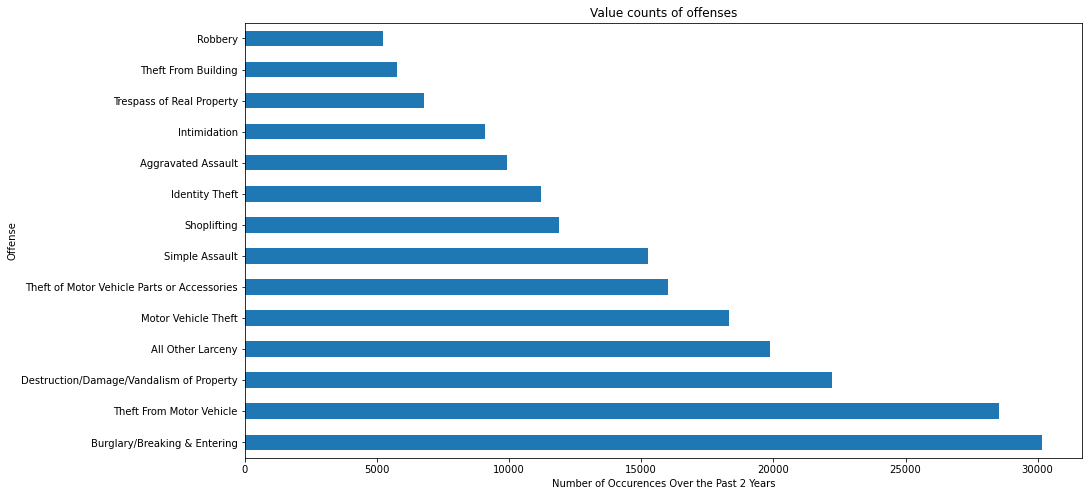

In [8]:
ax = df.value_counts('Offense').plot.barh(figsize = (15,8), title = "Value counts of offenses");
ax.set_xlabel("Number of Occurences Over the Past 2 Years");

We can see that there's an imbalance, so let's use SMOTE to address that

In [9]:
sm = SMOTE(random_state = 1)
X_train, y_train = sm.fit_sample(X_train, y_train)

Now it's time to initialize our model

## Random Forest Model ##

In [10]:
#rf = RandomForestClassifier(criterion= "entropy",random_state = 1,  max_depth = 5)

#rf.fit(X_train, y_train)
#rf_train_pred = rf.predict(X_train)
#rf_test_pred = rf.predict(X_test)

In [11]:
#print(classification_report(y_train, rf_train_pred))

In [12]:
#print(classification_report(y_test, rf_test_pred))

In [13]:
#fig, ax = plt.subplots(figsize=(15,15))
#interp.plot_confusion_matrix(rf, X_test, y_test);

#np.interp.plot_confusion_matrix(figsize=(10,10))

#cm = confusion_matrix(y_test, rf_test_pred);
#cmp = ConfusionMatrixDisplay(cm);
#fig, ax = plt.subplots(figsize=(13,13));
#cmp.plot(ax=ax);
#cmp.ax_.set_title("Confusion Matrix");

0) Aggravated Assault

1) All Other Larceny

2) Burglary/Breaking & Entering

3) Destruction/Damage/Vandalism of Property

4) Intimidation

5) Motor Vehicle Theft

6) Shoplifting

7) Simple Assault

8) Theft From Motor Vehicle

9) Theft of Motor Vehicle Parts or Accessories


## Random Forest Tuning ##

In [14]:
#rf2 = RandomForestClassifier()

#param_grid = {
   # 'criterion': ['entropy'],
   # 'random_state': [1],
   # 'max_depth': [1, 2, 3, 4, 5],
   # 'min_samples_split': [0.2, 0.25, 0.3, 0.35, 0.4 ],
   # 'min_samples_leaf': [0.1, 0.2, 0.3]
#}


#gs_rf = GridSearchCV(rf2, param_grid)
#gs_rf.fit(X_train, y_train)
#gs_rf.best_params_

In [15]:
#gs_forest_train_pred = gs_rf.predict(X_train)
#print(classification_report(y_train, gs_forest_train_pred))

In [16]:
#gs_forest_test_pred = gs_rf.predict(X_test)
#print(classification_report(y_test, gs_forest_test_pred))

In [17]:
#rf3 = RandomForestClassifier()

#param_grid2 = {
   # 'criterion': ['entropy'],
   # 'random_state': [1],
   # 'max_depth': [2, 3, 4],
    #'min_samples_split': [0.24, 0.25, 0.26],
   # 'min_samples_leaf': [0.1, 0.12, 0.13]
#}


#gs_rf2 = GridSearchCV(rf2, param_grid)
#gs_rf2.fit(X_train, y_train)
#gs_rf2.best_params_

In [18]:
#rf4 = RandomForestClassifier(criterion= "entropy", random_state = 1,  max_depth = 3, min_samples_split= 0.2, min_samples_leaf = 0.1,  )

#rf4.fit(X_train, y_train)
#rf_train_pred2 = rf4.predict(X_train)
#rf_test_pred2 = rf4.predict(X_test)

In [19]:
#cm2 = confusion_matrix(y_test, rf_test_pred2);
#cmp2 = ConfusionMatrixDisplay(cm2);
#fig, ax = plt.subplots(figsize=(13,13));
#cmp2.plot(ax=ax);
#cmp2.ax_.set_title("Confusion Matrix");

In [20]:
#print(classification_report(y_train, rf_train_pred2))

In [21]:
#print(classification_report(y_test, rf_test_pred2))

In [22]:
#print ("My program took", time.time() - start_time, "to run")

## CatBoost Model ##

In [23]:
CBC = CatBoostClassifier(
    random_state = 1,
    loss_function = 'MultiClass',
)

In [24]:
CBC.fit(
    X_train, y_train,
    early_stopping_rounds=5,
    plot = True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.106154
0:	learn: 2.4152795	total: 325ms	remaining: 5m 24s
1:	learn: 2.2999611	total: 519ms	remaining: 4m 18s
2:	learn: 2.2194601	total: 722ms	remaining: 4m
3:	learn: 2.1546015	total: 928ms	remaining: 3m 51s
4:	learn: 2.1023865	total: 1.13s	remaining: 3m 44s
5:	learn: 2.0583486	total: 1.33s	remaining: 3m 40s
6:	learn: 2.0212087	total: 1.53s	remaining: 3m 37s
7:	learn: 1.9898034	total: 1.74s	remaining: 3m 35s
8:	learn: 1.9629609	total: 1.95s	remaining: 3m 34s
9:	learn: 1.9385266	total: 2.15s	remaining: 3m 32s
10:	learn: 1.9170486	total: 2.34s	remaining: 3m 30s
11:	learn: 1.8977704	total: 2.54s	remaining: 3m 28s
12:	learn: 1.8810050	total: 2.74s	remaining: 3m 27s
13:	learn: 1.8659622	total: 2.94s	remaining: 3m 27s
14:	learn: 1.8528057	total: 3.14s	remaining: 3m 26s
15:	learn: 1.8413095	total: 3.35s	remaining: 3m 25s
16:	learn: 1.8304887	total: 3.55s	remaining: 3m 25s
17:	learn: 1.8207193	total: 3.74s	remaining: 3m 24s
18:	learn: 1.8118833	total: 3.94s	remaining: 3m 

159:	learn: 1.6246682	total: 33s	remaining: 2m 52s
160:	learn: 1.6240814	total: 33.2s	remaining: 2m 52s
161:	learn: 1.6234912	total: 33.4s	remaining: 2m 52s
162:	learn: 1.6227072	total: 33.6s	remaining: 2m 52s
163:	learn: 1.6221519	total: 33.8s	remaining: 2m 52s
164:	learn: 1.6218260	total: 34s	remaining: 2m 52s
165:	learn: 1.6211820	total: 34.2s	remaining: 2m 51s
166:	learn: 1.6204335	total: 34.4s	remaining: 2m 51s
167:	learn: 1.6199455	total: 34.6s	remaining: 2m 51s
168:	learn: 1.6193922	total: 34.9s	remaining: 2m 51s
169:	learn: 1.6187407	total: 35.1s	remaining: 2m 51s
170:	learn: 1.6180585	total: 35.3s	remaining: 2m 50s
171:	learn: 1.6176398	total: 35.5s	remaining: 2m 50s
172:	learn: 1.6170568	total: 35.7s	remaining: 2m 50s
173:	learn: 1.6165132	total: 35.9s	remaining: 2m 50s
174:	learn: 1.6159495	total: 36.1s	remaining: 2m 50s
175:	learn: 1.6153028	total: 36.3s	remaining: 2m 50s
176:	learn: 1.6146298	total: 36.5s	remaining: 2m 49s
177:	learn: 1.6140325	total: 36.7s	remaining: 2m 4

315:	learn: 1.5647062	total: 1m 5s	remaining: 2m 22s
316:	learn: 1.5645829	total: 1m 6s	remaining: 2m 22s
317:	learn: 1.5642024	total: 1m 6s	remaining: 2m 22s
318:	learn: 1.5640665	total: 1m 6s	remaining: 2m 21s
319:	learn: 1.5637100	total: 1m 6s	remaining: 2m 21s
320:	learn: 1.5633905	total: 1m 6s	remaining: 2m 21s
321:	learn: 1.5631116	total: 1m 7s	remaining: 2m 21s
322:	learn: 1.5627410	total: 1m 7s	remaining: 2m 21s
323:	learn: 1.5624283	total: 1m 7s	remaining: 2m 20s
324:	learn: 1.5621756	total: 1m 7s	remaining: 2m 20s
325:	learn: 1.5618323	total: 1m 7s	remaining: 2m 20s
326:	learn: 1.5616583	total: 1m 8s	remaining: 2m 20s
327:	learn: 1.5613896	total: 1m 8s	remaining: 2m 20s
328:	learn: 1.5609458	total: 1m 8s	remaining: 2m 19s
329:	learn: 1.5606630	total: 1m 8s	remaining: 2m 19s
330:	learn: 1.5603782	total: 1m 8s	remaining: 2m 19s
331:	learn: 1.5601729	total: 1m 9s	remaining: 2m 19s
332:	learn: 1.5598859	total: 1m 9s	remaining: 2m 19s
333:	learn: 1.5595414	total: 1m 9s	remaining: 

469:	learn: 1.5302180	total: 1m 38s	remaining: 1m 51s
470:	learn: 1.5299901	total: 1m 38s	remaining: 1m 50s
471:	learn: 1.5297455	total: 1m 38s	remaining: 1m 50s
472:	learn: 1.5295825	total: 1m 39s	remaining: 1m 50s
473:	learn: 1.5294413	total: 1m 39s	remaining: 1m 50s
474:	learn: 1.5292287	total: 1m 39s	remaining: 1m 49s
475:	learn: 1.5289551	total: 1m 39s	remaining: 1m 49s
476:	learn: 1.5286701	total: 1m 39s	remaining: 1m 49s
477:	learn: 1.5285735	total: 1m 40s	remaining: 1m 49s
478:	learn: 1.5283585	total: 1m 40s	remaining: 1m 49s
479:	learn: 1.5281016	total: 1m 40s	remaining: 1m 48s
480:	learn: 1.5279492	total: 1m 40s	remaining: 1m 48s
481:	learn: 1.5278739	total: 1m 41s	remaining: 1m 48s
482:	learn: 1.5277657	total: 1m 41s	remaining: 1m 48s
483:	learn: 1.5276349	total: 1m 41s	remaining: 1m 48s
484:	learn: 1.5274693	total: 1m 41s	remaining: 1m 47s
485:	learn: 1.5272937	total: 1m 41s	remaining: 1m 47s
486:	learn: 1.5271195	total: 1m 42s	remaining: 1m 47s
487:	learn: 1.5268984	total:

622:	learn: 1.5058894	total: 2m 10s	remaining: 1m 19s
623:	learn: 1.5057118	total: 2m 11s	remaining: 1m 19s
624:	learn: 1.5056597	total: 2m 11s	remaining: 1m 18s
625:	learn: 1.5055096	total: 2m 11s	remaining: 1m 18s
626:	learn: 1.5053330	total: 2m 11s	remaining: 1m 18s
627:	learn: 1.5051102	total: 2m 11s	remaining: 1m 18s
628:	learn: 1.5049670	total: 2m 12s	remaining: 1m 17s
629:	learn: 1.5048555	total: 2m 12s	remaining: 1m 17s
630:	learn: 1.5047674	total: 2m 12s	remaining: 1m 17s
631:	learn: 1.5045301	total: 2m 12s	remaining: 1m 17s
632:	learn: 1.5044772	total: 2m 13s	remaining: 1m 17s
633:	learn: 1.5043542	total: 2m 13s	remaining: 1m 16s
634:	learn: 1.5042600	total: 2m 13s	remaining: 1m 16s
635:	learn: 1.5040910	total: 2m 13s	remaining: 1m 16s
636:	learn: 1.5039614	total: 2m 13s	remaining: 1m 16s
637:	learn: 1.5037723	total: 2m 14s	remaining: 1m 16s
638:	learn: 1.5036974	total: 2m 14s	remaining: 1m 15s
639:	learn: 1.5035726	total: 2m 14s	remaining: 1m 15s
640:	learn: 1.5034069	total:

777:	learn: 1.4853740	total: 2m 43s	remaining: 46.8s
778:	learn: 1.4852877	total: 2m 44s	remaining: 46.6s
779:	learn: 1.4851963	total: 2m 44s	remaining: 46.3s
780:	learn: 1.4849726	total: 2m 44s	remaining: 46.1s
781:	learn: 1.4849048	total: 2m 44s	remaining: 45.9s
782:	learn: 1.4848062	total: 2m 44s	remaining: 45.7s
783:	learn: 1.4847028	total: 2m 45s	remaining: 45.5s
784:	learn: 1.4846536	total: 2m 45s	remaining: 45.3s
785:	learn: 1.4843678	total: 2m 45s	remaining: 45.1s
786:	learn: 1.4842474	total: 2m 45s	remaining: 44.9s
787:	learn: 1.4841990	total: 2m 46s	remaining: 44.7s
788:	learn: 1.4840352	total: 2m 46s	remaining: 44.5s
789:	learn: 1.4838728	total: 2m 46s	remaining: 44.2s
790:	learn: 1.4837988	total: 2m 46s	remaining: 44s
791:	learn: 1.4836912	total: 2m 46s	remaining: 43.8s
792:	learn: 1.4835674	total: 2m 47s	remaining: 43.6s
793:	learn: 1.4834131	total: 2m 47s	remaining: 43.4s
794:	learn: 1.4832386	total: 2m 47s	remaining: 43.2s
795:	learn: 1.4831564	total: 2m 47s	remaining: 4

935:	learn: 1.4688009	total: 3m 17s	remaining: 13.5s
936:	learn: 1.4687425	total: 3m 17s	remaining: 13.3s
937:	learn: 1.4686443	total: 3m 18s	remaining: 13.1s
938:	learn: 1.4685779	total: 3m 18s	remaining: 12.9s
939:	learn: 1.4685203	total: 3m 18s	remaining: 12.7s
940:	learn: 1.4683926	total: 3m 18s	remaining: 12.5s
941:	learn: 1.4682419	total: 3m 18s	remaining: 12.2s
942:	learn: 1.4681218	total: 3m 19s	remaining: 12s
943:	learn: 1.4680295	total: 3m 19s	remaining: 11.8s
944:	learn: 1.4679649	total: 3m 19s	remaining: 11.6s
945:	learn: 1.4678936	total: 3m 19s	remaining: 11.4s
946:	learn: 1.4678353	total: 3m 19s	remaining: 11.2s
947:	learn: 1.4677239	total: 3m 20s	remaining: 11s
948:	learn: 1.4676501	total: 3m 20s	remaining: 10.8s
949:	learn: 1.4675029	total: 3m 20s	remaining: 10.6s
950:	learn: 1.4672623	total: 3m 20s	remaining: 10.3s
951:	learn: 1.4671748	total: 3m 21s	remaining: 10.1s
952:	learn: 1.4670202	total: 3m 21s	remaining: 9.92s
953:	learn: 1.4669491	total: 3m 21s	remaining: 9.7

In [25]:
CBC_train_pred = CBC.predict(X_train)
CBC_test_pred = CBC.predict(X_test)

In [26]:
print(classification_report(y_train, CBC_train_pred))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.54      0.50      0.52     22703
                          All Other Larceny       0.27      0.13      0.17     22703
               Burglary/Breaking & Entering       0.31      0.35      0.33     22703
   Destruction/Damage/Vandalism of Property       0.28      0.13      0.18     22703
                             Identity Theft       0.51      0.76      0.61     22703
                               Intimidation       0.55      0.58      0.56     22703
                        Motor Vehicle Theft       0.31      0.28      0.29     22703
                                    Robbery       0.44      0.49      0.46     22703
                                Shoplifting       0.43      0.66      0.52     22703
                             Simple Assault       0.52      0.53      0.52     22703
                        Theft From Building       0.40      0.45

In [27]:
print(classification_report(y_test, CBC_test_pred))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.36      0.28      0.32      2493
                          All Other Larceny       0.20      0.10      0.14      4879
               Burglary/Breaking & Entering       0.32      0.33      0.32      7460
   Destruction/Damage/Vandalism of Property       0.22      0.10      0.14      5540
                             Identity Theft       0.36      0.73      0.48      2921
                               Intimidation       0.35      0.32      0.33      2250
                        Motor Vehicle Theft       0.24      0.29      0.26      4563
                                    Robbery       0.12      0.08      0.10      1319
                                Shoplifting       0.32      0.62      0.42      2975
                             Simple Assault       0.47      0.56      0.51      3790
                        Theft From Building       0.09      0.09

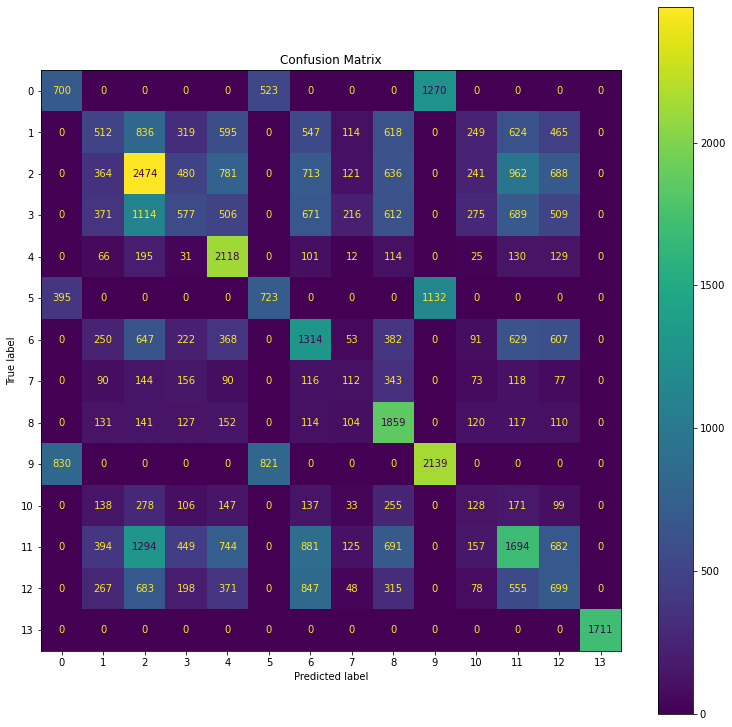

In [28]:
cm = confusion_matrix(y_test, CBC_test_pred);
cmp = ConfusionMatrixDisplay(cm);
fig, ax = plt.subplots(figsize=(13,13));
cmp.plot(ax=ax);
cmp.ax_.set_title("Confusion Matrix");

### Crime Key ###

**To make our confusion matrix more readable, we represented the crimes as numeric values. Below is a key that matches the numeric value to the crime**

0) Aggravated Assault

1) All Other Larceny

2) Burglary/Breaking & Entering

3) Destruction/Damage/Vandalism of Property

4) Identity Theft

5) Intimidation

6) Motor Vehicle Theft

7) Robbery

8) Shoplifting

9) Simple Assault

10) Theft From Building

11) Theft From Motor Vehicle

12) Theft of Motor Vehicle Parts or Accessories

13) Trespass of Real Property 

### Classification Report ###

Let's take a look at our test model classification report results for each crime:

**0) Aggravated Assault**

For our test model aggravated assault results, we have a precision score of .28, a recall score of .71, and an f1 score of .40. This means that:

For our "Aggravated Assault" results, we have a precision score of .36, a recall score of .28, and an f1 score of .32. This means that:


* Out of all the crimes that the model predicted would be Aggravated Assault crimes, 36% were actually Aggravated Assault crimes.
* Out of all the crimes that were Aggravated Assault crimes, the model correctly predicted 28% of them.
* There is an f1 score of .32, indicating poor performance on predicting probability of the crime being an Aggravated Assault crime.

**1) All Other Larceny**

For our "All Other Larceny" results, we have a precision score of .20, a recall score of .10, and an f1 score of .14. This means that:

* Out of all the crimes that the model predicted would be Larceny crimes, 20% were actually Larceny crimes.
* Out of all the crimes that were Larceny crimes, the model correctly predicted 10% of them.
* There is an f1 score of .14, indicating poor performance on predicting probability of the crime being a Larceny crime.

**2) Burglary/Breaking & Entering**

For our "Burglary/Breaking & Entering" results, we have a precision score of .32, a recall score of .33, and an f1 score of .32. This means that:

* Out of all the crimes that the model predicted would be Burglary/Breaking & Entering crimes, 32% were actually Burglary/Breaking & Entering crimes.
* Out of all the crimes that were Burglary/Breaking & Entering crimes, the model correctly predicted 33% of them.
* There is an f1 score of .32, indicating poor performance on predicting probability of the crime being a Burglary/Breaking & Entering crime.

**3) Destruction/Damage/Vandalism of Property**

For our "Destruction/Damage/Vandalism of Property" results, we have a precision score of .22, a recall score of .10, and an f1 score of .14. This means that:

* Out of all the crimes that the model predicted would be Destruction/Damage/Vandalism of Property crimes, 22% were actually Destruction/Damage/Vandalism of Property crimes.
* Out of all the crimes that were Destruction/Damage/Vandalism of Property crimes, the model correctly predicted 10% of them.
* There is an f1 score of .14, indicating poor performance on predicting probability of the crime being a Destruction/Damage/Vandalism of Property crime.

**4) Identity Theft**

For our "Identity Theft" results, we have a precision score of .36, a recall score of .73, and an f1 score of .48. This means that:

* Out of all the crimes that the model predicted would be Identity Theft crimes, 36% were actually Identity Theft crimes.
* Out of all the crimes that were Identity Theft crimes, the model correctly predicted 73% of them.
* There is an f1 score of .48, indicating poor performance on predicting probability of the crime being an Identity Theft crime.

**5) Intimidation**

For our "Intimidation" results, we have a precision score of .35, a recall score of .32, and an f1 score of .33. This means that:

* Out of all the crimes that the model predicted would be Intimidation crimes, 35% were actually Intimidation crimes.
* Out of all the crimes that were Intimidation crimes, the model correctly predicted 32% of them.
* There is an f1 score of .33, indicating poor performance on predicting probability of the crime being an Intimidation crime.

**6) Motor Vehicle Theft**

For our "Motor Vehicle Theft" results, we have a precision score of .24, a recall score of .29, and an f1 score of .26. This means that:

* Out of all the crimes that the model predicted would be Motor Vehicle Theft crimes, 24% were actually Motor Vehicle Theft crimes.
* Out of all the crimes that were Motor Vehicle Theft crimes, the model correctly predicted 29% of them.
* There is an f1 score of .26, indicating poor performance on predicting probability of the crime being a Motor Vehicle Theft crime.

**7) Robbery**

For our "Robbery" results, we have a precision score of .12, a recall score of .08, and an f1 score of .10. This means that:

* Out of all the crimes that the model predicted would be Robbery crimes, 12% were actually Robbery crimes.
* Out of all the crimes that were Robbery crimes, the model correctly predicted 8% of them.
* There is an f1 score of .10, indicating poor performance on predicting probability of the crime being a Robbery crime.

**8) Shoplifting**

For our "Shoplifting" results, we have a precision score of .32, a recall score of .62, and an f1 score of .42. This means that:

* Out of all the crimes that the model predicted would be Shoplifting crimes, 32% were actually Shoplifting crimes.
* Out of all the crimes that were Shoplifting crimes, the model correctly predicted 62% of them.
* There is an f1 score of .42, indicating poor performance on predicting probability of the crime being a Shoplifting crime.

**9) Simple Assault**

For our "Simple Assault" results, we have a precision score of .47, a recall score of .56, and an f1 score of .51. This means that:

* Out of all the crimes that the model predicted would be Simple Assault crimes, 47% were actually Simple Assault crimes.
* Out of all the crimes that were Simple Assault crimes, the model correctly predicted 56% of them.
* There is an f1 score of .51, indicating poor performance on predicting probability of the crime being a Simple Assault crime.

**10) Theft From Building**

For our "Theft From Building" results, we have a precision score of .09, a recall score of .09, and an f1 score of .09. This means that:

* Out of all the crimes that the model predicted would be Theft From Building crimes, 9% were actually Theft From Building crimes.
* Out of all the crimes that were Theft From Building crimes, the model correctly predicted 9% of them.
* There is an f1 score of .09, indicating extremely poor performance on predicting probability of the crime being a Theft From Building crime.

**11) Theft From Motor Vehicle**

For our "Theft From Motor Vehicle" results, we have a precision score of .30, a recall score of .24, and an f1 score of .26. This means that:

* Out of all the crimes that the model predicted would be Theft From Motor Vehicle crimes, 30% were actually Theft From Motor Vehicle crimes.
* Out of all the crimes that were Theft From Motor Vehicle crimes, the model correctly predicted 24% of them.
* There is an f1 score of .26, indicating poor performance on predicting probability of the crime being a Theft From Motor Vehicle crime.

**12) Theft of Motor Vehicle Parts or Accessories**

For our "Theft of Motor Vehicle Parts or Accessories" results, we have a precision score of .17, a recall score of .17, and an f1 score of .17. This means that:

* Out of all the crimes that the model predicted would be Theft of Motor Vehicle Parts or Accessories crimes, 17% were actually Theft of Motor Vehicle Parts or Accessories crimes.
* Out of all the crimes that were Theft of Motor Vehicle Parts or Accessories crimes, the model correctly predicted 17% of them.
* There is an f1 score of .17, indicating poor performance on predicting probability of the crime being a Theft of Motor Vehicle Parts or Accessories crime.

**13) Trespass of Real Property**

For our "Trespass of Real Property" results, we have a precision score of 1.0, a recall score of 1.0, and an f1 score of 1.0. This means that:

* Out of all the crimes that the model predicted would be Trespass of Real Property crimes, 100% were actually Trespass of Real Property crimes.
* Out of all the crimes that were Trespass of Real Property crimes, the model correctly predicted 100% of them.
* There is an f1 score of 1, indicating perfect performance on predicting probability of the crime being a Trespass of Real Property crime.

### Crime Confusion Matrix ###

**0) Aggravated Assault**

* 700 crimes were correctly predicted as being "Aggravated Assault" crimes
* 1,793 crimes were wrongly predicted as not being "Aggravated Assault" crimes
* 1,225 crimes were wrongly predicted as being "Aggravated Assault" crimes
* 48,252 crimes were correctly predicted as not being "Aggravated Assault" crimes

**1) All Other Larceny**

* 512 crimes were correctly predicted as being "All Other Larceny" crimes
* 4,367 crimes were wrongly predicted as not being "All Other Larceny" crimes
* 2,071 crimes were wrongly predicted as being "All Other Larceny" crimes
* 44,863 crimes were correctly predicted as not being "All Other Larceny" crimes

**2) Burglary/Breaking & Entering**

* 2,474 crimes were correctly predicted as being "Burglary/Breaking & Entering" crimes
* 4,986 crimes were wrongly predicted as not being "Burglary/Breaking & Entering" crimes
* 5,332 crimes were wrongly predicted as being "Burglary/Breaking & Entering" crimes
* 40,973 crimes were correctly predicted as not being "Burglary/Breaking & Entering" crimes

**3) Destruction/Damage/Vandalism of Property**

* 577 crimes were correctly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 4,963 crimes were wrongly predicted as not being "Destruction/Damage/Vandalism of Property" crimes
* 2,088 crimes were wrongly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 47,221 crimes were correctly predicted as not being "Destruction/Damage/Vandalism of Property" crimes

**4) Identity Theft**

* 2,118 crimes were correctly predicted as being "Identity Theft" crimes
* 803 crimes were wrongly predicted as not being "Identity Theft" crimes
* 3,754 crimes were wrongly predicted as being "Identity Theft" crimes
* 48,064 crimes were correctly predicted as not being "Identity Theft" crimes

**5) Intimidation**

* 723 crimes were correctly predicted as being "Intimidation" crimes
* 1,527 crimes were wrongly predicted as not being "Intimidation" crimes
* 1,344 crimes were wrongly predicted as being "Intimidation" crimes
* 49,889 crimes were correctly predicted as not being "Intimidation" crimes

**6) Motor Vehicle Theft**

* 1,314 crimes were correctly predicted as being "Motor Vehicle Theft" crimes
* 3,249 crimes were wrongly predicted as not being "Motor Vehicle Theft" crimes
* 4,127 crimes were wrongly predicted as being "Motor Vehicle Theft" crimes
* 47,531 crimes were correctly predicted as not being "Motor Vehicle Theft" crimes

**7) Robbery**

* 112 crimes were correctly predicted as being "Robbery" crimes
* 1,207 crimes were wrongly predicted as not being "Robbery" crimes
* 826 crimes were wrongly predicted as being "Robbery" crimes
* 51,532 crimes were correctly predicted as not being "Robbery" crimes

**8) Shoplifting**

* 1,859 crimes were correctly predicted as being "Shoplifting" crimes
* 1,116 crimes were wrongly predicted as not being "Shoplifting" crimes
* 3,966 crimes were wrongly predicted as being "Shoplifting" crimes
* 49,098 crimes were correctly predicted as not being "Shoplifting" crimes

**9) Simple Assault**

* 2,139 crimes were correctly predicted as being "Simple Assault" crimes
* 1,651 crimes were wrongly predicted as not being "Simple Assault" crimes
* 3,409 crimes were wrongly predicted as being "Simple Assault" crimes
* 50,423 crimes were correctly predicted as not being "Simple Assault" crimes

**10) Theft From Building**

* 128 crimes were correctly predicted as being "Theft From Building" crimes
* 1,364 crimes were wrongly predicted as not being "Theft From Building" crimes
* 1,309 crimes were wrongly predicted as being "Theft From Building" crimes
* 51,929 crimes were correctly predicted as not being "Theft From Building" crimes

**11) Theft From Motor Vehicle**

* 1,694 crimes were correctly predicted as being "Theft From Motor Vehicle" crimes
* 7,111 crimes were wrongly predicted as not being "Theft From Motor Vehicle" crimes
* 3,995 crimes were wrongly predicted as being "Theft From Motor Vehicle" crimes
* 49,631 crimes were correctly predicted as not being "Theft From Motor Vehicle" crimes

**12) Theft of Motor Vehicle Parts or Accessories**

* 699 crimes were correctly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 3,362 crimes were wrongly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes
* 3,366 crimes were wrongly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 51,863 crimes were correctly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes

**13) Trespass of Real Property**

* 1,711 crimes were correctly predicted as being "Trespass of Real Property" crimes
* 0 crimes were wrongly predicted as not being "Trespass of Real Property" crimes
* 0 crimes were wrongly predicted as being "Trespass of Real Property" crimes
* 50,851 crimes were correctly predicted as not being "Trespass of Real Property" crimes

In [29]:
params = {'learning_rate': [0.05, 0.1, 0.5],
          'loss_function': ['MultiClass'],
          'task_type': ['GPU'],
          'random_state' : [1],
          'depth': [2, 4, 6],
          'iterations': [100, 500, 1000]
         }

In [30]:
CBC_gs = GridSearchCV(CBC, params)
CBC_gs.fit(X_train, y_train, early_stopping_rounds=5, plot = True)
CBC_gs.best_params_

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419846	total: 13.7ms	remaining: 1.36s
1:	learn: 2.4762514	total: 26.1ms	remaining: 1.28s
2:	learn: 2.4237441	total: 38.4ms	remaining: 1.24s
3:	learn: 2.3795726	total: 51.1ms	remaining: 1.23s
4:	learn: 2.3414035	total: 63.6ms	remaining: 1.21s
5:	learn: 2.3078013	total: 76.1ms	remaining: 1.19s
6:	learn: 2.2778566	total: 88.1ms	remaining: 1.17s
7:	learn: 2.2509267	total: 100ms	remaining: 1.15s
8:	learn: 2.2265149	total: 112ms	remaining: 1.13s
9:	learn: 2.2043153	total: 124ms	remaining: 1.12s
10:	learn: 2.1839448	total: 136ms	remaining: 1.1s
11:	learn: 2.1652505	total: 148ms	remaining: 1.08s
12:	learn: 2.1480043	total: 160ms	remaining: 1.07s
13:	learn: 2.1320227	total: 172ms	remaining: 1.06s
14:	learn: 2.1172352	total: 184ms	remaining: 1.04s
15:	learn: 2.1034803	total: 196ms	remaining: 1.03s
16:	learn: 2.0906594	total: 208ms	remaining: 1.01s
17:	learn: 2.0787237	total: 220ms	remaining: 1s
18:	learn: 2.0675539	total: 232ms	remaining: 988ms
19:	learn: 2.0571036	total: 244ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419856	total: 12.5ms	remaining: 1.24s
1:	learn: 2.4762573	total: 24.1ms	remaining: 1.18s
2:	learn: 2.4237358	total: 35.9ms	remaining: 1.16s
3:	learn: 2.3795672	total: 47.8ms	remaining: 1.15s
4:	learn: 2.3413907	total: 59.9ms	remaining: 1.14s
5:	learn: 2.3077991	total: 71.8ms	remaining: 1.13s
6:	learn: 2.2778537	total: 83.8ms	remaining: 1.11s
7:	learn: 2.2509244	total: 95.9ms	remaining: 1.1s
8:	learn: 2.2265171	total: 108ms	remaining: 1.09s
9:	learn: 2.2043126	total: 120ms	remaining: 1.08s
10:	learn: 2.1839418	total: 132ms	remaining: 1.06s
11:	learn: 2.1652518	total: 144ms	remaining: 1.05s
12:	learn: 2.1479991	total: 156ms	remaining: 1.04s
13:	learn: 2.1320215	total: 168ms	remaining: 1.03s
14:	learn: 2.1172271	total: 180ms	remaining: 1.02s
15:	learn: 2.1034693	total: 192ms	remaining: 1.01s
16:	learn: 2.0906570	total: 204ms	remaining: 995ms
17:	learn: 2.0787215	total: 216ms	remaining: 984ms
18:	learn: 2.0675514	total: 228ms	remaining: 972ms
19:	learn: 2.0571039	total: 240ms	

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419884	total: 13ms	remaining: 1.28s
1:	learn: 2.4762645	total: 24.7ms	remaining: 1.21s
2:	learn: 2.4237412	total: 36.6ms	remaining: 1.18s
3:	learn: 2.3795753	total: 48.5ms	remaining: 1.16s
4:	learn: 2.3413938	total: 60.6ms	remaining: 1.15s
5:	learn: 2.3077917	total: 72.7ms	remaining: 1.14s
6:	learn: 2.2778548	total: 84.8ms	remaining: 1.13s
7:	learn: 2.2509156	total: 97.1ms	remaining: 1.12s
8:	learn: 2.2265216	total: 109ms	remaining: 1.1s
9:	learn: 2.2043303	total: 121ms	remaining: 1.09s
10:	learn: 2.1839470	total: 133ms	remaining: 1.08s
11:	learn: 2.1652460	total: 146ms	remaining: 1.07s
12:	learn: 2.1480037	total: 158ms	remaining: 1.05s
13:	learn: 2.1320178	total: 170ms	remaining: 1.04s
14:	learn: 2.1172225	total: 182ms	remaining: 1.03s
15:	learn: 2.1034703	total: 194ms	remaining: 1.02s
16:	learn: 2.0906613	total: 206ms	remaining: 1.01s
17:	learn: 2.0787261	total: 219ms	remaining: 996ms
18:	learn: 2.0675760	total: 231ms	remaining: 987ms
19:	learn: 2.0571258	total: 244ms	re

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419926	total: 12.8ms	remaining: 1.26s
1:	learn: 2.4762685	total: 24.4ms	remaining: 1.2s
2:	learn: 2.4237449	total: 36.3ms	remaining: 1.17s
3:	learn: 2.3795782	total: 48.3ms	remaining: 1.16s
4:	learn: 2.3413953	total: 60.4ms	remaining: 1.15s
5:	learn: 2.3078053	total: 72.5ms	remaining: 1.14s
6:	learn: 2.2778565	total: 84.7ms	remaining: 1.13s
7:	learn: 2.2509227	total: 96.9ms	remaining: 1.11s
8:	learn: 2.2265251	total: 110ms	remaining: 1.11s
9:	learn: 2.2043273	total: 122ms	remaining: 1.1s
10:	learn: 2.1839504	total: 134ms	remaining: 1.08s
11:	learn: 2.1652582	total: 146ms	remaining: 1.07s
12:	learn: 2.1480045	total: 158ms	remaining: 1.06s
13:	learn: 2.1320323	total: 170ms	remaining: 1.05s
14:	learn: 2.1172286	total: 183ms	remaining: 1.03s
15:	learn: 2.1034728	total: 195ms	remaining: 1.02s
16:	learn: 2.0906643	total: 207ms	remaining: 1.01s
17:	learn: 2.0787273	total: 220ms	remaining: 1s
18:	learn: 2.0675733	total: 233ms	remaining: 993ms
19:	learn: 2.0571302	total: 246ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419936	total: 12.9ms	remaining: 1.28s
1:	learn: 2.4762633	total: 24.8ms	remaining: 1.21s
2:	learn: 2.4237491	total: 37ms	remaining: 1.2s
3:	learn: 2.3795777	total: 49ms	remaining: 1.18s
4:	learn: 2.3413977	total: 61.2ms	remaining: 1.16s
5:	learn: 2.3077954	total: 73.5ms	remaining: 1.15s
6:	learn: 2.2778531	total: 85.7ms	remaining: 1.14s
7:	learn: 2.2509232	total: 97.9ms	remaining: 1.13s
8:	learn: 2.2265224	total: 110ms	remaining: 1.11s
9:	learn: 2.2043104	total: 122ms	remaining: 1.1s
10:	learn: 2.1839472	total: 134ms	remaining: 1.08s
11:	learn: 2.1652482	total: 146ms	remaining: 1.07s
12:	learn: 2.1479995	total: 158ms	remaining: 1.05s
13:	learn: 2.1320242	total: 170ms	remaining: 1.04s
14:	learn: 2.1172321	total: 182ms	remaining: 1.03s
15:	learn: 2.1034804	total: 194ms	remaining: 1.02s
16:	learn: 2.0906601	total: 206ms	remaining: 1.01s
17:	learn: 2.0787219	total: 218ms	remaining: 994ms
18:	learn: 2.0675551	total: 230ms	remaining: 982ms
19:	learn: 2.0571095	total: 243ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519490	total: 12.6ms	remaining: 1.25s
1:	learn: 2.3598895	total: 24.2ms	remaining: 1.19s
2:	learn: 2.2913397	total: 35.9ms	remaining: 1.16s
3:	learn: 2.2369277	total: 47.7ms	remaining: 1.14s
4:	learn: 2.1922567	total: 59.6ms	remaining: 1.13s
5:	learn: 2.1547724	total: 71.6ms	remaining: 1.12s
6:	learn: 2.1228987	total: 83.6ms	remaining: 1.11s
7:	learn: 2.0954142	total: 95.5ms	remaining: 1.1s
8:	learn: 2.0716174	total: 107ms	remaining: 1.09s
9:	learn: 2.0508296	total: 119ms	remaining: 1.07s
10:	learn: 2.0271503	total: 132ms	remaining: 1.06s
11:	learn: 2.0081888	total: 144ms	remaining: 1.05s
12:	learn: 1.9930108	total: 156ms	remaining: 1.04s
13:	learn: 1.9817105	total: 168ms	remaining: 1.03s
14:	learn: 1.9679395	total: 180ms	remaining: 1.02s
15:	learn: 1.9588124	total: 192ms	remaining: 1.01s
16:	learn: 1.9460533	total: 204ms	remaining: 998ms
17:	learn: 1.9355642	total: 216ms	remaining: 986ms
18:	learn: 1.9294892	total: 229ms	remaining: 975ms
19:	learn: 1.9230231	total: 241ms	

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519402	total: 12.9ms	remaining: 1.28s
1:	learn: 2.3598792	total: 24.7ms	remaining: 1.21s
2:	learn: 2.2913389	total: 36.5ms	remaining: 1.18s
3:	learn: 2.2369233	total: 48.2ms	remaining: 1.16s
4:	learn: 2.1922464	total: 60.1ms	remaining: 1.14s
5:	learn: 2.1547680	total: 72ms	remaining: 1.13s
6:	learn: 2.1228947	total: 84.2ms	remaining: 1.12s
7:	learn: 2.0954130	total: 96.2ms	remaining: 1.1s
8:	learn: 2.0716164	total: 108ms	remaining: 1.09s
9:	learn: 2.0508223	total: 120ms	remaining: 1.08s
10:	learn: 2.0270752	total: 132ms	remaining: 1.07s
11:	learn: 2.0104775	total: 144ms	remaining: 1.06s
12:	learn: 1.9988608	total: 156ms	remaining: 1.05s
13:	learn: 1.9820011	total: 168ms	remaining: 1.03s
14:	learn: 1.9669209	total: 181ms	remaining: 1.02s
15:	learn: 1.9591944	total: 193ms	remaining: 1.01s
16:	learn: 1.9464718	total: 205ms	remaining: 1s
17:	learn: 1.9359812	total: 217ms	remaining: 990ms
18:	learn: 1.9264027	total: 230ms	remaining: 978ms
19:	learn: 1.9200549	total: 242ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519377	total: 12.8ms	remaining: 1.26s
1:	learn: 2.3598852	total: 24.6ms	remaining: 1.21s
2:	learn: 2.2913316	total: 36.5ms	remaining: 1.18s
3:	learn: 2.2369270	total: 48.5ms	remaining: 1.16s
4:	learn: 2.1922604	total: 60.8ms	remaining: 1.16s
5:	learn: 2.1547796	total: 73.1ms	remaining: 1.15s
6:	learn: 2.1228896	total: 85.3ms	remaining: 1.13s
7:	learn: 2.0954113	total: 97.4ms	remaining: 1.12s
8:	learn: 2.0716289	total: 110ms	remaining: 1.11s
9:	learn: 2.0508355	total: 122ms	remaining: 1.1s
10:	learn: 2.0271105	total: 134ms	remaining: 1.09s
11:	learn: 2.0105109	total: 146ms	remaining: 1.07s
12:	learn: 1.9924267	total: 159ms	remaining: 1.06s
13:	learn: 1.9822249	total: 171ms	remaining: 1.05s
14:	learn: 1.9684887	total: 183ms	remaining: 1.04s
15:	learn: 1.9593069	total: 195ms	remaining: 1.02s
16:	learn: 1.9465943	total: 208ms	remaining: 1.01s
17:	learn: 1.9361021	total: 220ms	remaining: 1s
18:	learn: 1.9296531	total: 232ms	remaining: 989ms
19:	learn: 1.9202073	total: 244ms	rem

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519387	total: 12.9ms	remaining: 1.28s
1:	learn: 2.3598864	total: 24.8ms	remaining: 1.22s
2:	learn: 2.2913452	total: 36.6ms	remaining: 1.18s
3:	learn: 2.2369312	total: 48.7ms	remaining: 1.17s
4:	learn: 2.1922601	total: 61ms	remaining: 1.16s
5:	learn: 2.1547791	total: 74ms	remaining: 1.16s
6:	learn: 2.1229024	total: 86.2ms	remaining: 1.15s
7:	learn: 2.0954266	total: 98.4ms	remaining: 1.13s
8:	learn: 2.0716272	total: 110ms	remaining: 1.12s
9:	learn: 2.0508477	total: 123ms	remaining: 1.1s
10:	learn: 2.0271346	total: 135ms	remaining: 1.09s
11:	learn: 2.0105356	total: 147ms	remaining: 1.08s
12:	learn: 1.9924692	total: 159ms	remaining: 1.07s
13:	learn: 1.9823055	total: 171ms	remaining: 1.05s
14:	learn: 1.9673154	total: 184ms	remaining: 1.04s
15:	learn: 1.9591129	total: 196ms	remaining: 1.03s
16:	learn: 1.9467486	total: 208ms	remaining: 1.02s
17:	learn: 1.9362572	total: 220ms	remaining: 1s
18:	learn: 1.9302153	total: 233ms	remaining: 994ms
19:	learn: 1.9237625	total: 246ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519367	total: 13ms	remaining: 1.29s
1:	learn: 2.3598852	total: 24.8ms	remaining: 1.21s
2:	learn: 2.2913371	total: 36.6ms	remaining: 1.18s
3:	learn: 2.2369275	total: 48.6ms	remaining: 1.17s
4:	learn: 2.1922648	total: 60.8ms	remaining: 1.16s
5:	learn: 2.1547782	total: 72.8ms	remaining: 1.14s
6:	learn: 2.1228920	total: 84.9ms	remaining: 1.13s
7:	learn: 2.0954175	total: 96.9ms	remaining: 1.11s
8:	learn: 2.0716159	total: 109ms	remaining: 1.1s
9:	learn: 2.0508376	total: 121ms	remaining: 1.09s
10:	learn: 2.0270727	total: 134ms	remaining: 1.08s
11:	learn: 2.0104721	total: 146ms	remaining: 1.07s
12:	learn: 1.9988462	total: 158ms	remaining: 1.06s
13:	learn: 1.9821267	total: 170ms	remaining: 1.04s
14:	learn: 1.9670318	total: 183ms	remaining: 1.03s
15:	learn: 1.9588432	total: 195ms	remaining: 1.02s
16:	learn: 1.9465869	total: 207ms	remaining: 1.01s
17:	learn: 1.9360987	total: 219ms	remaining: 999ms
18:	learn: 1.9296688	total: 231ms	remaining: 986ms
19:	learn: 1.9202302	total: 244ms	re

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756883	total: 12.7ms	remaining: 1.25s
1:	learn: 1.9520627	total: 24.7ms	remaining: 1.21s
2:	learn: 1.8880726	total: 36.5ms	remaining: 1.18s
3:	learn: 1.8521886	total: 48.7ms	remaining: 1.17s
4:	learn: 1.8356853	total: 61.2ms	remaining: 1.16s
5:	learn: 1.8255547	total: 73.5ms	remaining: 1.15s
6:	learn: 1.8101046	total: 85.6ms	remaining: 1.14s
7:	learn: 1.8011888	total: 98.1ms	remaining: 1.13s
8:	learn: 1.7935488	total: 111ms	remaining: 1.12s
9:	learn: 1.7872374	total: 123ms	remaining: 1.11s
10:	learn: 1.7818157	total: 135ms	remaining: 1.09s
11:	learn: 1.7774935	total: 147ms	remaining: 1.08s
12:	learn: 1.7720437	total: 160ms	remaining: 1.07s
13:	learn: 1.7672708	total: 172ms	remaining: 1.06s
14:	learn: 1.7647359	total: 185ms	remaining: 1.05s
15:	learn: 1.7584613	total: 197ms	remaining: 1.03s
16:	learn: 1.7548140	total: 210ms	remaining: 1.02s
17:	learn: 1.7523384	total: 223ms	remaining: 1.01s
18:	learn: 1.7449283	total: 235ms	remaining: 1s
19:	learn: 1.7430137	total: 247ms	re

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756832	total: 12.8ms	remaining: 1.27s
1:	learn: 1.9517887	total: 24.8ms	remaining: 1.21s
2:	learn: 1.8886576	total: 36.4ms	remaining: 1.18s
3:	learn: 1.8529388	total: 49ms	remaining: 1.18s
4:	learn: 1.8330485	total: 62ms	remaining: 1.18s
5:	learn: 1.8228298	total: 74.4ms	remaining: 1.17s
6:	learn: 1.8124496	total: 87ms	remaining: 1.16s
7:	learn: 1.7977726	total: 99.4ms	remaining: 1.14s
8:	learn: 1.7908949	total: 112ms	remaining: 1.13s
9:	learn: 1.7853127	total: 125ms	remaining: 1.12s
10:	learn: 1.7791103	total: 137ms	remaining: 1.11s
11:	learn: 1.7754519	total: 149ms	remaining: 1.09s
12:	learn: 1.7716681	total: 162ms	remaining: 1.08s
13:	learn: 1.7686968	total: 174ms	remaining: 1.07s
14:	learn: 1.7658100	total: 187ms	remaining: 1.06s
15:	learn: 1.7577358	total: 199ms	remaining: 1.04s
16:	learn: 1.7550342	total: 212ms	remaining: 1.03s
17:	learn: 1.7534944	total: 224ms	remaining: 1.02s
18:	learn: 1.7500031	total: 236ms	remaining: 1.01s
19:	learn: 1.7469649	total: 248ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756959	total: 12.5ms	remaining: 1.24s
1:	learn: 1.9519058	total: 24.5ms	remaining: 1.2s
2:	learn: 1.8888378	total: 36.2ms	remaining: 1.17s
3:	learn: 1.8532656	total: 48.4ms	remaining: 1.16s
4:	learn: 1.8370751	total: 61ms	remaining: 1.16s
5:	learn: 1.8272524	total: 73.2ms	remaining: 1.15s
6:	learn: 1.8181765	total: 85.7ms	remaining: 1.14s
7:	learn: 1.8077453	total: 98.4ms	remaining: 1.13s
8:	learn: 1.7947341	total: 111ms	remaining: 1.12s
9:	learn: 1.7880572	total: 124ms	remaining: 1.11s
10:	learn: 1.7825851	total: 136ms	remaining: 1.1s
11:	learn: 1.7740261	total: 148ms	remaining: 1.08s
12:	learn: 1.7695079	total: 160ms	remaining: 1.07s
13:	learn: 1.7663956	total: 173ms	remaining: 1.06s
14:	learn: 1.7627023	total: 185ms	remaining: 1.05s
15:	learn: 1.7594750	total: 197ms	remaining: 1.03s
16:	learn: 1.7548249	total: 209ms	remaining: 1.02s
17:	learn: 1.7527021	total: 222ms	remaining: 1.01s
18:	learn: 1.7499505	total: 234ms	remaining: 999ms
19:	learn: 1.7461350	total: 247ms	rem

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756964	total: 12.8ms	remaining: 1.27s
1:	learn: 1.9519927	total: 24.8ms	remaining: 1.21s
2:	learn: 1.8889244	total: 36.8ms	remaining: 1.19s
3:	learn: 1.8535364	total: 49.4ms	remaining: 1.19s
4:	learn: 1.8340450	total: 62.1ms	remaining: 1.18s
5:	learn: 1.8238951	total: 74.4ms	remaining: 1.17s
6:	learn: 1.8162297	total: 86.9ms	remaining: 1.15s
7:	learn: 1.8014084	total: 99.2ms	remaining: 1.14s
8:	learn: 1.7950083	total: 113ms	remaining: 1.14s
9:	learn: 1.7892778	total: 125ms	remaining: 1.12s
10:	learn: 1.7836331	total: 137ms	remaining: 1.11s
11:	learn: 1.7789927	total: 149ms	remaining: 1.09s
12:	learn: 1.7714939	total: 162ms	remaining: 1.08s
13:	learn: 1.7681402	total: 174ms	remaining: 1.07s
14:	learn: 1.7653015	total: 187ms	remaining: 1.06s
15:	learn: 1.7573033	total: 199ms	remaining: 1.04s
16:	learn: 1.7539602	total: 212ms	remaining: 1.03s
17:	learn: 1.7508532	total: 224ms	remaining: 1.02s
18:	learn: 1.7481670	total: 236ms	remaining: 1.01s
19:	learn: 1.7448730	total: 249ms

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756927	total: 12.9ms	remaining: 1.28s
1:	learn: 1.9517451	total: 25ms	remaining: 1.22s
2:	learn: 1.8888388	total: 36.9ms	remaining: 1.19s
3:	learn: 1.8531955	total: 49.2ms	remaining: 1.18s
4:	learn: 1.8335322	total: 61.7ms	remaining: 1.17s
5:	learn: 1.8233264	total: 74.1ms	remaining: 1.16s
6:	learn: 1.8157681	total: 86.5ms	remaining: 1.15s
7:	learn: 1.8008698	total: 98.7ms	remaining: 1.14s
8:	learn: 1.7944985	total: 111ms	remaining: 1.12s
9:	learn: 1.7897201	total: 124ms	remaining: 1.11s
10:	learn: 1.7810921	total: 136ms	remaining: 1.1s
11:	learn: 1.7755224	total: 148ms	remaining: 1.09s
12:	learn: 1.7681780	total: 161ms	remaining: 1.08s
13:	learn: 1.7640496	total: 173ms	remaining: 1.06s
14:	learn: 1.7611053	total: 186ms	remaining: 1.05s
15:	learn: 1.7569324	total: 199ms	remaining: 1.04s
16:	learn: 1.7515369	total: 211ms	remaining: 1.03s
17:	learn: 1.7484702	total: 223ms	remaining: 1.02s
18:	learn: 1.7450673	total: 236ms	remaining: 1s
19:	learn: 1.7421793	total: 248ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419844	total: 12.8ms	remaining: 6.39s
1:	learn: 2.4762514	total: 24.5ms	remaining: 6.11s
2:	learn: 2.4237441	total: 36.5ms	remaining: 6.04s
3:	learn: 2.3795726	total: 48.4ms	remaining: 6s
4:	learn: 2.3414035	total: 60.5ms	remaining: 5.99s
5:	learn: 2.3078011	total: 72.5ms	remaining: 5.97s
6:	learn: 2.2778566	total: 84.6ms	remaining: 5.96s
7:	learn: 2.2509267	total: 96.6ms	remaining: 5.94s
8:	learn: 2.2265149	total: 109ms	remaining: 5.92s
9:	learn: 2.2043153	total: 121ms	remaining: 5.91s
10:	learn: 2.1839448	total: 133ms	remaining: 5.89s
11:	learn: 2.1652505	total: 145ms	remaining: 5.88s
12:	learn: 2.1480046	total: 157ms	remaining: 5.86s
13:	learn: 2.1320227	total: 169ms	remaining: 5.85s
14:	learn: 2.1172352	total: 181ms	remaining: 5.84s
15:	learn: 2.1034801	total: 193ms	remaining: 5.82s
16:	learn: 2.0906594	total: 205ms	remaining: 5.82s
17:	learn: 2.0787237	total: 217ms	remaining: 5.81s
18:	learn: 2.0675536	total: 229ms	remaining: 5.8s
19:	learn: 2.0571036	total: 241ms	rem

166:	learn: 1.7705514	total: 2.07s	remaining: 4.13s
167:	learn: 1.7701779	total: 2.08s	remaining: 4.11s
168:	learn: 1.7697905	total: 2.09s	remaining: 4.1s
169:	learn: 1.7693403	total: 2.11s	remaining: 4.09s
170:	learn: 1.7689920	total: 2.12s	remaining: 4.08s
171:	learn: 1.7685851	total: 2.13s	remaining: 4.07s
172:	learn: 1.7681787	total: 2.14s	remaining: 4.05s
173:	learn: 1.7678956	total: 2.16s	remaining: 4.04s
174:	learn: 1.7672912	total: 2.17s	remaining: 4.03s
175:	learn: 1.7668748	total: 2.18s	remaining: 4.02s
176:	learn: 1.7659995	total: 2.19s	remaining: 4s
177:	learn: 1.7655909	total: 2.21s	remaining: 3.99s
178:	learn: 1.7653112	total: 2.22s	remaining: 3.98s
179:	learn: 1.7649122	total: 2.23s	remaining: 3.97s
180:	learn: 1.7645241	total: 2.24s	remaining: 3.95s
181:	learn: 1.7642734	total: 2.26s	remaining: 3.94s
182:	learn: 1.7639449	total: 2.27s	remaining: 3.93s
183:	learn: 1.7630631	total: 2.28s	remaining: 3.92s
184:	learn: 1.7627943	total: 2.29s	remaining: 3.9s
185:	learn: 1.762

331:	learn: 1.7185502	total: 4.12s	remaining: 2.09s
332:	learn: 1.7183610	total: 4.14s	remaining: 2.07s
333:	learn: 1.7180189	total: 4.15s	remaining: 2.06s
334:	learn: 1.7178440	total: 4.16s	remaining: 2.05s
335:	learn: 1.7176064	total: 4.17s	remaining: 2.04s
336:	learn: 1.7174258	total: 4.18s	remaining: 2.02s
337:	learn: 1.7172932	total: 4.2s	remaining: 2.01s
338:	learn: 1.7171864	total: 4.21s	remaining: 2s
339:	learn: 1.7169286	total: 4.22s	remaining: 1.99s
340:	learn: 1.7167703	total: 4.24s	remaining: 1.97s
341:	learn: 1.7165617	total: 4.25s	remaining: 1.96s
342:	learn: 1.7164298	total: 4.26s	remaining: 1.95s
343:	learn: 1.7162823	total: 4.27s	remaining: 1.94s
344:	learn: 1.7160445	total: 4.28s	remaining: 1.93s
345:	learn: 1.7155440	total: 4.3s	remaining: 1.91s
346:	learn: 1.7151150	total: 4.31s	remaining: 1.9s
347:	learn: 1.7148387	total: 4.32s	remaining: 1.89s
348:	learn: 1.7146482	total: 4.33s	remaining: 1.88s
349:	learn: 1.7144624	total: 4.35s	remaining: 1.86s
350:	learn: 1.7140

495:	learn: 1.6873829	total: 6.16s	remaining: 49.7ms
496:	learn: 1.6873186	total: 6.17s	remaining: 37.3ms
497:	learn: 1.6871368	total: 6.19s	remaining: 24.8ms
498:	learn: 1.6869941	total: 6.2s	remaining: 12.4ms
499:	learn: 1.6868303	total: 6.21s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419859	total: 12.8ms	remaining: 6.38s
1:	learn: 2.4762573	total: 24.5ms	remaining: 6.1s
2:	learn: 2.4237358	total: 36.2ms	remaining: 6s
3:	learn: 2.3795674	total: 48.2ms	remaining: 5.98s
4:	learn: 2.3413909	total: 60.3ms	remaining: 5.97s
5:	learn: 2.3077991	total: 72.4ms	remaining: 5.96s
6:	learn: 2.2778537	total: 84.5ms	remaining: 5.95s
7:	learn: 2.2509244	total: 96.6ms	remaining: 5.94s
8:	learn: 2.2265171	total: 109ms	remaining: 5.93s
9:	learn: 2.2043126	total: 121ms	remaining: 5.92s
10:	learn: 2.1839418	total: 133ms	remaining: 5.91s
11:	learn: 2.1652518	total: 145ms	remaining: 5.89s
12:	learn: 2.1479991	total: 157ms	remaining: 5.88s
13:	learn: 2.1320212	total: 169ms	remaining: 5.87s
14:	learn: 2.1172271	total: 181ms	remaining: 5.86s
15:	learn: 2.1034693	total: 193ms	remaining: 5.85s
16:	learn: 2.0906572	total: 205ms	remaining: 5.83s
17:	learn: 2.0787215	total: 218ms	remaining: 5.83s
18:	learn: 2.0675514	total: 230ms	remaining: 5.82s
19:	learn: 2.0571039	total: 242ms	rem

170:	learn: 1.7715257	total: 2.13s	remaining: 4.09s
171:	learn: 1.7711415	total: 2.14s	remaining: 4.08s
172:	learn: 1.7702930	total: 2.15s	remaining: 4.07s
173:	learn: 1.7699677	total: 2.16s	remaining: 4.05s
174:	learn: 1.7696166	total: 2.17s	remaining: 4.04s
175:	learn: 1.7692865	total: 2.19s	remaining: 4.03s
176:	learn: 1.7688968	total: 2.2s	remaining: 4.01s
177:	learn: 1.7684588	total: 2.21s	remaining: 4s
178:	learn: 1.7680451	total: 2.23s	remaining: 3.99s
179:	learn: 1.7677045	total: 2.24s	remaining: 3.98s
180:	learn: 1.7673415	total: 2.25s	remaining: 3.97s
181:	learn: 1.7669492	total: 2.26s	remaining: 3.95s
182:	learn: 1.7663629	total: 2.27s	remaining: 3.94s
183:	learn: 1.7660972	total: 2.29s	remaining: 3.93s
184:	learn: 1.7656890	total: 2.3s	remaining: 3.92s
185:	learn: 1.7654497	total: 2.31s	remaining: 3.91s
186:	learn: 1.7651065	total: 2.33s	remaining: 3.89s
187:	learn: 1.7648898	total: 2.34s	remaining: 3.88s
188:	learn: 1.7643819	total: 2.35s	remaining: 3.87s
189:	learn: 1.764

337:	learn: 1.7252267	total: 4.21s	remaining: 2.02s
338:	learn: 1.7249980	total: 4.22s	remaining: 2.01s
339:	learn: 1.7248174	total: 4.24s	remaining: 1.99s
340:	learn: 1.7246847	total: 4.25s	remaining: 1.98s
341:	learn: 1.7245672	total: 4.26s	remaining: 1.97s
342:	learn: 1.7244358	total: 4.27s	remaining: 1.96s
343:	learn: 1.7241503	total: 4.29s	remaining: 1.94s
344:	learn: 1.7240548	total: 4.3s	remaining: 1.93s
345:	learn: 1.7238326	total: 4.31s	remaining: 1.92s
346:	learn: 1.7237443	total: 4.32s	remaining: 1.91s
347:	learn: 1.7235688	total: 4.34s	remaining: 1.89s
348:	learn: 1.7234317	total: 4.35s	remaining: 1.88s
349:	learn: 1.7232610	total: 4.36s	remaining: 1.87s
350:	learn: 1.7230726	total: 4.37s	remaining: 1.86s
351:	learn: 1.7229634	total: 4.39s	remaining: 1.84s
352:	learn: 1.7227548	total: 4.4s	remaining: 1.83s
353:	learn: 1.7225904	total: 4.41s	remaining: 1.82s
354:	learn: 1.7224039	total: 4.42s	remaining: 1.81s
355:	learn: 1.7223060	total: 4.43s	remaining: 1.79s
356:	learn: 1.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419884	total: 12.6ms	remaining: 6.27s
1:	learn: 2.4762640	total: 24.5ms	remaining: 6.1s
2:	learn: 2.4237410	total: 37.2ms	remaining: 6.16s
3:	learn: 2.3795755	total: 49.3ms	remaining: 6.11s
4:	learn: 2.3413938	total: 61.4ms	remaining: 6.08s
5:	learn: 2.3077920	total: 73.4ms	remaining: 6.04s
6:	learn: 2.2778548	total: 85.5ms	remaining: 6.02s
7:	learn: 2.2509156	total: 97.6ms	remaining: 6s
8:	learn: 2.2265216	total: 110ms	remaining: 6s
9:	learn: 2.2043303	total: 122ms	remaining: 5.98s
10:	learn: 2.1839470	total: 134ms	remaining: 5.97s
11:	learn: 2.1652460	total: 146ms	remaining: 5.95s
12:	learn: 2.1480037	total: 158ms	remaining: 5.93s
13:	learn: 2.1320178	total: 170ms	remaining: 5.92s
14:	learn: 2.1172225	total: 183ms	remaining: 5.91s
15:	learn: 2.1034703	total: 195ms	remaining: 5.89s
16:	learn: 2.0906616	total: 207ms	remaining: 5.88s
17:	learn: 2.0787259	total: 219ms	remaining: 5.88s
18:	learn: 2.0675760	total: 232ms	remaining: 5.86s
19:	learn: 2.0571256	total: 244ms	remain

168:	learn: 1.7721759	total: 2.11s	remaining: 4.13s
169:	learn: 1.7719293	total: 2.12s	remaining: 4.12s
170:	learn: 1.7716182	total: 2.13s	remaining: 4.1s
171:	learn: 1.7712592	total: 2.14s	remaining: 4.09s
172:	learn: 1.7709824	total: 2.16s	remaining: 4.08s
173:	learn: 1.7705020	total: 2.17s	remaining: 4.06s
174:	learn: 1.7701280	total: 2.18s	remaining: 4.05s
175:	learn: 1.7692790	total: 2.19s	remaining: 4.04s
176:	learn: 1.7689647	total: 2.21s	remaining: 4.03s
177:	learn: 1.7687203	total: 2.22s	remaining: 4.01s
178:	learn: 1.7684491	total: 2.23s	remaining: 4s
179:	learn: 1.7680290	total: 2.24s	remaining: 3.99s
180:	learn: 1.7676243	total: 2.26s	remaining: 3.98s
181:	learn: 1.7668322	total: 2.27s	remaining: 3.96s
182:	learn: 1.7664578	total: 2.28s	remaining: 3.95s
183:	learn: 1.7661543	total: 2.29s	remaining: 3.94s
184:	learn: 1.7658443	total: 2.31s	remaining: 3.93s
185:	learn: 1.7654211	total: 2.32s	remaining: 3.92s
186:	learn: 1.7652019	total: 2.33s	remaining: 3.9s
187:	learn: 1.764

330:	learn: 1.7278009	total: 4.13s	remaining: 2.11s
331:	learn: 1.7276205	total: 4.14s	remaining: 2.1s
332:	learn: 1.7275034	total: 4.16s	remaining: 2.08s
333:	learn: 1.7272857	total: 4.17s	remaining: 2.07s
334:	learn: 1.7270893	total: 4.18s	remaining: 2.06s
335:	learn: 1.7269902	total: 4.2s	remaining: 2.05s
336:	learn: 1.7268752	total: 4.21s	remaining: 2.04s
337:	learn: 1.7264110	total: 4.22s	remaining: 2.02s
338:	learn: 1.7261626	total: 4.23s	remaining: 2.01s
339:	learn: 1.7260437	total: 4.25s	remaining: 2s
340:	learn: 1.7258121	total: 4.26s	remaining: 1.99s
341:	learn: 1.7257232	total: 4.27s	remaining: 1.97s
342:	learn: 1.7255733	total: 4.28s	remaining: 1.96s
343:	learn: 1.7254246	total: 4.29s	remaining: 1.95s
344:	learn: 1.7251686	total: 4.31s	remaining: 1.94s
345:	learn: 1.7249525	total: 4.32s	remaining: 1.92s
346:	learn: 1.7247324	total: 4.33s	remaining: 1.91s
347:	learn: 1.7245129	total: 4.34s	remaining: 1.9s
348:	learn: 1.7244124	total: 4.36s	remaining: 1.89s
349:	learn: 1.7239

495:	learn: 1.7015657	total: 6.19s	remaining: 49.9ms
496:	learn: 1.7014661	total: 6.2s	remaining: 37.4ms
497:	learn: 1.7011031	total: 6.21s	remaining: 25ms
498:	learn: 1.7009453	total: 6.22s	remaining: 12.5ms
499:	learn: 1.7008671	total: 6.24s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419926	total: 12.7ms	remaining: 6.33s
1:	learn: 2.4762682	total: 24.4ms	remaining: 6.07s
2:	learn: 2.4237447	total: 36.3ms	remaining: 6.01s
3:	learn: 2.3795785	total: 48.3ms	remaining: 6s
4:	learn: 2.3413950	total: 60.5ms	remaining: 5.99s
5:	learn: 2.3078053	total: 72.8ms	remaining: 5.99s
6:	learn: 2.2778565	total: 84.9ms	remaining: 5.98s
7:	learn: 2.2509227	total: 97.1ms	remaining: 5.97s
8:	learn: 2.2265251	total: 109ms	remaining: 5.96s
9:	learn: 2.2043273	total: 122ms	remaining: 5.96s
10:	learn: 2.1839507	total: 134ms	remaining: 5.94s
11:	learn: 2.1652580	total: 146ms	remaining: 5.93s
12:	learn: 2.1480047	total: 158ms	remaining: 5.92s
13:	learn: 2.1320323	total: 170ms	remaining: 5.91s
14:	learn: 2.1172284	total: 183ms	remaining: 5.9s
15:	learn: 2.1034728	total: 195ms	remaining: 5.89s
16:	learn: 2.0906643	total: 207ms	remaining: 5.89s
17:	learn: 2.0787273	total: 220ms	remaining: 5.88s
18:	learn: 2.0675735	total: 232ms	remaining: 5.87s
19:	learn: 2.0571302	total: 244ms	rem

169:	learn: 1.7720014	total: 2.12s	remaining: 4.12s
170:	learn: 1.7716883	total: 2.13s	remaining: 4.11s
171:	learn: 1.7713321	total: 2.15s	remaining: 4.09s
172:	learn: 1.7707778	total: 2.16s	remaining: 4.08s
173:	learn: 1.7704598	total: 2.17s	remaining: 4.07s
174:	learn: 1.7700673	total: 2.19s	remaining: 4.06s
175:	learn: 1.7697452	total: 2.2s	remaining: 4.04s
176:	learn: 1.7693540	total: 2.21s	remaining: 4.03s
177:	learn: 1.7691084	total: 2.22s	remaining: 4.02s
178:	learn: 1.7687765	total: 2.23s	remaining: 4.01s
179:	learn: 1.7685007	total: 2.25s	remaining: 4s
180:	learn: 1.7681100	total: 2.26s	remaining: 3.98s
181:	learn: 1.7677543	total: 2.27s	remaining: 3.97s
182:	learn: 1.7669143	total: 2.28s	remaining: 3.96s
183:	learn: 1.7666116	total: 2.3s	remaining: 3.94s
184:	learn: 1.7662325	total: 2.31s	remaining: 3.93s
185:	learn: 1.7659431	total: 2.32s	remaining: 3.92s
186:	learn: 1.7656416	total: 2.33s	remaining: 3.91s
187:	learn: 1.7652648	total: 2.35s	remaining: 3.9s
188:	learn: 1.7650

335:	learn: 1.7247610	total: 4.2s	remaining: 2.05s
336:	learn: 1.7245759	total: 4.21s	remaining: 2.04s
337:	learn: 1.7244252	total: 4.22s	remaining: 2.02s
338:	learn: 1.7242548	total: 4.24s	remaining: 2.01s
339:	learn: 1.7240796	total: 4.25s	remaining: 2s
340:	learn: 1.7235883	total: 4.26s	remaining: 1.99s
341:	learn: 1.7233628	total: 4.28s	remaining: 1.98s
342:	learn: 1.7231853	total: 4.29s	remaining: 1.96s
343:	learn: 1.7227292	total: 4.3s	remaining: 1.95s
344:	learn: 1.7225508	total: 4.31s	remaining: 1.94s
345:	learn: 1.7224264	total: 4.33s	remaining: 1.93s
346:	learn: 1.7223347	total: 4.34s	remaining: 1.91s
347:	learn: 1.7221957	total: 4.35s	remaining: 1.9s
348:	learn: 1.7220570	total: 4.36s	remaining: 1.89s
349:	learn: 1.7219127	total: 4.38s	remaining: 1.88s
350:	learn: 1.7216906	total: 4.39s	remaining: 1.86s
351:	learn: 1.7215357	total: 4.4s	remaining: 1.85s
352:	learn: 1.7212135	total: 4.41s	remaining: 1.84s
353:	learn: 1.7209678	total: 4.43s	remaining: 1.82s
354:	learn: 1.72050

498:	learn: 1.6975128	total: 6.24s	remaining: 12.5ms
499:	learn: 1.6973560	total: 6.25s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419936	total: 12.9ms	remaining: 6.42s
1:	learn: 2.4762635	total: 24.7ms	remaining: 6.16s
2:	learn: 2.4237493	total: 36.5ms	remaining: 6.04s
3:	learn: 2.3795777	total: 48.6ms	remaining: 6.02s
4:	learn: 2.3413977	total: 60.8ms	remaining: 6.01s
5:	learn: 2.3077954	total: 73ms	remaining: 6.01s
6:	learn: 2.2778531	total: 85.2ms	remaining: 6s
7:	learn: 2.2509230	total: 97.4ms	remaining: 5.99s
8:	learn: 2.2265221	total: 110ms	remaining: 5.98s
9:	learn: 2.2043106	total: 122ms	remaining: 5.96s
10:	learn: 2.1839472	total: 134ms	remaining: 5.95s
11:	learn: 2.1652482	total: 146ms	remaining: 5.94s
12:	learn: 2.1479995	total: 158ms	remaining: 5.93s
13:	learn: 2.1320242	total: 170ms	remaining: 5.92s
14:	learn: 2.1172318	total: 183ms	remaining: 5.91s
15:	learn: 2.1034799	total: 195ms	remaining: 5.89s
16:	learn: 2.0906601	total: 207ms	remaining: 5.88s
17:	learn: 2.0787219	total: 219ms	remaining: 5.87s
18:	learn: 2.0675551	total: 232ms	remaining: 5.86s
19:	learn: 2.0571094	total: 244ms	rema

165:	learn: 1.7744278	total: 2.08s	remaining: 4.18s
166:	learn: 1.7740855	total: 2.09s	remaining: 4.17s
167:	learn: 1.7731936	total: 2.1s	remaining: 4.16s
168:	learn: 1.7727706	total: 2.12s	remaining: 4.14s
169:	learn: 1.7723726	total: 2.13s	remaining: 4.13s
170:	learn: 1.7719633	total: 2.14s	remaining: 4.12s
171:	learn: 1.7716735	total: 2.15s	remaining: 4.11s
172:	learn: 1.7713382	total: 2.17s	remaining: 4.09s
173:	learn: 1.7709523	total: 2.18s	remaining: 4.08s
174:	learn: 1.7701136	total: 2.19s	remaining: 4.07s
175:	learn: 1.7693699	total: 2.2s	remaining: 4.06s
176:	learn: 1.7688445	total: 2.22s	remaining: 4.04s
177:	learn: 1.7684076	total: 2.23s	remaining: 4.03s
178:	learn: 1.7680524	total: 2.24s	remaining: 4.02s
179:	learn: 1.7677713	total: 2.25s	remaining: 4.01s
180:	learn: 1.7674183	total: 2.27s	remaining: 3.99s
181:	learn: 1.7670811	total: 2.28s	remaining: 3.98s
182:	learn: 1.7666790	total: 2.29s	remaining: 3.97s
183:	learn: 1.7664474	total: 2.3s	remaining: 3.96s
184:	learn: 1.7

329:	learn: 1.7266549	total: 4.14s	remaining: 2.13s
330:	learn: 1.7260814	total: 4.15s	remaining: 2.12s
331:	learn: 1.7259535	total: 4.17s	remaining: 2.11s
332:	learn: 1.7258512	total: 4.18s	remaining: 2.1s
333:	learn: 1.7255731	total: 4.19s	remaining: 2.08s
334:	learn: 1.7253398	total: 4.2s	remaining: 2.07s
335:	learn: 1.7251088	total: 4.21s	remaining: 2.06s
336:	learn: 1.7247371	total: 4.23s	remaining: 2.04s
337:	learn: 1.7246040	total: 4.24s	remaining: 2.03s
338:	learn: 1.7243865	total: 4.25s	remaining: 2.02s
339:	learn: 1.7238977	total: 4.26s	remaining: 2.01s
340:	learn: 1.7237972	total: 4.28s	remaining: 1.99s
341:	learn: 1.7236947	total: 4.29s	remaining: 1.98s
342:	learn: 1.7234521	total: 4.3s	remaining: 1.97s
343:	learn: 1.7233016	total: 4.32s	remaining: 1.96s
344:	learn: 1.7230030	total: 4.33s	remaining: 1.94s
345:	learn: 1.7228824	total: 4.34s	remaining: 1.93s
346:	learn: 1.7227549	total: 4.35s	remaining: 1.92s
347:	learn: 1.7225242	total: 4.37s	remaining: 1.91s
348:	learn: 1.7

492:	learn: 1.6975744	total: 6.19s	remaining: 87.9ms
493:	learn: 1.6974444	total: 6.2s	remaining: 75.3ms
494:	learn: 1.6969801	total: 6.21s	remaining: 62.8ms
495:	learn: 1.6967829	total: 6.22s	remaining: 50.2ms
496:	learn: 1.6967290	total: 6.24s	remaining: 37.7ms
497:	learn: 1.6966308	total: 6.25s	remaining: 25.1ms
498:	learn: 1.6965341	total: 6.26s	remaining: 12.6ms
499:	learn: 1.6963570	total: 6.28s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519488	total: 12.8ms	remaining: 6.38s
1:	learn: 2.3598895	total: 24.5ms	remaining: 6.1s
2:	learn: 2.2913397	total: 36.2ms	remaining: 6s
3:	learn: 2.2369277	total: 48.1ms	remaining: 5.97s
4:	learn: 2.1922569	total: 60.2ms	remaining: 5.96s
5:	learn: 2.1547724	total: 72.3ms	remaining: 5.96s
6:	learn: 2.1228984	total: 84.5ms	remaining: 5.95s
7:	learn: 2.0954139	total: 96.7ms	remaining: 5.95s
8:	learn: 2.0716174	total: 109ms	remaining: 5.93s
9:	learn: 2.0508296	total: 121ms	remaining: 5.92s
10:	learn: 2.0271502	total: 133ms	remaining: 5.92s
11:	learn: 2.0081888	total: 145ms	remaining: 5.91s
12:	learn: 1.9930108	total: 157ms	remaining: 5.89s
13:	learn: 1.9817104	total: 169ms	remaining: 5.88s
14:	learn: 1.9679394	total: 182ms	remaining: 5.87s
15:	learn: 1.9588125	total: 194ms	remaining: 5.86s
16:	learn: 1.9460536	total: 206ms	remaining: 5.86s
17:	learn: 1.9355642	total: 218ms	remaining: 5.85s
18:	learn: 1.9294893	total: 231ms	remaining: 5.84s
19:	learn: 1.9230232	total: 243ms	rem

166:	learn: 1.7177694	total: 2.09s	remaining: 4.16s
167:	learn: 1.7174346	total: 2.1s	remaining: 4.15s
168:	learn: 1.7170583	total: 2.11s	remaining: 4.14s
169:	learn: 1.7168362	total: 2.13s	remaining: 4.13s
170:	learn: 1.7159008	total: 2.14s	remaining: 4.11s
171:	learn: 1.7155941	total: 2.15s	remaining: 4.1s
172:	learn: 1.7153969	total: 2.16s	remaining: 4.09s
173:	learn: 1.7150502	total: 2.17s	remaining: 4.08s
174:	learn: 1.7146615	total: 2.19s	remaining: 4.06s
175:	learn: 1.7138391	total: 2.2s	remaining: 4.05s
176:	learn: 1.7133015	total: 2.21s	remaining: 4.04s
177:	learn: 1.7129841	total: 2.23s	remaining: 4.03s
178:	learn: 1.7124142	total: 2.24s	remaining: 4.01s
179:	learn: 1.7119136	total: 2.25s	remaining: 4s
180:	learn: 1.7117450	total: 2.26s	remaining: 3.99s
181:	learn: 1.7113048	total: 2.27s	remaining: 3.97s
182:	learn: 1.7109579	total: 2.29s	remaining: 3.96s
183:	learn: 1.7107237	total: 2.3s	remaining: 3.95s
184:	learn: 1.7105026	total: 2.31s	remaining: 3.94s
185:	learn: 1.71009

330:	learn: 1.6619347	total: 4.14s	remaining: 2.12s
331:	learn: 1.6616605	total: 4.16s	remaining: 2.1s
332:	learn: 1.6615620	total: 4.17s	remaining: 2.09s
333:	learn: 1.6614280	total: 4.18s	remaining: 2.08s
334:	learn: 1.6612658	total: 4.19s	remaining: 2.06s
335:	learn: 1.6609625	total: 4.21s	remaining: 2.05s
336:	learn: 1.6606541	total: 4.22s	remaining: 2.04s
337:	learn: 1.6603119	total: 4.23s	remaining: 2.03s
338:	learn: 1.6600521	total: 4.24s	remaining: 2.02s
339:	learn: 1.6597709	total: 4.25s	remaining: 2s
340:	learn: 1.6596043	total: 4.27s	remaining: 1.99s
341:	learn: 1.6592685	total: 4.28s	remaining: 1.98s
342:	learn: 1.6590173	total: 4.29s	remaining: 1.97s
343:	learn: 1.6588411	total: 4.31s	remaining: 1.95s
344:	learn: 1.6586312	total: 4.32s	remaining: 1.94s
345:	learn: 1.6583869	total: 4.33s	remaining: 1.93s
346:	learn: 1.6575278	total: 4.34s	remaining: 1.92s
347:	learn: 1.6574472	total: 4.36s	remaining: 1.9s
348:	learn: 1.6572567	total: 4.37s	remaining: 1.89s
349:	learn: 1.656

488:	learn: 1.6308644	total: 6.17s	remaining: 139ms
489:	learn: 1.6303837	total: 6.18s	remaining: 126ms
490:	learn: 1.6302831	total: 6.2s	remaining: 114ms
491:	learn: 1.6301331	total: 6.21s	remaining: 101ms
492:	learn: 1.6300687	total: 6.22s	remaining: 88.3ms
493:	learn: 1.6298470	total: 6.23s	remaining: 75.7ms
494:	learn: 1.6295510	total: 6.25s	remaining: 63.1ms
495:	learn: 1.6293662	total: 6.26s	remaining: 50.5ms
496:	learn: 1.6291223	total: 6.27s	remaining: 37.9ms
497:	learn: 1.6288667	total: 6.28s	remaining: 25.2ms
498:	learn: 1.6287192	total: 6.3s	remaining: 12.6ms
499:	learn: 1.6285182	total: 6.31s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519402	total: 12.8ms	remaining: 6.39s
1:	learn: 2.3598792	total: 24.6ms	remaining: 6.14s
2:	learn: 2.2913392	total: 36.3ms	remaining: 6.01s
3:	learn: 2.2369233	total: 48.4ms	remaining: 6s
4:	learn: 2.1922464	total: 60.4ms	remaining: 5.98s
5:	learn: 2.1547680	total: 72.5ms	remaining: 5.97s
6:	learn: 2.1228947	total: 84.7ms	remaining: 5.96s
7:	learn: 2.0954127	total: 96.9ms	remaining: 5.96s
8:	learn: 2.0716164	total: 109ms	remaining: 5.95s
9:	learn: 2.0508225	total: 121ms	remaining: 5.95s
10:	learn: 2.0270754	total: 134ms	remaining: 5.95s
11:	learn: 2.0104775	total: 146ms	remaining: 5.93s
12:	learn: 1.9988607	total: 158ms	remaining: 5.92s
13:	learn: 1.9820013	total: 170ms	remaining: 5.91s
14:	learn: 1.9669209	total: 183ms	remaining: 5.91s
15:	learn: 1.9591942	total: 195ms	remaining: 5.89s
16:	learn: 1.9464719	total: 207ms	remaining: 5.89s
17:	learn: 1.9359810	total: 220ms	remaining: 5.88s
18:	learn: 1.9264024	total: 232ms	remaining: 5.87s
19:	learn: 1.9200552	total: 244ms	re

164:	learn: 1.7234733	total: 2.07s	remaining: 4.2s
165:	learn: 1.7229808	total: 2.08s	remaining: 4.18s
166:	learn: 1.7226356	total: 2.09s	remaining: 4.17s
167:	learn: 1.7223320	total: 2.1s	remaining: 4.16s
168:	learn: 1.7219292	total: 2.12s	remaining: 4.15s
169:	learn: 1.7216965	total: 2.13s	remaining: 4.14s
170:	learn: 1.7215225	total: 2.14s	remaining: 4.12s
171:	learn: 1.7212688	total: 2.15s	remaining: 4.11s
172:	learn: 1.7210343	total: 2.17s	remaining: 4.1s
173:	learn: 1.7207305	total: 2.18s	remaining: 4.09s
174:	learn: 1.7205422	total: 2.19s	remaining: 4.07s
175:	learn: 1.7202877	total: 2.21s	remaining: 4.06s
176:	learn: 1.7200973	total: 2.22s	remaining: 4.05s
177:	learn: 1.7196662	total: 2.23s	remaining: 4.04s
178:	learn: 1.7193971	total: 2.24s	remaining: 4.02s
179:	learn: 1.7190078	total: 2.26s	remaining: 4.01s
180:	learn: 1.7187617	total: 2.27s	remaining: 4s
181:	learn: 1.7182853	total: 2.28s	remaining: 3.98s
182:	learn: 1.7180235	total: 2.29s	remaining: 3.97s
183:	learn: 1.7177

332:	learn: 1.6780751	total: 4.18s	remaining: 2.09s
333:	learn: 1.6778389	total: 4.19s	remaining: 2.08s
334:	learn: 1.6775781	total: 4.2s	remaining: 2.07s
335:	learn: 1.6769883	total: 4.21s	remaining: 2.06s
336:	learn: 1.6764733	total: 4.23s	remaining: 2.04s
337:	learn: 1.6762859	total: 4.24s	remaining: 2.03s
338:	learn: 1.6760651	total: 4.25s	remaining: 2.02s
339:	learn: 1.6758198	total: 4.26s	remaining: 2.01s
340:	learn: 1.6756681	total: 4.28s	remaining: 1.99s
341:	learn: 1.6755525	total: 4.29s	remaining: 1.98s
342:	learn: 1.6753197	total: 4.3s	remaining: 1.97s
343:	learn: 1.6750856	total: 4.32s	remaining: 1.96s
344:	learn: 1.6748447	total: 4.33s	remaining: 1.94s
345:	learn: 1.6746396	total: 4.34s	remaining: 1.93s
346:	learn: 1.6745184	total: 4.35s	remaining: 1.92s
347:	learn: 1.6743613	total: 4.37s	remaining: 1.91s
348:	learn: 1.6742803	total: 4.38s	remaining: 1.89s
349:	learn: 1.6741134	total: 4.39s	remaining: 1.88s
350:	learn: 1.6738864	total: 4.4s	remaining: 1.87s
351:	learn: 1.6

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519374	total: 13.1ms	remaining: 6.56s
1:	learn: 2.3598849	total: 25.2ms	remaining: 6.27s
2:	learn: 2.2913316	total: 37.2ms	remaining: 6.17s
3:	learn: 2.2369272	total: 49.3ms	remaining: 6.11s
4:	learn: 2.1922606	total: 61.8ms	remaining: 6.11s
5:	learn: 2.1547794	total: 73.8ms	remaining: 6.08s
6:	learn: 2.1228896	total: 86ms	remaining: 6.05s
7:	learn: 2.0954113	total: 98.2ms	remaining: 6.04s
8:	learn: 2.0716289	total: 110ms	remaining: 6.03s
9:	learn: 2.0508358	total: 123ms	remaining: 6.01s
10:	learn: 2.0271105	total: 135ms	remaining: 6.01s
11:	learn: 2.0105112	total: 147ms	remaining: 5.99s
12:	learn: 1.9924271	total: 160ms	remaining: 5.99s
13:	learn: 1.9822249	total: 172ms	remaining: 5.97s
14:	learn: 1.9684887	total: 184ms	remaining: 5.96s
15:	learn: 1.9593071	total: 197ms	remaining: 5.94s
16:	learn: 1.9465946	total: 209ms	remaining: 5.94s
17:	learn: 1.9361021	total: 221ms	remaining: 5.93s
18:	learn: 1.9296533	total: 234ms	remaining: 5.92s
19:	learn: 1.9202076	total: 246ms	r

164:	learn: 1.7266740	total: 2.07s	remaining: 4.21s
165:	learn: 1.7263905	total: 2.09s	remaining: 4.2s
166:	learn: 1.7259141	total: 2.1s	remaining: 4.18s
167:	learn: 1.7256052	total: 2.11s	remaining: 4.17s
168:	learn: 1.7252554	total: 2.12s	remaining: 4.16s
169:	learn: 1.7247659	total: 2.14s	remaining: 4.15s
170:	learn: 1.7245981	total: 2.15s	remaining: 4.13s
171:	learn: 1.7243723	total: 2.16s	remaining: 4.12s
172:	learn: 1.7235927	total: 2.17s	remaining: 4.11s
173:	learn: 1.7226712	total: 2.19s	remaining: 4.1s
174:	learn: 1.7224599	total: 2.2s	remaining: 4.08s
175:	learn: 1.7222862	total: 2.21s	remaining: 4.07s
176:	learn: 1.7220747	total: 2.22s	remaining: 4.06s
177:	learn: 1.7219106	total: 2.23s	remaining: 4.04s
178:	learn: 1.7215328	total: 2.25s	remaining: 4.03s
179:	learn: 1.7212228	total: 2.26s	remaining: 4.02s
180:	learn: 1.7208162	total: 2.27s	remaining: 4.01s
181:	learn: 1.7202948	total: 2.29s	remaining: 3.99s
182:	learn: 1.7199873	total: 2.3s	remaining: 3.98s
183:	learn: 1.719

329:	learn: 1.6822965	total: 4.14s	remaining: 2.13s
330:	learn: 1.6820880	total: 4.16s	remaining: 2.12s
331:	learn: 1.6818412	total: 4.17s	remaining: 2.11s
332:	learn: 1.6816280	total: 4.18s	remaining: 2.1s
333:	learn: 1.6815114	total: 4.2s	remaining: 2.08s
334:	learn: 1.6814383	total: 4.21s	remaining: 2.07s
335:	learn: 1.6812436	total: 4.22s	remaining: 2.06s
336:	learn: 1.6810120	total: 4.23s	remaining: 2.05s
337:	learn: 1.6807434	total: 4.25s	remaining: 2.04s
338:	learn: 1.6805970	total: 4.26s	remaining: 2.02s
339:	learn: 1.6804718	total: 4.27s	remaining: 2.01s
340:	learn: 1.6802866	total: 4.28s	remaining: 2s
341:	learn: 1.6800382	total: 4.3s	remaining: 1.99s
342:	learn: 1.6798988	total: 4.31s	remaining: 1.97s
343:	learn: 1.6798057	total: 4.32s	remaining: 1.96s
344:	learn: 1.6789722	total: 4.33s	remaining: 1.95s
345:	learn: 1.6787044	total: 4.35s	remaining: 1.94s
346:	learn: 1.6781585	total: 4.36s	remaining: 1.92s
347:	learn: 1.6780086	total: 4.37s	remaining: 1.91s
348:	learn: 1.6779

493:	learn: 1.6566994	total: 6.21s	remaining: 75.4ms
494:	learn: 1.6566096	total: 6.22s	remaining: 62.8ms
495:	learn: 1.6565045	total: 6.23s	remaining: 50.3ms
496:	learn: 1.6563947	total: 6.24s	remaining: 37.7ms
497:	learn: 1.6559758	total: 6.26s	remaining: 25.1ms
498:	learn: 1.6557432	total: 6.27s	remaining: 12.6ms
499:	learn: 1.6553362	total: 6.28s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519387	total: 13ms	remaining: 6.46s
1:	learn: 2.3598864	total: 24.9ms	remaining: 6.19s
2:	learn: 2.2913449	total: 36.7ms	remaining: 6.08s
3:	learn: 2.2369312	total: 48.9ms	remaining: 6.06s
4:	learn: 2.1922601	total: 61ms	remaining: 6.04s
5:	learn: 2.1547794	total: 73.2ms	remaining: 6.03s
6:	learn: 2.1229021	total: 85.4ms	remaining: 6.01s
7:	learn: 2.0954268	total: 97.5ms	remaining: 5.99s
8:	learn: 2.0716272	total: 110ms	remaining: 5.98s
9:	learn: 2.0508480	total: 123ms	remaining: 6.02s
10:	learn: 2.0271347	total: 136ms	remaining: 6.05s
11:	learn: 2.0105358	total: 149ms	remaining: 6.05s
12:	learn: 1.9924692	total: 161ms	remaining: 6.05s
13:	learn: 1.9823055	total: 174ms	remaining: 6.02s
14:	learn: 1.9673156	total: 186ms	remaining: 6.01s
15:	learn: 1.9591125	total: 198ms	remaining: 5.99s
16:	learn: 1.9467488	total: 211ms	remaining: 5.98s
17:	learn: 1.9362572	total: 223ms	remaining: 5.97s
18:	learn: 1.9302153	total: 235ms	remaining: 5.96s
19:	learn: 1.9237624	total: 248ms	rem

168:	learn: 1.7231387	total: 2.13s	remaining: 4.18s
169:	learn: 1.7229276	total: 2.15s	remaining: 4.17s
170:	learn: 1.7226029	total: 2.16s	remaining: 4.16s
171:	learn: 1.7217336	total: 2.17s	remaining: 4.14s
172:	learn: 1.7212977	total: 2.18s	remaining: 4.13s
173:	learn: 1.7210907	total: 2.2s	remaining: 4.12s
174:	learn: 1.7201574	total: 2.21s	remaining: 4.1s
175:	learn: 1.7198214	total: 2.22s	remaining: 4.09s
176:	learn: 1.7194424	total: 2.23s	remaining: 4.08s
177:	learn: 1.7188316	total: 2.25s	remaining: 4.06s
178:	learn: 1.7185175	total: 2.26s	remaining: 4.05s
179:	learn: 1.7181448	total: 2.27s	remaining: 4.04s
180:	learn: 1.7178310	total: 2.29s	remaining: 4.03s
181:	learn: 1.7174287	total: 2.3s	remaining: 4.01s
182:	learn: 1.7171963	total: 2.31s	remaining: 4s
183:	learn: 1.7167640	total: 2.32s	remaining: 3.99s
184:	learn: 1.7165334	total: 2.33s	remaining: 3.98s
185:	learn: 1.7162662	total: 2.35s	remaining: 3.96s
186:	learn: 1.7158659	total: 2.36s	remaining: 3.95s
187:	learn: 1.7155

333:	learn: 1.6747645	total: 4.21s	remaining: 2.09s
334:	learn: 1.6746388	total: 4.22s	remaining: 2.08s
335:	learn: 1.6744854	total: 4.24s	remaining: 2.07s
336:	learn: 1.6743960	total: 4.25s	remaining: 2.06s
337:	learn: 1.6741426	total: 4.26s	remaining: 2.04s
338:	learn: 1.6737994	total: 4.28s	remaining: 2.03s
339:	learn: 1.6736578	total: 4.29s	remaining: 2.02s
340:	learn: 1.6735304	total: 4.3s	remaining: 2s
341:	learn: 1.6734512	total: 4.31s	remaining: 1.99s
342:	learn: 1.6732513	total: 4.33s	remaining: 1.98s
343:	learn: 1.6731458	total: 4.34s	remaining: 1.97s
344:	learn: 1.6730525	total: 4.35s	remaining: 1.95s
345:	learn: 1.6726684	total: 4.36s	remaining: 1.94s
346:	learn: 1.6725228	total: 4.38s	remaining: 1.93s
347:	learn: 1.6724070	total: 4.39s	remaining: 1.92s
348:	learn: 1.6722124	total: 4.4s	remaining: 1.9s
349:	learn: 1.6720259	total: 4.41s	remaining: 1.89s
350:	learn: 1.6719514	total: 4.43s	remaining: 1.88s
351:	learn: 1.6718144	total: 4.44s	remaining: 1.87s
352:	learn: 1.6716

495:	learn: 1.6476192	total: 6.25s	remaining: 50.4ms
496:	learn: 1.6475037	total: 6.27s	remaining: 37.8ms
497:	learn: 1.6474327	total: 6.28s	remaining: 25.2ms
498:	learn: 1.6473400	total: 6.29s	remaining: 12.6ms
499:	learn: 1.6468919	total: 6.3s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519367	total: 12.8ms	remaining: 6.4s
1:	learn: 2.3598854	total: 24.6ms	remaining: 6.12s
2:	learn: 2.2913371	total: 36.4ms	remaining: 6.03s
3:	learn: 2.2369275	total: 48.4ms	remaining: 6s
4:	learn: 2.1922648	total: 60.5ms	remaining: 5.99s
5:	learn: 2.1547782	total: 72.7ms	remaining: 5.99s
6:	learn: 2.1228920	total: 85.1ms	remaining: 5.99s
7:	learn: 2.0954175	total: 97.4ms	remaining: 5.99s
8:	learn: 2.0716159	total: 110ms	remaining: 5.97s
9:	learn: 2.0508376	total: 122ms	remaining: 5.97s
10:	learn: 2.0270727	total: 134ms	remaining: 5.97s
11:	learn: 2.0104722	total: 147ms	remaining: 5.96s
12:	learn: 1.9988460	total: 159ms	remaining: 5.95s
13:	learn: 1.9821267	total: 171ms	remaining: 5.94s
14:	learn: 1.9670318	total: 184ms	remaining: 5.94s
15:	learn: 1.9588432	total: 196ms	remaining: 5.92s
16:	learn: 1.9465870	total: 209ms	remaining: 5.93s
17:	learn: 1.9360988	total: 221ms	remaining: 5.92s
18:	learn: 1.9296688	total: 233ms	remaining: 5.9s
19:	learn: 1.9202299	total: 246ms	rema

163:	learn: 1.7237333	total: 2.07s	remaining: 4.23s
164:	learn: 1.7235190	total: 2.08s	remaining: 4.22s
165:	learn: 1.7233006	total: 2.09s	remaining: 4.21s
166:	learn: 1.7228091	total: 2.1s	remaining: 4.2s
167:	learn: 1.7224424	total: 2.12s	remaining: 4.18s
168:	learn: 1.7220273	total: 2.13s	remaining: 4.17s
169:	learn: 1.7216314	total: 2.14s	remaining: 4.16s
170:	learn: 1.7211813	total: 2.15s	remaining: 4.15s
171:	learn: 1.7208809	total: 2.17s	remaining: 4.13s
172:	learn: 1.7205868	total: 2.18s	remaining: 4.12s
173:	learn: 1.7203055	total: 2.19s	remaining: 4.11s
174:	learn: 1.7198839	total: 2.21s	remaining: 4.1s
175:	learn: 1.7195342	total: 2.22s	remaining: 4.08s
176:	learn: 1.7192071	total: 2.23s	remaining: 4.07s
177:	learn: 1.7189187	total: 2.24s	remaining: 4.06s
178:	learn: 1.7184168	total: 2.26s	remaining: 4.05s
179:	learn: 1.7181047	total: 2.27s	remaining: 4.03s
180:	learn: 1.7179265	total: 2.28s	remaining: 4.02s
181:	learn: 1.7177290	total: 2.29s	remaining: 4.01s
182:	learn: 1.7

325:	learn: 1.6758832	total: 4.11s	remaining: 2.19s
326:	learn: 1.6757571	total: 4.13s	remaining: 2.18s
327:	learn: 1.6751000	total: 4.14s	remaining: 2.17s
328:	learn: 1.6748595	total: 4.15s	remaining: 2.16s
329:	learn: 1.6747001	total: 4.16s	remaining: 2.15s
330:	learn: 1.6743679	total: 4.18s	remaining: 2.13s
331:	learn: 1.6741361	total: 4.19s	remaining: 2.12s
332:	learn: 1.6739293	total: 4.2s	remaining: 2.11s
333:	learn: 1.6737774	total: 4.21s	remaining: 2.1s
334:	learn: 1.6735431	total: 4.23s	remaining: 2.08s
335:	learn: 1.6733165	total: 4.24s	remaining: 2.07s
336:	learn: 1.6731764	total: 4.25s	remaining: 2.06s
337:	learn: 1.6729069	total: 4.27s	remaining: 2.04s
338:	learn: 1.6726501	total: 4.28s	remaining: 2.03s
339:	learn: 1.6724730	total: 4.29s	remaining: 2.02s
340:	learn: 1.6719866	total: 4.3s	remaining: 2.01s
341:	learn: 1.6718520	total: 4.32s	remaining: 1.99s
342:	learn: 1.6716498	total: 4.33s	remaining: 1.98s
343:	learn: 1.6715671	total: 4.34s	remaining: 1.97s
344:	learn: 1.6

488:	learn: 1.6454138	total: 6.17s	remaining: 139ms
489:	learn: 1.6452738	total: 6.18s	remaining: 126ms
490:	learn: 1.6452321	total: 6.19s	remaining: 114ms
491:	learn: 1.6450634	total: 6.21s	remaining: 101ms
492:	learn: 1.6449733	total: 6.22s	remaining: 88.3ms
493:	learn: 1.6448659	total: 6.23s	remaining: 75.7ms
494:	learn: 1.6445828	total: 6.24s	remaining: 63.1ms
495:	learn: 1.6443396	total: 6.26s	remaining: 50.5ms
496:	learn: 1.6442917	total: 6.27s	remaining: 37.8ms
497:	learn: 1.6442154	total: 6.28s	remaining: 25.2ms
498:	learn: 1.6440083	total: 6.29s	remaining: 12.6ms
499:	learn: 1.6439186	total: 6.31s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756883	total: 12.8ms	remaining: 6.4s
1:	learn: 1.9520628	total: 24.9ms	remaining: 6.2s
2:	learn: 1.8880727	total: 36.7ms	remaining: 6.07s
3:	learn: 1.8521886	total: 48.9ms	remaining: 6.07s
4:	learn: 1.8356853	total: 61.5ms	remaining: 6.09s
5:	learn: 1.8255545	total: 73.8ms	remaining: 6.08s
6:	learn: 1.8101048	total: 86.1ms	remaining: 6.06s
7:	learn: 1.8011887	total: 98.6ms	remaining: 6.07s
8:	learn: 1.7935488	total: 111ms	remaining: 6.07s
9:	learn: 1.7872375	total: 124ms	remaining: 6.08s
10:	learn: 1.7818156	total: 136ms	remaining: 6.06s
11:	learn: 1.7774935	total: 149ms	remaining: 6.04s
12:	learn: 1.7720436	total: 161ms	remaining: 6.04s
13:	learn: 1.7672707	total: 174ms	remaining: 6.04s
14:	learn: 1.7647360	total: 186ms	remaining: 6.02s
15:	learn: 1.7584611	total: 199ms	remaining: 6s
16:	learn: 1.7548141	total: 212ms	remaining: 6.01s
17:	learn: 1.7523385	total: 225ms	remaining: 6.03s
18:	learn: 1.7449286	total: 239ms	remaining: 6.04s
19:	learn: 1.7430138	total: 251ms	rema

163:	learn: 1.5790952	total: 2.07s	remaining: 4.23s
164:	learn: 1.5788048	total: 2.08s	remaining: 4.22s
165:	learn: 1.5783002	total: 2.09s	remaining: 4.21s
166:	learn: 1.5774335	total: 2.1s	remaining: 4.2s
167:	learn: 1.5768191	total: 2.12s	remaining: 4.18s
168:	learn: 1.5766273	total: 2.13s	remaining: 4.17s
169:	learn: 1.5760376	total: 2.14s	remaining: 4.16s
170:	learn: 1.5751505	total: 2.15s	remaining: 4.15s
171:	learn: 1.5748933	total: 2.17s	remaining: 4.13s
172:	learn: 1.5743552	total: 2.18s	remaining: 4.12s
173:	learn: 1.5741339	total: 2.19s	remaining: 4.11s
174:	learn: 1.5734887	total: 2.21s	remaining: 4.1s
175:	learn: 1.5728537	total: 2.22s	remaining: 4.08s
176:	learn: 1.5714615	total: 2.23s	remaining: 4.07s
177:	learn: 1.5712570	total: 2.24s	remaining: 4.06s
178:	learn: 1.5706556	total: 2.26s	remaining: 4.05s
179:	learn: 1.5696049	total: 2.27s	remaining: 4.03s
180:	learn: 1.5692619	total: 2.28s	remaining: 4.02s
181:	learn: 1.5686424	total: 2.29s	remaining: 4.01s
182:	learn: 1.5

332:	learn: 1.5281779	total: 4.2s	remaining: 2.11s
333:	learn: 1.5280566	total: 4.21s	remaining: 2.1s
334:	learn: 1.5279521	total: 4.23s	remaining: 2.08s
335:	learn: 1.5278402	total: 4.24s	remaining: 2.07s
336:	learn: 1.5277388	total: 4.25s	remaining: 2.06s
337:	learn: 1.5275645	total: 4.27s	remaining: 2.04s
338:	learn: 1.5274898	total: 4.28s	remaining: 2.03s
339:	learn: 1.5273600	total: 4.29s	remaining: 2.02s
340:	learn: 1.5272593	total: 4.3s	remaining: 2.01s
341:	learn: 1.5270816	total: 4.32s	remaining: 1.99s
342:	learn: 1.5269839	total: 4.33s	remaining: 1.98s
343:	learn: 1.5267464	total: 4.34s	remaining: 1.97s
344:	learn: 1.5266050	total: 4.36s	remaining: 1.96s
345:	learn: 1.5265185	total: 4.37s	remaining: 1.94s
346:	learn: 1.5262342	total: 4.38s	remaining: 1.93s
347:	learn: 1.5259544	total: 4.39s	remaining: 1.92s
348:	learn: 1.5256318	total: 4.41s	remaining: 1.91s
349:	learn: 1.5255301	total: 4.42s	remaining: 1.89s
350:	learn: 1.5254434	total: 4.43s	remaining: 1.88s
351:	learn: 1.5

496:	learn: 1.5084570	total: 6.27s	remaining: 37.9ms
497:	learn: 1.5084087	total: 6.29s	remaining: 25.2ms
498:	learn: 1.5083503	total: 6.3s	remaining: 12.6ms
499:	learn: 1.5082773	total: 6.31s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756832	total: 12.8ms	remaining: 6.41s
1:	learn: 1.9517885	total: 24.7ms	remaining: 6.15s
2:	learn: 1.8886574	total: 36.5ms	remaining: 6.05s
3:	learn: 1.8529389	total: 49.1ms	remaining: 6.08s
4:	learn: 1.8330488	total: 61.5ms	remaining: 6.09s
5:	learn: 1.8228297	total: 73.9ms	remaining: 6.08s
6:	learn: 1.8124494	total: 86.8ms	remaining: 6.11s
7:	learn: 1.7977723	total: 99.2ms	remaining: 6.1s
8:	learn: 1.7908953	total: 112ms	remaining: 6.12s
9:	learn: 1.7853126	total: 125ms	remaining: 6.1s
10:	learn: 1.7791104	total: 137ms	remaining: 6.08s
11:	learn: 1.7754519	total: 149ms	remaining: 6.07s
12:	learn: 1.7716680	total: 162ms	remaining: 6.07s
13:	learn: 1.7686969	total: 175ms	remaining: 6.07s
14:	learn: 1.7658099	total: 187ms	remaining: 6.06s
15:	learn: 1.7577359	total: 200ms	remaining: 6.05s
16:	learn: 1.7550343	total: 212ms	remaining: 6.04s
17:	learn: 1.7534943	total: 225ms	remaining: 6.02s
18:	learn: 1.7500032	total: 238ms	remaining: 6.02s
19:	learn: 1.7469651	total: 250ms	r

165:	learn: 1.6114973	total: 2.09s	remaining: 4.2s
166:	learn: 1.6113204	total: 2.1s	remaining: 4.19s
167:	learn: 1.6106828	total: 2.11s	remaining: 4.17s
168:	learn: 1.6105291	total: 2.13s	remaining: 4.16s
169:	learn: 1.6099709	total: 2.14s	remaining: 4.15s
170:	learn: 1.6092672	total: 2.15s	remaining: 4.14s
171:	learn: 1.6090182	total: 2.16s	remaining: 4.13s
172:	learn: 1.6087497	total: 2.18s	remaining: 4.11s
173:	learn: 1.6081738	total: 2.19s	remaining: 4.1s
174:	learn: 1.6080463	total: 2.2s	remaining: 4.09s
175:	learn: 1.6078584	total: 2.21s	remaining: 4.07s
176:	learn: 1.6076380	total: 2.23s	remaining: 4.06s
177:	learn: 1.6069634	total: 2.24s	remaining: 4.05s
178:	learn: 1.6066539	total: 2.25s	remaining: 4.04s
179:	learn: 1.6065355	total: 2.26s	remaining: 4.03s
180:	learn: 1.6062220	total: 2.28s	remaining: 4.01s
181:	learn: 1.6060079	total: 2.29s	remaining: 4s
182:	learn: 1.6058209	total: 2.3s	remaining: 3.99s
183:	learn: 1.6055252	total: 2.31s	remaining: 3.98s
184:	learn: 1.605217

328:	learn: 1.5727073	total: 4.15s	remaining: 2.16s
329:	learn: 1.5726667	total: 4.16s	remaining: 2.14s
330:	learn: 1.5725871	total: 4.17s	remaining: 2.13s
331:	learn: 1.5724819	total: 4.19s	remaining: 2.12s
332:	learn: 1.5724199	total: 4.2s	remaining: 2.11s
333:	learn: 1.5723315	total: 4.21s	remaining: 2.09s
334:	learn: 1.5718973	total: 4.23s	remaining: 2.08s
335:	learn: 1.5717900	total: 4.24s	remaining: 2.07s
336:	learn: 1.5716700	total: 4.25s	remaining: 2.06s
337:	learn: 1.5715755	total: 4.26s	remaining: 2.04s
338:	learn: 1.5714241	total: 4.28s	remaining: 2.03s
339:	learn: 1.5712195	total: 4.29s	remaining: 2.02s
340:	learn: 1.5709071	total: 4.3s	remaining: 2.01s
341:	learn: 1.5707495	total: 4.31s	remaining: 1.99s
342:	learn: 1.5706523	total: 4.33s	remaining: 1.98s
343:	learn: 1.5705771	total: 4.34s	remaining: 1.97s
344:	learn: 1.5703991	total: 4.35s	remaining: 1.96s
345:	learn: 1.5702867	total: 4.37s	remaining: 1.94s
346:	learn: 1.5702259	total: 4.38s	remaining: 1.93s
347:	learn: 1.

492:	learn: 1.5551344	total: 6.22s	remaining: 88.3ms
493:	learn: 1.5551237	total: 6.23s	remaining: 75.7ms
494:	learn: 1.5550739	total: 6.25s	remaining: 63.1ms
495:	learn: 1.5550056	total: 6.26s	remaining: 50.5ms
496:	learn: 1.5549223	total: 6.27s	remaining: 37.9ms
497:	learn: 1.5547909	total: 6.28s	remaining: 25.2ms
498:	learn: 1.5547296	total: 6.29s	remaining: 12.6ms
499:	learn: 1.5546729	total: 6.31s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756959	total: 12.7ms	remaining: 6.33s
1:	learn: 1.9519060	total: 24.8ms	remaining: 6.17s
2:	learn: 1.8888379	total: 36.7ms	remaining: 6.08s
3:	learn: 1.8532654	total: 49ms	remaining: 6.08s
4:	learn: 1.8370754	total: 61.7ms	remaining: 6.11s
5:	learn: 1.8272527	total: 74.1ms	remaining: 6.1s
6:	learn: 1.8181761	total: 86.7ms	remaining: 6.1s
7:	learn: 1.8077454	total: 99.5ms	remaining: 6.12s
8:	learn: 1.7947342	total: 112ms	remaining: 6.11s
9:	learn: 1.7880574	total: 125ms	remaining: 6.11s
10:	learn: 1.7825849	total: 137ms	remaining: 6.09s
11:	learn: 1.7740260	total: 150ms	remaining: 6.08s
12:	learn: 1.7695076	total: 163ms	remaining: 6.1s
13:	learn: 1.7663958	total: 175ms	remaining: 6.08s
14:	learn: 1.7627021	total: 188ms	remaining: 6.07s
15:	learn: 1.7594749	total: 200ms	remaining: 6.06s
16:	learn: 1.7548246	total: 213ms	remaining: 6.04s
17:	learn: 1.7527021	total: 226ms	remaining: 6.04s
18:	learn: 1.7499505	total: 238ms	remaining: 6.02s
19:	learn: 1.7461350	total: 250ms	rema

164:	learn: 1.6155346	total: 2.08s	remaining: 4.23s
165:	learn: 1.6150603	total: 2.09s	remaining: 4.21s
166:	learn: 1.6147826	total: 2.11s	remaining: 4.2s
167:	learn: 1.6146502	total: 2.12s	remaining: 4.19s
168:	learn: 1.6142969	total: 2.13s	remaining: 4.18s
169:	learn: 1.6140029	total: 2.14s	remaining: 4.16s
170:	learn: 1.6135859	total: 2.16s	remaining: 4.15s
171:	learn: 1.6134223	total: 2.17s	remaining: 4.14s
172:	learn: 1.6130380	total: 2.18s	remaining: 4.13s
173:	learn: 1.6126623	total: 2.19s	remaining: 4.11s
174:	learn: 1.6125452	total: 2.21s	remaining: 4.1s
175:	learn: 1.6121853	total: 2.22s	remaining: 4.09s
176:	learn: 1.6115142	total: 2.23s	remaining: 4.07s
177:	learn: 1.6111773	total: 2.25s	remaining: 4.06s
178:	learn: 1.6106514	total: 2.26s	remaining: 4.05s
179:	learn: 1.6101409	total: 2.27s	remaining: 4.04s
180:	learn: 1.6099228	total: 2.28s	remaining: 4.03s
181:	learn: 1.6098249	total: 2.3s	remaining: 4.01s
182:	learn: 1.6096122	total: 2.31s	remaining: 4s
183:	learn: 1.6092

327:	learn: 1.5797103	total: 4.14s	remaining: 2.17s
328:	learn: 1.5795716	total: 4.15s	remaining: 2.16s
329:	learn: 1.5794658	total: 4.17s	remaining: 2.15s
330:	learn: 1.5794189	total: 4.18s	remaining: 2.13s
331:	learn: 1.5793448	total: 4.19s	remaining: 2.12s
332:	learn: 1.5792903	total: 4.2s	remaining: 2.11s
333:	learn: 1.5791705	total: 4.22s	remaining: 2.1s
334:	learn: 1.5789030	total: 4.23s	remaining: 2.08s
335:	learn: 1.5788692	total: 4.24s	remaining: 2.07s
336:	learn: 1.5787624	total: 4.25s	remaining: 2.06s
337:	learn: 1.5786134	total: 4.27s	remaining: 2.05s
338:	learn: 1.5784864	total: 4.28s	remaining: 2.03s
339:	learn: 1.5783921	total: 4.29s	remaining: 2.02s
340:	learn: 1.5783109	total: 4.31s	remaining: 2.01s
341:	learn: 1.5782104	total: 4.32s	remaining: 2s
342:	learn: 1.5781082	total: 4.33s	remaining: 1.98s
343:	learn: 1.5778648	total: 4.34s	remaining: 1.97s
344:	learn: 1.5777747	total: 4.36s	remaining: 1.96s
345:	learn: 1.5775385	total: 4.37s	remaining: 1.95s
346:	learn: 1.576

490:	learn: 1.5618494	total: 6.2s	remaining: 114ms
491:	learn: 1.5617979	total: 6.22s	remaining: 101ms
492:	learn: 1.5617578	total: 6.23s	remaining: 88.4ms
493:	learn: 1.5617390	total: 6.24s	remaining: 75.8ms
494:	learn: 1.5616960	total: 6.25s	remaining: 63.2ms
495:	learn: 1.5616344	total: 6.27s	remaining: 50.5ms
496:	learn: 1.5615972	total: 6.28s	remaining: 37.9ms
497:	learn: 1.5615683	total: 6.29s	remaining: 25.3ms
498:	learn: 1.5615189	total: 6.3s	remaining: 12.6ms
499:	learn: 1.5613272	total: 6.32s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756966	total: 12.8ms	remaining: 6.37s
1:	learn: 1.9519926	total: 24.8ms	remaining: 6.18s
2:	learn: 1.8889246	total: 36.9ms	remaining: 6.11s
3:	learn: 1.8535364	total: 49.3ms	remaining: 6.12s
4:	learn: 1.8340448	total: 61.7ms	remaining: 6.11s
5:	learn: 1.8238951	total: 74.2ms	remaining: 6.11s
6:	learn: 1.8162297	total: 86.9ms	remaining: 6.12s
7:	learn: 1.8014081	total: 99.2ms	remaining: 6.1s
8:	learn: 1.7950080	total: 112ms	remaining: 6.1s
9:	learn: 1.7892778	total: 124ms	remaining: 6.09s
10:	learn: 1.7836330	total: 137ms	remaining: 6.08s
11:	learn: 1.7789926	total: 149ms	remaining: 6.07s
12:	learn: 1.7714940	total: 162ms	remaining: 6.08s
13:	learn: 1.7681400	total: 174ms	remaining: 6.06s
14:	learn: 1.7653017	total: 187ms	remaining: 6.06s
15:	learn: 1.7573029	total: 200ms	remaining: 6.04s
16:	learn: 1.7539602	total: 213ms	remaining: 6.04s
17:	learn: 1.7508533	total: 226ms	remaining: 6.04s
18:	learn: 1.7481671	total: 239ms	remaining: 6.05s
19:	learn: 1.7448729	total: 252ms	r

163:	learn: 1.6080468	total: 2.07s	remaining: 4.25s
164:	learn: 1.6075861	total: 2.09s	remaining: 4.24s
165:	learn: 1.6067253	total: 2.1s	remaining: 4.22s
166:	learn: 1.6063185	total: 2.11s	remaining: 4.21s
167:	learn: 1.6056638	total: 2.12s	remaining: 4.2s
168:	learn: 1.6053528	total: 2.14s	remaining: 4.18s
169:	learn: 1.6051771	total: 2.15s	remaining: 4.17s
170:	learn: 1.6046307	total: 2.16s	remaining: 4.16s
171:	learn: 1.6044790	total: 2.17s	remaining: 4.14s
172:	learn: 1.6042822	total: 2.19s	remaining: 4.13s
173:	learn: 1.6041087	total: 2.2s	remaining: 4.12s
174:	learn: 1.6037325	total: 2.21s	remaining: 4.11s
175:	learn: 1.6035545	total: 2.22s	remaining: 4.09s
176:	learn: 1.6030113	total: 2.24s	remaining: 4.08s
177:	learn: 1.6024802	total: 2.25s	remaining: 4.07s
178:	learn: 1.6022630	total: 2.26s	remaining: 4.05s
179:	learn: 1.6019869	total: 2.27s	remaining: 4.04s
180:	learn: 1.6013801	total: 2.29s	remaining: 4.03s
181:	learn: 1.6011128	total: 2.3s	remaining: 4.02s
182:	learn: 1.60

327:	learn: 1.5693027	total: 4.14s	remaining: 2.17s
328:	learn: 1.5691619	total: 4.16s	remaining: 2.16s
329:	learn: 1.5690780	total: 4.17s	remaining: 2.15s
330:	learn: 1.5690533	total: 4.18s	remaining: 2.13s
331:	learn: 1.5687782	total: 4.19s	remaining: 2.12s
332:	learn: 1.5686333	total: 4.21s	remaining: 2.11s
333:	learn: 1.5685266	total: 4.22s	remaining: 2.1s
334:	learn: 1.5683323	total: 4.23s	remaining: 2.08s
335:	learn: 1.5681810	total: 4.25s	remaining: 2.07s
336:	learn: 1.5680159	total: 4.26s	remaining: 2.06s
337:	learn: 1.5678878	total: 4.27s	remaining: 2.05s
338:	learn: 1.5678000	total: 4.28s	remaining: 2.03s
339:	learn: 1.5675740	total: 4.3s	remaining: 2.02s
340:	learn: 1.5673653	total: 4.31s	remaining: 2.01s
341:	learn: 1.5672949	total: 4.32s	remaining: 2s
342:	learn: 1.5671224	total: 4.33s	remaining: 1.98s
343:	learn: 1.5669644	total: 4.35s	remaining: 1.97s
344:	learn: 1.5668698	total: 4.36s	remaining: 1.96s
345:	learn: 1.5667454	total: 4.37s	remaining: 1.95s
346:	learn: 1.566

488:	learn: 1.5522454	total: 6.18s	remaining: 139ms
489:	learn: 1.5521251	total: 6.2s	remaining: 126ms
490:	learn: 1.5520615	total: 6.21s	remaining: 114ms
491:	learn: 1.5519989	total: 6.22s	remaining: 101ms
492:	learn: 1.5519608	total: 6.24s	remaining: 88.5ms
493:	learn: 1.5519227	total: 6.25s	remaining: 75.9ms
494:	learn: 1.5518872	total: 6.26s	remaining: 63.2ms
495:	learn: 1.5518394	total: 6.27s	remaining: 50.6ms
496:	learn: 1.5517873	total: 6.29s	remaining: 37.9ms
497:	learn: 1.5517270	total: 6.3s	remaining: 25.3ms
498:	learn: 1.5516882	total: 6.31s	remaining: 12.7ms
499:	learn: 1.5516316	total: 6.33s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756927	total: 12.9ms	remaining: 6.43s
1:	learn: 1.9517452	total: 25.1ms	remaining: 6.25s
2:	learn: 1.8888390	total: 36.9ms	remaining: 6.11s
3:	learn: 1.8531956	total: 49.3ms	remaining: 6.11s
4:	learn: 1.8335318	total: 61.8ms	remaining: 6.12s
5:	learn: 1.8233263	total: 74.1ms	remaining: 6.1s
6:	learn: 1.8157681	total: 86.6ms	remaining: 6.1s
7:	learn: 1.8008697	total: 99.1ms	remaining: 6.1s
8:	learn: 1.7944985	total: 112ms	remaining: 6.1s
9:	learn: 1.7897201	total: 124ms	remaining: 6.09s
10:	learn: 1.7810923	total: 137ms	remaining: 6.07s
11:	learn: 1.7755225	total: 149ms	remaining: 6.06s
12:	learn: 1.7681779	total: 162ms	remaining: 6.07s
13:	learn: 1.7640494	total: 175ms	remaining: 6.06s
14:	learn: 1.7611053	total: 187ms	remaining: 6.06s
15:	learn: 1.7569325	total: 200ms	remaining: 6.05s
16:	learn: 1.7515369	total: 213ms	remaining: 6.05s
17:	learn: 1.7484702	total: 225ms	remaining: 6.04s
18:	learn: 1.7450675	total: 238ms	remaining: 6.02s
19:	learn: 1.7421793	total: 250ms	rem

167:	learn: 1.5964036	total: 2.11s	remaining: 4.18s
168:	learn: 1.5957186	total: 2.13s	remaining: 4.17s
169:	learn: 1.5953984	total: 2.14s	remaining: 4.15s
170:	learn: 1.5950337	total: 2.15s	remaining: 4.14s
171:	learn: 1.5947873	total: 2.16s	remaining: 4.13s
172:	learn: 1.5942187	total: 2.18s	remaining: 4.12s
173:	learn: 1.5940955	total: 2.19s	remaining: 4.1s
174:	learn: 1.5938095	total: 2.2s	remaining: 4.09s
175:	learn: 1.5936055	total: 2.21s	remaining: 4.08s
176:	learn: 1.5933142	total: 2.23s	remaining: 4.07s
177:	learn: 1.5932482	total: 2.24s	remaining: 4.05s
178:	learn: 1.5930485	total: 2.25s	remaining: 4.04s
179:	learn: 1.5928354	total: 2.26s	remaining: 4.03s
180:	learn: 1.5925929	total: 2.28s	remaining: 4.01s
181:	learn: 1.5924215	total: 2.29s	remaining: 4s
182:	learn: 1.5921325	total: 2.3s	remaining: 3.99s
183:	learn: 1.5918001	total: 2.31s	remaining: 3.98s
184:	learn: 1.5917364	total: 2.33s	remaining: 3.96s
185:	learn: 1.5915233	total: 2.34s	remaining: 3.95s
186:	learn: 1.5912

327:	learn: 1.5595616	total: 4.13s	remaining: 2.17s
328:	learn: 1.5593999	total: 4.15s	remaining: 2.15s
329:	learn: 1.5589004	total: 4.16s	remaining: 2.14s
330:	learn: 1.5588261	total: 4.17s	remaining: 2.13s
331:	learn: 1.5586808	total: 4.18s	remaining: 2.12s
332:	learn: 1.5586082	total: 4.2s	remaining: 2.1s
333:	learn: 1.5582476	total: 4.21s	remaining: 2.09s
334:	learn: 1.5578896	total: 4.22s	remaining: 2.08s
335:	learn: 1.5576799	total: 4.24s	remaining: 2.07s
336:	learn: 1.5575001	total: 4.25s	remaining: 2.05s
337:	learn: 1.5572004	total: 4.26s	remaining: 2.04s
338:	learn: 1.5570944	total: 4.27s	remaining: 2.03s
339:	learn: 1.5569713	total: 4.29s	remaining: 2.02s
340:	learn: 1.5568800	total: 4.3s	remaining: 2s
341:	learn: 1.5567938	total: 4.31s	remaining: 1.99s
342:	learn: 1.5567018	total: 4.32s	remaining: 1.98s
343:	learn: 1.5566192	total: 4.34s	remaining: 1.97s
344:	learn: 1.5564764	total: 4.35s	remaining: 1.95s
345:	learn: 1.5563971	total: 4.36s	remaining: 1.94s
346:	learn: 1.5562

489:	learn: 1.5417001	total: 6.18s	remaining: 126ms
490:	learn: 1.5416251	total: 6.2s	remaining: 114ms
491:	learn: 1.5415756	total: 6.21s	remaining: 101ms
492:	learn: 1.5414746	total: 6.22s	remaining: 88.3ms
493:	learn: 1.5414037	total: 6.23s	remaining: 75.7ms
494:	learn: 1.5413302	total: 6.25s	remaining: 63.1ms
495:	learn: 1.5412717	total: 6.26s	remaining: 50.5ms
496:	learn: 1.5412196	total: 6.27s	remaining: 37.9ms
497:	learn: 1.5411611	total: 6.29s	remaining: 25.2ms
498:	learn: 1.5411211	total: 6.3s	remaining: 12.6ms
499:	learn: 1.5410578	total: 6.31s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419844	total: 12.8ms	remaining: 12.8s
1:	learn: 2.4762514	total: 24.6ms	remaining: 12.3s
2:	learn: 2.4237441	total: 36.3ms	remaining: 12.1s
3:	learn: 2.3795726	total: 48.3ms	remaining: 12s
4:	learn: 2.3414035	total: 60.4ms	remaining: 12s
5:	learn: 2.3078011	total: 72.6ms	remaining: 12s
6:	learn: 2.2778566	total: 84.6ms	remaining: 12s
7:	learn: 2.2509267	total: 96.7ms	remaining: 12s
8:	learn: 2.2265149	total: 109ms	remaining: 12s
9:	learn: 2.2043151	total: 121ms	remaining: 12s
10:	learn: 2.1839448	total: 133ms	remaining: 12s
11:	learn: 2.1652505	total: 146ms	remaining: 12s
12:	learn: 2.1480046	total: 158ms	remaining: 12s
13:	learn: 2.1320227	total: 170ms	remaining: 12s
14:	learn: 2.1172352	total: 182ms	remaining: 12s
15:	learn: 2.1034803	total: 194ms	remaining: 11.9s
16:	learn: 2.0906594	total: 206ms	remaining: 11.9s
17:	learn: 2.0787240	total: 219ms	remaining: 11.9s
18:	learn: 2.0675539	total: 231ms	remaining: 11.9s
19:	learn: 2.0571036	total: 243ms	remaining: 11.9s
20:	le

175:	learn: 1.7668748	total: 2.25s	remaining: 10.5s
176:	learn: 1.7659998	total: 2.26s	remaining: 10.5s
177:	learn: 1.7655908	total: 2.27s	remaining: 10.5s
178:	learn: 1.7653111	total: 2.29s	remaining: 10.5s
179:	learn: 1.7649124	total: 2.3s	remaining: 10.5s
180:	learn: 1.7645239	total: 2.31s	remaining: 10.5s
181:	learn: 1.7642733	total: 2.32s	remaining: 10.4s
182:	learn: 1.7639448	total: 2.34s	remaining: 10.4s
183:	learn: 1.7630630	total: 2.35s	remaining: 10.4s
184:	learn: 1.7627942	total: 2.36s	remaining: 10.4s
185:	learn: 1.7621815	total: 2.37s	remaining: 10.4s
186:	learn: 1.7618503	total: 2.39s	remaining: 10.4s
187:	learn: 1.7614319	total: 2.4s	remaining: 10.4s
188:	learn: 1.7606212	total: 2.41s	remaining: 10.3s
189:	learn: 1.7603006	total: 2.42s	remaining: 10.3s
190:	learn: 1.7597789	total: 2.44s	remaining: 10.3s
191:	learn: 1.7593783	total: 2.45s	remaining: 10.3s
192:	learn: 1.7590989	total: 2.46s	remaining: 10.3s
193:	learn: 1.7587595	total: 2.48s	remaining: 10.3s
194:	learn: 1.

337:	learn: 1.7172930	total: 4.29s	remaining: 8.39s
338:	learn: 1.7171861	total: 4.3s	remaining: 8.38s
339:	learn: 1.7169289	total: 4.31s	remaining: 8.37s
340:	learn: 1.7167703	total: 4.32s	remaining: 8.36s
341:	learn: 1.7165615	total: 4.34s	remaining: 8.34s
342:	learn: 1.7164299	total: 4.35s	remaining: 8.33s
343:	learn: 1.7162823	total: 4.36s	remaining: 8.32s
344:	learn: 1.7160444	total: 4.37s	remaining: 8.3s
345:	learn: 1.7155440	total: 4.39s	remaining: 8.29s
346:	learn: 1.7151150	total: 4.4s	remaining: 8.28s
347:	learn: 1.7148388	total: 4.41s	remaining: 8.26s
348:	learn: 1.7146481	total: 4.42s	remaining: 8.25s
349:	learn: 1.7144623	total: 4.44s	remaining: 8.24s
350:	learn: 1.7140463	total: 4.45s	remaining: 8.23s
351:	learn: 1.7139352	total: 4.46s	remaining: 8.21s
352:	learn: 1.7137135	total: 4.47s	remaining: 8.2s
353:	learn: 1.7136035	total: 4.49s	remaining: 8.19s
354:	learn: 1.7134935	total: 4.5s	remaining: 8.18s
355:	learn: 1.7133480	total: 4.51s	remaining: 8.16s
356:	learn: 1.713

501:	learn: 1.6864797	total: 6.34s	remaining: 6.29s
502:	learn: 1.6864055	total: 6.36s	remaining: 6.28s
503:	learn: 1.6863274	total: 6.37s	remaining: 6.27s
504:	learn: 1.6858271	total: 6.38s	remaining: 6.25s
505:	learn: 1.6856099	total: 6.39s	remaining: 6.24s
506:	learn: 1.6855128	total: 6.41s	remaining: 6.23s
507:	learn: 1.6853452	total: 6.42s	remaining: 6.22s
508:	learn: 1.6850678	total: 6.43s	remaining: 6.2s
509:	learn: 1.6849582	total: 6.44s	remaining: 6.19s
510:	learn: 1.6848413	total: 6.46s	remaining: 6.18s
511:	learn: 1.6846812	total: 6.47s	remaining: 6.17s
512:	learn: 1.6845207	total: 6.48s	remaining: 6.15s
513:	learn: 1.6844294	total: 6.49s	remaining: 6.14s
514:	learn: 1.6842982	total: 6.51s	remaining: 6.13s
515:	learn: 1.6842321	total: 6.52s	remaining: 6.11s
516:	learn: 1.6840866	total: 6.53s	remaining: 6.1s
517:	learn: 1.6840104	total: 6.54s	remaining: 6.09s
518:	learn: 1.6836525	total: 6.56s	remaining: 6.08s
519:	learn: 1.6835317	total: 6.57s	remaining: 6.06s
520:	learn: 1.

665:	learn: 1.6630445	total: 8.4s	remaining: 4.21s
666:	learn: 1.6629255	total: 8.42s	remaining: 4.2s
667:	learn: 1.6628486	total: 8.43s	remaining: 4.19s
668:	learn: 1.6625458	total: 8.44s	remaining: 4.18s
669:	learn: 1.6622984	total: 8.46s	remaining: 4.16s
670:	learn: 1.6622061	total: 8.47s	remaining: 4.15s
671:	learn: 1.6620258	total: 8.48s	remaining: 4.14s
672:	learn: 1.6618443	total: 8.49s	remaining: 4.13s
673:	learn: 1.6616983	total: 8.51s	remaining: 4.11s
674:	learn: 1.6616511	total: 8.52s	remaining: 4.1s
675:	learn: 1.6613482	total: 8.53s	remaining: 4.09s
676:	learn: 1.6612382	total: 8.54s	remaining: 4.08s
677:	learn: 1.6611935	total: 8.56s	remaining: 4.06s
678:	learn: 1.6610791	total: 8.57s	remaining: 4.05s
679:	learn: 1.6610430	total: 8.58s	remaining: 4.04s
680:	learn: 1.6608952	total: 8.59s	remaining: 4.03s
681:	learn: 1.6605022	total: 8.61s	remaining: 4.01s
682:	learn: 1.6603548	total: 8.62s	remaining: 4s
683:	learn: 1.6601873	total: 8.63s	remaining: 3.99s
684:	learn: 1.6601

826:	learn: 1.6453155	total: 10.4s	remaining: 2.18s
827:	learn: 1.6452010	total: 10.4s	remaining: 2.17s
828:	learn: 1.6450658	total: 10.5s	remaining: 2.16s
829:	learn: 1.6449501	total: 10.5s	remaining: 2.14s
830:	learn: 1.6448243	total: 10.5s	remaining: 2.13s
831:	learn: 1.6447777	total: 10.5s	remaining: 2.12s
832:	learn: 1.6447158	total: 10.5s	remaining: 2.11s
833:	learn: 1.6444507	total: 10.5s	remaining: 2.09s
834:	learn: 1.6444170	total: 10.5s	remaining: 2.08s
835:	learn: 1.6443479	total: 10.5s	remaining: 2.07s
836:	learn: 1.6442861	total: 10.6s	remaining: 2.06s
837:	learn: 1.6440356	total: 10.6s	remaining: 2.04s
838:	learn: 1.6439978	total: 10.6s	remaining: 2.03s
839:	learn: 1.6439470	total: 10.6s	remaining: 2.02s
840:	learn: 1.6439105	total: 10.6s	remaining: 2s
841:	learn: 1.6437943	total: 10.6s	remaining: 1.99s
842:	learn: 1.6437327	total: 10.6s	remaining: 1.98s
843:	learn: 1.6433891	total: 10.6s	remaining: 1.97s
844:	learn: 1.6433184	total: 10.7s	remaining: 1.96s
845:	learn: 1.6

991:	learn: 1.6306766	total: 12.5s	remaining: 101ms
992:	learn: 1.6306247	total: 12.5s	remaining: 88.2ms
993:	learn: 1.6305559	total: 12.5s	remaining: 75.6ms
994:	learn: 1.6303288	total: 12.5s	remaining: 63ms
995:	learn: 1.6302061	total: 12.6s	remaining: 50.4ms
996:	learn: 1.6301264	total: 12.6s	remaining: 37.8ms
997:	learn: 1.6300603	total: 12.6s	remaining: 25.2ms
998:	learn: 1.6300304	total: 12.6s	remaining: 12.6ms
999:	learn: 1.6298970	total: 12.6s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419856	total: 12.8ms	remaining: 12.8s
1:	learn: 2.4762573	total: 24.6ms	remaining: 12.3s
2:	learn: 2.4237358	total: 36.6ms	remaining: 12.2s
3:	learn: 2.3795677	total: 48.7ms	remaining: 12.1s
4:	learn: 2.3413907	total: 60.9ms	remaining: 12.1s
5:	learn: 2.3077991	total: 73.2ms	remaining: 12.1s
6:	learn: 2.2778537	total: 85.4ms	remaining: 12.1s
7:	learn: 2.2509244	total: 97.6ms	remaining: 12.1s
8:	learn: 2.2265171	total: 110ms	remaining: 12.1s
9:	learn: 2.2043126	total: 122ms	remaining: 12.1s
10:	learn: 2.1839418	total: 134ms	remaining: 12.1s
11:	learn: 2.1652518	total: 147ms	remaining: 12.1s
12:	learn: 2.1479991	total: 159ms	remaining: 12.1s
13:	learn: 2.1320215	total: 171ms	remaining: 12s
14:	learn: 2.1172271	total: 183ms	remaining: 12s
15:	learn: 2.1034693	total: 195ms	remaining: 12s
16:	learn: 2.0906570	total: 208ms	remaining: 12s
17:	learn: 2.0787215	total: 220ms	remaining: 12s
18:	learn: 2.0675514	total: 232ms	remaining: 12s
19:	learn: 2.0571039	total: 244ms	remaining: 

163:	learn: 1.7745799	total: 2.06s	remaining: 10.5s
164:	learn: 1.7742026	total: 2.07s	remaining: 10.5s
165:	learn: 1.7733447	total: 2.08s	remaining: 10.4s
166:	learn: 1.7729592	total: 2.09s	remaining: 10.4s
167:	learn: 1.7725445	total: 2.1s	remaining: 10.4s
168:	learn: 1.7720955	total: 2.12s	remaining: 10.4s
169:	learn: 1.7717656	total: 2.13s	remaining: 10.4s
170:	learn: 1.7715257	total: 2.14s	remaining: 10.4s
171:	learn: 1.7711415	total: 2.15s	remaining: 10.4s
172:	learn: 1.7702930	total: 2.17s	remaining: 10.4s
173:	learn: 1.7699678	total: 2.18s	remaining: 10.3s
174:	learn: 1.7696166	total: 2.19s	remaining: 10.3s
175:	learn: 1.7692866	total: 2.2s	remaining: 10.3s
176:	learn: 1.7688969	total: 2.22s	remaining: 10.3s
177:	learn: 1.7684586	total: 2.23s	remaining: 10.3s
178:	learn: 1.7680450	total: 2.24s	remaining: 10.3s
179:	learn: 1.7677044	total: 2.26s	remaining: 10.3s
180:	learn: 1.7673414	total: 2.27s	remaining: 10.3s
181:	learn: 1.7669491	total: 2.28s	remaining: 10.3s
182:	learn: 1.

326:	learn: 1.7278726	total: 4.11s	remaining: 8.46s
327:	learn: 1.7277614	total: 4.12s	remaining: 8.44s
328:	learn: 1.7275545	total: 4.13s	remaining: 8.43s
329:	learn: 1.7274021	total: 4.15s	remaining: 8.42s
330:	learn: 1.7271507	total: 4.16s	remaining: 8.41s
331:	learn: 1.7269704	total: 4.17s	remaining: 8.39s
332:	learn: 1.7267503	total: 4.18s	remaining: 8.38s
333:	learn: 1.7265646	total: 4.2s	remaining: 8.37s
334:	learn: 1.7264050	total: 4.21s	remaining: 8.36s
335:	learn: 1.7259190	total: 4.22s	remaining: 8.34s
336:	learn: 1.7254811	total: 4.23s	remaining: 8.33s
337:	learn: 1.7252266	total: 4.25s	remaining: 8.32s
338:	learn: 1.7249981	total: 4.26s	remaining: 8.3s
339:	learn: 1.7248179	total: 4.27s	remaining: 8.29s
340:	learn: 1.7246848	total: 4.28s	remaining: 8.28s
341:	learn: 1.7245672	total: 4.3s	remaining: 8.27s
342:	learn: 1.7244357	total: 4.31s	remaining: 8.26s
343:	learn: 1.7241502	total: 4.32s	remaining: 8.24s
344:	learn: 1.7240548	total: 4.33s	remaining: 8.23s
345:	learn: 1.7

490:	learn: 1.7008047	total: 6.17s	remaining: 6.39s
491:	learn: 1.7006662	total: 6.18s	remaining: 6.38s
492:	learn: 1.7004833	total: 6.19s	remaining: 6.37s
493:	learn: 1.7004219	total: 6.21s	remaining: 6.36s
494:	learn: 1.7001417	total: 6.22s	remaining: 6.34s
495:	learn: 1.7000608	total: 6.23s	remaining: 6.33s
496:	learn: 1.6999353	total: 6.24s	remaining: 6.32s
497:	learn: 1.6997788	total: 6.26s	remaining: 6.31s
498:	learn: 1.6997180	total: 6.27s	remaining: 6.29s
499:	learn: 1.6993583	total: 6.28s	remaining: 6.28s
500:	learn: 1.6993042	total: 6.29s	remaining: 6.27s
501:	learn: 1.6991951	total: 6.31s	remaining: 6.26s
502:	learn: 1.6990584	total: 6.32s	remaining: 6.24s
503:	learn: 1.6988929	total: 6.33s	remaining: 6.23s
504:	learn: 1.6987128	total: 6.34s	remaining: 6.22s
505:	learn: 1.6986267	total: 6.36s	remaining: 6.21s
506:	learn: 1.6982302	total: 6.37s	remaining: 6.19s
507:	learn: 1.6980621	total: 6.38s	remaining: 6.18s
508:	learn: 1.6980006	total: 6.39s	remaining: 6.17s
509:	learn: 

652:	learn: 1.6814390	total: 8.21s	remaining: 4.36s
653:	learn: 1.6813429	total: 8.22s	remaining: 4.35s
654:	learn: 1.6811660	total: 8.23s	remaining: 4.34s
655:	learn: 1.6811298	total: 8.25s	remaining: 4.33s
656:	learn: 1.6810757	total: 8.26s	remaining: 4.31s
657:	learn: 1.6809839	total: 8.27s	remaining: 4.3s
658:	learn: 1.6809273	total: 8.29s	remaining: 4.29s
659:	learn: 1.6808010	total: 8.3s	remaining: 4.28s
660:	learn: 1.6807212	total: 8.31s	remaining: 4.26s
661:	learn: 1.6806428	total: 8.33s	remaining: 4.25s
662:	learn: 1.6805976	total: 8.34s	remaining: 4.24s
663:	learn: 1.6803206	total: 8.35s	remaining: 4.22s
664:	learn: 1.6801901	total: 8.36s	remaining: 4.21s
665:	learn: 1.6800071	total: 8.38s	remaining: 4.2s
666:	learn: 1.6799212	total: 8.39s	remaining: 4.19s
667:	learn: 1.6798382	total: 8.4s	remaining: 4.17s
668:	learn: 1.6795471	total: 8.41s	remaining: 4.16s
669:	learn: 1.6794977	total: 8.43s	remaining: 4.15s
670:	learn: 1.6793335	total: 8.44s	remaining: 4.14s
671:	learn: 1.67

813:	learn: 1.6662359	total: 10.2s	remaining: 2.34s
814:	learn: 1.6661735	total: 10.3s	remaining: 2.33s
815:	learn: 1.6661312	total: 10.3s	remaining: 2.31s
816:	learn: 1.6660949	total: 10.3s	remaining: 2.3s
817:	learn: 1.6659599	total: 10.3s	remaining: 2.29s
818:	learn: 1.6658675	total: 10.3s	remaining: 2.28s
819:	learn: 1.6657311	total: 10.3s	remaining: 2.27s
820:	learn: 1.6656228	total: 10.3s	remaining: 2.25s
821:	learn: 1.6655534	total: 10.3s	remaining: 2.24s
822:	learn: 1.6654899	total: 10.4s	remaining: 2.23s
823:	learn: 1.6653947	total: 10.4s	remaining: 2.21s
824:	learn: 1.6653017	total: 10.4s	remaining: 2.2s
825:	learn: 1.6652041	total: 10.4s	remaining: 2.19s
826:	learn: 1.6650798	total: 10.4s	remaining: 2.18s
827:	learn: 1.6648072	total: 10.4s	remaining: 2.17s
828:	learn: 1.6647051	total: 10.4s	remaining: 2.15s
829:	learn: 1.6646555	total: 10.4s	remaining: 2.14s
830:	learn: 1.6646222	total: 10.5s	remaining: 2.13s
831:	learn: 1.6645257	total: 10.5s	remaining: 2.11s
832:	learn: 1.

976:	learn: 1.6541112	total: 12.3s	remaining: 289ms
977:	learn: 1.6540603	total: 12.3s	remaining: 277ms
978:	learn: 1.6540347	total: 12.3s	remaining: 264ms
979:	learn: 1.6539722	total: 12.3s	remaining: 252ms
980:	learn: 1.6538929	total: 12.3s	remaining: 239ms
981:	learn: 1.6538359	total: 12.4s	remaining: 227ms
982:	learn: 1.6537936	total: 12.4s	remaining: 214ms
983:	learn: 1.6537608	total: 12.4s	remaining: 201ms
984:	learn: 1.6536746	total: 12.4s	remaining: 189ms
985:	learn: 1.6536336	total: 12.4s	remaining: 176ms
986:	learn: 1.6535835	total: 12.4s	remaining: 164ms
987:	learn: 1.6535467	total: 12.4s	remaining: 151ms
988:	learn: 1.6534432	total: 12.4s	remaining: 138ms
989:	learn: 1.6533631	total: 12.5s	remaining: 126ms
990:	learn: 1.6532525	total: 12.5s	remaining: 113ms
991:	learn: 1.6532266	total: 12.5s	remaining: 101ms
992:	learn: 1.6531211	total: 12.5s	remaining: 88.1ms
993:	learn: 1.6530354	total: 12.5s	remaining: 75.5ms
994:	learn: 1.6530024	total: 12.5s	remaining: 62.9ms
995:	lear

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419887	total: 12.7ms	remaining: 12.7s
1:	learn: 2.4762643	total: 24.4ms	remaining: 12.2s
2:	learn: 2.4237410	total: 36.1ms	remaining: 12s
3:	learn: 2.3795753	total: 48ms	remaining: 11.9s
4:	learn: 2.3413938	total: 60.1ms	remaining: 12s
5:	learn: 2.3077917	total: 72.3ms	remaining: 12s
6:	learn: 2.2778548	total: 84.6ms	remaining: 12s
7:	learn: 2.2509156	total: 97ms	remaining: 12s
8:	learn: 2.2265219	total: 109ms	remaining: 12s
9:	learn: 2.2043303	total: 121ms	remaining: 12s
10:	learn: 2.1839470	total: 134ms	remaining: 12s
11:	learn: 2.1652460	total: 146ms	remaining: 12s
12:	learn: 2.1480037	total: 158ms	remaining: 12s
13:	learn: 2.1320178	total: 170ms	remaining: 12s
14:	learn: 2.1172225	total: 183ms	remaining: 12s
15:	learn: 2.1034703	total: 195ms	remaining: 12s
16:	learn: 2.0906616	total: 207ms	remaining: 12s
17:	learn: 2.0787259	total: 220ms	remaining: 12s
18:	learn: 2.0675760	total: 233ms	remaining: 12s
19:	learn: 2.0571255	total: 245ms	remaining: 12s
20:	learn: 2.0447292

165:	learn: 1.7733166	total: 2.08s	remaining: 10.5s
166:	learn: 1.7730079	total: 2.1s	remaining: 10.5s
167:	learn: 1.7725894	total: 2.11s	remaining: 10.4s
168:	learn: 1.7721758	total: 2.12s	remaining: 10.4s
169:	learn: 1.7719296	total: 2.13s	remaining: 10.4s
170:	learn: 1.7716180	total: 2.15s	remaining: 10.4s
171:	learn: 1.7712589	total: 2.16s	remaining: 10.4s
172:	learn: 1.7709824	total: 2.17s	remaining: 10.4s
173:	learn: 1.7705022	total: 2.18s	remaining: 10.4s
174:	learn: 1.7701283	total: 2.19s	remaining: 10.3s
175:	learn: 1.7692789	total: 2.21s	remaining: 10.3s
176:	learn: 1.7689648	total: 2.22s	remaining: 10.3s
177:	learn: 1.7687205	total: 2.23s	remaining: 10.3s
178:	learn: 1.7684488	total: 2.25s	remaining: 10.3s
179:	learn: 1.7680293	total: 2.26s	remaining: 10.3s
180:	learn: 1.7676242	total: 2.27s	remaining: 10.3s
181:	learn: 1.7668321	total: 2.28s	remaining: 10.3s
182:	learn: 1.7664576	total: 2.3s	remaining: 10.3s
183:	learn: 1.7661544	total: 2.31s	remaining: 10.2s
184:	learn: 1.

328:	learn: 1.7282337	total: 4.13s	remaining: 8.43s
329:	learn: 1.7280372	total: 4.15s	remaining: 8.42s
330:	learn: 1.7278010	total: 4.16s	remaining: 8.41s
331:	learn: 1.7276202	total: 4.17s	remaining: 8.4s
332:	learn: 1.7275035	total: 4.19s	remaining: 8.39s
333:	learn: 1.7272856	total: 4.2s	remaining: 8.37s
334:	learn: 1.7270893	total: 4.21s	remaining: 8.36s
335:	learn: 1.7269900	total: 4.22s	remaining: 8.35s
336:	learn: 1.7268753	total: 4.24s	remaining: 8.34s
337:	learn: 1.7264111	total: 4.25s	remaining: 8.32s
338:	learn: 1.7261626	total: 4.26s	remaining: 8.31s
339:	learn: 1.7260437	total: 4.28s	remaining: 8.3s
340:	learn: 1.7258121	total: 4.29s	remaining: 8.29s
341:	learn: 1.7257229	total: 4.3s	remaining: 8.28s
342:	learn: 1.7255732	total: 4.31s	remaining: 8.26s
343:	learn: 1.7254246	total: 4.33s	remaining: 8.25s
344:	learn: 1.7251688	total: 4.34s	remaining: 8.24s
345:	learn: 1.7249526	total: 4.35s	remaining: 8.22s
346:	learn: 1.7247324	total: 4.36s	remaining: 8.21s
347:	learn: 1.72

489:	learn: 1.7025524	total: 6.16s	remaining: 6.41s
490:	learn: 1.7024911	total: 6.17s	remaining: 6.4s
491:	learn: 1.7022485	total: 6.19s	remaining: 6.39s
492:	learn: 1.7021668	total: 6.2s	remaining: 6.38s
493:	learn: 1.7018150	total: 6.21s	remaining: 6.36s
494:	learn: 1.7016505	total: 6.22s	remaining: 6.35s
495:	learn: 1.7015655	total: 6.24s	remaining: 6.34s
496:	learn: 1.7014661	total: 6.25s	remaining: 6.32s
497:	learn: 1.7011029	total: 6.26s	remaining: 6.31s
498:	learn: 1.7009453	total: 6.27s	remaining: 6.3s
499:	learn: 1.7008671	total: 6.29s	remaining: 6.29s
500:	learn: 1.7008059	total: 6.3s	remaining: 6.27s
501:	learn: 1.7007027	total: 6.31s	remaining: 6.26s
502:	learn: 1.7006381	total: 6.32s	remaining: 6.25s
503:	learn: 1.7004941	total: 6.34s	remaining: 6.24s
504:	learn: 1.7004403	total: 6.35s	remaining: 6.22s
505:	learn: 1.7003334	total: 6.36s	remaining: 6.21s
506:	learn: 1.7002778	total: 6.37s	remaining: 6.2s
507:	learn: 1.7001473	total: 6.39s	remaining: 6.19s
508:	learn: 1.699

651:	learn: 1.6838777	total: 8.2s	remaining: 4.38s
652:	learn: 1.6838307	total: 8.21s	remaining: 4.36s
653:	learn: 1.6837678	total: 8.22s	remaining: 4.35s
654:	learn: 1.6836954	total: 8.24s	remaining: 4.34s
655:	learn: 1.6835908	total: 8.25s	remaining: 4.33s
656:	learn: 1.6835137	total: 8.26s	remaining: 4.31s
657:	learn: 1.6834250	total: 8.27s	remaining: 4.3s
658:	learn: 1.6833529	total: 8.29s	remaining: 4.29s
659:	learn: 1.6832917	total: 8.3s	remaining: 4.28s
660:	learn: 1.6831129	total: 8.31s	remaining: 4.26s
661:	learn: 1.6830421	total: 8.32s	remaining: 4.25s
662:	learn: 1.6829196	total: 8.34s	remaining: 4.24s
663:	learn: 1.6828002	total: 8.35s	remaining: 4.22s
664:	learn: 1.6827520	total: 8.36s	remaining: 4.21s
665:	learn: 1.6826772	total: 8.38s	remaining: 4.2s
666:	learn: 1.6826369	total: 8.39s	remaining: 4.19s
667:	learn: 1.6823480	total: 8.4s	remaining: 4.17s
668:	learn: 1.6822459	total: 8.41s	remaining: 4.16s
669:	learn: 1.6821101	total: 8.43s	remaining: 4.15s
670:	learn: 1.682

816:	learn: 1.6692866	total: 10.3s	remaining: 2.3s
817:	learn: 1.6691742	total: 10.3s	remaining: 2.29s
818:	learn: 1.6691248	total: 10.3s	remaining: 2.27s
819:	learn: 1.6690244	total: 10.3s	remaining: 2.26s
820:	learn: 1.6689753	total: 10.3s	remaining: 2.25s
821:	learn: 1.6689464	total: 10.3s	remaining: 2.24s
822:	learn: 1.6689179	total: 10.3s	remaining: 2.22s
823:	learn: 1.6688516	total: 10.4s	remaining: 2.21s
824:	learn: 1.6687779	total: 10.4s	remaining: 2.2s
825:	learn: 1.6687285	total: 10.4s	remaining: 2.19s
826:	learn: 1.6686763	total: 10.4s	remaining: 2.17s
827:	learn: 1.6685696	total: 10.4s	remaining: 2.16s
828:	learn: 1.6684815	total: 10.4s	remaining: 2.15s
829:	learn: 1.6684357	total: 10.4s	remaining: 2.14s
830:	learn: 1.6683378	total: 10.4s	remaining: 2.12s
831:	learn: 1.6682389	total: 10.5s	remaining: 2.11s
832:	learn: 1.6681885	total: 10.5s	remaining: 2.1s
833:	learn: 1.6681208	total: 10.5s	remaining: 2.09s
834:	learn: 1.6680581	total: 10.5s	remaining: 2.07s
835:	learn: 1.6

980:	learn: 1.6577250	total: 12.3s	remaining: 239ms
981:	learn: 1.6576464	total: 12.3s	remaining: 226ms
982:	learn: 1.6575826	total: 12.4s	remaining: 214ms
983:	learn: 1.6575473	total: 12.4s	remaining: 201ms
984:	learn: 1.6574934	total: 12.4s	remaining: 189ms
985:	learn: 1.6574510	total: 12.4s	remaining: 176ms
986:	learn: 1.6574045	total: 12.4s	remaining: 163ms
987:	learn: 1.6573450	total: 12.4s	remaining: 151ms
988:	learn: 1.6573102	total: 12.4s	remaining: 138ms
989:	learn: 1.6572392	total: 12.4s	remaining: 126ms
990:	learn: 1.6571685	total: 12.5s	remaining: 113ms
991:	learn: 1.6570946	total: 12.5s	remaining: 101ms
992:	learn: 1.6570337	total: 12.5s	remaining: 88ms
993:	learn: 1.6567593	total: 12.5s	remaining: 75.4ms
994:	learn: 1.6566291	total: 12.5s	remaining: 62.9ms
995:	learn: 1.6565230	total: 12.5s	remaining: 50.3ms
996:	learn: 1.6564351	total: 12.5s	remaining: 37.7ms
997:	learn: 1.6563845	total: 12.5s	remaining: 25.1ms
998:	learn: 1.6562995	total: 12.6s	remaining: 12.6ms
999:	le

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419926	total: 12.9ms	remaining: 12.9s
1:	learn: 2.4762682	total: 25.2ms	remaining: 12.6s
2:	learn: 2.4237449	total: 37.1ms	remaining: 12.3s
3:	learn: 2.3795785	total: 49.2ms	remaining: 12.2s
4:	learn: 2.3413953	total: 61.4ms	remaining: 12.2s
5:	learn: 2.3078050	total: 73.5ms	remaining: 12.2s
6:	learn: 2.2778565	total: 85.8ms	remaining: 12.2s
7:	learn: 2.2509225	total: 98ms	remaining: 12.2s
8:	learn: 2.2265251	total: 110ms	remaining: 12.1s
9:	learn: 2.2043273	total: 122ms	remaining: 12.1s
10:	learn: 2.1839504	total: 135ms	remaining: 12.1s
11:	learn: 2.1652582	total: 147ms	remaining: 12.1s
12:	learn: 2.1480047	total: 159ms	remaining: 12.1s
13:	learn: 2.1320325	total: 172ms	remaining: 12.1s
14:	learn: 2.1172284	total: 184ms	remaining: 12.1s
15:	learn: 2.1034728	total: 196ms	remaining: 12.1s
16:	learn: 2.0906647	total: 209ms	remaining: 12.1s
17:	learn: 2.0787271	total: 221ms	remaining: 12.1s
18:	learn: 2.0675735	total: 233ms	remaining: 12s
19:	learn: 2.0571302	total: 245ms	rem

165:	learn: 1.7740508	total: 2.09s	remaining: 10.5s
166:	learn: 1.7736937	total: 2.1s	remaining: 10.5s
167:	learn: 1.7727560	total: 2.12s	remaining: 10.5s
168:	learn: 1.7723057	total: 2.13s	remaining: 10.5s
169:	learn: 1.7720016	total: 2.14s	remaining: 10.5s
170:	learn: 1.7716883	total: 2.15s	remaining: 10.4s
171:	learn: 1.7713321	total: 2.17s	remaining: 10.4s
172:	learn: 1.7707778	total: 2.18s	remaining: 10.4s
173:	learn: 1.7704597	total: 2.19s	remaining: 10.4s
174:	learn: 1.7700673	total: 2.2s	remaining: 10.4s
175:	learn: 1.7697453	total: 2.22s	remaining: 10.4s
176:	learn: 1.7693542	total: 2.23s	remaining: 10.4s
177:	learn: 1.7691081	total: 2.24s	remaining: 10.4s
178:	learn: 1.7687764	total: 2.25s	remaining: 10.3s
179:	learn: 1.7685008	total: 2.27s	remaining: 10.3s
180:	learn: 1.7681099	total: 2.28s	remaining: 10.3s
181:	learn: 1.7677545	total: 2.29s	remaining: 10.3s
182:	learn: 1.7669141	total: 2.31s	remaining: 10.3s
183:	learn: 1.7666118	total: 2.32s	remaining: 10.3s
184:	learn: 1.

328:	learn: 1.7260415	total: 4.15s	remaining: 8.46s
329:	learn: 1.7259305	total: 4.16s	remaining: 8.45s
330:	learn: 1.7257395	total: 4.17s	remaining: 8.44s
331:	learn: 1.7255813	total: 4.19s	remaining: 8.43s
332:	learn: 1.7253688	total: 4.2s	remaining: 8.41s
333:	learn: 1.7251813	total: 4.21s	remaining: 8.4s
334:	learn: 1.7250303	total: 4.22s	remaining: 8.39s
335:	learn: 1.7247606	total: 4.24s	remaining: 8.38s
336:	learn: 1.7245760	total: 4.25s	remaining: 8.36s
337:	learn: 1.7244251	total: 4.26s	remaining: 8.35s
338:	learn: 1.7242546	total: 4.28s	remaining: 8.34s
339:	learn: 1.7240799	total: 4.29s	remaining: 8.32s
340:	learn: 1.7235883	total: 4.3s	remaining: 8.31s
341:	learn: 1.7233629	total: 4.31s	remaining: 8.3s
342:	learn: 1.7231857	total: 4.33s	remaining: 8.29s
343:	learn: 1.7227291	total: 4.34s	remaining: 8.28s
344:	learn: 1.7225508	total: 4.35s	remaining: 8.27s
345:	learn: 1.7224265	total: 4.37s	remaining: 8.25s
346:	learn: 1.7223348	total: 4.38s	remaining: 8.24s
347:	learn: 1.72

492:	learn: 1.6983066	total: 6.22s	remaining: 6.39s
493:	learn: 1.6982399	total: 6.23s	remaining: 6.38s
494:	learn: 1.6981446	total: 6.24s	remaining: 6.37s
495:	learn: 1.6979555	total: 6.26s	remaining: 6.36s
496:	learn: 1.6978440	total: 6.27s	remaining: 6.34s
497:	learn: 1.6976743	total: 6.28s	remaining: 6.33s
498:	learn: 1.6975127	total: 6.29s	remaining: 6.32s
499:	learn: 1.6973562	total: 6.31s	remaining: 6.31s
500:	learn: 1.6972982	total: 6.32s	remaining: 6.29s
501:	learn: 1.6970550	total: 6.33s	remaining: 6.28s
502:	learn: 1.6968787	total: 6.34s	remaining: 6.27s
503:	learn: 1.6967762	total: 6.36s	remaining: 6.26s
504:	learn: 1.6966048	total: 6.37s	remaining: 6.24s
505:	learn: 1.6965315	total: 6.38s	remaining: 6.23s
506:	learn: 1.6964805	total: 6.39s	remaining: 6.22s
507:	learn: 1.6964293	total: 6.41s	remaining: 6.21s
508:	learn: 1.6962578	total: 6.42s	remaining: 6.19s
509:	learn: 1.6961082	total: 6.43s	remaining: 6.18s
510:	learn: 1.6960084	total: 6.45s	remaining: 6.17s
511:	learn: 

655:	learn: 1.6777894	total: 8.27s	remaining: 4.34s
656:	learn: 1.6776761	total: 8.29s	remaining: 4.33s
657:	learn: 1.6775298	total: 8.3s	remaining: 4.31s
658:	learn: 1.6774465	total: 8.31s	remaining: 4.3s
659:	learn: 1.6772681	total: 8.32s	remaining: 4.29s
660:	learn: 1.6771911	total: 8.34s	remaining: 4.28s
661:	learn: 1.6771474	total: 8.35s	remaining: 4.26s
662:	learn: 1.6770982	total: 8.36s	remaining: 4.25s
663:	learn: 1.6770203	total: 8.38s	remaining: 4.24s
664:	learn: 1.6768740	total: 8.39s	remaining: 4.22s
665:	learn: 1.6767977	total: 8.4s	remaining: 4.21s
666:	learn: 1.6767364	total: 8.41s	remaining: 4.2s
667:	learn: 1.6766736	total: 8.43s	remaining: 4.19s
668:	learn: 1.6765353	total: 8.44s	remaining: 4.17s
669:	learn: 1.6764398	total: 8.45s	remaining: 4.16s
670:	learn: 1.6763908	total: 8.46s	remaining: 4.15s
671:	learn: 1.6762645	total: 8.47s	remaining: 4.14s
672:	learn: 1.6762040	total: 8.49s	remaining: 4.12s
673:	learn: 1.6761150	total: 8.5s	remaining: 4.11s
674:	learn: 1.675

817:	learn: 1.6620489	total: 10.3s	remaining: 2.29s
818:	learn: 1.6619772	total: 10.3s	remaining: 2.28s
819:	learn: 1.6618591	total: 10.3s	remaining: 2.27s
820:	learn: 1.6618278	total: 10.4s	remaining: 2.26s
821:	learn: 1.6617464	total: 10.4s	remaining: 2.24s
822:	learn: 1.6616770	total: 10.4s	remaining: 2.23s
823:	learn: 1.6616403	total: 10.4s	remaining: 2.22s
824:	learn: 1.6615264	total: 10.4s	remaining: 2.21s
825:	learn: 1.6613980	total: 10.4s	remaining: 2.19s
826:	learn: 1.6613369	total: 10.4s	remaining: 2.18s
827:	learn: 1.6612235	total: 10.4s	remaining: 2.17s
828:	learn: 1.6610844	total: 10.5s	remaining: 2.16s
829:	learn: 1.6609874	total: 10.5s	remaining: 2.14s
830:	learn: 1.6609608	total: 10.5s	remaining: 2.13s
831:	learn: 1.6608563	total: 10.5s	remaining: 2.12s
832:	learn: 1.6607781	total: 10.5s	remaining: 2.11s
833:	learn: 1.6606954	total: 10.5s	remaining: 2.09s
834:	learn: 1.6606211	total: 10.5s	remaining: 2.08s
835:	learn: 1.6605551	total: 10.5s	remaining: 2.07s
836:	learn: 

978:	learn: 1.6503280	total: 12.3s	remaining: 265ms
979:	learn: 1.6502675	total: 12.4s	remaining: 252ms
980:	learn: 1.6502008	total: 12.4s	remaining: 240ms
981:	learn: 1.6501169	total: 12.4s	remaining: 227ms
982:	learn: 1.6500756	total: 12.4s	remaining: 214ms
983:	learn: 1.6500104	total: 12.4s	remaining: 202ms
984:	learn: 1.6498572	total: 12.4s	remaining: 189ms
985:	learn: 1.6495532	total: 12.4s	remaining: 176ms
986:	learn: 1.6494403	total: 12.4s	remaining: 164ms
987:	learn: 1.6494096	total: 12.5s	remaining: 151ms
988:	learn: 1.6493581	total: 12.5s	remaining: 139ms
989:	learn: 1.6492588	total: 12.5s	remaining: 126ms
990:	learn: 1.6491813	total: 12.5s	remaining: 113ms
991:	learn: 1.6491570	total: 12.5s	remaining: 101ms
992:	learn: 1.6491308	total: 12.5s	remaining: 88.2ms
993:	learn: 1.6490700	total: 12.5s	remaining: 75.6ms
994:	learn: 1.6489470	total: 12.5s	remaining: 63ms
995:	learn: 1.6488904	total: 12.6s	remaining: 50.4ms
996:	learn: 1.6488171	total: 12.6s	remaining: 37.8ms
997:	lear

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419936	total: 12.8ms	remaining: 12.8s
1:	learn: 2.4762633	total: 24.7ms	remaining: 12.3s
2:	learn: 2.4237493	total: 36.7ms	remaining: 12.2s
3:	learn: 2.3795777	total: 48.8ms	remaining: 12.2s
4:	learn: 2.3413977	total: 61.1ms	remaining: 12.2s
5:	learn: 2.3077952	total: 73.3ms	remaining: 12.1s
6:	learn: 2.2778531	total: 85.5ms	remaining: 12.1s
7:	learn: 2.2509235	total: 97.8ms	remaining: 12.1s
8:	learn: 2.2265224	total: 110ms	remaining: 12.1s
9:	learn: 2.2043106	total: 122ms	remaining: 12.1s
10:	learn: 2.1839472	total: 135ms	remaining: 12.1s
11:	learn: 2.1652482	total: 147ms	remaining: 12.1s
12:	learn: 2.1479995	total: 159ms	remaining: 12.1s
13:	learn: 2.1320242	total: 171ms	remaining: 12.1s
14:	learn: 2.1172318	total: 184ms	remaining: 12.1s
15:	learn: 2.1034802	total: 196ms	remaining: 12.1s
16:	learn: 2.0906598	total: 209ms	remaining: 12.1s
17:	learn: 2.0787219	total: 221ms	remaining: 12.1s
18:	learn: 2.0675551	total: 233ms	remaining: 12.1s
19:	learn: 2.0571094	total: 246ms

164:	learn: 1.7747718	total: 2.08s	remaining: 10.5s
165:	learn: 1.7744276	total: 2.09s	remaining: 10.5s
166:	learn: 1.7740854	total: 2.1s	remaining: 10.5s
167:	learn: 1.7731935	total: 2.11s	remaining: 10.5s
168:	learn: 1.7727707	total: 2.13s	remaining: 10.5s
169:	learn: 1.7723726	total: 2.14s	remaining: 10.4s
170:	learn: 1.7719633	total: 2.15s	remaining: 10.4s
171:	learn: 1.7716732	total: 2.16s	remaining: 10.4s
172:	learn: 1.7713382	total: 2.18s	remaining: 10.4s
173:	learn: 1.7709522	total: 2.19s	remaining: 10.4s
174:	learn: 1.7701136	total: 2.2s	remaining: 10.4s
175:	learn: 1.7693699	total: 2.21s	remaining: 10.4s
176:	learn: 1.7688447	total: 2.23s	remaining: 10.4s
177:	learn: 1.7684079	total: 2.24s	remaining: 10.3s
178:	learn: 1.7680524	total: 2.25s	remaining: 10.3s
179:	learn: 1.7677713	total: 2.27s	remaining: 10.3s
180:	learn: 1.7674186	total: 2.28s	remaining: 10.3s
181:	learn: 1.7670809	total: 2.29s	remaining: 10.3s
182:	learn: 1.7666790	total: 2.3s	remaining: 10.3s
183:	learn: 1.7

325:	learn: 1.7280103	total: 4.1s	remaining: 8.47s
326:	learn: 1.7277122	total: 4.11s	remaining: 8.46s
327:	learn: 1.7274843	total: 4.13s	remaining: 8.45s
328:	learn: 1.7268139	total: 4.14s	remaining: 8.44s
329:	learn: 1.7266551	total: 4.15s	remaining: 8.43s
330:	learn: 1.7260813	total: 4.16s	remaining: 8.41s
331:	learn: 1.7259537	total: 4.17s	remaining: 8.4s
332:	learn: 1.7258511	total: 4.19s	remaining: 8.39s
333:	learn: 1.7255731	total: 4.2s	remaining: 8.37s
334:	learn: 1.7253400	total: 4.21s	remaining: 8.36s
335:	learn: 1.7251089	total: 4.22s	remaining: 8.35s
336:	learn: 1.7247370	total: 4.24s	remaining: 8.34s
337:	learn: 1.7246042	total: 4.25s	remaining: 8.32s
338:	learn: 1.7243866	total: 4.26s	remaining: 8.31s
339:	learn: 1.7238977	total: 4.27s	remaining: 8.3s
340:	learn: 1.7237976	total: 4.29s	remaining: 8.28s
341:	learn: 1.7236947	total: 4.3s	remaining: 8.27s
342:	learn: 1.7234520	total: 4.31s	remaining: 8.26s
343:	learn: 1.7233017	total: 4.32s	remaining: 8.25s
344:	learn: 1.723

489:	learn: 1.6979813	total: 6.16s	remaining: 6.41s
490:	learn: 1.6979121	total: 6.17s	remaining: 6.4s
491:	learn: 1.6977157	total: 6.18s	remaining: 6.39s
492:	learn: 1.6975743	total: 6.2s	remaining: 6.37s
493:	learn: 1.6974442	total: 6.21s	remaining: 6.36s
494:	learn: 1.6969803	total: 6.22s	remaining: 6.35s
495:	learn: 1.6967829	total: 6.24s	remaining: 6.34s
496:	learn: 1.6967288	total: 6.25s	remaining: 6.32s
497:	learn: 1.6966307	total: 6.26s	remaining: 6.31s
498:	learn: 1.6965342	total: 6.27s	remaining: 6.3s
499:	learn: 1.6963571	total: 6.29s	remaining: 6.29s
500:	learn: 1.6962466	total: 6.3s	remaining: 6.27s
501:	learn: 1.6961243	total: 6.31s	remaining: 6.26s
502:	learn: 1.6960576	total: 6.32s	remaining: 6.25s
503:	learn: 1.6959266	total: 6.34s	remaining: 6.24s
504:	learn: 1.6955634	total: 6.35s	remaining: 6.22s
505:	learn: 1.6954557	total: 6.36s	remaining: 6.21s
506:	learn: 1.6953709	total: 6.37s	remaining: 6.2s
507:	learn: 1.6949880	total: 6.39s	remaining: 6.19s
508:	learn: 1.694

654:	learn: 1.6759448	total: 8.23s	remaining: 4.34s
655:	learn: 1.6758208	total: 8.24s	remaining: 4.32s
656:	learn: 1.6757500	total: 8.26s	remaining: 4.31s
657:	learn: 1.6756697	total: 8.27s	remaining: 4.3s
658:	learn: 1.6755418	total: 8.28s	remaining: 4.29s
659:	learn: 1.6753216	total: 8.3s	remaining: 4.27s
660:	learn: 1.6752025	total: 8.31s	remaining: 4.26s
661:	learn: 1.6750825	total: 8.32s	remaining: 4.25s
662:	learn: 1.6750127	total: 8.33s	remaining: 4.24s
663:	learn: 1.6749449	total: 8.35s	remaining: 4.22s
664:	learn: 1.6748483	total: 8.36s	remaining: 4.21s
665:	learn: 1.6747957	total: 8.37s	remaining: 4.2s
666:	learn: 1.6746465	total: 8.38s	remaining: 4.18s
667:	learn: 1.6746064	total: 8.4s	remaining: 4.17s
668:	learn: 1.6745269	total: 8.41s	remaining: 4.16s
669:	learn: 1.6743918	total: 8.42s	remaining: 4.15s
670:	learn: 1.6743522	total: 8.43s	remaining: 4.13s
671:	learn: 1.6742757	total: 8.45s	remaining: 4.12s
672:	learn: 1.6741780	total: 8.46s	remaining: 4.11s
673:	learn: 1.67

825:	learn: 1.6587126	total: 10.4s	remaining: 2.19s
826:	learn: 1.6586610	total: 10.4s	remaining: 2.17s
827:	learn: 1.6585730	total: 10.4s	remaining: 2.16s
828:	learn: 1.6584511	total: 10.4s	remaining: 2.15s
829:	learn: 1.6583441	total: 10.4s	remaining: 2.14s
830:	learn: 1.6582788	total: 10.4s	remaining: 2.12s
831:	learn: 1.6582428	total: 10.5s	remaining: 2.11s
832:	learn: 1.6581351	total: 10.5s	remaining: 2.1s
833:	learn: 1.6580849	total: 10.5s	remaining: 2.09s
834:	learn: 1.6580124	total: 10.5s	remaining: 2.07s
835:	learn: 1.6579783	total: 10.5s	remaining: 2.06s
836:	learn: 1.6577470	total: 10.5s	remaining: 2.05s
837:	learn: 1.6575030	total: 10.5s	remaining: 2.04s
838:	learn: 1.6573989	total: 10.5s	remaining: 2.02s
839:	learn: 1.6571926	total: 10.6s	remaining: 2.01s
840:	learn: 1.6571633	total: 10.6s	remaining: 2s
841:	learn: 1.6570823	total: 10.6s	remaining: 1.99s
842:	learn: 1.6570158	total: 10.6s	remaining: 1.97s
843:	learn: 1.6569663	total: 10.6s	remaining: 1.96s
844:	learn: 1.65

987:	learn: 1.6453941	total: 12.4s	remaining: 151ms
988:	learn: 1.6453050	total: 12.4s	remaining: 138ms
989:	learn: 1.6452475	total: 12.5s	remaining: 126ms
990:	learn: 1.6452100	total: 12.5s	remaining: 113ms
991:	learn: 1.6451616	total: 12.5s	remaining: 101ms
992:	learn: 1.6451190	total: 12.5s	remaining: 88ms
993:	learn: 1.6450701	total: 12.5s	remaining: 75.5ms
994:	learn: 1.6449767	total: 12.5s	remaining: 62.9ms
995:	learn: 1.6449279	total: 12.5s	remaining: 50.3ms
996:	learn: 1.6448701	total: 12.5s	remaining: 37.7ms
997:	learn: 1.6447711	total: 12.6s	remaining: 25.2ms
998:	learn: 1.6446925	total: 12.6s	remaining: 12.6ms
999:	learn: 1.6446665	total: 12.6s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519488	total: 12.8ms	remaining: 12.8s
1:	learn: 2.3598895	total: 24.3ms	remaining: 12.1s
2:	learn: 2.2913397	total: 36.1ms	remaining: 12s
3:	learn: 2.2369277	total: 48.1ms	remaining: 12s
4:	learn: 2.1922569	total: 60.2ms	remaining: 12s
5:	learn: 2.1547724	total: 72.4ms	remaining: 12s
6:	learn: 2.1228984	total: 84.5ms	remaining: 12s
7:	learn: 2.0954139	total: 96.9ms	remaining: 12s
8:	learn: 2.0716174	total: 109ms	remaining: 12s
9:	learn: 2.0508296	total: 121ms	remaining: 12s
10:	learn: 2.0271503	total: 134ms	remaining: 12s
11:	learn: 2.0081887	total: 146ms	remaining: 12s
12:	learn: 1.9930110	total: 158ms	remaining: 12s
13:	learn: 1.9817104	total: 170ms	remaining: 12s
14:	learn: 1.9679392	total: 182ms	remaining: 12s
15:	learn: 1.9588125	total: 194ms	remaining: 11.9s
16:	learn: 1.9460536	total: 207ms	remaining: 12s
17:	learn: 1.9355642	total: 219ms	remaining: 11.9s
18:	learn: 1.9294895	total: 231ms	remaining: 11.9s
19:	learn: 1.9230232	total: 243ms	remaining: 11.9s
20:	learn:

174:	learn: 1.7146615	total: 2.26s	remaining: 10.6s
175:	learn: 1.7138391	total: 2.27s	remaining: 10.6s
176:	learn: 1.7133014	total: 2.28s	remaining: 10.6s
177:	learn: 1.7129842	total: 2.29s	remaining: 10.6s
178:	learn: 1.7124140	total: 2.31s	remaining: 10.6s
179:	learn: 1.7119136	total: 2.32s	remaining: 10.6s
180:	learn: 1.7117450	total: 2.33s	remaining: 10.5s
181:	learn: 1.7113048	total: 2.34s	remaining: 10.5s
182:	learn: 1.7109581	total: 2.36s	remaining: 10.5s
183:	learn: 1.7107238	total: 2.37s	remaining: 10.5s
184:	learn: 1.7105025	total: 2.38s	remaining: 10.5s
185:	learn: 1.7100926	total: 2.39s	remaining: 10.5s
186:	learn: 1.7098658	total: 2.41s	remaining: 10.5s
187:	learn: 1.7093656	total: 2.42s	remaining: 10.4s
188:	learn: 1.7086544	total: 2.43s	remaining: 10.4s
189:	learn: 1.7082899	total: 2.44s	remaining: 10.4s
190:	learn: 1.7077742	total: 2.46s	remaining: 10.4s
191:	learn: 1.7072583	total: 2.47s	remaining: 10.4s
192:	learn: 1.7069155	total: 2.48s	remaining: 10.4s
193:	learn: 

339:	learn: 1.6597709	total: 4.33s	remaining: 8.4s
340:	learn: 1.6596043	total: 4.34s	remaining: 8.39s
341:	learn: 1.6592685	total: 4.35s	remaining: 8.38s
342:	learn: 1.6590172	total: 4.37s	remaining: 8.36s
343:	learn: 1.6588411	total: 4.38s	remaining: 8.35s
344:	learn: 1.6586314	total: 4.39s	remaining: 8.34s
345:	learn: 1.6583870	total: 4.4s	remaining: 8.32s
346:	learn: 1.6575278	total: 4.42s	remaining: 8.31s
347:	learn: 1.6574470	total: 4.43s	remaining: 8.3s
348:	learn: 1.6572565	total: 4.44s	remaining: 8.29s
349:	learn: 1.6567302	total: 4.45s	remaining: 8.27s
350:	learn: 1.6566445	total: 4.47s	remaining: 8.26s
351:	learn: 1.6565442	total: 4.48s	remaining: 8.24s
352:	learn: 1.6563209	total: 4.49s	remaining: 8.23s
353:	learn: 1.6562074	total: 4.5s	remaining: 8.22s
354:	learn: 1.6560869	total: 4.51s	remaining: 8.2s
355:	learn: 1.6559313	total: 4.53s	remaining: 8.19s
356:	learn: 1.6556456	total: 4.54s	remaining: 8.18s
357:	learn: 1.6554288	total: 4.55s	remaining: 8.16s
358:	learn: 1.655

502:	learn: 1.6279824	total: 6.38s	remaining: 6.3s
503:	learn: 1.6279244	total: 6.39s	remaining: 6.29s
504:	learn: 1.6277398	total: 6.4s	remaining: 6.28s
505:	learn: 1.6276444	total: 6.42s	remaining: 6.26s
506:	learn: 1.6275482	total: 6.43s	remaining: 6.25s
507:	learn: 1.6274917	total: 6.44s	remaining: 6.24s
508:	learn: 1.6270673	total: 6.45s	remaining: 6.22s
509:	learn: 1.6269237	total: 6.46s	remaining: 6.21s
510:	learn: 1.6267630	total: 6.48s	remaining: 6.2s
511:	learn: 1.6266848	total: 6.49s	remaining: 6.19s
512:	learn: 1.6263838	total: 6.5s	remaining: 6.17s
513:	learn: 1.6263122	total: 6.52s	remaining: 6.16s
514:	learn: 1.6262732	total: 6.53s	remaining: 6.15s
515:	learn: 1.6261476	total: 6.54s	remaining: 6.14s
516:	learn: 1.6259814	total: 6.56s	remaining: 6.13s
517:	learn: 1.6259328	total: 6.57s	remaining: 6.11s
518:	learn: 1.6258533	total: 6.58s	remaining: 6.1s
519:	learn: 1.6257496	total: 6.59s	remaining: 6.09s
520:	learn: 1.6256731	total: 6.61s	remaining: 6.07s
521:	learn: 1.625

662:	learn: 1.6065839	total: 8.39s	remaining: 4.26s
663:	learn: 1.6063871	total: 8.4s	remaining: 4.25s
664:	learn: 1.6062215	total: 8.42s	remaining: 4.24s
665:	learn: 1.6060619	total: 8.43s	remaining: 4.23s
666:	learn: 1.6060111	total: 8.44s	remaining: 4.21s
667:	learn: 1.6059658	total: 8.45s	remaining: 4.2s
668:	learn: 1.6059270	total: 8.47s	remaining: 4.19s
669:	learn: 1.6057923	total: 8.48s	remaining: 4.18s
670:	learn: 1.6056854	total: 8.49s	remaining: 4.16s
671:	learn: 1.6055598	total: 8.5s	remaining: 4.15s
672:	learn: 1.6054359	total: 8.52s	remaining: 4.14s
673:	learn: 1.6053698	total: 8.53s	remaining: 4.13s
674:	learn: 1.6052495	total: 8.54s	remaining: 4.11s
675:	learn: 1.6051312	total: 8.55s	remaining: 4.1s
676:	learn: 1.6050134	total: 8.57s	remaining: 4.09s
677:	learn: 1.6048458	total: 8.58s	remaining: 4.08s
678:	learn: 1.6048105	total: 8.59s	remaining: 4.06s
679:	learn: 1.6047769	total: 8.61s	remaining: 4.05s
680:	learn: 1.6045719	total: 8.62s	remaining: 4.04s
681:	learn: 1.60

824:	learn: 1.5886213	total: 10.4s	remaining: 2.21s
825:	learn: 1.5885461	total: 10.4s	remaining: 2.2s
826:	learn: 1.5884298	total: 10.5s	remaining: 2.19s
827:	learn: 1.5882958	total: 10.5s	remaining: 2.17s
828:	learn: 1.5882157	total: 10.5s	remaining: 2.16s
829:	learn: 1.5880209	total: 10.5s	remaining: 2.15s
830:	learn: 1.5879847	total: 10.5s	remaining: 2.13s
831:	learn: 1.5879146	total: 10.5s	remaining: 2.12s
832:	learn: 1.5877775	total: 10.5s	remaining: 2.11s
833:	learn: 1.5877228	total: 10.5s	remaining: 2.1s
834:	learn: 1.5875945	total: 10.6s	remaining: 2.08s
835:	learn: 1.5873965	total: 10.6s	remaining: 2.07s
836:	learn: 1.5873471	total: 10.6s	remaining: 2.06s
837:	learn: 1.5873133	total: 10.6s	remaining: 2.05s
838:	learn: 1.5872914	total: 10.6s	remaining: 2.03s
839:	learn: 1.5872651	total: 10.6s	remaining: 2.02s
840:	learn: 1.5872113	total: 10.6s	remaining: 2.01s
841:	learn: 1.5871655	total: 10.6s	remaining: 2s
842:	learn: 1.5869889	total: 10.7s	remaining: 1.98s
843:	learn: 1.586

987:	learn: 1.5735919	total: 12.5s	remaining: 152ms
988:	learn: 1.5735548	total: 12.5s	remaining: 139ms
989:	learn: 1.5734369	total: 12.5s	remaining: 126ms
990:	learn: 1.5733562	total: 12.5s	remaining: 114ms
991:	learn: 1.5732550	total: 12.5s	remaining: 101ms
992:	learn: 1.5732217	total: 12.5s	remaining: 88.4ms
993:	learn: 1.5731575	total: 12.6s	remaining: 75.8ms
994:	learn: 1.5730781	total: 12.6s	remaining: 63.1ms
995:	learn: 1.5730412	total: 12.6s	remaining: 50.5ms
996:	learn: 1.5730091	total: 12.6s	remaining: 37.9ms
997:	learn: 1.5729795	total: 12.6s	remaining: 25.3ms
998:	learn: 1.5728802	total: 12.6s	remaining: 12.6ms
999:	learn: 1.5727429	total: 12.6s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519402	total: 12.8ms	remaining: 12.8s
1:	learn: 2.3598789	total: 24.5ms	remaining: 12.2s
2:	learn: 2.2913389	total: 36.3ms	remaining: 12.1s
3:	learn: 2.2369233	total: 48.2ms	remaining: 12s
4:	learn: 2.1922464	total: 60.3ms	remaining: 12s
5:	learn: 2.1547680	total: 72.4ms	remaining: 12s
6:	learn: 2.1228947	total: 84.7ms	remaining: 12s
7:	learn: 2.0954127	total: 96.9ms	remaining: 12s
8:	learn: 2.0716164	total: 109ms	remaining: 12s
9:	learn: 2.0508225	total: 121ms	remaining: 12s
10:	learn: 2.0270751	total: 134ms	remaining: 12s
11:	learn: 2.0104778	total: 146ms	remaining: 12s
12:	learn: 1.9988610	total: 158ms	remaining: 12s
13:	learn: 1.9820013	total: 170ms	remaining: 12s
14:	learn: 1.9669211	total: 183ms	remaining: 12s
15:	learn: 1.9591944	total: 195ms	remaining: 12s
16:	learn: 1.9464718	total: 208ms	remaining: 12s
17:	learn: 1.9359811	total: 220ms	remaining: 12s
18:	learn: 1.9264026	total: 232ms	remaining: 12s
19:	learn: 1.9200550	total: 244ms	remaining: 12s
20:	learn: 1.913

167:	learn: 1.7223320	total: 2.11s	remaining: 10.4s
168:	learn: 1.7219292	total: 2.12s	remaining: 10.4s
169:	learn: 1.7216965	total: 2.13s	remaining: 10.4s
170:	learn: 1.7215226	total: 2.14s	remaining: 10.4s
171:	learn: 1.7212687	total: 2.16s	remaining: 10.4s
172:	learn: 1.7210343	total: 2.17s	remaining: 10.4s
173:	learn: 1.7207306	total: 2.18s	remaining: 10.4s
174:	learn: 1.7205421	total: 2.19s	remaining: 10.4s
175:	learn: 1.7202876	total: 2.21s	remaining: 10.3s
176:	learn: 1.7200975	total: 2.22s	remaining: 10.3s
177:	learn: 1.7196662	total: 2.23s	remaining: 10.3s
178:	learn: 1.7193973	total: 2.25s	remaining: 10.3s
179:	learn: 1.7190077	total: 2.26s	remaining: 10.3s
180:	learn: 1.7187616	total: 2.27s	remaining: 10.3s
181:	learn: 1.7182856	total: 2.28s	remaining: 10.3s
182:	learn: 1.7180235	total: 2.3s	remaining: 10.3s
183:	learn: 1.7177865	total: 2.31s	remaining: 10.2s
184:	learn: 1.7170454	total: 2.32s	remaining: 10.2s
185:	learn: 1.7168877	total: 2.33s	remaining: 10.2s
186:	learn: 1

331:	learn: 1.6782619	total: 4.17s	remaining: 8.39s
332:	learn: 1.6780752	total: 4.18s	remaining: 8.38s
333:	learn: 1.6778389	total: 4.2s	remaining: 8.37s
334:	learn: 1.6775781	total: 4.21s	remaining: 8.36s
335:	learn: 1.6769882	total: 4.22s	remaining: 8.35s
336:	learn: 1.6764733	total: 4.24s	remaining: 8.33s
337:	learn: 1.6762859	total: 4.25s	remaining: 8.32s
338:	learn: 1.6760652	total: 4.26s	remaining: 8.31s
339:	learn: 1.6758199	total: 4.27s	remaining: 8.29s
340:	learn: 1.6756681	total: 4.29s	remaining: 8.28s
341:	learn: 1.6755525	total: 4.3s	remaining: 8.27s
342:	learn: 1.6753198	total: 4.31s	remaining: 8.26s
343:	learn: 1.6750856	total: 4.33s	remaining: 8.25s
344:	learn: 1.6748447	total: 4.34s	remaining: 8.23s
345:	learn: 1.6746397	total: 4.35s	remaining: 8.22s
346:	learn: 1.6745184	total: 4.36s	remaining: 8.21s
347:	learn: 1.6743613	total: 4.38s	remaining: 8.2s
348:	learn: 1.6742803	total: 4.39s	remaining: 8.18s
349:	learn: 1.6741134	total: 4.4s	remaining: 8.17s
350:	learn: 1.67

496:	learn: 1.6518465	total: 6.25s	remaining: 6.33s
497:	learn: 1.6516963	total: 6.26s	remaining: 6.31s
498:	learn: 1.6516317	total: 6.28s	remaining: 6.3s
499:	learn: 1.6513469	total: 6.29s	remaining: 6.29s
500:	learn: 1.6511993	total: 6.3s	remaining: 6.28s
501:	learn: 1.6510547	total: 6.31s	remaining: 6.26s
502:	learn: 1.6509924	total: 6.33s	remaining: 6.25s
503:	learn: 1.6509503	total: 6.34s	remaining: 6.24s
504:	learn: 1.6507908	total: 6.35s	remaining: 6.23s
505:	learn: 1.6507533	total: 6.37s	remaining: 6.21s
506:	learn: 1.6505765	total: 6.38s	remaining: 6.2s
507:	learn: 1.6504829	total: 6.39s	remaining: 6.19s
508:	learn: 1.6503625	total: 6.4s	remaining: 6.18s
509:	learn: 1.6502959	total: 6.42s	remaining: 6.16s
510:	learn: 1.6502041	total: 6.43s	remaining: 6.15s
511:	learn: 1.6500270	total: 6.44s	remaining: 6.14s
512:	learn: 1.6499739	total: 6.45s	remaining: 6.13s
513:	learn: 1.6498022	total: 6.46s	remaining: 6.11s
514:	learn: 1.6497624	total: 6.48s	remaining: 6.1s
515:	learn: 1.649

659:	learn: 1.6342016	total: 8.3s	remaining: 4.28s
660:	learn: 1.6341146	total: 8.31s	remaining: 4.26s
661:	learn: 1.6339941	total: 8.33s	remaining: 4.25s
662:	learn: 1.6339007	total: 8.34s	remaining: 4.24s
663:	learn: 1.6335567	total: 8.35s	remaining: 4.22s
664:	learn: 1.6334465	total: 8.36s	remaining: 4.21s
665:	learn: 1.6333076	total: 8.38s	remaining: 4.2s
666:	learn: 1.6332325	total: 8.39s	remaining: 4.19s
667:	learn: 1.6331474	total: 8.4s	remaining: 4.17s
668:	learn: 1.6331149	total: 8.41s	remaining: 4.16s
669:	learn: 1.6330182	total: 8.43s	remaining: 4.15s
670:	learn: 1.6329477	total: 8.44s	remaining: 4.14s
671:	learn: 1.6328925	total: 8.45s	remaining: 4.13s
672:	learn: 1.6328426	total: 8.46s	remaining: 4.11s
673:	learn: 1.6327945	total: 8.48s	remaining: 4.1s
674:	learn: 1.6327542	total: 8.49s	remaining: 4.09s
675:	learn: 1.6327129	total: 8.5s	remaining: 4.07s
676:	learn: 1.6325407	total: 8.51s	remaining: 4.06s
677:	learn: 1.6324972	total: 8.53s	remaining: 4.05s
678:	learn: 1.632

824:	learn: 1.6192805	total: 10.4s	remaining: 2.2s
825:	learn: 1.6191835	total: 10.4s	remaining: 2.19s
826:	learn: 1.6190550	total: 10.4s	remaining: 2.17s
827:	learn: 1.6189584	total: 10.4s	remaining: 2.16s
828:	learn: 1.6188668	total: 10.4s	remaining: 2.15s
829:	learn: 1.6188332	total: 10.4s	remaining: 2.14s
830:	learn: 1.6188060	total: 10.4s	remaining: 2.13s
831:	learn: 1.6187190	total: 10.5s	remaining: 2.11s
832:	learn: 1.6186776	total: 10.5s	remaining: 2.1s
833:	learn: 1.6185440	total: 10.5s	remaining: 2.09s
834:	learn: 1.6184637	total: 10.5s	remaining: 2.08s
835:	learn: 1.6183460	total: 10.5s	remaining: 2.06s
836:	learn: 1.6182056	total: 10.5s	remaining: 2.05s
837:	learn: 1.6181326	total: 10.5s	remaining: 2.04s
838:	learn: 1.6179349	total: 10.6s	remaining: 2.02s
839:	learn: 1.6179075	total: 10.6s	remaining: 2.01s
840:	learn: 1.6178142	total: 10.6s	remaining: 2s
841:	learn: 1.6177767	total: 10.6s	remaining: 1.99s
842:	learn: 1.6177460	total: 10.6s	remaining: 1.97s
843:	learn: 1.617

984:	learn: 1.6081541	total: 12.4s	remaining: 189ms
985:	learn: 1.6081098	total: 12.4s	remaining: 176ms
986:	learn: 1.6080369	total: 12.4s	remaining: 163ms
987:	learn: 1.6079524	total: 12.4s	remaining: 151ms
988:	learn: 1.6078855	total: 12.4s	remaining: 138ms
989:	learn: 1.6078546	total: 12.4s	remaining: 126ms
990:	learn: 1.6077978	total: 12.5s	remaining: 113ms
991:	learn: 1.6077039	total: 12.5s	remaining: 101ms
992:	learn: 1.6076658	total: 12.5s	remaining: 88ms
993:	learn: 1.6076165	total: 12.5s	remaining: 75.4ms
994:	learn: 1.6075866	total: 12.5s	remaining: 62.9ms
995:	learn: 1.6075038	total: 12.5s	remaining: 50.3ms
996:	learn: 1.6073893	total: 12.5s	remaining: 37.7ms
997:	learn: 1.6073176	total: 12.5s	remaining: 25.1ms
998:	learn: 1.6072591	total: 12.6s	remaining: 12.6ms
999:	learn: 1.6072188	total: 12.6s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519374	total: 12.7ms	remaining: 12.7s
1:	learn: 2.3598852	total: 24.5ms	remaining: 12.2s
2:	learn: 2.2913316	total: 36.4ms	remaining: 12.1s
3:	learn: 2.2369270	total: 48.3ms	remaining: 12s
4:	learn: 2.1922606	total: 60.3ms	remaining: 12s
5:	learn: 2.1547794	total: 72.5ms	remaining: 12s
6:	learn: 2.1228896	total: 84.8ms	remaining: 12s
7:	learn: 2.0954113	total: 97.1ms	remaining: 12s
8:	learn: 2.0716289	total: 109ms	remaining: 12s
9:	learn: 2.0508357	total: 121ms	remaining: 12s
10:	learn: 2.0271104	total: 134ms	remaining: 12.1s
11:	learn: 2.0105113	total: 146ms	remaining: 12s
12:	learn: 1.9924268	total: 159ms	remaining: 12s
13:	learn: 1.9822250	total: 171ms	remaining: 12s
14:	learn: 1.9684886	total: 183ms	remaining: 12s
15:	learn: 1.9593068	total: 195ms	remaining: 12s
16:	learn: 1.9465944	total: 208ms	remaining: 12s
17:	learn: 1.9361023	total: 220ms	remaining: 12s
18:	learn: 1.9296533	total: 232ms	remaining: 12s
19:	learn: 1.9202075	total: 245ms	remaining: 12s
20:	learn: 1.9

164:	learn: 1.7266744	total: 2.08s	remaining: 10.5s
165:	learn: 1.7263904	total: 2.09s	remaining: 10.5s
166:	learn: 1.7259138	total: 2.1s	remaining: 10.5s
167:	learn: 1.7256051	total: 2.12s	remaining: 10.5s
168:	learn: 1.7252553	total: 2.13s	remaining: 10.5s
169:	learn: 1.7247658	total: 2.14s	remaining: 10.5s
170:	learn: 1.7245981	total: 2.15s	remaining: 10.4s
171:	learn: 1.7243723	total: 2.17s	remaining: 10.4s
172:	learn: 1.7235926	total: 2.18s	remaining: 10.4s
173:	learn: 1.7226713	total: 2.19s	remaining: 10.4s
174:	learn: 1.7224597	total: 2.2s	remaining: 10.4s
175:	learn: 1.7222862	total: 2.21s	remaining: 10.4s
176:	learn: 1.7220747	total: 2.23s	remaining: 10.4s
177:	learn: 1.7219105	total: 2.24s	remaining: 10.3s
178:	learn: 1.7215326	total: 2.25s	remaining: 10.3s
179:	learn: 1.7212230	total: 2.27s	remaining: 10.3s
180:	learn: 1.7208163	total: 2.28s	remaining: 10.3s
181:	learn: 1.7202950	total: 2.29s	remaining: 10.3s
182:	learn: 1.7199873	total: 2.3s	remaining: 10.3s
183:	learn: 1.7

329:	learn: 1.6822962	total: 4.15s	remaining: 8.42s
330:	learn: 1.6820879	total: 4.16s	remaining: 8.41s
331:	learn: 1.6818412	total: 4.17s	remaining: 8.39s
332:	learn: 1.6816280	total: 4.18s	remaining: 8.38s
333:	learn: 1.6815114	total: 4.2s	remaining: 8.37s
334:	learn: 1.6814383	total: 4.21s	remaining: 8.36s
335:	learn: 1.6812437	total: 4.22s	remaining: 8.34s
336:	learn: 1.6810119	total: 4.23s	remaining: 8.33s
337:	learn: 1.6807434	total: 4.25s	remaining: 8.32s
338:	learn: 1.6805968	total: 4.26s	remaining: 8.31s
339:	learn: 1.6804717	total: 4.27s	remaining: 8.29s
340:	learn: 1.6802867	total: 4.29s	remaining: 8.28s
341:	learn: 1.6800379	total: 4.3s	remaining: 8.27s
342:	learn: 1.6798992	total: 4.31s	remaining: 8.26s
343:	learn: 1.6798057	total: 4.32s	remaining: 8.24s
344:	learn: 1.6789723	total: 4.34s	remaining: 8.23s
345:	learn: 1.6787042	total: 4.35s	remaining: 8.22s
346:	learn: 1.6781583	total: 4.36s	remaining: 8.21s
347:	learn: 1.6780088	total: 4.37s	remaining: 8.2s
348:	learn: 1.6

495:	learn: 1.6565046	total: 6.23s	remaining: 6.33s
496:	learn: 1.6563948	total: 6.24s	remaining: 6.32s
497:	learn: 1.6559757	total: 6.26s	remaining: 6.31s
498:	learn: 1.6557429	total: 6.27s	remaining: 6.29s
499:	learn: 1.6553362	total: 6.28s	remaining: 6.28s
500:	learn: 1.6552137	total: 6.29s	remaining: 6.27s
501:	learn: 1.6551670	total: 6.31s	remaining: 6.26s
502:	learn: 1.6550780	total: 6.32s	remaining: 6.25s
503:	learn: 1.6549710	total: 6.33s	remaining: 6.23s
504:	learn: 1.6548718	total: 6.35s	remaining: 6.22s
505:	learn: 1.6547944	total: 6.36s	remaining: 6.21s
506:	learn: 1.6546470	total: 6.37s	remaining: 6.2s
507:	learn: 1.6544803	total: 6.38s	remaining: 6.18s
508:	learn: 1.6543717	total: 6.39s	remaining: 6.17s
509:	learn: 1.6543100	total: 6.41s	remaining: 6.16s
510:	learn: 1.6541578	total: 6.42s	remaining: 6.14s
511:	learn: 1.6540432	total: 6.43s	remaining: 6.13s
512:	learn: 1.6539013	total: 6.45s	remaining: 6.12s
513:	learn: 1.6537273	total: 6.46s	remaining: 6.11s
514:	learn: 1

658:	learn: 1.6377678	total: 8.28s	remaining: 4.28s
659:	learn: 1.6377000	total: 8.29s	remaining: 4.27s
660:	learn: 1.6375980	total: 8.3s	remaining: 4.26s
661:	learn: 1.6375164	total: 8.32s	remaining: 4.25s
662:	learn: 1.6374348	total: 8.33s	remaining: 4.23s
663:	learn: 1.6373286	total: 8.34s	remaining: 4.22s
664:	learn: 1.6372930	total: 8.36s	remaining: 4.21s
665:	learn: 1.6372348	total: 8.37s	remaining: 4.2s
666:	learn: 1.6372073	total: 8.38s	remaining: 4.18s
667:	learn: 1.6371422	total: 8.39s	remaining: 4.17s
668:	learn: 1.6370719	total: 8.4s	remaining: 4.16s
669:	learn: 1.6369053	total: 8.42s	remaining: 4.14s
670:	learn: 1.6367700	total: 8.43s	remaining: 4.13s
671:	learn: 1.6367146	total: 8.44s	remaining: 4.12s
672:	learn: 1.6366559	total: 8.46s	remaining: 4.11s
673:	learn: 1.6365293	total: 8.47s	remaining: 4.09s
674:	learn: 1.6364217	total: 8.48s	remaining: 4.08s
675:	learn: 1.6363653	total: 8.49s	remaining: 4.07s
676:	learn: 1.6362832	total: 8.51s	remaining: 4.06s
677:	learn: 1.6

824:	learn: 1.6241119	total: 10.4s	remaining: 2.2s
825:	learn: 1.6239865	total: 10.4s	remaining: 2.19s
826:	learn: 1.6239369	total: 10.4s	remaining: 2.17s
827:	learn: 1.6238844	total: 10.4s	remaining: 2.16s
828:	learn: 1.6238209	total: 10.4s	remaining: 2.15s
829:	learn: 1.6237913	total: 10.4s	remaining: 2.13s
830:	learn: 1.6237414	total: 10.4s	remaining: 2.12s
831:	learn: 1.6236479	total: 10.4s	remaining: 2.11s
832:	learn: 1.6235202	total: 10.5s	remaining: 2.1s
833:	learn: 1.6232514	total: 10.5s	remaining: 2.08s
834:	learn: 1.6231742	total: 10.5s	remaining: 2.07s
835:	learn: 1.6230867	total: 10.5s	remaining: 2.06s
836:	learn: 1.6229589	total: 10.5s	remaining: 2.05s
837:	learn: 1.6229231	total: 10.5s	remaining: 2.03s
838:	learn: 1.6228748	total: 10.5s	remaining: 2.02s
839:	learn: 1.6228359	total: 10.6s	remaining: 2.01s
840:	learn: 1.6227280	total: 10.6s	remaining: 2s
841:	learn: 1.6225860	total: 10.6s	remaining: 1.98s
842:	learn: 1.6224710	total: 10.6s	remaining: 1.97s
843:	learn: 1.622

985:	learn: 1.6123407	total: 12.4s	remaining: 176ms
986:	learn: 1.6123226	total: 12.4s	remaining: 163ms
987:	learn: 1.6122979	total: 12.4s	remaining: 151ms
988:	learn: 1.6122656	total: 12.4s	remaining: 138ms
989:	learn: 1.6120385	total: 12.4s	remaining: 126ms
990:	learn: 1.6119512	total: 12.5s	remaining: 113ms
991:	learn: 1.6118773	total: 12.5s	remaining: 101ms
992:	learn: 1.6118598	total: 12.5s	remaining: 88ms
993:	learn: 1.6117935	total: 12.5s	remaining: 75.4ms
994:	learn: 1.6117312	total: 12.5s	remaining: 62.8ms
995:	learn: 1.6116867	total: 12.5s	remaining: 50.3ms
996:	learn: 1.6116572	total: 12.5s	remaining: 37.7ms
997:	learn: 1.6115090	total: 12.5s	remaining: 25.1ms
998:	learn: 1.6114733	total: 12.6s	remaining: 12.6ms
999:	learn: 1.6114468	total: 12.6s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519387	total: 12.8ms	remaining: 12.8s
1:	learn: 2.3598864	total: 24.5ms	remaining: 12.2s
2:	learn: 2.2913452	total: 36.5ms	remaining: 12.1s
3:	learn: 2.2369312	total: 48.6ms	remaining: 12.1s
4:	learn: 2.1922601	total: 60.9ms	remaining: 12.1s
5:	learn: 2.1547791	total: 73.3ms	remaining: 12.1s
6:	learn: 2.1229024	total: 85.6ms	remaining: 12.1s
7:	learn: 2.0954266	total: 97.8ms	remaining: 12.1s
8:	learn: 2.0716272	total: 110ms	remaining: 12.1s
9:	learn: 2.0508480	total: 122ms	remaining: 12.1s
10:	learn: 2.0271347	total: 135ms	remaining: 12.1s
11:	learn: 2.0105358	total: 147ms	remaining: 12.1s
12:	learn: 1.9924692	total: 160ms	remaining: 12.1s
13:	learn: 1.9823053	total: 172ms	remaining: 12.1s
14:	learn: 1.9673153	total: 184ms	remaining: 12.1s
15:	learn: 1.9591126	total: 197ms	remaining: 12.1s
16:	learn: 1.9467488	total: 209ms	remaining: 12.1s
17:	learn: 1.9362572	total: 221ms	remaining: 12.1s
18:	learn: 1.9302152	total: 234ms	remaining: 12.1s
19:	learn: 1.9237624	total: 246ms

164:	learn: 1.7258338	total: 2.08s	remaining: 10.5s
165:	learn: 1.7250424	total: 2.09s	remaining: 10.5s
166:	learn: 1.7245983	total: 2.1s	remaining: 10.5s
167:	learn: 1.7241207	total: 2.11s	remaining: 10.5s
168:	learn: 1.7231387	total: 2.13s	remaining: 10.5s
169:	learn: 1.7229277	total: 2.14s	remaining: 10.4s
170:	learn: 1.7226031	total: 2.15s	remaining: 10.4s
171:	learn: 1.7217337	total: 2.16s	remaining: 10.4s
172:	learn: 1.7212976	total: 2.18s	remaining: 10.4s
173:	learn: 1.7210907	total: 2.19s	remaining: 10.4s
174:	learn: 1.7201573	total: 2.2s	remaining: 10.4s
175:	learn: 1.7198213	total: 2.21s	remaining: 10.4s
176:	learn: 1.7194422	total: 2.23s	remaining: 10.4s
177:	learn: 1.7188315	total: 2.24s	remaining: 10.3s
178:	learn: 1.7185171	total: 2.25s	remaining: 10.3s
179:	learn: 1.7181447	total: 2.26s	remaining: 10.3s
180:	learn: 1.7178308	total: 2.28s	remaining: 10.3s
181:	learn: 1.7174286	total: 2.29s	remaining: 10.3s
182:	learn: 1.7171964	total: 2.3s	remaining: 10.3s
183:	learn: 1.7

327:	learn: 1.6758032	total: 4.13s	remaining: 8.46s
328:	learn: 1.6755484	total: 4.14s	remaining: 8.44s
329:	learn: 1.6754441	total: 4.15s	remaining: 8.43s
330:	learn: 1.6753029	total: 4.17s	remaining: 8.42s
331:	learn: 1.6751344	total: 4.18s	remaining: 8.41s
332:	learn: 1.6749310	total: 4.19s	remaining: 8.39s
333:	learn: 1.6747642	total: 4.2s	remaining: 8.38s
334:	learn: 1.6746389	total: 4.21s	remaining: 8.37s
335:	learn: 1.6744854	total: 4.23s	remaining: 8.36s
336:	learn: 1.6743963	total: 4.24s	remaining: 8.34s
337:	learn: 1.6741424	total: 4.25s	remaining: 8.33s
338:	learn: 1.6737995	total: 4.27s	remaining: 8.32s
339:	learn: 1.6736575	total: 4.28s	remaining: 8.3s
340:	learn: 1.6735303	total: 4.29s	remaining: 8.29s
341:	learn: 1.6734512	total: 4.3s	remaining: 8.28s
342:	learn: 1.6732512	total: 4.32s	remaining: 8.27s
343:	learn: 1.6731460	total: 4.33s	remaining: 8.26s
344:	learn: 1.6730525	total: 4.34s	remaining: 8.24s
345:	learn: 1.6726684	total: 4.35s	remaining: 8.23s
346:	learn: 1.6

490:	learn: 1.6483536	total: 6.17s	remaining: 6.4s
491:	learn: 1.6479414	total: 6.19s	remaining: 6.39s
492:	learn: 1.6478351	total: 6.2s	remaining: 6.38s
493:	learn: 1.6477743	total: 6.21s	remaining: 6.36s
494:	learn: 1.6476688	total: 6.22s	remaining: 6.35s
495:	learn: 1.6476191	total: 6.24s	remaining: 6.34s
496:	learn: 1.6475037	total: 6.25s	remaining: 6.33s
497:	learn: 1.6474327	total: 6.26s	remaining: 6.31s
498:	learn: 1.6473400	total: 6.28s	remaining: 6.3s
499:	learn: 1.6468919	total: 6.29s	remaining: 6.29s
500:	learn: 1.6467787	total: 6.3s	remaining: 6.28s
501:	learn: 1.6465357	total: 6.31s	remaining: 6.26s
502:	learn: 1.6463627	total: 6.33s	remaining: 6.25s
503:	learn: 1.6462717	total: 6.34s	remaining: 6.24s
504:	learn: 1.6462181	total: 6.35s	remaining: 6.22s
505:	learn: 1.6460131	total: 6.36s	remaining: 6.21s
506:	learn: 1.6458381	total: 6.38s	remaining: 6.2s
507:	learn: 1.6457720	total: 6.39s	remaining: 6.19s
508:	learn: 1.6455783	total: 6.4s	remaining: 6.17s
509:	learn: 1.6453

649:	learn: 1.6291669	total: 8.21s	remaining: 4.42s
650:	learn: 1.6291294	total: 8.22s	remaining: 4.41s
651:	learn: 1.6290251	total: 8.23s	remaining: 4.39s
652:	learn: 1.6289452	total: 8.24s	remaining: 4.38s
653:	learn: 1.6287791	total: 8.26s	remaining: 4.37s
654:	learn: 1.6287087	total: 8.27s	remaining: 4.36s
655:	learn: 1.6286326	total: 8.28s	remaining: 4.34s
656:	learn: 1.6285636	total: 8.29s	remaining: 4.33s
657:	learn: 1.6284233	total: 8.31s	remaining: 4.32s
658:	learn: 1.6283446	total: 8.32s	remaining: 4.3s
659:	learn: 1.6281939	total: 8.33s	remaining: 4.29s
660:	learn: 1.6281363	total: 8.34s	remaining: 4.28s
661:	learn: 1.6280910	total: 8.36s	remaining: 4.27s
662:	learn: 1.6280636	total: 8.37s	remaining: 4.25s
663:	learn: 1.6280223	total: 8.38s	remaining: 4.24s
664:	learn: 1.6278010	total: 8.39s	remaining: 4.23s
665:	learn: 1.6277226	total: 8.41s	remaining: 4.22s
666:	learn: 1.6276769	total: 8.42s	remaining: 4.2s
667:	learn: 1.6275388	total: 8.43s	remaining: 4.19s
668:	learn: 1.

814:	learn: 1.6146142	total: 10.3s	remaining: 2.33s
815:	learn: 1.6144897	total: 10.3s	remaining: 2.32s
816:	learn: 1.6143944	total: 10.3s	remaining: 2.31s
817:	learn: 1.6143631	total: 10.3s	remaining: 2.3s
818:	learn: 1.6143137	total: 10.3s	remaining: 2.28s
819:	learn: 1.6142208	total: 10.3s	remaining: 2.27s
820:	learn: 1.6141661	total: 10.4s	remaining: 2.26s
821:	learn: 1.6140790	total: 10.4s	remaining: 2.25s
822:	learn: 1.6140228	total: 10.4s	remaining: 2.23s
823:	learn: 1.6140001	total: 10.4s	remaining: 2.22s
824:	learn: 1.6139121	total: 10.4s	remaining: 2.21s
825:	learn: 1.6137546	total: 10.4s	remaining: 2.19s
826:	learn: 1.6136214	total: 10.4s	remaining: 2.18s
827:	learn: 1.6135139	total: 10.4s	remaining: 2.17s
828:	learn: 1.6133570	total: 10.5s	remaining: 2.16s
829:	learn: 1.6133024	total: 10.5s	remaining: 2.14s
830:	learn: 1.6132727	total: 10.5s	remaining: 2.13s
831:	learn: 1.6132265	total: 10.5s	remaining: 2.12s
832:	learn: 1.6131862	total: 10.5s	remaining: 2.11s
833:	learn: 1

977:	learn: 1.6035299	total: 12.3s	remaining: 278ms
978:	learn: 1.6034376	total: 12.4s	remaining: 265ms
979:	learn: 1.6033859	total: 12.4s	remaining: 252ms
980:	learn: 1.6032518	total: 12.4s	remaining: 240ms
981:	learn: 1.6032255	total: 12.4s	remaining: 227ms
982:	learn: 1.6032026	total: 12.4s	remaining: 215ms
983:	learn: 1.6030844	total: 12.4s	remaining: 202ms
984:	learn: 1.6030074	total: 12.4s	remaining: 189ms
985:	learn: 1.6028723	total: 12.4s	remaining: 177ms
986:	learn: 1.6028161	total: 12.5s	remaining: 164ms
987:	learn: 1.6027885	total: 12.5s	remaining: 151ms
988:	learn: 1.6027484	total: 12.5s	remaining: 139ms
989:	learn: 1.6027131	total: 12.5s	remaining: 126ms
990:	learn: 1.6025777	total: 12.5s	remaining: 114ms
991:	learn: 1.6025551	total: 12.5s	remaining: 101ms
992:	learn: 1.6025179	total: 12.5s	remaining: 88.3ms
993:	learn: 1.6022771	total: 12.5s	remaining: 75.7ms
994:	learn: 1.6021842	total: 12.6s	remaining: 63.1ms
995:	learn: 1.6021431	total: 12.6s	remaining: 50.5ms
996:	lea

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519367	total: 13ms	remaining: 13s
1:	learn: 2.3598854	total: 25.2ms	remaining: 12.6s
2:	learn: 2.2913371	total: 37.3ms	remaining: 12.4s
3:	learn: 2.2369277	total: 49.5ms	remaining: 12.3s
4:	learn: 2.1922650	total: 61.7ms	remaining: 12.3s
5:	learn: 2.1547779	total: 74.1ms	remaining: 12.3s
6:	learn: 2.1228920	total: 86.4ms	remaining: 12.3s
7:	learn: 2.0954175	total: 98.6ms	remaining: 12.2s
8:	learn: 2.0716159	total: 111ms	remaining: 12.2s
9:	learn: 2.0508376	total: 123ms	remaining: 12.2s
10:	learn: 2.0270725	total: 136ms	remaining: 12.2s
11:	learn: 2.0104718	total: 148ms	remaining: 12.2s
12:	learn: 1.9988462	total: 160ms	remaining: 12.2s
13:	learn: 1.9821266	total: 173ms	remaining: 12.2s
14:	learn: 1.9670320	total: 185ms	remaining: 12.2s
15:	learn: 1.9588432	total: 198ms	remaining: 12.2s
16:	learn: 1.9465868	total: 210ms	remaining: 12.2s
17:	learn: 1.9360990	total: 222ms	remaining: 12.1s
18:	learn: 1.9296688	total: 235ms	remaining: 12.1s
19:	learn: 1.9202299	total: 247ms	rem

164:	learn: 1.7235191	total: 2.08s	remaining: 10.5s
165:	learn: 1.7233005	total: 2.1s	remaining: 10.5s
166:	learn: 1.7228090	total: 2.11s	remaining: 10.5s
167:	learn: 1.7224425	total: 2.12s	remaining: 10.5s
168:	learn: 1.7220271	total: 2.13s	remaining: 10.5s
169:	learn: 1.7216310	total: 2.15s	remaining: 10.5s
170:	learn: 1.7211812	total: 2.16s	remaining: 10.5s
171:	learn: 1.7208812	total: 2.17s	remaining: 10.5s
172:	learn: 1.7205870	total: 2.18s	remaining: 10.4s
173:	learn: 1.7203058	total: 2.2s	remaining: 10.4s
174:	learn: 1.7198840	total: 2.21s	remaining: 10.4s
175:	learn: 1.7195342	total: 2.22s	remaining: 10.4s
176:	learn: 1.7192071	total: 2.23s	remaining: 10.4s
177:	learn: 1.7189187	total: 2.25s	remaining: 10.4s
178:	learn: 1.7184167	total: 2.26s	remaining: 10.4s
179:	learn: 1.7181048	total: 2.27s	remaining: 10.4s
180:	learn: 1.7179265	total: 2.29s	remaining: 10.3s
181:	learn: 1.7177290	total: 2.3s	remaining: 10.3s
182:	learn: 1.7167785	total: 2.31s	remaining: 10.3s
183:	learn: 1.7

327:	learn: 1.6751000	total: 4.14s	remaining: 8.49s
328:	learn: 1.6748595	total: 4.16s	remaining: 8.48s
329:	learn: 1.6747002	total: 4.17s	remaining: 8.47s
330:	learn: 1.6743679	total: 4.18s	remaining: 8.46s
331:	learn: 1.6741362	total: 4.2s	remaining: 8.44s
332:	learn: 1.6739291	total: 4.21s	remaining: 8.43s
333:	learn: 1.6737775	total: 4.22s	remaining: 8.42s
334:	learn: 1.6735430	total: 4.23s	remaining: 8.4s
335:	learn: 1.6733166	total: 4.25s	remaining: 8.39s
336:	learn: 1.6731764	total: 4.26s	remaining: 8.38s
337:	learn: 1.6729070	total: 4.27s	remaining: 8.37s
338:	learn: 1.6726500	total: 4.29s	remaining: 8.36s
339:	learn: 1.6724731	total: 4.3s	remaining: 8.34s
340:	learn: 1.6719865	total: 4.31s	remaining: 8.33s
341:	learn: 1.6718519	total: 4.32s	remaining: 8.32s
342:	learn: 1.6716498	total: 4.34s	remaining: 8.31s
343:	learn: 1.6715670	total: 4.35s	remaining: 8.29s
344:	learn: 1.6713153	total: 4.36s	remaining: 8.28s
345:	learn: 1.6710733	total: 4.38s	remaining: 8.27s
346:	learn: 1.6

487:	learn: 1.6455395	total: 6.18s	remaining: 6.48s
488:	learn: 1.6454139	total: 6.19s	remaining: 6.47s
489:	learn: 1.6452739	total: 6.21s	remaining: 6.46s
490:	learn: 1.6452320	total: 6.22s	remaining: 6.45s
491:	learn: 1.6450636	total: 6.23s	remaining: 6.43s
492:	learn: 1.6449733	total: 6.24s	remaining: 6.42s
493:	learn: 1.6448659	total: 6.26s	remaining: 6.41s
494:	learn: 1.6445828	total: 6.27s	remaining: 6.4s
495:	learn: 1.6443396	total: 6.28s	remaining: 6.38s
496:	learn: 1.6442918	total: 6.29s	remaining: 6.37s
497:	learn: 1.6442152	total: 6.31s	remaining: 6.36s
498:	learn: 1.6440080	total: 6.32s	remaining: 6.34s
499:	learn: 1.6439186	total: 6.33s	remaining: 6.33s
500:	learn: 1.6438803	total: 6.34s	remaining: 6.32s
501:	learn: 1.6437474	total: 6.36s	remaining: 6.31s
502:	learn: 1.6436692	total: 6.37s	remaining: 6.29s
503:	learn: 1.6435883	total: 6.38s	remaining: 6.28s
504:	learn: 1.6431780	total: 6.4s	remaining: 6.27s
505:	learn: 1.6431031	total: 6.41s	remaining: 6.26s
506:	learn: 1.

659:	learn: 1.6237463	total: 8.4s	remaining: 4.33s
660:	learn: 1.6236543	total: 8.42s	remaining: 4.32s
661:	learn: 1.6233171	total: 8.44s	remaining: 4.31s
662:	learn: 1.6231993	total: 8.45s	remaining: 4.29s
663:	learn: 1.6231431	total: 8.46s	remaining: 4.28s
664:	learn: 1.6230294	total: 8.48s	remaining: 4.27s
665:	learn: 1.6229341	total: 8.49s	remaining: 4.26s
666:	learn: 1.6228727	total: 8.5s	remaining: 4.24s
667:	learn: 1.6228346	total: 8.51s	remaining: 4.23s
668:	learn: 1.6226079	total: 8.53s	remaining: 4.22s
669:	learn: 1.6224685	total: 8.54s	remaining: 4.21s
670:	learn: 1.6224401	total: 8.55s	remaining: 4.19s
671:	learn: 1.6223674	total: 8.57s	remaining: 4.18s
672:	learn: 1.6222816	total: 8.58s	remaining: 4.17s
673:	learn: 1.6221626	total: 8.59s	remaining: 4.16s
674:	learn: 1.6220786	total: 8.61s	remaining: 4.14s
675:	learn: 1.6220396	total: 8.62s	remaining: 4.13s
676:	learn: 1.6219575	total: 8.63s	remaining: 4.12s
677:	learn: 1.6218822	total: 8.65s	remaining: 4.11s
678:	learn: 1.

830:	learn: 1.6085331	total: 10.7s	remaining: 2.17s
831:	learn: 1.6084678	total: 10.7s	remaining: 2.15s
832:	learn: 1.6083639	total: 10.7s	remaining: 2.14s
833:	learn: 1.6083173	total: 10.7s	remaining: 2.13s
834:	learn: 1.6082633	total: 10.7s	remaining: 2.12s
835:	learn: 1.6082291	total: 10.7s	remaining: 2.1s
836:	learn: 1.6080606	total: 10.7s	remaining: 2.09s
837:	learn: 1.6079937	total: 10.7s	remaining: 2.08s
838:	learn: 1.6079617	total: 10.8s	remaining: 2.06s
839:	learn: 1.6078405	total: 10.8s	remaining: 2.05s
840:	learn: 1.6077317	total: 10.8s	remaining: 2.04s
841:	learn: 1.6075726	total: 10.8s	remaining: 2.02s
842:	learn: 1.6075003	total: 10.8s	remaining: 2.01s
843:	learn: 1.6073859	total: 10.8s	remaining: 2s
844:	learn: 1.6073477	total: 10.8s	remaining: 1.99s
845:	learn: 1.6072967	total: 10.8s	remaining: 1.97s
846:	learn: 1.6072459	total: 10.9s	remaining: 1.96s
847:	learn: 1.6071895	total: 10.9s	remaining: 1.95s
848:	learn: 1.6069178	total: 10.9s	remaining: 1.94s
849:	learn: 1.60

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756883	total: 17.7ms	remaining: 17.7s
1:	learn: 1.9520626	total: 29.4ms	remaining: 14.7s
2:	learn: 1.8880726	total: 41ms	remaining: 13.6s
3:	learn: 1.8521886	total: 53.4ms	remaining: 13.3s
4:	learn: 1.8356852	total: 65.9ms	remaining: 13.1s
5:	learn: 1.8255546	total: 78.2ms	remaining: 12.9s
6:	learn: 1.8101047	total: 90.6ms	remaining: 12.9s
7:	learn: 1.8011888	total: 104ms	remaining: 12.8s
8:	learn: 1.7935488	total: 116ms	remaining: 12.8s
9:	learn: 1.7872375	total: 130ms	remaining: 12.8s
10:	learn: 1.7818156	total: 146ms	remaining: 13.1s
11:	learn: 1.7774935	total: 158ms	remaining: 13s
12:	learn: 1.7720437	total: 171ms	remaining: 13s
13:	learn: 1.7672707	total: 183ms	remaining: 12.9s
14:	learn: 1.7647360	total: 197ms	remaining: 12.9s
15:	learn: 1.7584613	total: 213ms	remaining: 13.1s
16:	learn: 1.7548141	total: 226ms	remaining: 13.1s
17:	learn: 1.7523387	total: 239ms	remaining: 13s
18:	learn: 1.7449284	total: 251ms	remaining: 13s
19:	learn: 1.7430139	total: 263ms	remaining:

172:	learn: 1.5743551	total: 2.28s	remaining: 10.9s
173:	learn: 1.5741339	total: 2.3s	remaining: 10.9s
174:	learn: 1.5734886	total: 2.31s	remaining: 10.9s
175:	learn: 1.5728535	total: 2.32s	remaining: 10.9s
176:	learn: 1.5714616	total: 2.33s	remaining: 10.9s
177:	learn: 1.5712570	total: 2.35s	remaining: 10.8s
178:	learn: 1.5706557	total: 2.36s	remaining: 10.8s
179:	learn: 1.5696049	total: 2.37s	remaining: 10.8s
180:	learn: 1.5692619	total: 2.39s	remaining: 10.8s
181:	learn: 1.5686421	total: 2.4s	remaining: 10.8s
182:	learn: 1.5682369	total: 2.42s	remaining: 10.8s
183:	learn: 1.5677047	total: 2.43s	remaining: 10.8s
184:	learn: 1.5672474	total: 2.44s	remaining: 10.8s
185:	learn: 1.5671509	total: 2.45s	remaining: 10.7s
186:	learn: 1.5667914	total: 2.47s	remaining: 10.7s
187:	learn: 1.5660163	total: 2.48s	remaining: 10.7s
188:	learn: 1.5656065	total: 2.49s	remaining: 10.7s
189:	learn: 1.5654122	total: 2.5s	remaining: 10.7s
190:	learn: 1.5650342	total: 2.52s	remaining: 10.7s
191:	learn: 1.5

335:	learn: 1.5278402	total: 4.47s	remaining: 8.83s
336:	learn: 1.5277385	total: 4.48s	remaining: 8.82s
337:	learn: 1.5275644	total: 4.5s	remaining: 8.8s
338:	learn: 1.5274898	total: 4.51s	remaining: 8.79s
339:	learn: 1.5273600	total: 4.52s	remaining: 8.77s
340:	learn: 1.5272592	total: 4.53s	remaining: 8.76s
341:	learn: 1.5270816	total: 4.55s	remaining: 8.75s
342:	learn: 1.5269838	total: 4.56s	remaining: 8.73s
343:	learn: 1.5267462	total: 4.57s	remaining: 8.72s
344:	learn: 1.5266049	total: 4.59s	remaining: 8.71s
345:	learn: 1.5265185	total: 4.6s	remaining: 8.7s
346:	learn: 1.5262342	total: 4.61s	remaining: 8.68s
347:	learn: 1.5259546	total: 4.63s	remaining: 8.67s
348:	learn: 1.5256318	total: 4.64s	remaining: 8.65s
349:	learn: 1.5255301	total: 4.65s	remaining: 8.64s
350:	learn: 1.5254434	total: 4.66s	remaining: 8.62s
351:	learn: 1.5253894	total: 4.68s	remaining: 8.61s
352:	learn: 1.5252724	total: 4.69s	remaining: 8.59s
353:	learn: 1.5252030	total: 4.7s	remaining: 8.58s
354:	learn: 1.525

505:	learn: 1.5076749	total: 6.67s	remaining: 6.52s
506:	learn: 1.5074075	total: 6.69s	remaining: 6.5s
507:	learn: 1.5073572	total: 6.7s	remaining: 6.49s
508:	learn: 1.5073151	total: 6.71s	remaining: 6.47s
509:	learn: 1.5072103	total: 6.72s	remaining: 6.46s
510:	learn: 1.5071229	total: 6.74s	remaining: 6.45s
511:	learn: 1.5070735	total: 6.75s	remaining: 6.43s
512:	learn: 1.5069449	total: 6.76s	remaining: 6.42s
513:	learn: 1.5068714	total: 6.78s	remaining: 6.41s
514:	learn: 1.5067983	total: 6.79s	remaining: 6.39s
515:	learn: 1.5067204	total: 6.8s	remaining: 6.38s
516:	learn: 1.5065371	total: 6.82s	remaining: 6.37s
517:	learn: 1.5063838	total: 6.83s	remaining: 6.35s
518:	learn: 1.5063243	total: 6.84s	remaining: 6.34s
519:	learn: 1.5062575	total: 6.86s	remaining: 6.33s
520:	learn: 1.5061892	total: 6.87s	remaining: 6.31s
521:	learn: 1.5061327	total: 6.88s	remaining: 6.3s
522:	learn: 1.5060930	total: 6.89s	remaining: 6.29s
523:	learn: 1.5060070	total: 6.91s	remaining: 6.28s
524:	learn: 1.50

675:	learn: 1.4955483	total: 8.85s	remaining: 4.24s
676:	learn: 1.4955018	total: 8.86s	remaining: 4.23s
677:	learn: 1.4954638	total: 8.87s	remaining: 4.21s
678:	learn: 1.4954320	total: 8.89s	remaining: 4.2s
679:	learn: 1.4954021	total: 8.9s	remaining: 4.19s
680:	learn: 1.4953540	total: 8.91s	remaining: 4.17s
681:	learn: 1.4953143	total: 8.93s	remaining: 4.16s
682:	learn: 1.4952875	total: 8.94s	remaining: 4.15s
683:	learn: 1.4952134	total: 8.95s	remaining: 4.13s
684:	learn: 1.4951884	total: 8.96s	remaining: 4.12s
685:	learn: 1.4951676	total: 8.98s	remaining: 4.11s
686:	learn: 1.4951119	total: 8.99s	remaining: 4.09s
687:	learn: 1.4950338	total: 9s	remaining: 4.08s
688:	learn: 1.4949866	total: 9.02s	remaining: 4.07s
689:	learn: 1.4949525	total: 9.03s	remaining: 4.05s
690:	learn: 1.4948919	total: 9.04s	remaining: 4.04s
691:	learn: 1.4948510	total: 9.05s	remaining: 4.03s
692:	learn: 1.4948101	total: 9.06s	remaining: 4.02s
693:	learn: 1.4947232	total: 9.08s	remaining: 4s
694:	learn: 1.494615

849:	learn: 1.4868795	total: 11.1s	remaining: 1.95s
850:	learn: 1.4868460	total: 11.1s	remaining: 1.94s
851:	learn: 1.4868103	total: 11.1s	remaining: 1.93s
852:	learn: 1.4867909	total: 11.1s	remaining: 1.91s
853:	learn: 1.4867597	total: 11.1s	remaining: 1.9s
854:	learn: 1.4867027	total: 11.1s	remaining: 1.89s
855:	learn: 1.4866873	total: 11.1s	remaining: 1.88s
856:	learn: 1.4866530	total: 11.2s	remaining: 1.86s
857:	learn: 1.4866332	total: 11.2s	remaining: 1.85s
858:	learn: 1.4865586	total: 11.2s	remaining: 1.84s
859:	learn: 1.4864798	total: 11.2s	remaining: 1.82s
860:	learn: 1.4863422	total: 11.2s	remaining: 1.81s
861:	learn: 1.4863030	total: 11.2s	remaining: 1.8s
862:	learn: 1.4862643	total: 11.2s	remaining: 1.78s
863:	learn: 1.4862509	total: 11.3s	remaining: 1.77s
864:	learn: 1.4862134	total: 11.3s	remaining: 1.76s
865:	learn: 1.4861753	total: 11.3s	remaining: 1.74s
866:	learn: 1.4861188	total: 11.3s	remaining: 1.73s
867:	learn: 1.4860901	total: 11.3s	remaining: 1.72s
868:	learn: 1.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756832	total: 12.9ms	remaining: 12.8s
1:	learn: 1.9517887	total: 24.9ms	remaining: 12.4s
2:	learn: 1.8886576	total: 37ms	remaining: 12.3s
3:	learn: 1.8529389	total: 49.8ms	remaining: 12.4s
4:	learn: 1.8330487	total: 62.4ms	remaining: 12.4s
5:	learn: 1.8228294	total: 74.9ms	remaining: 12.4s
6:	learn: 1.8124496	total: 87.7ms	remaining: 12.4s
7:	learn: 1.7977725	total: 100ms	remaining: 12.4s
8:	learn: 1.7908949	total: 113ms	remaining: 12.5s
9:	learn: 1.7853126	total: 125ms	remaining: 12.4s
10:	learn: 1.7791104	total: 138ms	remaining: 12.4s
11:	learn: 1.7754519	total: 150ms	remaining: 12.4s
12:	learn: 1.7716683	total: 163ms	remaining: 12.4s
13:	learn: 1.7686969	total: 176ms	remaining: 12.4s
14:	learn: 1.7658100	total: 189ms	remaining: 12.4s
15:	learn: 1.7577358	total: 201ms	remaining: 12.4s
16:	learn: 1.7550342	total: 214ms	remaining: 12.4s
17:	learn: 1.7534943	total: 226ms	remaining: 12.3s
18:	learn: 1.7500032	total: 239ms	remaining: 12.3s
19:	learn: 1.7469650	total: 251ms	re

162:	learn: 1.6122566	total: 2.06s	remaining: 10.6s
163:	learn: 1.6118770	total: 2.07s	remaining: 10.6s
164:	learn: 1.6116510	total: 2.08s	remaining: 10.5s
165:	learn: 1.6114974	total: 2.1s	remaining: 10.5s
166:	learn: 1.6113203	total: 2.11s	remaining: 10.5s
167:	learn: 1.6106827	total: 2.12s	remaining: 10.5s
168:	learn: 1.6105293	total: 2.13s	remaining: 10.5s
169:	learn: 1.6099709	total: 2.15s	remaining: 10.5s
170:	learn: 1.6092673	total: 2.16s	remaining: 10.5s
171:	learn: 1.6090179	total: 2.17s	remaining: 10.5s
172:	learn: 1.6087500	total: 2.18s	remaining: 10.4s
173:	learn: 1.6081738	total: 2.2s	remaining: 10.4s
174:	learn: 1.6080462	total: 2.21s	remaining: 10.4s
175:	learn: 1.6078581	total: 2.22s	remaining: 10.4s
176:	learn: 1.6076381	total: 2.23s	remaining: 10.4s
177:	learn: 1.6069632	total: 2.25s	remaining: 10.4s
178:	learn: 1.6066541	total: 2.26s	remaining: 10.4s
179:	learn: 1.6065355	total: 2.27s	remaining: 10.4s
180:	learn: 1.6062220	total: 2.29s	remaining: 10.3s
181:	learn: 1.

325:	learn: 1.5729122	total: 4.12s	remaining: 8.52s
326:	learn: 1.5728355	total: 4.13s	remaining: 8.51s
327:	learn: 1.5727576	total: 4.15s	remaining: 8.49s
328:	learn: 1.5727073	total: 4.16s	remaining: 8.48s
329:	learn: 1.5726666	total: 4.17s	remaining: 8.47s
330:	learn: 1.5725871	total: 4.18s	remaining: 8.46s
331:	learn: 1.5724819	total: 4.2s	remaining: 8.44s
332:	learn: 1.5724201	total: 4.21s	remaining: 8.43s
333:	learn: 1.5723313	total: 4.22s	remaining: 8.42s
334:	learn: 1.5718973	total: 4.24s	remaining: 8.41s
335:	learn: 1.5717900	total: 4.25s	remaining: 8.39s
336:	learn: 1.5716701	total: 4.26s	remaining: 8.38s
337:	learn: 1.5715756	total: 4.27s	remaining: 8.37s
338:	learn: 1.5714242	total: 4.29s	remaining: 8.36s
339:	learn: 1.5712195	total: 4.3s	remaining: 8.34s
340:	learn: 1.5709072	total: 4.31s	remaining: 8.33s
341:	learn: 1.5707496	total: 4.32s	remaining: 8.32s
342:	learn: 1.5706523	total: 4.34s	remaining: 8.31s
343:	learn: 1.5705771	total: 4.35s	remaining: 8.29s
344:	learn: 1.

485:	learn: 1.5558279	total: 6.14s	remaining: 6.5s
486:	learn: 1.5557199	total: 6.16s	remaining: 6.49s
487:	learn: 1.5556833	total: 6.17s	remaining: 6.47s
488:	learn: 1.5556033	total: 6.18s	remaining: 6.46s
489:	learn: 1.5555100	total: 6.2s	remaining: 6.45s
490:	learn: 1.5553237	total: 6.21s	remaining: 6.44s
491:	learn: 1.5552686	total: 6.22s	remaining: 6.42s
492:	learn: 1.5551341	total: 6.23s	remaining: 6.41s
493:	learn: 1.5551235	total: 6.25s	remaining: 6.4s
494:	learn: 1.5550739	total: 6.26s	remaining: 6.38s
495:	learn: 1.5550055	total: 6.27s	remaining: 6.37s
496:	learn: 1.5549221	total: 6.28s	remaining: 6.36s
497:	learn: 1.5547910	total: 6.3s	remaining: 6.35s
498:	learn: 1.5547296	total: 6.31s	remaining: 6.33s
499:	learn: 1.5546729	total: 6.32s	remaining: 6.32s
500:	learn: 1.5545048	total: 6.33s	remaining: 6.31s
501:	learn: 1.5544324	total: 6.35s	remaining: 6.3s
502:	learn: 1.5543826	total: 6.36s	remaining: 6.28s
503:	learn: 1.5542149	total: 6.37s	remaining: 6.27s
504:	learn: 1.554

645:	learn: 1.5443094	total: 8.17s	remaining: 4.48s
646:	learn: 1.5442505	total: 8.19s	remaining: 4.47s
647:	learn: 1.5442226	total: 8.2s	remaining: 4.45s
648:	learn: 1.5441789	total: 8.21s	remaining: 4.44s
649:	learn: 1.5441378	total: 8.22s	remaining: 4.43s
650:	learn: 1.5440973	total: 8.24s	remaining: 4.42s
651:	learn: 1.5440704	total: 8.25s	remaining: 4.4s
652:	learn: 1.5440103	total: 8.26s	remaining: 4.39s
653:	learn: 1.5438699	total: 8.28s	remaining: 4.38s
654:	learn: 1.5437212	total: 8.29s	remaining: 4.37s
655:	learn: 1.5436852	total: 8.3s	remaining: 4.35s
656:	learn: 1.5436241	total: 8.31s	remaining: 4.34s
657:	learn: 1.5435820	total: 8.33s	remaining: 4.33s
658:	learn: 1.5434408	total: 8.34s	remaining: 4.32s
659:	learn: 1.5434073	total: 8.35s	remaining: 4.3s
660:	learn: 1.5433649	total: 8.37s	remaining: 4.29s
661:	learn: 1.5433040	total: 8.38s	remaining: 4.28s
662:	learn: 1.5432242	total: 8.39s	remaining: 4.26s
663:	learn: 1.5431743	total: 8.4s	remaining: 4.25s
664:	learn: 1.543

816:	learn: 1.5361727	total: 10.4s	remaining: 2.32s
817:	learn: 1.5361421	total: 10.4s	remaining: 2.31s
818:	learn: 1.5361094	total: 10.4s	remaining: 2.3s
819:	learn: 1.5360834	total: 10.4s	remaining: 2.28s
820:	learn: 1.5360605	total: 10.4s	remaining: 2.27s
821:	learn: 1.5360175	total: 10.4s	remaining: 2.26s
822:	learn: 1.5359486	total: 10.4s	remaining: 2.25s
823:	learn: 1.5359150	total: 10.5s	remaining: 2.23s
824:	learn: 1.5358885	total: 10.5s	remaining: 2.22s
825:	learn: 1.5358483	total: 10.5s	remaining: 2.21s
826:	learn: 1.5358162	total: 10.5s	remaining: 2.2s
827:	learn: 1.5357621	total: 10.5s	remaining: 2.18s
828:	learn: 1.5357312	total: 10.5s	remaining: 2.17s
829:	learn: 1.5357109	total: 10.5s	remaining: 2.16s
830:	learn: 1.5356731	total: 10.5s	remaining: 2.15s
831:	learn: 1.5356437	total: 10.6s	remaining: 2.13s
832:	learn: 1.5356038	total: 10.6s	remaining: 2.12s
833:	learn: 1.5355767	total: 10.6s	remaining: 2.11s
834:	learn: 1.5355330	total: 10.6s	remaining: 2.09s
835:	learn: 1.

978:	learn: 1.5302648	total: 12.4s	remaining: 266ms
979:	learn: 1.5302454	total: 12.4s	remaining: 254ms
980:	learn: 1.5302170	total: 12.4s	remaining: 241ms
981:	learn: 1.5301952	total: 12.5s	remaining: 228ms
982:	learn: 1.5301797	total: 12.5s	remaining: 216ms
983:	learn: 1.5301719	total: 12.5s	remaining: 203ms
984:	learn: 1.5301408	total: 12.5s	remaining: 190ms
985:	learn: 1.5301368	total: 12.5s	remaining: 178ms
986:	learn: 1.5301121	total: 12.5s	remaining: 165ms
987:	learn: 1.5300860	total: 12.5s	remaining: 152ms
988:	learn: 1.5300580	total: 12.5s	remaining: 139ms
989:	learn: 1.5300240	total: 12.6s	remaining: 127ms
990:	learn: 1.5299990	total: 12.6s	remaining: 114ms
991:	learn: 1.5299825	total: 12.6s	remaining: 101ms
992:	learn: 1.5299446	total: 12.6s	remaining: 88.8ms
993:	learn: 1.5299208	total: 12.6s	remaining: 76.1ms
994:	learn: 1.5299153	total: 12.6s	remaining: 63.4ms
995:	learn: 1.5298915	total: 12.6s	remaining: 50.7ms
996:	learn: 1.5298712	total: 12.6s	remaining: 38ms
997:	lear

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756959	total: 12.8ms	remaining: 12.8s
1:	learn: 1.9519060	total: 24.9ms	remaining: 12.4s
2:	learn: 1.8888379	total: 36.9ms	remaining: 12.3s
3:	learn: 1.8532654	total: 49.3ms	remaining: 12.3s
4:	learn: 1.8370752	total: 62ms	remaining: 12.3s
5:	learn: 1.8272523	total: 74.5ms	remaining: 12.3s
6:	learn: 1.8181762	total: 87.1ms	remaining: 12.3s
7:	learn: 1.8077455	total: 99.7ms	remaining: 12.4s
8:	learn: 1.7947342	total: 112ms	remaining: 12.4s
9:	learn: 1.7880572	total: 125ms	remaining: 12.4s
10:	learn: 1.7825848	total: 138ms	remaining: 12.4s
11:	learn: 1.7740260	total: 150ms	remaining: 12.3s
12:	learn: 1.7695076	total: 163ms	remaining: 12.3s
13:	learn: 1.7663958	total: 175ms	remaining: 12.3s
14:	learn: 1.7627022	total: 188ms	remaining: 12.3s
15:	learn: 1.7594748	total: 200ms	remaining: 12.3s
16:	learn: 1.7548249	total: 213ms	remaining: 12.3s
17:	learn: 1.7527022	total: 226ms	remaining: 12.3s
18:	learn: 1.7499503	total: 238ms	remaining: 12.3s
19:	learn: 1.7461350	total: 250ms	r

161:	learn: 1.6165561	total: 2.07s	remaining: 10.7s
162:	learn: 1.6163034	total: 2.08s	remaining: 10.7s
163:	learn: 1.6157324	total: 2.09s	remaining: 10.7s
164:	learn: 1.6155344	total: 2.11s	remaining: 10.7s
165:	learn: 1.6150604	total: 2.12s	remaining: 10.6s
166:	learn: 1.6147824	total: 2.13s	remaining: 10.6s
167:	learn: 1.6146502	total: 2.15s	remaining: 10.6s
168:	learn: 1.6142970	total: 2.16s	remaining: 10.6s
169:	learn: 1.6140030	total: 2.17s	remaining: 10.6s
170:	learn: 1.6135859	total: 2.19s	remaining: 10.6s
171:	learn: 1.6134223	total: 2.2s	remaining: 10.6s
172:	learn: 1.6130380	total: 2.21s	remaining: 10.6s
173:	learn: 1.6126622	total: 2.22s	remaining: 10.6s
174:	learn: 1.6125452	total: 2.24s	remaining: 10.5s
175:	learn: 1.6121853	total: 2.25s	remaining: 10.5s
176:	learn: 1.6115141	total: 2.26s	remaining: 10.5s
177:	learn: 1.6111773	total: 2.27s	remaining: 10.5s
178:	learn: 1.6106512	total: 2.29s	remaining: 10.5s
179:	learn: 1.6101408	total: 2.3s	remaining: 10.5s
180:	learn: 1.

333:	learn: 1.5791706	total: 4.26s	remaining: 8.5s
334:	learn: 1.5789031	total: 4.28s	remaining: 8.49s
335:	learn: 1.5788690	total: 4.29s	remaining: 8.48s
336:	learn: 1.5787624	total: 4.3s	remaining: 8.46s
337:	learn: 1.5786133	total: 4.32s	remaining: 8.45s
338:	learn: 1.5784866	total: 4.33s	remaining: 8.44s
339:	learn: 1.5783923	total: 4.34s	remaining: 8.43s
340:	learn: 1.5783109	total: 4.35s	remaining: 8.41s
341:	learn: 1.5782105	total: 4.37s	remaining: 8.4s
342:	learn: 1.5781083	total: 4.38s	remaining: 8.39s
343:	learn: 1.5778649	total: 4.39s	remaining: 8.38s
344:	learn: 1.5777747	total: 4.41s	remaining: 8.36s
345:	learn: 1.5775384	total: 4.42s	remaining: 8.35s
346:	learn: 1.5769680	total: 4.43s	remaining: 8.34s
347:	learn: 1.5768992	total: 4.44s	remaining: 8.32s
348:	learn: 1.5768311	total: 4.46s	remaining: 8.31s
349:	learn: 1.5767287	total: 4.47s	remaining: 8.3s
350:	learn: 1.5766513	total: 4.48s	remaining: 8.29s
351:	learn: 1.5765434	total: 4.49s	remaining: 8.27s
352:	learn: 1.57

492:	learn: 1.5617579	total: 6.28s	remaining: 6.46s
493:	learn: 1.5617388	total: 6.29s	remaining: 6.45s
494:	learn: 1.5616960	total: 6.3s	remaining: 6.43s
495:	learn: 1.5616344	total: 6.32s	remaining: 6.42s
496:	learn: 1.5615972	total: 6.33s	remaining: 6.41s
497:	learn: 1.5615684	total: 6.34s	remaining: 6.39s
498:	learn: 1.5615191	total: 6.36s	remaining: 6.38s
499:	learn: 1.5613272	total: 6.37s	remaining: 6.37s
500:	learn: 1.5612765	total: 6.38s	remaining: 6.36s
501:	learn: 1.5612260	total: 6.39s	remaining: 6.34s
502:	learn: 1.5611983	total: 6.41s	remaining: 6.33s
503:	learn: 1.5611493	total: 6.42s	remaining: 6.32s
504:	learn: 1.5610632	total: 6.43s	remaining: 6.3s
505:	learn: 1.5610278	total: 6.44s	remaining: 6.29s
506:	learn: 1.5609613	total: 6.46s	remaining: 6.28s
507:	learn: 1.5609211	total: 6.47s	remaining: 6.26s
508:	learn: 1.5608004	total: 6.48s	remaining: 6.25s
509:	learn: 1.5607078	total: 6.49s	remaining: 6.24s
510:	learn: 1.5604480	total: 6.51s	remaining: 6.23s
511:	learn: 1.

652:	learn: 1.5515266	total: 8.32s	remaining: 4.42s
653:	learn: 1.5514930	total: 8.33s	remaining: 4.41s
654:	learn: 1.5514613	total: 8.34s	remaining: 4.39s
655:	learn: 1.5514208	total: 8.36s	remaining: 4.38s
656:	learn: 1.5513574	total: 8.37s	remaining: 4.37s
657:	learn: 1.5513265	total: 8.38s	remaining: 4.36s
658:	learn: 1.5513123	total: 8.39s	remaining: 4.34s
659:	learn: 1.5512393	total: 8.41s	remaining: 4.33s
660:	learn: 1.5511949	total: 8.42s	remaining: 4.32s
661:	learn: 1.5511835	total: 8.43s	remaining: 4.3s
662:	learn: 1.5511402	total: 8.45s	remaining: 4.29s
663:	learn: 1.5511064	total: 8.46s	remaining: 4.28s
664:	learn: 1.5510749	total: 8.47s	remaining: 4.27s
665:	learn: 1.5510296	total: 8.48s	remaining: 4.25s
666:	learn: 1.5509775	total: 8.5s	remaining: 4.24s
667:	learn: 1.5509339	total: 8.51s	remaining: 4.23s
668:	learn: 1.5508830	total: 8.52s	remaining: 4.22s
669:	learn: 1.5507408	total: 8.54s	remaining: 4.21s
670:	learn: 1.5506940	total: 8.55s	remaining: 4.19s
671:	learn: 1.

824:	learn: 1.5440001	total: 10.5s	remaining: 2.23s
825:	learn: 1.5439109	total: 10.5s	remaining: 2.22s
826:	learn: 1.5438758	total: 10.5s	remaining: 2.21s
827:	learn: 1.5438299	total: 10.6s	remaining: 2.19s
828:	learn: 1.5438187	total: 10.6s	remaining: 2.18s
829:	learn: 1.5437850	total: 10.6s	remaining: 2.17s
830:	learn: 1.5437314	total: 10.6s	remaining: 2.15s
831:	learn: 1.5436822	total: 10.6s	remaining: 2.14s
832:	learn: 1.5436581	total: 10.6s	remaining: 2.13s
833:	learn: 1.5435539	total: 10.6s	remaining: 2.12s
834:	learn: 1.5435061	total: 10.7s	remaining: 2.1s
835:	learn: 1.5434695	total: 10.7s	remaining: 2.09s
836:	learn: 1.5434047	total: 10.7s	remaining: 2.08s
837:	learn: 1.5433914	total: 10.7s	remaining: 2.07s
838:	learn: 1.5433445	total: 10.7s	remaining: 2.05s
839:	learn: 1.5433123	total: 10.7s	remaining: 2.04s
840:	learn: 1.5432548	total: 10.7s	remaining: 2.03s
841:	learn: 1.5432065	total: 10.7s	remaining: 2.02s
842:	learn: 1.5431861	total: 10.8s	remaining: 2s
843:	learn: 1.54

995:	learn: 1.5380849	total: 12.7s	remaining: 51.1ms
996:	learn: 1.5380141	total: 12.7s	remaining: 38.3ms
997:	learn: 1.5379749	total: 12.7s	remaining: 25.5ms
998:	learn: 1.5379539	total: 12.8s	remaining: 12.8ms
999:	learn: 1.5379202	total: 12.8s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756964	total: 13.5ms	remaining: 13.5s
1:	learn: 1.9519926	total: 25.7ms	remaining: 12.8s
2:	learn: 1.8889246	total: 37.8ms	remaining: 12.6s
3:	learn: 1.8535363	total: 50.4ms	remaining: 12.5s
4:	learn: 1.8340448	total: 63ms	remaining: 12.5s
5:	learn: 1.8238953	total: 75.6ms	remaining: 12.5s
6:	learn: 1.8162297	total: 88.2ms	remaining: 12.5s
7:	learn: 1.8014082	total: 101ms	remaining: 12.5s
8:	learn: 1.7950082	total: 114ms	remaining: 12.5s
9:	learn: 1.7892780	total: 126ms	remaining: 12.5s
10:	learn: 1.7836330	total: 138ms	remaining: 12.4s
11:	learn: 1.7789930	total: 151ms	remaining: 12.4s
12:	learn: 1.7714942	total: 164ms	remaining: 12.4s
13:	learn: 1.7681400	total: 176ms	remaining: 12.4s
14:	learn: 1.7653014	total: 189ms	remaining: 12.4s
15:	learn: 1.7573033	total: 202ms	remaining: 12.4s
16:	learn: 1.7539602	total: 214ms	remaining: 12.4s
17:	learn: 1.7508533	total: 227ms	remaining: 12.4s
18:	learn: 1.7481670	total: 239ms	remaining: 12.4s
19:	learn: 1.7448730	total: 252ms	re

163:	learn: 1.6080471	total: 2.07s	remaining: 10.6s
164:	learn: 1.6075861	total: 2.08s	remaining: 10.5s
165:	learn: 1.6067253	total: 2.1s	remaining: 10.5s
166:	learn: 1.6063186	total: 2.11s	remaining: 10.5s
167:	learn: 1.6056639	total: 2.12s	remaining: 10.5s
168:	learn: 1.6053529	total: 2.13s	remaining: 10.5s
169:	learn: 1.6051771	total: 2.15s	remaining: 10.5s
170:	learn: 1.6046307	total: 2.16s	remaining: 10.5s
171:	learn: 1.6044790	total: 2.17s	remaining: 10.5s
172:	learn: 1.6042823	total: 2.18s	remaining: 10.4s
173:	learn: 1.6041087	total: 2.2s	remaining: 10.4s
174:	learn: 1.6037325	total: 2.21s	remaining: 10.4s
175:	learn: 1.6035544	total: 2.22s	remaining: 10.4s
176:	learn: 1.6030114	total: 2.23s	remaining: 10.4s
177:	learn: 1.6024800	total: 2.25s	remaining: 10.4s
178:	learn: 1.6022632	total: 2.26s	remaining: 10.4s
179:	learn: 1.6019871	total: 2.27s	remaining: 10.4s
180:	learn: 1.6013799	total: 2.29s	remaining: 10.3s
181:	learn: 1.6011128	total: 2.3s	remaining: 10.3s
182:	learn: 1.6

328:	learn: 1.5691619	total: 4.15s	remaining: 8.46s
329:	learn: 1.5690779	total: 4.16s	remaining: 8.45s
330:	learn: 1.5690533	total: 4.17s	remaining: 8.43s
331:	learn: 1.5687782	total: 4.18s	remaining: 8.42s
332:	learn: 1.5686331	total: 4.2s	remaining: 8.41s
333:	learn: 1.5685266	total: 4.21s	remaining: 8.39s
334:	learn: 1.5683323	total: 4.22s	remaining: 8.38s
335:	learn: 1.5681809	total: 4.24s	remaining: 8.37s
336:	learn: 1.5680159	total: 4.25s	remaining: 8.36s
337:	learn: 1.5678876	total: 4.26s	remaining: 8.35s
338:	learn: 1.5677998	total: 4.27s	remaining: 8.33s
339:	learn: 1.5675743	total: 4.29s	remaining: 8.32s
340:	learn: 1.5673653	total: 4.3s	remaining: 8.31s
341:	learn: 1.5672948	total: 4.31s	remaining: 8.29s
342:	learn: 1.5671222	total: 4.32s	remaining: 8.28s
343:	learn: 1.5669645	total: 4.34s	remaining: 8.27s
344:	learn: 1.5668698	total: 4.35s	remaining: 8.26s
345:	learn: 1.5667454	total: 4.36s	remaining: 8.24s
346:	learn: 1.5666127	total: 4.37s	remaining: 8.23s
347:	learn: 1.

489:	learn: 1.5521251	total: 6.18s	remaining: 6.43s
490:	learn: 1.5520615	total: 6.2s	remaining: 6.42s
491:	learn: 1.5519988	total: 6.21s	remaining: 6.41s
492:	learn: 1.5519607	total: 6.22s	remaining: 6.4s
493:	learn: 1.5519228	total: 6.23s	remaining: 6.38s
494:	learn: 1.5518872	total: 6.25s	remaining: 6.37s
495:	learn: 1.5518393	total: 6.26s	remaining: 6.36s
496:	learn: 1.5517874	total: 6.27s	remaining: 6.35s
497:	learn: 1.5517268	total: 6.29s	remaining: 6.33s
498:	learn: 1.5516883	total: 6.3s	remaining: 6.32s
499:	learn: 1.5516316	total: 6.31s	remaining: 6.31s
500:	learn: 1.5515243	total: 6.32s	remaining: 6.3s
501:	learn: 1.5514777	total: 6.33s	remaining: 6.28s
502:	learn: 1.5514127	total: 6.35s	remaining: 6.27s
503:	learn: 1.5513689	total: 6.36s	remaining: 6.26s
504:	learn: 1.5513403	total: 6.37s	remaining: 6.25s
505:	learn: 1.5512981	total: 6.38s	remaining: 6.23s
506:	learn: 1.5512335	total: 6.4s	remaining: 6.22s
507:	learn: 1.5510142	total: 6.41s	remaining: 6.21s
508:	learn: 1.550

651:	learn: 1.5420082	total: 8.23s	remaining: 4.39s
652:	learn: 1.5419304	total: 8.25s	remaining: 4.38s
653:	learn: 1.5418956	total: 8.26s	remaining: 4.37s
654:	learn: 1.5418655	total: 8.27s	remaining: 4.36s
655:	learn: 1.5417910	total: 8.28s	remaining: 4.34s
656:	learn: 1.5417485	total: 8.3s	remaining: 4.33s
657:	learn: 1.5416567	total: 8.31s	remaining: 4.32s
658:	learn: 1.5416181	total: 8.32s	remaining: 4.31s
659:	learn: 1.5415686	total: 8.33s	remaining: 4.29s
660:	learn: 1.5415311	total: 8.35s	remaining: 4.28s
661:	learn: 1.5414961	total: 8.36s	remaining: 4.27s
662:	learn: 1.5414800	total: 8.37s	remaining: 4.25s
663:	learn: 1.5414364	total: 8.38s	remaining: 4.24s
664:	learn: 1.5413251	total: 8.4s	remaining: 4.23s
665:	learn: 1.5413130	total: 8.41s	remaining: 4.22s
666:	learn: 1.5412884	total: 8.42s	remaining: 4.2s
667:	learn: 1.5412454	total: 8.43s	remaining: 4.19s
668:	learn: 1.5412216	total: 8.45s	remaining: 4.18s
669:	learn: 1.5411853	total: 8.46s	remaining: 4.17s
670:	learn: 1.5

814:	learn: 1.5351906	total: 10.3s	remaining: 2.34s
815:	learn: 1.5351597	total: 10.3s	remaining: 2.33s
816:	learn: 1.5351318	total: 10.3s	remaining: 2.31s
817:	learn: 1.5351180	total: 10.3s	remaining: 2.3s
818:	learn: 1.5350900	total: 10.3s	remaining: 2.29s
819:	learn: 1.5350386	total: 10.4s	remaining: 2.27s
820:	learn: 1.5350203	total: 10.4s	remaining: 2.26s
821:	learn: 1.5349807	total: 10.4s	remaining: 2.25s
822:	learn: 1.5349467	total: 10.4s	remaining: 2.24s
823:	learn: 1.5348928	total: 10.4s	remaining: 2.22s
824:	learn: 1.5348155	total: 10.4s	remaining: 2.21s
825:	learn: 1.5347741	total: 10.4s	remaining: 2.2s
826:	learn: 1.5347389	total: 10.5s	remaining: 2.19s
827:	learn: 1.5347080	total: 10.5s	remaining: 2.17s
828:	learn: 1.5346779	total: 10.5s	remaining: 2.16s
829:	learn: 1.5346472	total: 10.5s	remaining: 2.15s
830:	learn: 1.5346244	total: 10.5s	remaining: 2.14s
831:	learn: 1.5345952	total: 10.5s	remaining: 2.12s
832:	learn: 1.5345815	total: 10.5s	remaining: 2.11s
833:	learn: 1.

976:	learn: 1.5294065	total: 12.3s	remaining: 291ms
977:	learn: 1.5293220	total: 12.4s	remaining: 278ms
978:	learn: 1.5292831	total: 12.4s	remaining: 265ms
979:	learn: 1.5292523	total: 12.4s	remaining: 253ms
980:	learn: 1.5292222	total: 12.4s	remaining: 240ms
981:	learn: 1.5292031	total: 12.4s	remaining: 228ms
982:	learn: 1.5291831	total: 12.4s	remaining: 215ms
983:	learn: 1.5291522	total: 12.4s	remaining: 202ms
984:	learn: 1.5291062	total: 12.5s	remaining: 190ms
985:	learn: 1.5290650	total: 12.5s	remaining: 177ms
986:	learn: 1.5290437	total: 12.5s	remaining: 164ms
987:	learn: 1.5290231	total: 12.5s	remaining: 152ms
988:	learn: 1.5289991	total: 12.5s	remaining: 139ms
989:	learn: 1.5289275	total: 12.5s	remaining: 126ms
990:	learn: 1.5288956	total: 12.5s	remaining: 114ms
991:	learn: 1.5288655	total: 12.5s	remaining: 101ms
992:	learn: 1.5288409	total: 12.6s	remaining: 88.5ms
993:	learn: 1.5287947	total: 12.6s	remaining: 75.8ms
994:	learn: 1.5287719	total: 12.6s	remaining: 63.2ms
995:	lear

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756927	total: 12.9ms	remaining: 12.9s
1:	learn: 1.9517452	total: 24.9ms	remaining: 12.4s
2:	learn: 1.8888388	total: 36.6ms	remaining: 12.2s
3:	learn: 1.8531956	total: 49ms	remaining: 12.2s
4:	learn: 1.8335321	total: 61.3ms	remaining: 12.2s
5:	learn: 1.8233262	total: 73.7ms	remaining: 12.2s
6:	learn: 1.8157679	total: 86.2ms	remaining: 12.2s
7:	learn: 1.8008698	total: 98.5ms	remaining: 12.2s
8:	learn: 1.7944985	total: 111ms	remaining: 12.2s
9:	learn: 1.7897202	total: 124ms	remaining: 12.3s
10:	learn: 1.7810921	total: 136ms	remaining: 12.3s
11:	learn: 1.7755224	total: 148ms	remaining: 12.2s
12:	learn: 1.7681779	total: 161ms	remaining: 12.3s
13:	learn: 1.7640498	total: 174ms	remaining: 12.3s
14:	learn: 1.7611055	total: 187ms	remaining: 12.3s
15:	learn: 1.7569324	total: 199ms	remaining: 12.3s
16:	learn: 1.7515369	total: 212ms	remaining: 12.2s
17:	learn: 1.7484700	total: 224ms	remaining: 12.2s
18:	learn: 1.7450671	total: 236ms	remaining: 12.2s
19:	learn: 1.7421793	total: 249ms	r

165:	learn: 1.5969181	total: 2.08s	remaining: 10.5s
166:	learn: 1.5967675	total: 2.1s	remaining: 10.5s
167:	learn: 1.5964038	total: 2.11s	remaining: 10.5s
168:	learn: 1.5957186	total: 2.12s	remaining: 10.4s
169:	learn: 1.5953983	total: 2.13s	remaining: 10.4s
170:	learn: 1.5950337	total: 2.15s	remaining: 10.4s
171:	learn: 1.5947871	total: 2.16s	remaining: 10.4s
172:	learn: 1.5942187	total: 2.17s	remaining: 10.4s
173:	learn: 1.5940955	total: 2.19s	remaining: 10.4s
174:	learn: 1.5938092	total: 2.2s	remaining: 10.4s
175:	learn: 1.5936057	total: 2.21s	remaining: 10.3s
176:	learn: 1.5933141	total: 2.22s	remaining: 10.3s
177:	learn: 1.5932481	total: 2.23s	remaining: 10.3s
178:	learn: 1.5930485	total: 2.25s	remaining: 10.3s
179:	learn: 1.5928353	total: 2.26s	remaining: 10.3s
180:	learn: 1.5925929	total: 2.27s	remaining: 10.3s
181:	learn: 1.5924215	total: 2.29s	remaining: 10.3s
182:	learn: 1.5921323	total: 2.3s	remaining: 10.3s
183:	learn: 1.5918001	total: 2.31s	remaining: 10.2s
184:	learn: 1.5

329:	learn: 1.5589004	total: 4.15s	remaining: 8.43s
330:	learn: 1.5588261	total: 4.16s	remaining: 8.41s
331:	learn: 1.5586805	total: 4.18s	remaining: 8.4s
332:	learn: 1.5586083	total: 4.19s	remaining: 8.39s
333:	learn: 1.5582475	total: 4.2s	remaining: 8.38s
334:	learn: 1.5578897	total: 4.21s	remaining: 8.37s
335:	learn: 1.5576797	total: 4.23s	remaining: 8.35s
336:	learn: 1.5575002	total: 4.24s	remaining: 8.34s
337:	learn: 1.5572004	total: 4.25s	remaining: 8.33s
338:	learn: 1.5570943	total: 4.26s	remaining: 8.31s
339:	learn: 1.5569711	total: 4.28s	remaining: 8.3s
340:	learn: 1.5568797	total: 4.29s	remaining: 8.29s
341:	learn: 1.5567938	total: 4.3s	remaining: 8.28s
342:	learn: 1.5567016	total: 4.32s	remaining: 8.27s
343:	learn: 1.5566189	total: 4.33s	remaining: 8.25s
344:	learn: 1.5564765	total: 4.34s	remaining: 8.24s
345:	learn: 1.5563968	total: 4.35s	remaining: 8.23s
346:	learn: 1.5562675	total: 4.37s	remaining: 8.21s
347:	learn: 1.5560397	total: 4.38s	remaining: 8.2s
348:	learn: 1.555

490:	learn: 1.5416255	total: 6.19s	remaining: 6.41s
491:	learn: 1.5415754	total: 6.2s	remaining: 6.4s
492:	learn: 1.5414747	total: 6.21s	remaining: 6.39s
493:	learn: 1.5414035	total: 6.23s	remaining: 6.38s
494:	learn: 1.5413300	total: 6.24s	remaining: 6.37s
495:	learn: 1.5412717	total: 6.25s	remaining: 6.35s
496:	learn: 1.5412194	total: 6.26s	remaining: 6.34s
497:	learn: 1.5411606	total: 6.28s	remaining: 6.33s
498:	learn: 1.5411211	total: 6.29s	remaining: 6.32s
499:	learn: 1.5410581	total: 6.3s	remaining: 6.3s
500:	learn: 1.5410144	total: 6.32s	remaining: 6.29s
501:	learn: 1.5409805	total: 6.33s	remaining: 6.28s
502:	learn: 1.5409283	total: 6.34s	remaining: 6.26s
503:	learn: 1.5408877	total: 6.35s	remaining: 6.25s
504:	learn: 1.5408183	total: 6.37s	remaining: 6.24s
505:	learn: 1.5407611	total: 6.38s	remaining: 6.23s
506:	learn: 1.5406847	total: 6.39s	remaining: 6.21s
507:	learn: 1.5406258	total: 6.4s	remaining: 6.2s
508:	learn: 1.5405257	total: 6.42s	remaining: 6.19s
509:	learn: 1.5404

662:	learn: 1.5303374	total: 8.37s	remaining: 4.26s
663:	learn: 1.5303052	total: 8.39s	remaining: 4.24s
664:	learn: 1.5302691	total: 8.4s	remaining: 4.23s
665:	learn: 1.5302383	total: 8.41s	remaining: 4.22s
666:	learn: 1.5302031	total: 8.43s	remaining: 4.21s
667:	learn: 1.5301591	total: 8.44s	remaining: 4.19s
668:	learn: 1.5301380	total: 8.45s	remaining: 4.18s
669:	learn: 1.5301203	total: 8.46s	remaining: 4.17s
670:	learn: 1.5300584	total: 8.48s	remaining: 4.16s
671:	learn: 1.5300258	total: 8.49s	remaining: 4.14s
672:	learn: 1.5299462	total: 8.5s	remaining: 4.13s
673:	learn: 1.5299302	total: 8.51s	remaining: 4.12s
674:	learn: 1.5298886	total: 8.53s	remaining: 4.11s
675:	learn: 1.5298088	total: 8.54s	remaining: 4.09s
676:	learn: 1.5297708	total: 8.55s	remaining: 4.08s
677:	learn: 1.5297261	total: 8.56s	remaining: 4.07s
678:	learn: 1.5296710	total: 8.58s	remaining: 4.05s
679:	learn: 1.5296315	total: 8.59s	remaining: 4.04s
680:	learn: 1.5295931	total: 8.6s	remaining: 4.03s
681:	learn: 1.5

830:	learn: 1.5232852	total: 10.5s	remaining: 2.14s
831:	learn: 1.5232635	total: 10.5s	remaining: 2.13s
832:	learn: 1.5232484	total: 10.5s	remaining: 2.11s
833:	learn: 1.5232145	total: 10.6s	remaining: 2.1s
834:	learn: 1.5231894	total: 10.6s	remaining: 2.09s
835:	learn: 1.5231596	total: 10.6s	remaining: 2.08s
836:	learn: 1.5231062	total: 10.6s	remaining: 2.06s
837:	learn: 1.5230916	total: 10.6s	remaining: 2.05s
838:	learn: 1.5230716	total: 10.6s	remaining: 2.04s
839:	learn: 1.5230491	total: 10.6s	remaining: 2.02s
840:	learn: 1.5230265	total: 10.6s	remaining: 2.01s
841:	learn: 1.5229912	total: 10.7s	remaining: 2s
842:	learn: 1.5229038	total: 10.7s	remaining: 1.99s
843:	learn: 1.5228753	total: 10.7s	remaining: 1.97s
844:	learn: 1.5227807	total: 10.7s	remaining: 1.96s
845:	learn: 1.5227502	total: 10.7s	remaining: 1.95s
846:	learn: 1.5227244	total: 10.7s	remaining: 1.94s
847:	learn: 1.5226930	total: 10.7s	remaining: 1.92s
848:	learn: 1.5226440	total: 10.7s	remaining: 1.91s
849:	learn: 1.52

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5303198	total: 17.8ms	remaining: 1.76s
1:	learn: 2.4562844	total: 33.8ms	remaining: 1.65s
2:	learn: 2.3972986	total: 50ms	remaining: 1.62s
3:	learn: 2.3478724	total: 66.8ms	remaining: 1.6s
4:	learn: 2.3040738	total: 84.1ms	remaining: 1.6s
5:	learn: 2.2666561	total: 101ms	remaining: 1.58s
6:	learn: 2.2324940	total: 118ms	remaining: 1.57s
7:	learn: 2.2019527	total: 135ms	remaining: 1.55s
8:	learn: 2.1749564	total: 154ms	remaining: 1.55s
9:	learn: 2.1497025	total: 172ms	remaining: 1.55s
10:	learn: 2.1267530	total: 189ms	remaining: 1.53s
11:	learn: 2.1056672	total: 206ms	remaining: 1.51s
12:	learn: 2.0860451	total: 222ms	remaining: 1.49s
13:	learn: 2.0679459	total: 239ms	remaining: 1.47s
14:	learn: 2.0505102	total: 256ms	remaining: 1.45s
15:	learn: 2.0349633	total: 273ms	remaining: 1.43s
16:	learn: 2.0202659	total: 289ms	remaining: 1.41s
17:	learn: 2.0065541	total: 306ms	remaining: 1.4s
18:	learn: 1.9938834	total: 324ms	remaining: 1.38s
19:	learn: 1.9818822	total: 341ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5305199	total: 17.7ms	remaining: 1.75s
1:	learn: 2.4565823	total: 34.4ms	remaining: 1.69s
2:	learn: 2.3976668	total: 51ms	remaining: 1.65s
3:	learn: 2.3470340	total: 67.6ms	remaining: 1.62s
4:	learn: 2.3043791	total: 84.4ms	remaining: 1.6s
5:	learn: 2.2660256	total: 101ms	remaining: 1.59s
6:	learn: 2.2320466	total: 118ms	remaining: 1.57s
7:	learn: 2.2021624	total: 135ms	remaining: 1.55s
8:	learn: 2.1746253	total: 152ms	remaining: 1.53s
9:	learn: 2.1494459	total: 168ms	remaining: 1.51s
10:	learn: 2.1269838	total: 185ms	remaining: 1.5s
11:	learn: 2.1059108	total: 202ms	remaining: 1.48s
12:	learn: 2.0862882	total: 219ms	remaining: 1.47s
13:	learn: 2.0681546	total: 235ms	remaining: 1.44s
14:	learn: 2.0513777	total: 252ms	remaining: 1.43s
15:	learn: 2.0357310	total: 268ms	remaining: 1.41s
16:	learn: 2.0211823	total: 285ms	remaining: 1.39s
17:	learn: 2.0070174	total: 302ms	remaining: 1.37s
18:	learn: 1.9943710	total: 319ms	remaining: 1.36s
19:	learn: 1.9819537	total: 335ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5305800	total: 17.3ms	remaining: 1.71s
1:	learn: 2.4566784	total: 33.5ms	remaining: 1.64s
2:	learn: 2.3977771	total: 49.9ms	remaining: 1.61s
3:	learn: 2.3472219	total: 67.5ms	remaining: 1.62s
4:	learn: 2.3045814	total: 84.6ms	remaining: 1.61s
5:	learn: 2.2662846	total: 102ms	remaining: 1.6s
6:	learn: 2.2330242	total: 119ms	remaining: 1.58s
7:	learn: 2.2024981	total: 136ms	remaining: 1.56s
8:	learn: 2.1748780	total: 153ms	remaining: 1.54s
9:	learn: 2.1503250	total: 170ms	remaining: 1.53s
10:	learn: 2.1274155	total: 186ms	remaining: 1.51s
11:	learn: 2.1063341	total: 203ms	remaining: 1.49s
12:	learn: 2.0867374	total: 221ms	remaining: 1.48s
13:	learn: 2.0688290	total: 238ms	remaining: 1.46s
14:	learn: 2.0519053	total: 254ms	remaining: 1.44s
15:	learn: 2.0364038	total: 271ms	remaining: 1.42s
16:	learn: 2.0213114	total: 288ms	remaining: 1.41s
17:	learn: 2.0076264	total: 304ms	remaining: 1.39s
18:	learn: 1.9950019	total: 321ms	remaining: 1.37s
19:	learn: 1.9827159	total: 338ms	rem

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5306269	total: 17.4ms	remaining: 1.72s
1:	learn: 2.4567285	total: 33.4ms	remaining: 1.64s
2:	learn: 2.3978290	total: 49.8ms	remaining: 1.61s
3:	learn: 2.3472765	total: 66.7ms	remaining: 1.6s
4:	learn: 2.3046268	total: 83.6ms	remaining: 1.59s
5:	learn: 2.2663374	total: 100ms	remaining: 1.57s
6:	learn: 2.2324119	total: 117ms	remaining: 1.56s
7:	learn: 2.2025283	total: 134ms	remaining: 1.54s
8:	learn: 2.1749255	total: 151ms	remaining: 1.53s
9:	learn: 2.1498934	total: 169ms	remaining: 1.52s
10:	learn: 2.1274314	total: 185ms	remaining: 1.5s
11:	learn: 2.1063771	total: 202ms	remaining: 1.48s
12:	learn: 2.0867846	total: 219ms	remaining: 1.47s
13:	learn: 2.0686771	total: 236ms	remaining: 1.45s
14:	learn: 2.0519169	total: 254ms	remaining: 1.44s
15:	learn: 2.0364272	total: 271ms	remaining: 1.42s
16:	learn: 2.0213300	total: 287ms	remaining: 1.4s
17:	learn: 2.0076464	total: 304ms	remaining: 1.38s
18:	learn: 1.9950179	total: 321ms	remaining: 1.37s
19:	learn: 1.9830493	total: 337ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5306628	total: 17.3ms	remaining: 1.72s
1:	learn: 2.4567575	total: 33.7ms	remaining: 1.65s
2:	learn: 2.3978398	total: 50.6ms	remaining: 1.64s
3:	learn: 2.3472081	total: 67.8ms	remaining: 1.63s
4:	learn: 2.3036609	total: 84.8ms	remaining: 1.61s
5:	learn: 2.2661553	total: 101ms	remaining: 1.59s
6:	learn: 2.2321907	total: 118ms	remaining: 1.57s
7:	learn: 2.2017890	total: 135ms	remaining: 1.55s
8:	learn: 2.1747350	total: 152ms	remaining: 1.54s
9:	learn: 2.1495881	total: 169ms	remaining: 1.52s
10:	learn: 2.1271072	total: 186ms	remaining: 1.5s
11:	learn: 2.1061296	total: 203ms	remaining: 1.49s
12:	learn: 2.0866590	total: 220ms	remaining: 1.47s
13:	learn: 2.0683888	total: 237ms	remaining: 1.45s
14:	learn: 2.0515245	total: 253ms	remaining: 1.43s
15:	learn: 2.0359411	total: 270ms	remaining: 1.42s
16:	learn: 2.0208110	total: 287ms	remaining: 1.4s
17:	learn: 2.0071725	total: 303ms	remaining: 1.38s
18:	learn: 1.9944850	total: 320ms	remaining: 1.36s
19:	learn: 1.9825550	total: 336ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4293139	total: 17.1ms	remaining: 1.69s
1:	learn: 2.3258511	total: 33.2ms	remaining: 1.62s
2:	learn: 2.2470015	total: 49.6ms	remaining: 1.6s
3:	learn: 2.1853075	total: 66.2ms	remaining: 1.59s
4:	learn: 2.1347167	total: 82.8ms	remaining: 1.57s
5:	learn: 2.0933337	total: 99.3ms	remaining: 1.55s
6:	learn: 2.0558545	total: 117ms	remaining: 1.55s
7:	learn: 2.0254800	total: 135ms	remaining: 1.55s
8:	learn: 1.9975360	total: 151ms	remaining: 1.53s
9:	learn: 1.9737894	total: 168ms	remaining: 1.51s
10:	learn: 1.9525963	total: 184ms	remaining: 1.49s
11:	learn: 1.9340378	total: 201ms	remaining: 1.47s
12:	learn: 1.9173719	total: 217ms	remaining: 1.45s
13:	learn: 1.9025379	total: 233ms	remaining: 1.43s
14:	learn: 1.8893983	total: 250ms	remaining: 1.42s
15:	learn: 1.8769073	total: 267ms	remaining: 1.4s
16:	learn: 1.8664316	total: 283ms	remaining: 1.38s
17:	learn: 1.8563981	total: 299ms	remaining: 1.36s
18:	learn: 1.8463902	total: 316ms	remaining: 1.35s
19:	learn: 1.8385489	total: 332ms	rem

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4296969	total: 17.6ms	remaining: 1.74s
1:	learn: 2.3263203	total: 34.1ms	remaining: 1.67s
2:	learn: 2.2473301	total: 50.7ms	remaining: 1.64s
3:	learn: 2.1855449	total: 67.5ms	remaining: 1.62s
4:	learn: 2.1349794	total: 84.2ms	remaining: 1.6s
5:	learn: 2.0924427	total: 101ms	remaining: 1.58s
6:	learn: 2.0564183	total: 117ms	remaining: 1.56s
7:	learn: 2.0251398	total: 134ms	remaining: 1.55s
8:	learn: 1.9982155	total: 151ms	remaining: 1.52s
9:	learn: 1.9744555	total: 168ms	remaining: 1.51s
10:	learn: 1.9527455	total: 184ms	remaining: 1.49s
11:	learn: 1.9341612	total: 201ms	remaining: 1.48s
12:	learn: 1.9178279	total: 217ms	remaining: 1.46s
13:	learn: 1.9027479	total: 234ms	remaining: 1.44s
14:	learn: 1.8896485	total: 251ms	remaining: 1.42s
15:	learn: 1.8776321	total: 267ms	remaining: 1.4s
16:	learn: 1.8658059	total: 284ms	remaining: 1.39s
17:	learn: 1.8563993	total: 301ms	remaining: 1.37s
18:	learn: 1.8474762	total: 317ms	remaining: 1.35s
19:	learn: 1.8397644	total: 334ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4298117	total: 17.2ms	remaining: 1.7s
1:	learn: 2.3264677	total: 33.2ms	remaining: 1.63s
2:	learn: 2.2476079	total: 49.9ms	remaining: 1.61s
3:	learn: 2.1859072	total: 66.6ms	remaining: 1.6s
4:	learn: 2.1354179	total: 83.3ms	remaining: 1.58s
5:	learn: 2.0941236	total: 100ms	remaining: 1.57s
6:	learn: 2.0579113	total: 117ms	remaining: 1.55s
7:	learn: 2.0267531	total: 133ms	remaining: 1.53s
8:	learn: 1.9995692	total: 150ms	remaining: 1.52s
9:	learn: 1.9748511	total: 167ms	remaining: 1.5s
10:	learn: 1.9540667	total: 184ms	remaining: 1.49s
11:	learn: 1.9354829	total: 200ms	remaining: 1.47s
12:	learn: 1.9185162	total: 217ms	remaining: 1.45s
13:	learn: 1.9038894	total: 234ms	remaining: 1.44s
14:	learn: 1.8909630	total: 250ms	remaining: 1.42s
15:	learn: 1.8790523	total: 267ms	remaining: 1.4s
16:	learn: 1.8684523	total: 283ms	remaining: 1.38s
17:	learn: 1.8574237	total: 300ms	remaining: 1.37s
18:	learn: 1.8488212	total: 316ms	remaining: 1.35s
19:	learn: 1.8406446	total: 333ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4298967	total: 17.3ms	remaining: 1.71s
1:	learn: 2.3265301	total: 33.6ms	remaining: 1.65s
2:	learn: 2.2476757	total: 50.4ms	remaining: 1.63s
3:	learn: 2.1859822	total: 67.1ms	remaining: 1.61s
4:	learn: 2.1355430	total: 84.2ms	remaining: 1.6s
5:	learn: 2.0930682	total: 101ms	remaining: 1.58s
6:	learn: 2.0572829	total: 118ms	remaining: 1.57s
7:	learn: 2.0258470	total: 135ms	remaining: 1.55s
8:	learn: 1.9990656	total: 152ms	remaining: 1.54s
9:	learn: 1.9745844	total: 169ms	remaining: 1.52s
10:	learn: 1.9536237	total: 185ms	remaining: 1.5s
11:	learn: 1.9350693	total: 202ms	remaining: 1.48s
12:	learn: 1.9187151	total: 218ms	remaining: 1.46s
13:	learn: 1.9037376	total: 235ms	remaining: 1.44s
14:	learn: 1.8906638	total: 252ms	remaining: 1.43s
15:	learn: 1.8787302	total: 268ms	remaining: 1.41s
16:	learn: 1.8678096	total: 285ms	remaining: 1.39s
17:	learn: 1.8582786	total: 302ms	remaining: 1.38s
18:	learn: 1.8497202	total: 318ms	remaining: 1.35s
19:	learn: 1.8416095	total: 335ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4299631	total: 17.3ms	remaining: 1.71s
1:	learn: 2.3241316	total: 33.9ms	remaining: 1.66s
2:	learn: 2.2473717	total: 50.5ms	remaining: 1.63s
3:	learn: 2.1857121	total: 67.4ms	remaining: 1.62s
4:	learn: 2.1362949	total: 84.1ms	remaining: 1.6s
5:	learn: 2.0939066	total: 101ms	remaining: 1.58s
6:	learn: 2.0573336	total: 118ms	remaining: 1.56s
7:	learn: 2.0261930	total: 134ms	remaining: 1.54s
8:	learn: 1.9989980	total: 151ms	remaining: 1.53s
9:	learn: 1.9742763	total: 168ms	remaining: 1.51s
10:	learn: 1.9534931	total: 185ms	remaining: 1.49s
11:	learn: 1.9343098	total: 201ms	remaining: 1.48s
12:	learn: 1.9178791	total: 218ms	remaining: 1.46s
13:	learn: 1.9033696	total: 234ms	remaining: 1.44s
14:	learn: 1.8898703	total: 251ms	remaining: 1.42s
15:	learn: 1.8782905	total: 267ms	remaining: 1.4s
16:	learn: 1.8677879	total: 284ms	remaining: 1.39s
17:	learn: 1.8568806	total: 301ms	remaining: 1.37s
18:	learn: 1.8483446	total: 318ms	remaining: 1.35s
19:	learn: 1.8401111	total: 334ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0166429	total: 17.1ms	remaining: 1.69s
1:	learn: 1.8971944	total: 33.8ms	remaining: 1.66s
2:	learn: 1.8405348	total: 50.4ms	remaining: 1.63s
3:	learn: 1.8095939	total: 67.4ms	remaining: 1.62s
4:	learn: 1.7843729	total: 84.4ms	remaining: 1.6s
5:	learn: 1.7693144	total: 101ms	remaining: 1.58s
6:	learn: 1.7588217	total: 118ms	remaining: 1.56s
7:	learn: 1.7476883	total: 134ms	remaining: 1.54s
8:	learn: 1.7428610	total: 150ms	remaining: 1.52s
9:	learn: 1.7335520	total: 166ms	remaining: 1.5s
10:	learn: 1.7280727	total: 184ms	remaining: 1.49s
11:	learn: 1.7217202	total: 200ms	remaining: 1.46s
12:	learn: 1.7156233	total: 216ms	remaining: 1.45s
13:	learn: 1.7098956	total: 232ms	remaining: 1.42s
14:	learn: 1.7008770	total: 248ms	remaining: 1.41s
15:	learn: 1.6934727	total: 265ms	remaining: 1.39s
16:	learn: 1.6889274	total: 281ms	remaining: 1.37s
17:	learn: 1.6864584	total: 297ms	remaining: 1.35s
18:	learn: 1.6836068	total: 313ms	remaining: 1.33s
19:	learn: 1.6774889	total: 329ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0173085	total: 17.4ms	remaining: 1.72s
1:	learn: 1.8982345	total: 35.4ms	remaining: 1.74s
2:	learn: 1.8417918	total: 53.2ms	remaining: 1.72s
3:	learn: 1.8100384	total: 71ms	remaining: 1.7s
4:	learn: 1.7845432	total: 87.9ms	remaining: 1.67s
5:	learn: 1.7738720	total: 105ms	remaining: 1.64s
6:	learn: 1.7625486	total: 121ms	remaining: 1.61s
7:	learn: 1.7566739	total: 138ms	remaining: 1.58s
8:	learn: 1.7442422	total: 154ms	remaining: 1.56s
9:	learn: 1.7369536	total: 171ms	remaining: 1.54s
10:	learn: 1.7290766	total: 187ms	remaining: 1.51s
11:	learn: 1.7240157	total: 203ms	remaining: 1.49s
12:	learn: 1.7172612	total: 221ms	remaining: 1.48s
13:	learn: 1.7132214	total: 239ms	remaining: 1.47s
14:	learn: 1.7095536	total: 256ms	remaining: 1.45s
15:	learn: 1.7062854	total: 273ms	remaining: 1.43s
16:	learn: 1.7002796	total: 289ms	remaining: 1.41s
17:	learn: 1.6958943	total: 306ms	remaining: 1.39s
18:	learn: 1.6924445	total: 323ms	remaining: 1.38s
19:	learn: 1.6891437	total: 339ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0174964	total: 17.5ms	remaining: 1.73s
1:	learn: 1.8991136	total: 35ms	remaining: 1.71s
2:	learn: 1.8433431	total: 53.1ms	remaining: 1.72s
3:	learn: 1.8095395	total: 70.2ms	remaining: 1.69s
4:	learn: 1.7904900	total: 87.6ms	remaining: 1.66s
5:	learn: 1.7772649	total: 105ms	remaining: 1.64s
6:	learn: 1.7659848	total: 122ms	remaining: 1.62s
7:	learn: 1.7544432	total: 141ms	remaining: 1.62s
8:	learn: 1.7456169	total: 159ms	remaining: 1.61s
9:	learn: 1.7383370	total: 177ms	remaining: 1.59s
10:	learn: 1.7337896	total: 194ms	remaining: 1.57s
11:	learn: 1.7274069	total: 211ms	remaining: 1.55s
12:	learn: 1.7232545	total: 229ms	remaining: 1.53s
13:	learn: 1.7160647	total: 245ms	remaining: 1.51s
14:	learn: 1.7128989	total: 263ms	remaining: 1.49s
15:	learn: 1.7092161	total: 279ms	remaining: 1.47s
16:	learn: 1.7050905	total: 296ms	remaining: 1.45s
17:	learn: 1.7015940	total: 314ms	remaining: 1.43s
18:	learn: 1.6981915	total: 331ms	remaining: 1.41s
19:	learn: 1.6957325	total: 346ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0173874	total: 17.8ms	remaining: 1.76s
1:	learn: 1.8990865	total: 34.9ms	remaining: 1.71s
2:	learn: 1.8427792	total: 51.9ms	remaining: 1.68s
3:	learn: 1.8100232	total: 70.1ms	remaining: 1.68s
4:	learn: 1.7888048	total: 87.1ms	remaining: 1.65s
5:	learn: 1.7784543	total: 104ms	remaining: 1.63s
6:	learn: 1.7666589	total: 121ms	remaining: 1.61s
7:	learn: 1.7567307	total: 137ms	remaining: 1.58s
8:	learn: 1.7487319	total: 153ms	remaining: 1.55s
9:	learn: 1.7398989	total: 169ms	remaining: 1.52s
10:	learn: 1.7339682	total: 186ms	remaining: 1.5s
11:	learn: 1.7264040	total: 202ms	remaining: 1.48s
12:	learn: 1.7204154	total: 219ms	remaining: 1.47s
13:	learn: 1.7146020	total: 236ms	remaining: 1.45s
14:	learn: 1.7104042	total: 253ms	remaining: 1.43s
15:	learn: 1.7063071	total: 270ms	remaining: 1.42s
16:	learn: 1.7008382	total: 286ms	remaining: 1.4s
17:	learn: 1.6961124	total: 302ms	remaining: 1.38s
18:	learn: 1.6926339	total: 319ms	remaining: 1.36s
19:	learn: 1.6891531	total: 335ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0172341	total: 17.3ms	remaining: 1.71s
1:	learn: 1.8984892	total: 34.2ms	remaining: 1.68s
2:	learn: 1.8422449	total: 51.2ms	remaining: 1.65s
3:	learn: 1.8106935	total: 68.2ms	remaining: 1.64s
4:	learn: 1.7868682	total: 85ms	remaining: 1.61s
5:	learn: 1.7728923	total: 102ms	remaining: 1.6s
6:	learn: 1.7582344	total: 119ms	remaining: 1.58s
7:	learn: 1.7486310	total: 135ms	remaining: 1.56s
8:	learn: 1.7412544	total: 152ms	remaining: 1.54s
9:	learn: 1.7294085	total: 169ms	remaining: 1.52s
10:	learn: 1.7245405	total: 185ms	remaining: 1.5s
11:	learn: 1.7201538	total: 201ms	remaining: 1.47s
12:	learn: 1.7129047	total: 217ms	remaining: 1.45s
13:	learn: 1.7090669	total: 234ms	remaining: 1.44s
14:	learn: 1.7053255	total: 249ms	remaining: 1.41s
15:	learn: 1.7028702	total: 265ms	remaining: 1.39s
16:	learn: 1.6982404	total: 281ms	remaining: 1.37s
17:	learn: 1.6937226	total: 298ms	remaining: 1.36s
18:	learn: 1.6884863	total: 315ms	remaining: 1.34s
19:	learn: 1.6835200	total: 331ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5303195	total: 17ms	remaining: 8.48s
1:	learn: 2.4562844	total: 33.2ms	remaining: 8.27s
2:	learn: 2.3972986	total: 49.5ms	remaining: 8.21s
3:	learn: 2.3478724	total: 66.1ms	remaining: 8.19s
4:	learn: 2.3040735	total: 82.9ms	remaining: 8.21s
5:	learn: 2.2666558	total: 99.5ms	remaining: 8.19s
6:	learn: 2.2324945	total: 116ms	remaining: 8.19s
7:	learn: 2.2019525	total: 133ms	remaining: 8.18s
8:	learn: 2.1749566	total: 150ms	remaining: 8.16s
9:	learn: 2.1497028	total: 166ms	remaining: 8.15s
10:	learn: 2.1267530	total: 183ms	remaining: 8.14s
11:	learn: 2.1056672	total: 200ms	remaining: 8.13s
12:	learn: 2.0860451	total: 216ms	remaining: 8.1s
13:	learn: 2.0679462	total: 233ms	remaining: 8.09s
14:	learn: 2.0505103	total: 250ms	remaining: 8.08s
15:	learn: 2.0349633	total: 267ms	remaining: 8.07s
16:	learn: 2.0202659	total: 283ms	remaining: 8.04s
17:	learn: 2.0065540	total: 300ms	remaining: 8.03s
18:	learn: 1.9938835	total: 316ms	remaining: 8.01s
19:	learn: 1.9818820	total: 333ms	rema

169:	learn: 1.7003550	total: 2.82s	remaining: 5.47s
170:	learn: 1.7000291	total: 2.83s	remaining: 5.46s
171:	learn: 1.6995263	total: 2.85s	remaining: 5.44s
172:	learn: 1.6988434	total: 2.87s	remaining: 5.42s
173:	learn: 1.6979429	total: 2.89s	remaining: 5.41s
174:	learn: 1.6972415	total: 2.9s	remaining: 5.39s
175:	learn: 1.6965143	total: 2.92s	remaining: 5.37s
176:	learn: 1.6961241	total: 2.94s	remaining: 5.36s
177:	learn: 1.6956678	total: 2.95s	remaining: 5.34s
178:	learn: 1.6953469	total: 2.97s	remaining: 5.32s
179:	learn: 1.6949623	total: 2.98s	remaining: 5.31s
180:	learn: 1.6947411	total: 3s	remaining: 5.29s
181:	learn: 1.6942484	total: 3.02s	remaining: 5.27s
182:	learn: 1.6938431	total: 3.03s	remaining: 5.25s
183:	learn: 1.6933214	total: 3.05s	remaining: 5.24s
184:	learn: 1.6928225	total: 3.07s	remaining: 5.22s
185:	learn: 1.6924358	total: 3.08s	remaining: 5.21s
186:	learn: 1.6919298	total: 3.1s	remaining: 5.19s
187:	learn: 1.6913849	total: 3.12s	remaining: 5.18s
188:	learn: 1.691

332:	learn: 1.6409270	total: 5.5s	remaining: 2.76s
333:	learn: 1.6407333	total: 5.52s	remaining: 2.74s
334:	learn: 1.6405453	total: 5.54s	remaining: 2.73s
335:	learn: 1.6402016	total: 5.55s	remaining: 2.71s
336:	learn: 1.6399097	total: 5.57s	remaining: 2.69s
337:	learn: 1.6394600	total: 5.59s	remaining: 2.68s
338:	learn: 1.6391001	total: 5.61s	remaining: 2.66s
339:	learn: 1.6388613	total: 5.62s	remaining: 2.65s
340:	learn: 1.6385800	total: 5.64s	remaining: 2.63s
341:	learn: 1.6383459	total: 5.65s	remaining: 2.61s
342:	learn: 1.6381870	total: 5.67s	remaining: 2.6s
343:	learn: 1.6377217	total: 5.69s	remaining: 2.58s
344:	learn: 1.6374229	total: 5.7s	remaining: 2.56s
345:	learn: 1.6370100	total: 5.72s	remaining: 2.54s
346:	learn: 1.6367606	total: 5.74s	remaining: 2.53s
347:	learn: 1.6366114	total: 5.75s	remaining: 2.51s
348:	learn: 1.6363977	total: 5.77s	remaining: 2.5s
349:	learn: 1.6359980	total: 5.79s	remaining: 2.48s
350:	learn: 1.6357359	total: 5.8s	remaining: 2.46s
351:	learn: 1.635

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5305196	total: 17.4ms	remaining: 8.69s
1:	learn: 2.4565826	total: 33.8ms	remaining: 8.42s
2:	learn: 2.3976666	total: 50.3ms	remaining: 8.34s
3:	learn: 2.3470342	total: 67.3ms	remaining: 8.34s
4:	learn: 2.3043791	total: 84ms	remaining: 8.31s
5:	learn: 2.2660258	total: 101ms	remaining: 8.29s
6:	learn: 2.2320464	total: 117ms	remaining: 8.24s
7:	learn: 2.2021624	total: 134ms	remaining: 8.26s
8:	learn: 2.1746256	total: 152ms	remaining: 8.31s
9:	learn: 2.1494459	total: 170ms	remaining: 8.33s
10:	learn: 2.1269834	total: 187ms	remaining: 8.3s
11:	learn: 2.1059110	total: 204ms	remaining: 8.28s
12:	learn: 2.0862879	total: 221ms	remaining: 8.26s
13:	learn: 2.0681546	total: 237ms	remaining: 8.22s
14:	learn: 2.0513777	total: 253ms	remaining: 8.19s
15:	learn: 2.0357310	total: 270ms	remaining: 8.16s
16:	learn: 2.0211823	total: 287ms	remaining: 8.14s
17:	learn: 2.0070176	total: 303ms	remaining: 8.12s
18:	learn: 1.9943708	total: 320ms	remaining: 8.11s
19:	learn: 1.9819537	total: 337ms	remai

171:	learn: 1.7085691	total: 2.88s	remaining: 5.49s
172:	learn: 1.7079254	total: 2.89s	remaining: 5.47s
173:	learn: 1.7076666	total: 2.91s	remaining: 5.45s
174:	learn: 1.7072121	total: 2.93s	remaining: 5.44s
175:	learn: 1.7066942	total: 2.94s	remaining: 5.42s
176:	learn: 1.7061810	total: 2.96s	remaining: 5.4s
177:	learn: 1.7056309	total: 2.98s	remaining: 5.39s
178:	learn: 1.7052815	total: 3s	remaining: 5.37s
179:	learn: 1.7048888	total: 3.01s	remaining: 5.35s
180:	learn: 1.7044225	total: 3.03s	remaining: 5.34s
181:	learn: 1.7038809	total: 3.05s	remaining: 5.32s
182:	learn: 1.7033154	total: 3.06s	remaining: 5.31s
183:	learn: 1.7028634	total: 3.08s	remaining: 5.29s
184:	learn: 1.7025968	total: 3.1s	remaining: 5.27s
185:	learn: 1.7023255	total: 3.11s	remaining: 5.25s
186:	learn: 1.7019371	total: 3.13s	remaining: 5.24s
187:	learn: 1.7011460	total: 3.15s	remaining: 5.22s
188:	learn: 1.7009127	total: 3.16s	remaining: 5.2s
189:	learn: 1.7003249	total: 3.18s	remaining: 5.19s
190:	learn: 1.7000

330:	learn: 1.6589308	total: 5.52s	remaining: 2.82s
331:	learn: 1.6587876	total: 5.53s	remaining: 2.8s
332:	learn: 1.6585032	total: 5.55s	remaining: 2.78s
333:	learn: 1.6583782	total: 5.57s	remaining: 2.77s
334:	learn: 1.6581413	total: 5.58s	remaining: 2.75s
335:	learn: 1.6576546	total: 5.6s	remaining: 2.73s
336:	learn: 1.6575525	total: 5.61s	remaining: 2.71s
337:	learn: 1.6574146	total: 5.63s	remaining: 2.7s
338:	learn: 1.6572240	total: 5.65s	remaining: 2.68s
339:	learn: 1.6570282	total: 5.66s	remaining: 2.67s
340:	learn: 1.6567207	total: 5.68s	remaining: 2.65s
341:	learn: 1.6564445	total: 5.7s	remaining: 2.63s
342:	learn: 1.6560655	total: 5.71s	remaining: 2.62s
343:	learn: 1.6557837	total: 5.73s	remaining: 2.6s
344:	learn: 1.6555854	total: 5.75s	remaining: 2.58s
345:	learn: 1.6553930	total: 5.76s	remaining: 2.56s
346:	learn: 1.6552544	total: 5.78s	remaining: 2.55s
347:	learn: 1.6549137	total: 5.8s	remaining: 2.53s
348:	learn: 1.6546750	total: 5.81s	remaining: 2.52s
349:	learn: 1.6544

490:	learn: 1.6291198	total: 8.15s	remaining: 149ms
491:	learn: 1.6290053	total: 8.16s	remaining: 133ms
492:	learn: 1.6288601	total: 8.18s	remaining: 116ms
493:	learn: 1.6287417	total: 8.2s	remaining: 99.6ms
494:	learn: 1.6285850	total: 8.21s	remaining: 83ms
495:	learn: 1.6285160	total: 8.23s	remaining: 66.4ms
496:	learn: 1.6284069	total: 8.25s	remaining: 49.8ms
497:	learn: 1.6282706	total: 8.26s	remaining: 33.2ms
498:	learn: 1.6281337	total: 8.28s	remaining: 16.6ms
499:	learn: 1.6279529	total: 8.3s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5305800	total: 17.1ms	remaining: 8.51s
1:	learn: 2.4566784	total: 33.3ms	remaining: 8.3s
2:	learn: 2.3977769	total: 49.9ms	remaining: 8.26s
3:	learn: 2.3472219	total: 67ms	remaining: 8.3s
4:	learn: 2.3045816	total: 83.7ms	remaining: 8.29s
5:	learn: 2.2662848	total: 101ms	remaining: 8.29s
6:	learn: 2.2330245	total: 118ms	remaining: 8.28s
7:	learn: 2.2024976	total: 135ms	remaining: 8.31s
8:	learn: 2.1748783	total: 152ms	remaining: 8.3s
9:	learn: 2.1503250	total: 169ms	remaining: 8.27s
10:	learn: 2.1274155	total: 186ms	remaining: 8.25s
11:	learn: 2.1063344	total: 203ms	remaining: 8.23s
12:	learn: 2.0867374	total: 219ms	remaining: 8.22s
13:	learn: 2.0688288	total: 236ms	remaining: 8.2s
14:	learn: 2.0519055	total: 253ms	remaining: 8.17s
15:	learn: 2.0364040	total: 269ms	remaining: 8.15s
16:	learn: 2.0213114	total: 286ms	remaining: 8.12s
17:	learn: 2.0076262	total: 302ms	remaining: 8.09s
18:	learn: 1.9950019	total: 319ms	remaining: 8.07s
19:	learn: 1.9827155	total: 336ms	remainin

169:	learn: 1.7106020	total: 2.84s	remaining: 5.51s
170:	learn: 1.7102877	total: 2.86s	remaining: 5.5s
171:	learn: 1.7100365	total: 2.87s	remaining: 5.48s
172:	learn: 1.7092139	total: 2.89s	remaining: 5.46s
173:	learn: 1.7087999	total: 2.9s	remaining: 5.44s
174:	learn: 1.7084552	total: 2.92s	remaining: 5.43s
175:	learn: 1.7081313	total: 2.94s	remaining: 5.41s
176:	learn: 1.7077889	total: 2.96s	remaining: 5.39s
177:	learn: 1.7074231	total: 2.97s	remaining: 5.37s
178:	learn: 1.7070199	total: 2.99s	remaining: 5.36s
179:	learn: 1.7067622	total: 3s	remaining: 5.34s
180:	learn: 1.7063129	total: 3.02s	remaining: 5.33s
181:	learn: 1.7058782	total: 3.04s	remaining: 5.31s
182:	learn: 1.7054269	total: 3.06s	remaining: 5.29s
183:	learn: 1.7051482	total: 3.07s	remaining: 5.27s
184:	learn: 1.7047506	total: 3.09s	remaining: 5.26s
185:	learn: 1.7040372	total: 3.1s	remaining: 5.24s
186:	learn: 1.7037490	total: 3.12s	remaining: 5.22s
187:	learn: 1.7030991	total: 3.13s	remaining: 5.2s
188:	learn: 1.70287

337:	learn: 1.6613096	total: 5.63s	remaining: 2.7s
338:	learn: 1.6611001	total: 5.64s	remaining: 2.68s
339:	learn: 1.6609294	total: 5.66s	remaining: 2.66s
340:	learn: 1.6607857	total: 5.68s	remaining: 2.65s
341:	learn: 1.6606414	total: 5.69s	remaining: 2.63s
342:	learn: 1.6604432	total: 5.71s	remaining: 2.61s
343:	learn: 1.6601343	total: 5.73s	remaining: 2.6s
344:	learn: 1.6599112	total: 5.74s	remaining: 2.58s
345:	learn: 1.6596588	total: 5.76s	remaining: 2.56s
346:	learn: 1.6593713	total: 5.78s	remaining: 2.55s
347:	learn: 1.6591031	total: 5.79s	remaining: 2.53s
348:	learn: 1.6590021	total: 5.81s	remaining: 2.51s
349:	learn: 1.6588312	total: 5.82s	remaining: 2.5s
350:	learn: 1.6585309	total: 5.84s	remaining: 2.48s
351:	learn: 1.6583647	total: 5.86s	remaining: 2.46s
352:	learn: 1.6581222	total: 5.87s	remaining: 2.45s
353:	learn: 1.6579048	total: 5.89s	remaining: 2.43s
354:	learn: 1.6576213	total: 5.91s	remaining: 2.41s
355:	learn: 1.6574828	total: 5.92s	remaining: 2.4s
356:	learn: 1.65

499:	learn: 1.6323425	total: 8.29s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5306271	total: 17.3ms	remaining: 8.64s
1:	learn: 2.4567283	total: 33.5ms	remaining: 8.34s
2:	learn: 2.3978292	total: 49.8ms	remaining: 8.25s
3:	learn: 2.3472765	total: 66.6ms	remaining: 8.26s
4:	learn: 2.3046271	total: 83.2ms	remaining: 8.23s
5:	learn: 2.2663377	total: 99.9ms	remaining: 8.23s
6:	learn: 2.2324117	total: 117ms	remaining: 8.22s
7:	learn: 2.2025286	total: 133ms	remaining: 8.21s
8:	learn: 2.1749257	total: 150ms	remaining: 8.2s
9:	learn: 2.1498934	total: 167ms	remaining: 8.2s
10:	learn: 2.1274312	total: 184ms	remaining: 8.17s
11:	learn: 2.1063779	total: 201ms	remaining: 8.16s
12:	learn: 2.0867846	total: 218ms	remaining: 8.16s
13:	learn: 2.0686774	total: 234ms	remaining: 8.13s
14:	learn: 2.0519169	total: 251ms	remaining: 8.12s
15:	learn: 2.0364272	total: 268ms	remaining: 8.11s
16:	learn: 2.0213302	total: 285ms	remaining: 8.09s
17:	learn: 2.0076466	total: 301ms	remaining: 8.06s
18:	learn: 1.9950180	total: 318ms	remaining: 8.04s
19:	learn: 1.9830492	total: 334ms	rem

161:	learn: 1.7107171	total: 2.7s	remaining: 5.63s
162:	learn: 1.7104085	total: 2.71s	remaining: 5.61s
163:	learn: 1.7098900	total: 2.73s	remaining: 5.6s
164:	learn: 1.7094603	total: 2.75s	remaining: 5.58s
165:	learn: 1.7091112	total: 2.76s	remaining: 5.56s
166:	learn: 1.7086381	total: 2.78s	remaining: 5.54s
167:	learn: 1.7082709	total: 2.8s	remaining: 5.53s
168:	learn: 1.7075978	total: 2.82s	remaining: 5.51s
169:	learn: 1.7073130	total: 2.83s	remaining: 5.5s
170:	learn: 1.7066969	total: 2.85s	remaining: 5.49s
171:	learn: 1.7058435	total: 2.87s	remaining: 5.47s
172:	learn: 1.7054247	total: 2.88s	remaining: 5.45s
173:	learn: 1.7051050	total: 2.9s	remaining: 5.44s
174:	learn: 1.7046148	total: 2.92s	remaining: 5.42s
175:	learn: 1.7041279	total: 2.94s	remaining: 5.4s
176:	learn: 1.7037801	total: 2.95s	remaining: 5.39s
177:	learn: 1.7035032	total: 2.97s	remaining: 5.37s
178:	learn: 1.7030911	total: 2.98s	remaining: 5.35s
179:	learn: 1.7028598	total: 3s	remaining: 5.33s
180:	learn: 1.7024821

322:	learn: 1.6583470	total: 5.35s	remaining: 2.93s
323:	learn: 1.6579197	total: 5.37s	remaining: 2.91s
324:	learn: 1.6577236	total: 5.38s	remaining: 2.9s
325:	learn: 1.6575514	total: 5.4s	remaining: 2.88s
326:	learn: 1.6573153	total: 5.42s	remaining: 2.87s
327:	learn: 1.6570157	total: 5.43s	remaining: 2.85s
328:	learn: 1.6568033	total: 5.45s	remaining: 2.83s
329:	learn: 1.6566996	total: 5.47s	remaining: 2.82s
330:	learn: 1.6565128	total: 5.48s	remaining: 2.8s
331:	learn: 1.6563589	total: 5.5s	remaining: 2.78s
332:	learn: 1.6562037	total: 5.52s	remaining: 2.77s
333:	learn: 1.6558148	total: 5.53s	remaining: 2.75s
334:	learn: 1.6556435	total: 5.55s	remaining: 2.73s
335:	learn: 1.6553853	total: 5.57s	remaining: 2.72s
336:	learn: 1.6551448	total: 5.58s	remaining: 2.7s
337:	learn: 1.6548739	total: 5.6s	remaining: 2.68s
338:	learn: 1.6546131	total: 5.61s	remaining: 2.67s
339:	learn: 1.6543671	total: 5.63s	remaining: 2.65s
340:	learn: 1.6540041	total: 5.65s	remaining: 2.63s
341:	learn: 1.6537

481:	learn: 1.6274274	total: 7.96s	remaining: 297ms
482:	learn: 1.6273331	total: 7.97s	remaining: 281ms
483:	learn: 1.6272816	total: 7.99s	remaining: 264ms
484:	learn: 1.6270239	total: 8.01s	remaining: 248ms
485:	learn: 1.6269428	total: 8.02s	remaining: 231ms
486:	learn: 1.6268485	total: 8.04s	remaining: 215ms
487:	learn: 1.6267326	total: 8.05s	remaining: 198ms
488:	learn: 1.6265607	total: 8.07s	remaining: 182ms
489:	learn: 1.6264763	total: 8.09s	remaining: 165ms
490:	learn: 1.6262659	total: 8.1s	remaining: 149ms
491:	learn: 1.6260711	total: 8.12s	remaining: 132ms
492:	learn: 1.6256917	total: 8.14s	remaining: 116ms
493:	learn: 1.6255121	total: 8.15s	remaining: 99ms
494:	learn: 1.6253772	total: 8.17s	remaining: 82.5ms
495:	learn: 1.6252691	total: 8.19s	remaining: 66ms
496:	learn: 1.6251405	total: 8.2s	remaining: 49.5ms
497:	learn: 1.6249865	total: 8.22s	remaining: 33ms
498:	learn: 1.6248756	total: 8.24s	remaining: 16.5ms
499:	learn: 1.6245628	total: 8.25s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5306628	total: 17.6ms	remaining: 8.78s
1:	learn: 2.4567573	total: 33.8ms	remaining: 8.43s
2:	learn: 2.3978398	total: 50.3ms	remaining: 8.34s
3:	learn: 2.3472074	total: 67.1ms	remaining: 8.32s
4:	learn: 2.3036604	total: 84.1ms	remaining: 8.33s
5:	learn: 2.2661553	total: 101ms	remaining: 8.32s
6:	learn: 2.2321907	total: 118ms	remaining: 8.3s
7:	learn: 2.2017890	total: 135ms	remaining: 8.29s
8:	learn: 2.1747347	total: 151ms	remaining: 8.26s
9:	learn: 2.1495879	total: 168ms	remaining: 8.25s
10:	learn: 2.1271072	total: 185ms	remaining: 8.23s
11:	learn: 2.1061299	total: 202ms	remaining: 8.22s
12:	learn: 2.0866587	total: 219ms	remaining: 8.2s
13:	learn: 2.0683888	total: 236ms	remaining: 8.18s
14:	learn: 2.0515246	total: 252ms	remaining: 8.14s
15:	learn: 2.0359413	total: 269ms	remaining: 8.13s
16:	learn: 2.0208108	total: 286ms	remaining: 8.11s
17:	learn: 2.0071727	total: 302ms	remaining: 8.08s
18:	learn: 1.9944850	total: 319ms	remaining: 8.07s
19:	learn: 1.9825549	total: 335ms	rema

169:	learn: 1.7070016	total: 2.83s	remaining: 5.5s
170:	learn: 1.7066685	total: 2.85s	remaining: 5.48s
171:	learn: 1.7063007	total: 2.87s	remaining: 5.46s
172:	learn: 1.7058526	total: 2.88s	remaining: 5.45s
173:	learn: 1.7055575	total: 2.9s	remaining: 5.43s
174:	learn: 1.7050889	total: 2.91s	remaining: 5.41s
175:	learn: 1.7043397	total: 2.93s	remaining: 5.39s
176:	learn: 1.7038150	total: 2.95s	remaining: 5.38s
177:	learn: 1.7033875	total: 2.96s	remaining: 5.36s
178:	learn: 1.7024594	total: 2.98s	remaining: 5.34s
179:	learn: 1.7021366	total: 3s	remaining: 5.33s
180:	learn: 1.7017802	total: 3.01s	remaining: 5.31s
181:	learn: 1.7013533	total: 3.03s	remaining: 5.29s
182:	learn: 1.7005221	total: 3.05s	remaining: 5.28s
183:	learn: 1.7002267	total: 3.06s	remaining: 5.26s
184:	learn: 1.6998923	total: 3.08s	remaining: 5.24s
185:	learn: 1.6994423	total: 3.1s	remaining: 5.23s
186:	learn: 1.6990423	total: 3.11s	remaining: 5.21s
187:	learn: 1.6987593	total: 3.13s	remaining: 5.19s
188:	learn: 1.6983

329:	learn: 1.6536447	total: 5.48s	remaining: 2.82s
330:	learn: 1.6535020	total: 5.5s	remaining: 2.81s
331:	learn: 1.6532708	total: 5.51s	remaining: 2.79s
332:	learn: 1.6531472	total: 5.53s	remaining: 2.77s
333:	learn: 1.6529702	total: 5.54s	remaining: 2.76s
334:	learn: 1.6527003	total: 5.56s	remaining: 2.74s
335:	learn: 1.6525174	total: 5.58s	remaining: 2.72s
336:	learn: 1.6522859	total: 5.59s	remaining: 2.71s
337:	learn: 1.6519505	total: 5.61s	remaining: 2.69s
338:	learn: 1.6516471	total: 5.63s	remaining: 2.67s
339:	learn: 1.6514349	total: 5.64s	remaining: 2.65s
340:	learn: 1.6513204	total: 5.66s	remaining: 2.64s
341:	learn: 1.6511246	total: 5.67s	remaining: 2.62s
342:	learn: 1.6510208	total: 5.69s	remaining: 2.6s
343:	learn: 1.6507884	total: 5.71s	remaining: 2.59s
344:	learn: 1.6504546	total: 5.72s	remaining: 2.57s
345:	learn: 1.6503121	total: 5.74s	remaining: 2.55s
346:	learn: 1.6498768	total: 5.75s	remaining: 2.54s
347:	learn: 1.6496764	total: 5.77s	remaining: 2.52s
348:	learn: 1.

489:	learn: 1.6236066	total: 8.12s	remaining: 166ms
490:	learn: 1.6234950	total: 8.13s	remaining: 149ms
491:	learn: 1.6233180	total: 8.15s	remaining: 133ms
492:	learn: 1.6231722	total: 8.17s	remaining: 116ms
493:	learn: 1.6230382	total: 8.19s	remaining: 99.4ms
494:	learn: 1.6226197	total: 8.2s	remaining: 82.9ms
495:	learn: 1.6224400	total: 8.22s	remaining: 66.3ms
496:	learn: 1.6222397	total: 8.23s	remaining: 49.7ms
497:	learn: 1.6221385	total: 8.25s	remaining: 33.1ms
498:	learn: 1.6220418	total: 8.27s	remaining: 16.6ms
499:	learn: 1.6218658	total: 8.28s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4293134	total: 17.3ms	remaining: 8.62s
1:	learn: 2.3258511	total: 33.4ms	remaining: 8.32s
2:	learn: 2.2470015	total: 49.8ms	remaining: 8.25s
3:	learn: 2.1853072	total: 66.6ms	remaining: 8.26s
4:	learn: 2.1347169	total: 83.2ms	remaining: 8.24s
5:	learn: 2.0933340	total: 99.7ms	remaining: 8.21s
6:	learn: 2.0558545	total: 116ms	remaining: 8.2s
7:	learn: 2.0254800	total: 133ms	remaining: 8.18s
8:	learn: 1.9975359	total: 151ms	remaining: 8.22s
9:	learn: 1.9737895	total: 168ms	remaining: 8.25s
10:	learn: 1.9525963	total: 185ms	remaining: 8.24s
11:	learn: 1.9340379	total: 202ms	remaining: 8.23s
12:	learn: 1.9173720	total: 219ms	remaining: 8.19s
13:	learn: 1.9025379	total: 235ms	remaining: 8.15s
14:	learn: 1.8893983	total: 251ms	remaining: 8.13s
15:	learn: 1.8769074	total: 268ms	remaining: 8.11s
16:	learn: 1.8664317	total: 285ms	remaining: 8.09s
17:	learn: 1.8563979	total: 302ms	remaining: 8.07s
18:	learn: 1.8463902	total: 318ms	remaining: 8.05s
19:	learn: 1.8385487	total: 334ms	re

161:	learn: 1.6438986	total: 2.69s	remaining: 5.61s
162:	learn: 1.6429345	total: 2.7s	remaining: 5.59s
163:	learn: 1.6421875	total: 2.72s	remaining: 5.57s
164:	learn: 1.6416230	total: 2.73s	remaining: 5.55s
165:	learn: 1.6410793	total: 2.75s	remaining: 5.54s
166:	learn: 1.6406660	total: 2.77s	remaining: 5.52s
167:	learn: 1.6400264	total: 2.79s	remaining: 5.5s
168:	learn: 1.6395524	total: 2.8s	remaining: 5.49s
169:	learn: 1.6392798	total: 2.82s	remaining: 5.47s
170:	learn: 1.6387135	total: 2.83s	remaining: 5.45s
171:	learn: 1.6383348	total: 2.85s	remaining: 5.44s
172:	learn: 1.6370991	total: 2.87s	remaining: 5.42s
173:	learn: 1.6366772	total: 2.88s	remaining: 5.4s
174:	learn: 1.6362303	total: 2.9s	remaining: 5.39s
175:	learn: 1.6357888	total: 2.92s	remaining: 5.37s
176:	learn: 1.6354607	total: 2.93s	remaining: 5.35s
177:	learn: 1.6351404	total: 2.95s	remaining: 5.33s
178:	learn: 1.6349023	total: 2.96s	remaining: 5.32s
179:	learn: 1.6342752	total: 2.98s	remaining: 5.3s
180:	learn: 1.6340

321:	learn: 1.5803433	total: 5.32s	remaining: 2.94s
322:	learn: 1.5800833	total: 5.33s	remaining: 2.92s
323:	learn: 1.5798712	total: 5.35s	remaining: 2.9s
324:	learn: 1.5796169	total: 5.37s	remaining: 2.89s
325:	learn: 1.5794659	total: 5.38s	remaining: 2.87s
326:	learn: 1.5791188	total: 5.4s	remaining: 2.86s
327:	learn: 1.5789367	total: 5.41s	remaining: 2.84s
328:	learn: 1.5786935	total: 5.43s	remaining: 2.82s
329:	learn: 1.5784226	total: 5.45s	remaining: 2.81s
330:	learn: 1.5778668	total: 5.46s	remaining: 2.79s
331:	learn: 1.5776866	total: 5.48s	remaining: 2.77s
332:	learn: 1.5775972	total: 5.5s	remaining: 2.76s
333:	learn: 1.5771531	total: 5.51s	remaining: 2.74s
334:	learn: 1.5767872	total: 5.53s	remaining: 2.72s
335:	learn: 1.5766372	total: 5.54s	remaining: 2.71s
336:	learn: 1.5763305	total: 5.56s	remaining: 2.69s
337:	learn: 1.5759066	total: 5.58s	remaining: 2.67s
338:	learn: 1.5756397	total: 5.59s	remaining: 2.66s
339:	learn: 1.5754536	total: 5.61s	remaining: 2.64s
340:	learn: 1.5

483:	learn: 1.5444415	total: 7.99s	remaining: 264ms
484:	learn: 1.5442873	total: 8.01s	remaining: 248ms
485:	learn: 1.5441967	total: 8.02s	remaining: 231ms
486:	learn: 1.5439879	total: 8.04s	remaining: 215ms
487:	learn: 1.5436974	total: 8.05s	remaining: 198ms
488:	learn: 1.5434494	total: 8.07s	remaining: 182ms
489:	learn: 1.5432065	total: 8.09s	remaining: 165ms
490:	learn: 1.5430707	total: 8.1s	remaining: 149ms
491:	learn: 1.5428824	total: 8.12s	remaining: 132ms
492:	learn: 1.5426151	total: 8.14s	remaining: 116ms
493:	learn: 1.5423009	total: 8.15s	remaining: 99ms
494:	learn: 1.5420610	total: 8.17s	remaining: 82.5ms
495:	learn: 1.5419050	total: 8.19s	remaining: 66ms
496:	learn: 1.5416963	total: 8.21s	remaining: 49.5ms
497:	learn: 1.5413264	total: 8.22s	remaining: 33ms
498:	learn: 1.5411730	total: 8.24s	remaining: 16.5ms
499:	learn: 1.5409383	total: 8.26s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4296969	total: 17.7ms	remaining: 8.82s
1:	learn: 2.3263203	total: 34.2ms	remaining: 8.52s
2:	learn: 2.2473301	total: 51.1ms	remaining: 8.47s
3:	learn: 2.1855447	total: 68.4ms	remaining: 8.48s
4:	learn: 2.1349792	total: 85.6ms	remaining: 8.47s
5:	learn: 2.0924425	total: 103ms	remaining: 8.45s
6:	learn: 2.0564183	total: 119ms	remaining: 8.38s
7:	learn: 2.0251399	total: 136ms	remaining: 8.34s
8:	learn: 1.9982155	total: 152ms	remaining: 8.28s
9:	learn: 1.9744556	total: 169ms	remaining: 8.29s
10:	learn: 1.9527455	total: 186ms	remaining: 8.26s
11:	learn: 1.9341612	total: 202ms	remaining: 8.23s
12:	learn: 1.9178280	total: 219ms	remaining: 8.19s
13:	learn: 1.9027477	total: 235ms	remaining: 8.16s
14:	learn: 1.8896485	total: 251ms	remaining: 8.13s
15:	learn: 1.8776320	total: 268ms	remaining: 8.1s
16:	learn: 1.8658060	total: 285ms	remaining: 8.09s
17:	learn: 1.8563992	total: 301ms	remaining: 8.07s
18:	learn: 1.8474763	total: 318ms	remaining: 8.04s
19:	learn: 1.8397642	total: 334ms	rem

171:	learn: 1.6545052	total: 2.84s	remaining: 5.42s
172:	learn: 1.6539555	total: 2.86s	remaining: 5.41s
173:	learn: 1.6535997	total: 2.88s	remaining: 5.39s
174:	learn: 1.6531227	total: 2.9s	remaining: 5.38s
175:	learn: 1.6528838	total: 2.91s	remaining: 5.36s
176:	learn: 1.6525504	total: 2.93s	remaining: 5.35s
177:	learn: 1.6522760	total: 2.95s	remaining: 5.33s
178:	learn: 1.6519861	total: 2.96s	remaining: 5.31s
179:	learn: 1.6515212	total: 2.98s	remaining: 5.29s
180:	learn: 1.6509759	total: 2.99s	remaining: 5.28s
181:	learn: 1.6506276	total: 3.01s	remaining: 5.26s
182:	learn: 1.6500790	total: 3.03s	remaining: 5.24s
183:	learn: 1.6496443	total: 3.04s	remaining: 5.22s
184:	learn: 1.6491957	total: 3.06s	remaining: 5.21s
185:	learn: 1.6489080	total: 3.08s	remaining: 5.19s
186:	learn: 1.6484415	total: 3.09s	remaining: 5.18s
187:	learn: 1.6476080	total: 3.11s	remaining: 5.16s
188:	learn: 1.6473526	total: 3.13s	remaining: 5.14s
189:	learn: 1.6471504	total: 3.14s	remaining: 5.13s
190:	learn: 1

341:	learn: 1.6048141	total: 5.66s	remaining: 2.61s
342:	learn: 1.6045749	total: 5.67s	remaining: 2.6s
343:	learn: 1.6042742	total: 5.69s	remaining: 2.58s
344:	learn: 1.6041007	total: 5.71s	remaining: 2.56s
345:	learn: 1.6038436	total: 5.73s	remaining: 2.55s
346:	learn: 1.6036899	total: 5.74s	remaining: 2.53s
347:	learn: 1.6032624	total: 5.76s	remaining: 2.52s
348:	learn: 1.6031044	total: 5.78s	remaining: 2.5s
349:	learn: 1.6029359	total: 5.79s	remaining: 2.48s
350:	learn: 1.6027648	total: 5.81s	remaining: 2.46s
351:	learn: 1.6024507	total: 5.83s	remaining: 2.45s
352:	learn: 1.6022130	total: 5.84s	remaining: 2.43s
353:	learn: 1.6020993	total: 5.86s	remaining: 2.42s
354:	learn: 1.6018421	total: 5.88s	remaining: 2.4s
355:	learn: 1.6016055	total: 5.89s	remaining: 2.38s
356:	learn: 1.6014479	total: 5.91s	remaining: 2.37s
357:	learn: 1.6013121	total: 5.92s	remaining: 2.35s
358:	learn: 1.6010221	total: 5.94s	remaining: 2.33s
359:	learn: 1.6005967	total: 5.96s	remaining: 2.32s
360:	learn: 1.6

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4298122	total: 17.3ms	remaining: 8.63s
1:	learn: 2.3264672	total: 33.4ms	remaining: 8.31s
2:	learn: 2.2476076	total: 49.9ms	remaining: 8.27s
3:	learn: 2.1859072	total: 66.8ms	remaining: 8.28s
4:	learn: 2.1354184	total: 83.7ms	remaining: 8.29s
5:	learn: 2.0941234	total: 101ms	remaining: 8.28s
6:	learn: 2.0579113	total: 118ms	remaining: 8.28s
7:	learn: 2.0267533	total: 134ms	remaining: 8.22s
8:	learn: 1.9995695	total: 150ms	remaining: 8.21s
9:	learn: 1.9748509	total: 167ms	remaining: 8.19s
10:	learn: 1.9540667	total: 184ms	remaining: 8.17s
11:	learn: 1.9354829	total: 200ms	remaining: 8.14s
12:	learn: 1.9185162	total: 217ms	remaining: 8.11s
13:	learn: 1.9038895	total: 234ms	remaining: 8.12s
14:	learn: 1.8909628	total: 250ms	remaining: 8.1s
15:	learn: 1.8790525	total: 267ms	remaining: 8.07s
16:	learn: 1.8684526	total: 283ms	remaining: 8.05s
17:	learn: 1.8574235	total: 300ms	remaining: 8.04s
18:	learn: 1.8488211	total: 316ms	remaining: 8.01s
19:	learn: 1.8406447	total: 333ms	rem

168:	learn: 1.6587478	total: 2.85s	remaining: 5.59s
169:	learn: 1.6582455	total: 2.87s	remaining: 5.57s
170:	learn: 1.6579137	total: 2.89s	remaining: 5.56s
171:	learn: 1.6576072	total: 2.9s	remaining: 5.54s
172:	learn: 1.6570395	total: 2.92s	remaining: 5.52s
173:	learn: 1.6567487	total: 2.94s	remaining: 5.5s
174:	learn: 1.6563747	total: 2.95s	remaining: 5.49s
175:	learn: 1.6560599	total: 2.97s	remaining: 5.47s
176:	learn: 1.6556472	total: 2.99s	remaining: 5.45s
177:	learn: 1.6547659	total: 3s	remaining: 5.43s
178:	learn: 1.6541731	total: 3.02s	remaining: 5.42s
179:	learn: 1.6538980	total: 3.04s	remaining: 5.4s
180:	learn: 1.6535060	total: 3.06s	remaining: 5.38s
181:	learn: 1.6532650	total: 3.07s	remaining: 5.37s
182:	learn: 1.6529482	total: 3.09s	remaining: 5.35s
183:	learn: 1.6523395	total: 3.1s	remaining: 5.33s
184:	learn: 1.6519983	total: 3.12s	remaining: 5.32s
185:	learn: 1.6518377	total: 3.14s	remaining: 5.3s
186:	learn: 1.6516108	total: 3.15s	remaining: 5.28s
187:	learn: 1.651362

331:	learn: 1.6102322	total: 5.54s	remaining: 2.8s
332:	learn: 1.6100233	total: 5.56s	remaining: 2.79s
333:	learn: 1.6098416	total: 5.57s	remaining: 2.77s
334:	learn: 1.6096294	total: 5.59s	remaining: 2.75s
335:	learn: 1.6094245	total: 5.61s	remaining: 2.74s
336:	learn: 1.6092458	total: 5.62s	remaining: 2.72s
337:	learn: 1.6090730	total: 5.64s	remaining: 2.7s
338:	learn: 1.6087823	total: 5.66s	remaining: 2.69s
339:	learn: 1.6085196	total: 5.67s	remaining: 2.67s
340:	learn: 1.6083296	total: 5.69s	remaining: 2.65s
341:	learn: 1.6081751	total: 5.71s	remaining: 2.63s
342:	learn: 1.6078329	total: 5.72s	remaining: 2.62s
343:	learn: 1.6076066	total: 5.74s	remaining: 2.6s
344:	learn: 1.6074487	total: 5.75s	remaining: 2.58s
345:	learn: 1.6070856	total: 5.77s	remaining: 2.57s
346:	learn: 1.6066372	total: 5.79s	remaining: 2.55s
347:	learn: 1.6065491	total: 5.8s	remaining: 2.53s
348:	learn: 1.6063883	total: 5.82s	remaining: 2.52s
349:	learn: 1.6062225	total: 5.84s	remaining: 2.5s
350:	learn: 1.606

490:	learn: 1.5821815	total: 8.17s	remaining: 150ms
491:	learn: 1.5820576	total: 8.19s	remaining: 133ms
492:	learn: 1.5819280	total: 8.2s	remaining: 116ms
493:	learn: 1.5817398	total: 8.22s	remaining: 99.8ms
494:	learn: 1.5814691	total: 8.23s	remaining: 83.2ms
495:	learn: 1.5812834	total: 8.25s	remaining: 66.5ms
496:	learn: 1.5811948	total: 8.27s	remaining: 49.9ms
497:	learn: 1.5810497	total: 8.28s	remaining: 33.3ms
498:	learn: 1.5809168	total: 8.3s	remaining: 16.6ms
499:	learn: 1.5808269	total: 8.32s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4298967	total: 17.4ms	remaining: 8.7s
1:	learn: 2.3265299	total: 34ms	remaining: 8.47s
2:	learn: 2.2476760	total: 50.6ms	remaining: 8.38s
3:	learn: 2.1859822	total: 67.5ms	remaining: 8.37s
4:	learn: 2.1355433	total: 84.3ms	remaining: 8.35s
5:	learn: 2.0930679	total: 101ms	remaining: 8.33s
6:	learn: 2.0572828	total: 118ms	remaining: 8.31s
7:	learn: 2.0258472	total: 134ms	remaining: 8.27s
8:	learn: 1.9990655	total: 151ms	remaining: 8.26s
9:	learn: 1.9745844	total: 168ms	remaining: 8.24s
10:	learn: 1.9536237	total: 184ms	remaining: 8.2s
11:	learn: 1.9350692	total: 201ms	remaining: 8.18s
12:	learn: 1.9187150	total: 218ms	remaining: 8.15s
13:	learn: 1.9037377	total: 234ms	remaining: 8.13s
14:	learn: 1.8906638	total: 251ms	remaining: 8.13s
15:	learn: 1.8787302	total: 268ms	remaining: 8.11s
16:	learn: 1.8678096	total: 286ms	remaining: 8.12s
17:	learn: 1.8582786	total: 304ms	remaining: 8.13s
18:	learn: 1.8497202	total: 320ms	remaining: 8.1s
19:	learn: 1.8416093	total: 336ms	remaini

162:	learn: 1.6566473	total: 2.71s	remaining: 5.6s
163:	learn: 1.6564040	total: 2.72s	remaining: 5.58s
164:	learn: 1.6558929	total: 2.74s	remaining: 5.57s
165:	learn: 1.6552274	total: 2.76s	remaining: 5.55s
166:	learn: 1.6543570	total: 2.77s	remaining: 5.53s
167:	learn: 1.6541178	total: 2.79s	remaining: 5.51s
168:	learn: 1.6538631	total: 2.81s	remaining: 5.49s
169:	learn: 1.6535831	total: 2.82s	remaining: 5.48s
170:	learn: 1.6530020	total: 2.84s	remaining: 5.46s
171:	learn: 1.6524262	total: 2.85s	remaining: 5.44s
172:	learn: 1.6518672	total: 2.87s	remaining: 5.43s
173:	learn: 1.6515537	total: 2.89s	remaining: 5.41s
174:	learn: 1.6511405	total: 2.9s	remaining: 5.39s
175:	learn: 1.6505766	total: 2.92s	remaining: 5.38s
176:	learn: 1.6500801	total: 2.94s	remaining: 5.36s
177:	learn: 1.6497284	total: 2.95s	remaining: 5.34s
178:	learn: 1.6490876	total: 2.97s	remaining: 5.33s
179:	learn: 1.6483703	total: 2.99s	remaining: 5.31s
180:	learn: 1.6480522	total: 3s	remaining: 5.29s
181:	learn: 1.647

323:	learn: 1.6054571	total: 5.37s	remaining: 2.92s
324:	learn: 1.6052803	total: 5.39s	remaining: 2.9s
325:	learn: 1.6050918	total: 5.41s	remaining: 2.89s
326:	learn: 1.6049135	total: 5.42s	remaining: 2.87s
327:	learn: 1.6046932	total: 5.44s	remaining: 2.85s
328:	learn: 1.6044439	total: 5.46s	remaining: 2.83s
329:	learn: 1.6043302	total: 5.47s	remaining: 2.82s
330:	learn: 1.6041171	total: 5.49s	remaining: 2.8s
331:	learn: 1.6038833	total: 5.5s	remaining: 2.79s
332:	learn: 1.6037432	total: 5.52s	remaining: 2.77s
333:	learn: 1.6033958	total: 5.54s	remaining: 2.75s
334:	learn: 1.6031331	total: 5.55s	remaining: 2.73s
335:	learn: 1.6029854	total: 5.57s	remaining: 2.72s
336:	learn: 1.6027436	total: 5.58s	remaining: 2.7s
337:	learn: 1.6025068	total: 5.6s	remaining: 2.68s
338:	learn: 1.6023162	total: 5.62s	remaining: 2.67s
339:	learn: 1.6020667	total: 5.63s	remaining: 2.65s
340:	learn: 1.6018439	total: 5.65s	remaining: 2.63s
341:	learn: 1.6017774	total: 5.67s	remaining: 2.62s
342:	learn: 1.601

488:	learn: 1.5766664	total: 8.1s	remaining: 182ms
489:	learn: 1.5765432	total: 8.11s	remaining: 166ms
490:	learn: 1.5763903	total: 8.13s	remaining: 149ms
491:	learn: 1.5762014	total: 8.14s	remaining: 132ms
492:	learn: 1.5760689	total: 8.16s	remaining: 116ms
493:	learn: 1.5758490	total: 8.18s	remaining: 99.3ms
494:	learn: 1.5757825	total: 8.19s	remaining: 82.8ms
495:	learn: 1.5756032	total: 8.21s	remaining: 66.2ms
496:	learn: 1.5753926	total: 8.23s	remaining: 49.7ms
497:	learn: 1.5753331	total: 8.25s	remaining: 33.1ms
498:	learn: 1.5752266	total: 8.26s	remaining: 16.6ms
499:	learn: 1.5750380	total: 8.28s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4299629	total: 17.1ms	remaining: 8.55s
1:	learn: 2.3241319	total: 33.5ms	remaining: 8.34s
2:	learn: 2.2473712	total: 49.9ms	remaining: 8.27s
3:	learn: 2.1857121	total: 66.6ms	remaining: 8.26s
4:	learn: 2.1362949	total: 83.3ms	remaining: 8.25s
5:	learn: 2.0939066	total: 100ms	remaining: 8.25s
6:	learn: 2.0573336	total: 117ms	remaining: 8.25s
7:	learn: 2.0261930	total: 133ms	remaining: 8.21s
8:	learn: 1.9989979	total: 150ms	remaining: 8.21s
9:	learn: 1.9742761	total: 167ms	remaining: 8.19s
10:	learn: 1.9534932	total: 184ms	remaining: 8.18s
11:	learn: 1.9343097	total: 201ms	remaining: 8.16s
12:	learn: 1.9178791	total: 217ms	remaining: 8.14s
13:	learn: 1.9033696	total: 234ms	remaining: 8.13s
14:	learn: 1.8898703	total: 251ms	remaining: 8.11s
15:	learn: 1.8782905	total: 267ms	remaining: 8.08s
16:	learn: 1.8677879	total: 284ms	remaining: 8.06s
17:	learn: 1.8568808	total: 301ms	remaining: 8.05s
18:	learn: 1.8483445	total: 318ms	remaining: 8.04s
19:	learn: 1.8401110	total: 334ms	re

171:	learn: 1.6481398	total: 2.86s	remaining: 5.46s
172:	learn: 1.6477621	total: 2.88s	remaining: 5.45s
173:	learn: 1.6473639	total: 2.9s	remaining: 5.43s
174:	learn: 1.6471755	total: 2.91s	remaining: 5.41s
175:	learn: 1.6469635	total: 2.93s	remaining: 5.39s
176:	learn: 1.6464594	total: 2.95s	remaining: 5.38s
177:	learn: 1.6459650	total: 2.96s	remaining: 5.36s
178:	learn: 1.6455819	total: 2.98s	remaining: 5.34s
179:	learn: 1.6453009	total: 3s	remaining: 5.33s
180:	learn: 1.6450066	total: 3.01s	remaining: 5.31s
181:	learn: 1.6445402	total: 3.03s	remaining: 5.29s
182:	learn: 1.6440670	total: 3.05s	remaining: 5.28s
183:	learn: 1.6435662	total: 3.07s	remaining: 5.27s
184:	learn: 1.6432972	total: 3.08s	remaining: 5.25s
185:	learn: 1.6429720	total: 3.1s	remaining: 5.23s
186:	learn: 1.6425281	total: 3.12s	remaining: 5.22s
187:	learn: 1.6423119	total: 3.13s	remaining: 5.2s
188:	learn: 1.6420040	total: 3.15s	remaining: 5.18s
189:	learn: 1.6416048	total: 3.17s	remaining: 5.17s
190:	learn: 1.6412

330:	learn: 1.5978474	total: 5.49s	remaining: 2.8s
331:	learn: 1.5976090	total: 5.51s	remaining: 2.79s
332:	learn: 1.5973132	total: 5.53s	remaining: 2.77s
333:	learn: 1.5970345	total: 5.54s	remaining: 2.75s
334:	learn: 1.5969014	total: 5.56s	remaining: 2.74s
335:	learn: 1.5966760	total: 5.57s	remaining: 2.72s
336:	learn: 1.5964415	total: 5.59s	remaining: 2.7s
337:	learn: 1.5962460	total: 5.61s	remaining: 2.69s
338:	learn: 1.5960025	total: 5.62s	remaining: 2.67s
339:	learn: 1.5958503	total: 5.64s	remaining: 2.65s
340:	learn: 1.5957346	total: 5.66s	remaining: 2.64s
341:	learn: 1.5955570	total: 5.67s	remaining: 2.62s
342:	learn: 1.5952082	total: 5.69s	remaining: 2.6s
343:	learn: 1.5950654	total: 5.71s	remaining: 2.59s
344:	learn: 1.5948805	total: 5.72s	remaining: 2.57s
345:	learn: 1.5945718	total: 5.74s	remaining: 2.55s
346:	learn: 1.5943150	total: 5.75s	remaining: 2.54s
347:	learn: 1.5939216	total: 5.77s	remaining: 2.52s
348:	learn: 1.5935897	total: 5.79s	remaining: 2.5s
349:	learn: 1.59

490:	learn: 1.5693559	total: 8.14s	remaining: 149ms
491:	learn: 1.5691875	total: 8.16s	remaining: 133ms
492:	learn: 1.5690152	total: 8.18s	remaining: 116ms
493:	learn: 1.5688692	total: 8.19s	remaining: 99.5ms
494:	learn: 1.5687297	total: 8.21s	remaining: 82.9ms
495:	learn: 1.5684994	total: 8.22s	remaining: 66.3ms
496:	learn: 1.5683827	total: 8.24s	remaining: 49.8ms
497:	learn: 1.5682672	total: 8.26s	remaining: 33.2ms
498:	learn: 1.5681344	total: 8.28s	remaining: 16.6ms
499:	learn: 1.5679461	total: 8.29s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0166428	total: 17ms	remaining: 8.49s
1:	learn: 1.8971944	total: 33.7ms	remaining: 8.38s
2:	learn: 1.8405348	total: 50.3ms	remaining: 8.34s
3:	learn: 1.8095938	total: 67.1ms	remaining: 8.32s
4:	learn: 1.7843728	total: 84ms	remaining: 8.31s
5:	learn: 1.7693145	total: 101ms	remaining: 8.28s
6:	learn: 1.7588215	total: 117ms	remaining: 8.25s
7:	learn: 1.7476885	total: 133ms	remaining: 8.19s
8:	learn: 1.7428613	total: 150ms	remaining: 8.17s
9:	learn: 1.7335520	total: 166ms	remaining: 8.13s
10:	learn: 1.7280727	total: 183ms	remaining: 8.13s
11:	learn: 1.7217201	total: 199ms	remaining: 8.09s
12:	learn: 1.7156232	total: 215ms	remaining: 8.06s
13:	learn: 1.7098956	total: 231ms	remaining: 8.03s
14:	learn: 1.7008771	total: 248ms	remaining: 8.01s
15:	learn: 1.6934727	total: 264ms	remaining: 7.99s
16:	learn: 1.6889276	total: 281ms	remaining: 7.97s
17:	learn: 1.6864584	total: 296ms	remaining: 7.93s
18:	learn: 1.6836070	total: 312ms	remaining: 7.9s
19:	learn: 1.6774889	total: 328ms	remaini

161:	learn: 1.4965535	total: 2.69s	remaining: 5.62s
162:	learn: 1.4957037	total: 2.71s	remaining: 5.6s
163:	learn: 1.4950857	total: 2.73s	remaining: 5.58s
164:	learn: 1.4948788	total: 2.74s	remaining: 5.56s
165:	learn: 1.4944502	total: 2.76s	remaining: 5.55s
166:	learn: 1.4936425	total: 2.77s	remaining: 5.53s
167:	learn: 1.4930294	total: 2.79s	remaining: 5.52s
168:	learn: 1.4927044	total: 2.81s	remaining: 5.5s
169:	learn: 1.4923668	total: 2.83s	remaining: 5.48s
170:	learn: 1.4919804	total: 2.84s	remaining: 5.47s
171:	learn: 1.4916127	total: 2.86s	remaining: 5.45s
172:	learn: 1.4912745	total: 2.88s	remaining: 5.44s
173:	learn: 1.4905764	total: 2.9s	remaining: 5.42s
174:	learn: 1.4902643	total: 2.91s	remaining: 5.41s
175:	learn: 1.4897981	total: 2.93s	remaining: 5.39s
176:	learn: 1.4894627	total: 2.94s	remaining: 5.37s
177:	learn: 1.4891098	total: 2.96s	remaining: 5.36s
178:	learn: 1.4886482	total: 2.98s	remaining: 5.34s
179:	learn: 1.4883196	total: 3s	remaining: 5.33s
180:	learn: 1.4880

329:	learn: 1.4451881	total: 5.52s	remaining: 2.84s
330:	learn: 1.4448613	total: 5.53s	remaining: 2.83s
331:	learn: 1.4446928	total: 5.55s	remaining: 2.81s
332:	learn: 1.4444903	total: 5.57s	remaining: 2.79s
333:	learn: 1.4443230	total: 5.59s	remaining: 2.78s
334:	learn: 1.4440594	total: 5.6s	remaining: 2.76s
335:	learn: 1.4439126	total: 5.62s	remaining: 2.74s
336:	learn: 1.4435945	total: 5.64s	remaining: 2.73s
337:	learn: 1.4433070	total: 5.65s	remaining: 2.71s
338:	learn: 1.4430901	total: 5.67s	remaining: 2.69s
339:	learn: 1.4429078	total: 5.69s	remaining: 2.68s
340:	learn: 1.4427458	total: 5.7s	remaining: 2.66s
341:	learn: 1.4426527	total: 5.72s	remaining: 2.64s
342:	learn: 1.4423463	total: 5.74s	remaining: 2.63s
343:	learn: 1.4421407	total: 5.75s	remaining: 2.61s
344:	learn: 1.4419088	total: 5.77s	remaining: 2.59s
345:	learn: 1.4417201	total: 5.79s	remaining: 2.58s
346:	learn: 1.4415095	total: 5.8s	remaining: 2.56s
347:	learn: 1.4413039	total: 5.82s	remaining: 2.54s
348:	learn: 1.4

496:	learn: 1.4143047	total: 8.35s	remaining: 50.4ms
497:	learn: 1.4141174	total: 8.37s	remaining: 33.6ms
498:	learn: 1.4139886	total: 8.38s	remaining: 16.8ms
499:	learn: 1.4138287	total: 8.4s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0173087	total: 17.3ms	remaining: 8.63s
1:	learn: 1.8982344	total: 34.3ms	remaining: 8.54s
2:	learn: 1.8417918	total: 51.2ms	remaining: 8.48s
3:	learn: 1.8100384	total: 68.4ms	remaining: 8.48s
4:	learn: 1.7845432	total: 85ms	remaining: 8.41s
5:	learn: 1.7738720	total: 102ms	remaining: 8.37s
6:	learn: 1.7625485	total: 118ms	remaining: 8.34s
7:	learn: 1.7566738	total: 135ms	remaining: 8.33s
8:	learn: 1.7442420	total: 152ms	remaining: 8.3s
9:	learn: 1.7369536	total: 169ms	remaining: 8.27s
10:	learn: 1.7290766	total: 185ms	remaining: 8.24s
11:	learn: 1.7240155	total: 201ms	remaining: 8.18s
12:	learn: 1.7172612	total: 218ms	remaining: 8.16s
13:	learn: 1.7132216	total: 235ms	remaining: 8.17s
14:	learn: 1.7095536	total: 252ms	remaining: 8.16s
15:	learn: 1.7062855	total: 269ms	remaining: 8.14s
16:	learn: 1.7002796	total: 286ms	remaining: 8.12s
17:	learn: 1.6958944	total: 303ms	remaining: 8.11s
18:	learn: 1.6924445	total: 320ms	remaining: 8.11s
19:	learn: 1.6891435	total: 337ms	remai

168:	learn: 1.5376946	total: 2.84s	remaining: 5.56s
169:	learn: 1.5374981	total: 2.85s	remaining: 5.54s
170:	learn: 1.5373807	total: 2.87s	remaining: 5.52s
171:	learn: 1.5371336	total: 2.89s	remaining: 5.5s
172:	learn: 1.5365729	total: 2.9s	remaining: 5.49s
173:	learn: 1.5361608	total: 2.92s	remaining: 5.47s
174:	learn: 1.5360127	total: 2.94s	remaining: 5.46s
175:	learn: 1.5353869	total: 2.96s	remaining: 5.44s
176:	learn: 1.5351394	total: 2.97s	remaining: 5.42s
177:	learn: 1.5347961	total: 2.99s	remaining: 5.41s
178:	learn: 1.5345127	total: 3s	remaining: 5.39s
179:	learn: 1.5341079	total: 3.02s	remaining: 5.37s
180:	learn: 1.5338637	total: 3.04s	remaining: 5.35s
181:	learn: 1.5333934	total: 3.05s	remaining: 5.34s
182:	learn: 1.5329905	total: 3.07s	remaining: 5.32s
183:	learn: 1.5325585	total: 3.09s	remaining: 5.3s
184:	learn: 1.5322797	total: 3.1s	remaining: 5.29s
185:	learn: 1.5317112	total: 3.12s	remaining: 5.27s
186:	learn: 1.5316028	total: 3.14s	remaining: 5.25s
187:	learn: 1.53126

333:	learn: 1.4931547	total: 5.63s	remaining: 2.8s
334:	learn: 1.4930586	total: 5.64s	remaining: 2.78s
335:	learn: 1.4929656	total: 5.66s	remaining: 2.76s
336:	learn: 1.4928015	total: 5.68s	remaining: 2.75s
337:	learn: 1.4924969	total: 5.69s	remaining: 2.73s
338:	learn: 1.4923640	total: 5.71s	remaining: 2.71s
339:	learn: 1.4921916	total: 5.73s	remaining: 2.69s
340:	learn: 1.4919392	total: 5.75s	remaining: 2.68s
341:	learn: 1.4917147	total: 5.76s	remaining: 2.66s
342:	learn: 1.4916255	total: 5.78s	remaining: 2.65s
343:	learn: 1.4915297	total: 5.8s	remaining: 2.63s
344:	learn: 1.4913534	total: 5.81s	remaining: 2.61s
345:	learn: 1.4910598	total: 5.83s	remaining: 2.6s
346:	learn: 1.4908321	total: 5.85s	remaining: 2.58s
347:	learn: 1.4906184	total: 5.87s	remaining: 2.56s
348:	learn: 1.4904420	total: 5.89s	remaining: 2.55s
349:	learn: 1.4902382	total: 5.91s	remaining: 2.53s
350:	learn: 1.4901371	total: 5.92s	remaining: 2.51s
351:	learn: 1.4899836	total: 5.94s	remaining: 2.5s
352:	learn: 1.48

495:	learn: 1.4650191	total: 8.4s	remaining: 67.7ms
496:	learn: 1.4648644	total: 8.41s	remaining: 50.8ms
497:	learn: 1.4647971	total: 8.43s	remaining: 33.9ms
498:	learn: 1.4646461	total: 8.45s	remaining: 16.9ms
499:	learn: 1.4644843	total: 8.46s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0174964	total: 17.2ms	remaining: 8.6s
1:	learn: 1.8991136	total: 34.1ms	remaining: 8.49s
2:	learn: 1.8433432	total: 51ms	remaining: 8.45s
3:	learn: 1.8095395	total: 68.1ms	remaining: 8.44s
4:	learn: 1.7904902	total: 85.7ms	remaining: 8.48s
5:	learn: 1.7772648	total: 103ms	remaining: 8.46s
6:	learn: 1.7659850	total: 120ms	remaining: 8.42s
7:	learn: 1.7544433	total: 137ms	remaining: 8.39s
8:	learn: 1.7456169	total: 153ms	remaining: 8.36s
9:	learn: 1.7383370	total: 170ms	remaining: 8.32s
10:	learn: 1.7337895	total: 186ms	remaining: 8.28s
11:	learn: 1.7274071	total: 203ms	remaining: 8.26s
12:	learn: 1.7232547	total: 220ms	remaining: 8.25s
13:	learn: 1.7160644	total: 237ms	remaining: 8.21s
14:	learn: 1.7128989	total: 253ms	remaining: 8.19s
15:	learn: 1.7092160	total: 269ms	remaining: 8.15s
16:	learn: 1.7050905	total: 286ms	remaining: 8.13s
17:	learn: 1.7015939	total: 304ms	remaining: 8.14s
18:	learn: 1.6981913	total: 321ms	remaining: 8.12s
19:	learn: 1.6957324	total: 336ms	remai

169:	learn: 1.5456493	total: 2.84s	remaining: 5.52s
170:	learn: 1.5449546	total: 2.86s	remaining: 5.5s
171:	learn: 1.5444957	total: 2.88s	remaining: 5.49s
172:	learn: 1.5440239	total: 2.89s	remaining: 5.47s
173:	learn: 1.5436973	total: 2.91s	remaining: 5.45s
174:	learn: 1.5433566	total: 2.93s	remaining: 5.44s
175:	learn: 1.5429720	total: 2.95s	remaining: 5.42s
176:	learn: 1.5427194	total: 2.96s	remaining: 5.41s
177:	learn: 1.5423096	total: 2.98s	remaining: 5.39s
178:	learn: 1.5417886	total: 3s	remaining: 5.37s
179:	learn: 1.5413198	total: 3.01s	remaining: 5.36s
180:	learn: 1.5409239	total: 3.03s	remaining: 5.34s
181:	learn: 1.5405416	total: 3.05s	remaining: 5.32s
182:	learn: 1.5403456	total: 3.06s	remaining: 5.31s
183:	learn: 1.5400272	total: 3.08s	remaining: 5.29s
184:	learn: 1.5396672	total: 3.1s	remaining: 5.27s
185:	learn: 1.5392674	total: 3.11s	remaining: 5.26s
186:	learn: 1.5389151	total: 3.13s	remaining: 5.24s
187:	learn: 1.5386050	total: 3.15s	remaining: 5.23s
188:	learn: 1.538

334:	learn: 1.5029127	total: 5.64s	remaining: 2.78s
335:	learn: 1.5026979	total: 5.66s	remaining: 2.76s
336:	learn: 1.5025926	total: 5.67s	remaining: 2.74s
337:	learn: 1.5024146	total: 5.69s	remaining: 2.73s
338:	learn: 1.5022607	total: 5.71s	remaining: 2.71s
339:	learn: 1.5020595	total: 5.73s	remaining: 2.7s
340:	learn: 1.5018896	total: 5.75s	remaining: 2.68s
341:	learn: 1.5016524	total: 5.76s	remaining: 2.66s
342:	learn: 1.5015322	total: 5.78s	remaining: 2.65s
343:	learn: 1.5014803	total: 5.8s	remaining: 2.63s
344:	learn: 1.5011926	total: 5.81s	remaining: 2.61s
345:	learn: 1.5008643	total: 5.83s	remaining: 2.6s
346:	learn: 1.5006220	total: 5.85s	remaining: 2.58s
347:	learn: 1.5004380	total: 5.87s	remaining: 2.56s
348:	learn: 1.5002803	total: 5.88s	remaining: 2.54s
349:	learn: 1.5000864	total: 5.9s	remaining: 2.53s
350:	learn: 1.4998959	total: 5.92s	remaining: 2.51s
351:	learn: 1.4997693	total: 5.93s	remaining: 2.49s
352:	learn: 1.4995136	total: 5.95s	remaining: 2.48s
353:	learn: 1.49

498:	learn: 1.4773388	total: 8.43s	remaining: 16.9ms
499:	learn: 1.4772792	total: 8.44s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0173876	total: 17.4ms	remaining: 8.69s
1:	learn: 1.8990865	total: 34.3ms	remaining: 8.55s
2:	learn: 1.8427792	total: 51.2ms	remaining: 8.48s
3:	learn: 1.8100232	total: 68.5ms	remaining: 8.49s
4:	learn: 1.7888048	total: 85.4ms	remaining: 8.46s
5:	learn: 1.7784543	total: 102ms	remaining: 8.42s
6:	learn: 1.7666588	total: 119ms	remaining: 8.38s
7:	learn: 1.7567306	total: 135ms	remaining: 8.32s
8:	learn: 1.7487323	total: 151ms	remaining: 8.24s
9:	learn: 1.7398993	total: 167ms	remaining: 8.2s
10:	learn: 1.7339682	total: 184ms	remaining: 8.16s
11:	learn: 1.7264044	total: 200ms	remaining: 8.15s
12:	learn: 1.7204153	total: 217ms	remaining: 8.13s
13:	learn: 1.7146019	total: 234ms	remaining: 8.13s
14:	learn: 1.7104039	total: 251ms	remaining: 8.13s
15:	learn: 1.7063071	total: 268ms	remaining: 8.1s
16:	learn: 1.7008382	total: 284ms	remaining: 8.07s
17:	learn: 1.6961124	total: 301ms	remaining: 8.05s
18:	learn: 1.6926337	total: 317ms	remaining: 8.03s
19:	learn: 1.6891531	total: 333ms	rema

161:	learn: 1.5425426	total: 2.69s	remaining: 5.61s
162:	learn: 1.5421128	total: 2.71s	remaining: 5.59s
163:	learn: 1.5417682	total: 2.72s	remaining: 5.58s
164:	learn: 1.5414355	total: 2.74s	remaining: 5.56s
165:	learn: 1.5410920	total: 2.75s	remaining: 5.54s
166:	learn: 1.5409197	total: 2.77s	remaining: 5.53s
167:	learn: 1.5407154	total: 2.79s	remaining: 5.51s
168:	learn: 1.5404502	total: 2.8s	remaining: 5.49s
169:	learn: 1.5403083	total: 2.82s	remaining: 5.47s
170:	learn: 1.5400417	total: 2.84s	remaining: 5.46s
171:	learn: 1.5396338	total: 2.85s	remaining: 5.44s
172:	learn: 1.5393038	total: 2.87s	remaining: 5.43s
173:	learn: 1.5388379	total: 2.89s	remaining: 5.41s
174:	learn: 1.5386033	total: 2.9s	remaining: 5.4s
175:	learn: 1.5381443	total: 2.92s	remaining: 5.38s
176:	learn: 1.5377737	total: 2.94s	remaining: 5.36s
177:	learn: 1.5373234	total: 2.96s	remaining: 5.35s
178:	learn: 1.5368317	total: 2.97s	remaining: 5.33s
179:	learn: 1.5366364	total: 2.99s	remaining: 5.32s
180:	learn: 1.5

326:	learn: 1.5016824	total: 5.48s	remaining: 2.9s
327:	learn: 1.5014831	total: 5.5s	remaining: 2.88s
328:	learn: 1.5012666	total: 5.51s	remaining: 2.87s
329:	learn: 1.5011758	total: 5.53s	remaining: 2.85s
330:	learn: 1.5010498	total: 5.55s	remaining: 2.83s
331:	learn: 1.5008294	total: 5.56s	remaining: 2.81s
332:	learn: 1.5005954	total: 5.58s	remaining: 2.8s
333:	learn: 1.5004545	total: 5.6s	remaining: 2.78s
334:	learn: 1.5002587	total: 5.62s	remaining: 2.77s
335:	learn: 1.5001139	total: 5.63s	remaining: 2.75s
336:	learn: 1.4997801	total: 5.65s	remaining: 2.73s
337:	learn: 1.4995346	total: 5.67s	remaining: 2.71s
338:	learn: 1.4993540	total: 5.68s	remaining: 2.7s
339:	learn: 1.4991816	total: 5.7s	remaining: 2.68s
340:	learn: 1.4989840	total: 5.72s	remaining: 2.67s
341:	learn: 1.4988188	total: 5.73s	remaining: 2.65s
342:	learn: 1.4986523	total: 5.75s	remaining: 2.63s
343:	learn: 1.4984108	total: 5.77s	remaining: 2.62s
344:	learn: 1.4983573	total: 5.78s	remaining: 2.6s
345:	learn: 1.49816

490:	learn: 1.4760681	total: 8.26s	remaining: 151ms
491:	learn: 1.4760089	total: 8.28s	remaining: 135ms
492:	learn: 1.4758286	total: 8.3s	remaining: 118ms
493:	learn: 1.4755056	total: 8.31s	remaining: 101ms
494:	learn: 1.4754122	total: 8.33s	remaining: 84.1ms
495:	learn: 1.4753466	total: 8.35s	remaining: 67.3ms
496:	learn: 1.4751937	total: 8.37s	remaining: 50.5ms
497:	learn: 1.4750577	total: 8.38s	remaining: 33.7ms
498:	learn: 1.4749098	total: 8.4s	remaining: 16.8ms
499:	learn: 1.4747395	total: 8.42s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0172340	total: 17.5ms	remaining: 8.71s
1:	learn: 1.8984892	total: 34.9ms	remaining: 8.69s
2:	learn: 1.8422450	total: 52ms	remaining: 8.61s
3:	learn: 1.8106934	total: 69.5ms	remaining: 8.61s
4:	learn: 1.7868683	total: 86.4ms	remaining: 8.56s
5:	learn: 1.7728924	total: 104ms	remaining: 8.53s
6:	learn: 1.7582344	total: 120ms	remaining: 8.48s
7:	learn: 1.7486310	total: 137ms	remaining: 8.43s
8:	learn: 1.7412544	total: 154ms	remaining: 8.4s
9:	learn: 1.7294087	total: 170ms	remaining: 8.33s
10:	learn: 1.7245406	total: 186ms	remaining: 8.29s
11:	learn: 1.7201541	total: 202ms	remaining: 8.23s
12:	learn: 1.7129047	total: 219ms	remaining: 8.19s
13:	learn: 1.7090669	total: 235ms	remaining: 8.16s
14:	learn: 1.7053256	total: 251ms	remaining: 8.11s
15:	learn: 1.7028705	total: 267ms	remaining: 8.07s
16:	learn: 1.6982403	total: 284ms	remaining: 8.06s
17:	learn: 1.6937226	total: 300ms	remaining: 8.04s
18:	learn: 1.6884863	total: 317ms	remaining: 8.03s
19:	learn: 1.6835202	total: 333ms	remai

160:	learn: 1.5347144	total: 2.68s	remaining: 5.64s
161:	learn: 1.5344177	total: 2.7s	remaining: 5.63s
162:	learn: 1.5339962	total: 2.71s	remaining: 5.61s
163:	learn: 1.5335002	total: 2.73s	remaining: 5.6s
164:	learn: 1.5330662	total: 2.75s	remaining: 5.58s
165:	learn: 1.5327213	total: 2.77s	remaining: 5.56s
166:	learn: 1.5322208	total: 2.78s	remaining: 5.55s
167:	learn: 1.5317625	total: 2.8s	remaining: 5.53s
168:	learn: 1.5314791	total: 2.81s	remaining: 5.51s
169:	learn: 1.5311219	total: 2.83s	remaining: 5.5s
170:	learn: 1.5308378	total: 2.85s	remaining: 5.48s
171:	learn: 1.5304531	total: 2.86s	remaining: 5.46s
172:	learn: 1.5300751	total: 2.88s	remaining: 5.45s
173:	learn: 1.5299090	total: 2.9s	remaining: 5.43s
174:	learn: 1.5297538	total: 2.92s	remaining: 5.42s
175:	learn: 1.5294736	total: 2.93s	remaining: 5.4s
176:	learn: 1.5289907	total: 2.95s	remaining: 5.38s
177:	learn: 1.5286475	total: 2.96s	remaining: 5.36s
178:	learn: 1.5283189	total: 2.98s	remaining: 5.35s
179:	learn: 1.5279

326:	learn: 1.4907565	total: 5.49s	remaining: 2.9s
327:	learn: 1.4905771	total: 5.5s	remaining: 2.88s
328:	learn: 1.4904846	total: 5.52s	remaining: 2.87s
329:	learn: 1.4903744	total: 5.54s	remaining: 2.85s
330:	learn: 1.4901547	total: 5.55s	remaining: 2.83s
331:	learn: 1.4899549	total: 5.57s	remaining: 2.82s
332:	learn: 1.4897102	total: 5.59s	remaining: 2.8s
333:	learn: 1.4894790	total: 5.61s	remaining: 2.79s
334:	learn: 1.4893434	total: 5.62s	remaining: 2.77s
335:	learn: 1.4890937	total: 5.64s	remaining: 2.75s
336:	learn: 1.4888452	total: 5.66s	remaining: 2.74s
337:	learn: 1.4885415	total: 5.67s	remaining: 2.72s
338:	learn: 1.4882472	total: 5.69s	remaining: 2.7s
339:	learn: 1.4881003	total: 5.71s	remaining: 2.69s
340:	learn: 1.4880245	total: 5.72s	remaining: 2.67s
341:	learn: 1.4878631	total: 5.74s	remaining: 2.65s
342:	learn: 1.4876562	total: 5.76s	remaining: 2.63s
343:	learn: 1.4875562	total: 5.77s	remaining: 2.62s
344:	learn: 1.4873930	total: 5.79s	remaining: 2.6s
345:	learn: 1.487

492:	learn: 1.4657659	total: 8.32s	remaining: 118ms
493:	learn: 1.4656405	total: 8.34s	remaining: 101ms
494:	learn: 1.4655959	total: 8.36s	remaining: 84.4ms
495:	learn: 1.4654926	total: 8.38s	remaining: 67.6ms
496:	learn: 1.4653624	total: 8.39s	remaining: 50.7ms
497:	learn: 1.4651870	total: 8.41s	remaining: 33.8ms
498:	learn: 1.4650654	total: 8.43s	remaining: 16.9ms
499:	learn: 1.4649532	total: 8.45s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5303195	total: 17.2ms	remaining: 17.2s
1:	learn: 2.4562847	total: 33.5ms	remaining: 16.7s
2:	learn: 2.3972989	total: 49.8ms	remaining: 16.5s
3:	learn: 2.3478724	total: 66.5ms	remaining: 16.6s
4:	learn: 2.3040735	total: 83.6ms	remaining: 16.6s
5:	learn: 2.2666563	total: 100ms	remaining: 16.6s
6:	learn: 2.2324942	total: 117ms	remaining: 16.6s
7:	learn: 2.2019525	total: 134ms	remaining: 16.6s
8:	learn: 2.1749564	total: 150ms	remaining: 16.6s
9:	learn: 2.1497028	total: 167ms	remaining: 16.5s
10:	learn: 2.1267530	total: 184ms	remaining: 16.5s
11:	learn: 2.1056672	total: 200ms	remaining: 16.5s
12:	learn: 2.0860451	total: 216ms	remaining: 16.4s
13:	learn: 2.0679457	total: 233ms	remaining: 16.4s
14:	learn: 2.0505102	total: 250ms	remaining: 16.4s
15:	learn: 2.0349634	total: 267ms	remaining: 16.4s
16:	learn: 2.0202659	total: 283ms	remaining: 16.4s
17:	learn: 2.0065539	total: 300ms	remaining: 16.3s
18:	learn: 1.9938835	total: 316ms	remaining: 16.3s
19:	learn: 1.9818822	total: 333ms	re

162:	learn: 1.7040018	total: 2.7s	remaining: 13.9s
163:	learn: 1.7035048	total: 2.72s	remaining: 13.9s
164:	learn: 1.7028965	total: 2.73s	remaining: 13.8s
165:	learn: 1.7020231	total: 2.75s	remaining: 13.8s
166:	learn: 1.7016505	total: 2.77s	remaining: 13.8s
167:	learn: 1.7010439	total: 2.78s	remaining: 13.8s
168:	learn: 1.7006427	total: 2.8s	remaining: 13.8s
169:	learn: 1.7003549	total: 2.82s	remaining: 13.8s
170:	learn: 1.7000293	total: 2.83s	remaining: 13.7s
171:	learn: 1.6995266	total: 2.85s	remaining: 13.7s
172:	learn: 1.6988434	total: 2.87s	remaining: 13.7s
173:	learn: 1.6979428	total: 2.88s	remaining: 13.7s
174:	learn: 1.6972414	total: 2.9s	remaining: 13.7s
175:	learn: 1.6965143	total: 2.92s	remaining: 13.7s
176:	learn: 1.6961242	total: 2.93s	remaining: 13.6s
177:	learn: 1.6956680	total: 2.95s	remaining: 13.6s
178:	learn: 1.6953469	total: 2.97s	remaining: 13.6s
179:	learn: 1.6949622	total: 2.98s	remaining: 13.6s
180:	learn: 1.6947412	total: 3s	remaining: 13.6s
181:	learn: 1.6942

323:	learn: 1.6439467	total: 5.35s	remaining: 11.2s
324:	learn: 1.6437200	total: 5.36s	remaining: 11.1s
325:	learn: 1.6431997	total: 5.38s	remaining: 11.1s
326:	learn: 1.6428828	total: 5.39s	remaining: 11.1s
327:	learn: 1.6423060	total: 5.41s	remaining: 11.1s
328:	learn: 1.6419130	total: 5.43s	remaining: 11.1s
329:	learn: 1.6416100	total: 5.44s	remaining: 11.1s
330:	learn: 1.6412990	total: 5.46s	remaining: 11s
331:	learn: 1.6411232	total: 5.48s	remaining: 11s
332:	learn: 1.6409270	total: 5.49s	remaining: 11s
333:	learn: 1.6407335	total: 5.51s	remaining: 11s
334:	learn: 1.6405452	total: 5.53s	remaining: 11s
335:	learn: 1.6402014	total: 5.54s	remaining: 11s
336:	learn: 1.6399095	total: 5.56s	remaining: 10.9s
337:	learn: 1.6394602	total: 5.58s	remaining: 10.9s
338:	learn: 1.6391002	total: 5.59s	remaining: 10.9s
339:	learn: 1.6388612	total: 5.61s	remaining: 10.9s
340:	learn: 1.6385800	total: 5.62s	remaining: 10.9s
341:	learn: 1.6383458	total: 5.64s	remaining: 10.9s
342:	learn: 1.6381870	to

486:	learn: 1.6076337	total: 8.04s	remaining: 8.47s
487:	learn: 1.6075043	total: 8.06s	remaining: 8.45s
488:	learn: 1.6073595	total: 8.07s	remaining: 8.44s
489:	learn: 1.6069727	total: 8.09s	remaining: 8.42s
490:	learn: 1.6067702	total: 8.11s	remaining: 8.4s
491:	learn: 1.6065646	total: 8.12s	remaining: 8.39s
492:	learn: 1.6063629	total: 8.14s	remaining: 8.37s
493:	learn: 1.6061950	total: 8.15s	remaining: 8.35s
494:	learn: 1.6059625	total: 8.17s	remaining: 8.34s
495:	learn: 1.6055855	total: 8.19s	remaining: 8.32s
496:	learn: 1.6054547	total: 8.2s	remaining: 8.3s
497:	learn: 1.6052375	total: 8.22s	remaining: 8.29s
498:	learn: 1.6050964	total: 8.24s	remaining: 8.27s
499:	learn: 1.6049276	total: 8.26s	remaining: 8.26s
500:	learn: 1.6046016	total: 8.27s	remaining: 8.24s
501:	learn: 1.6044620	total: 8.29s	remaining: 8.22s
502:	learn: 1.6043887	total: 8.3s	remaining: 8.21s
503:	learn: 1.6042137	total: 8.32s	remaining: 8.19s
504:	learn: 1.6040649	total: 8.34s	remaining: 8.17s
505:	learn: 1.60

647:	learn: 1.5810935	total: 10.7s	remaining: 5.81s
648:	learn: 1.5808744	total: 10.7s	remaining: 5.79s
649:	learn: 1.5807948	total: 10.7s	remaining: 5.77s
650:	learn: 1.5806531	total: 10.7s	remaining: 5.76s
651:	learn: 1.5805716	total: 10.8s	remaining: 5.74s
652:	learn: 1.5804892	total: 10.8s	remaining: 5.72s
653:	learn: 1.5803124	total: 10.8s	remaining: 5.71s
654:	learn: 1.5801630	total: 10.8s	remaining: 5.69s
655:	learn: 1.5798803	total: 10.8s	remaining: 5.67s
656:	learn: 1.5797182	total: 10.8s	remaining: 5.66s
657:	learn: 1.5796456	total: 10.9s	remaining: 5.64s
658:	learn: 1.5794897	total: 10.9s	remaining: 5.63s
659:	learn: 1.5792141	total: 10.9s	remaining: 5.61s
660:	learn: 1.5790853	total: 10.9s	remaining: 5.59s
661:	learn: 1.5789759	total: 10.9s	remaining: 5.58s
662:	learn: 1.5788233	total: 10.9s	remaining: 5.56s
663:	learn: 1.5787306	total: 11s	remaining: 5.54s
664:	learn: 1.5786031	total: 11s	remaining: 5.53s
665:	learn: 1.5784738	total: 11s	remaining: 5.51s
666:	learn: 1.5783

817:	learn: 1.5591757	total: 13.5s	remaining: 3.01s
818:	learn: 1.5591425	total: 13.5s	remaining: 2.99s
819:	learn: 1.5590659	total: 13.5s	remaining: 2.97s
820:	learn: 1.5590044	total: 13.6s	remaining: 2.96s
821:	learn: 1.5589451	total: 13.6s	remaining: 2.94s
822:	learn: 1.5588606	total: 13.6s	remaining: 2.92s
823:	learn: 1.5587131	total: 13.6s	remaining: 2.91s
824:	learn: 1.5586224	total: 13.6s	remaining: 2.89s
825:	learn: 1.5585044	total: 13.6s	remaining: 2.88s
826:	learn: 1.5583979	total: 13.7s	remaining: 2.86s
827:	learn: 1.5583305	total: 13.7s	remaining: 2.84s
828:	learn: 1.5582120	total: 13.7s	remaining: 2.83s
829:	learn: 1.5580974	total: 13.7s	remaining: 2.81s
830:	learn: 1.5579951	total: 13.7s	remaining: 2.79s
831:	learn: 1.5579048	total: 13.7s	remaining: 2.78s
832:	learn: 1.5577816	total: 13.8s	remaining: 2.76s
833:	learn: 1.5577191	total: 13.8s	remaining: 2.74s
834:	learn: 1.5576197	total: 13.8s	remaining: 2.73s
835:	learn: 1.5575088	total: 13.8s	remaining: 2.71s
836:	learn: 

976:	learn: 1.5432077	total: 16.1s	remaining: 380ms
977:	learn: 1.5431030	total: 16.2s	remaining: 364ms
978:	learn: 1.5430229	total: 16.2s	remaining: 347ms
979:	learn: 1.5429693	total: 16.2s	remaining: 331ms
980:	learn: 1.5428195	total: 16.2s	remaining: 314ms
981:	learn: 1.5427402	total: 16.2s	remaining: 297ms
982:	learn: 1.5426246	total: 16.2s	remaining: 281ms
983:	learn: 1.5425624	total: 16.3s	remaining: 264ms
984:	learn: 1.5424444	total: 16.3s	remaining: 248ms
985:	learn: 1.5423552	total: 16.3s	remaining: 231ms
986:	learn: 1.5422293	total: 16.3s	remaining: 215ms
987:	learn: 1.5421123	total: 16.3s	remaining: 198ms
988:	learn: 1.5420382	total: 16.3s	remaining: 182ms
989:	learn: 1.5419161	total: 16.4s	remaining: 165ms
990:	learn: 1.5418400	total: 16.4s	remaining: 149ms
991:	learn: 1.5417665	total: 16.4s	remaining: 132ms
992:	learn: 1.5416778	total: 16.4s	remaining: 116ms
993:	learn: 1.5415937	total: 16.4s	remaining: 99.1ms
994:	learn: 1.5414908	total: 16.4s	remaining: 82.6ms
995:	learn

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5305201	total: 17ms	remaining: 17s
1:	learn: 2.4565823	total: 33.1ms	remaining: 16.5s
2:	learn: 2.3976668	total: 49.2ms	remaining: 16.4s
3:	learn: 2.3470342	total: 65.9ms	remaining: 16.4s
4:	learn: 2.3043791	total: 82.5ms	remaining: 16.4s
5:	learn: 2.2660256	total: 99.4ms	remaining: 16.5s
6:	learn: 2.2320464	total: 116ms	remaining: 16.5s
7:	learn: 2.2021624	total: 133ms	remaining: 16.5s
8:	learn: 2.1746256	total: 150ms	remaining: 16.5s
9:	learn: 2.1494457	total: 167ms	remaining: 16.5s
10:	learn: 2.1269836	total: 183ms	remaining: 16.5s
11:	learn: 2.1059105	total: 200ms	remaining: 16.5s
12:	learn: 2.0862882	total: 217ms	remaining: 16.5s
13:	learn: 2.0681546	total: 233ms	remaining: 16.4s
14:	learn: 2.0513778	total: 250ms	remaining: 16.4s
15:	learn: 2.0357309	total: 266ms	remaining: 16.4s
16:	learn: 2.0211823	total: 283ms	remaining: 16.4s
17:	learn: 2.0070176	total: 300ms	remaining: 16.4s
18:	learn: 1.9943712	total: 317ms	remaining: 16.3s
19:	learn: 1.9819537	total: 334ms	remai

170:	learn: 1.7088775	total: 2.86s	remaining: 13.8s
171:	learn: 1.7085691	total: 2.87s	remaining: 13.8s
172:	learn: 1.7079255	total: 2.89s	remaining: 13.8s
173:	learn: 1.7076664	total: 2.9s	remaining: 13.8s
174:	learn: 1.7072121	total: 2.92s	remaining: 13.8s
175:	learn: 1.7066942	total: 2.94s	remaining: 13.8s
176:	learn: 1.7061812	total: 2.96s	remaining: 13.7s
177:	learn: 1.7056307	total: 2.97s	remaining: 13.7s
178:	learn: 1.7052816	total: 2.99s	remaining: 13.7s
179:	learn: 1.7048888	total: 3s	remaining: 13.7s
180:	learn: 1.7044224	total: 3.02s	remaining: 13.7s
181:	learn: 1.7038809	total: 3.04s	remaining: 13.7s
182:	learn: 1.7033154	total: 3.06s	remaining: 13.6s
183:	learn: 1.7028632	total: 3.07s	remaining: 13.6s
184:	learn: 1.7025968	total: 3.09s	remaining: 13.6s
185:	learn: 1.7023256	total: 3.1s	remaining: 13.6s
186:	learn: 1.7019371	total: 3.12s	remaining: 13.6s
187:	learn: 1.7011461	total: 3.14s	remaining: 13.5s
188:	learn: 1.7009131	total: 3.15s	remaining: 13.5s
189:	learn: 1.700

332:	learn: 1.6585035	total: 5.53s	remaining: 11.1s
333:	learn: 1.6583785	total: 5.55s	remaining: 11.1s
334:	learn: 1.6581412	total: 5.57s	remaining: 11s
335:	learn: 1.6576547	total: 5.58s	remaining: 11s
336:	learn: 1.6575525	total: 5.6s	remaining: 11s
337:	learn: 1.6574146	total: 5.62s	remaining: 11s
338:	learn: 1.6572239	total: 5.63s	remaining: 11s
339:	learn: 1.6570281	total: 5.65s	remaining: 11s
340:	learn: 1.6567207	total: 5.67s	remaining: 10.9s
341:	learn: 1.6564447	total: 5.68s	remaining: 10.9s
342:	learn: 1.6560657	total: 5.7s	remaining: 10.9s
343:	learn: 1.6557836	total: 5.72s	remaining: 10.9s
344:	learn: 1.6555852	total: 5.73s	remaining: 10.9s
345:	learn: 1.6553930	total: 5.75s	remaining: 10.9s
346:	learn: 1.6552544	total: 5.76s	remaining: 10.8s
347:	learn: 1.6549137	total: 5.78s	remaining: 10.8s
348:	learn: 1.6546750	total: 5.8s	remaining: 10.8s
349:	learn: 1.6544951	total: 5.82s	remaining: 10.8s
350:	learn: 1.6543635	total: 5.83s	remaining: 10.8s
351:	learn: 1.6541863	total

502:	learn: 1.6276228	total: 8.36s	remaining: 8.26s
503:	learn: 1.6275406	total: 8.37s	remaining: 8.24s
504:	learn: 1.6273740	total: 8.39s	remaining: 8.22s
505:	learn: 1.6272845	total: 8.4s	remaining: 8.21s
506:	learn: 1.6270953	total: 8.42s	remaining: 8.19s
507:	learn: 1.6269311	total: 8.44s	remaining: 8.17s
508:	learn: 1.6268252	total: 8.45s	remaining: 8.15s
509:	learn: 1.6266440	total: 8.47s	remaining: 8.14s
510:	learn: 1.6264101	total: 8.49s	remaining: 8.12s
511:	learn: 1.6262415	total: 8.5s	remaining: 8.11s
512:	learn: 1.6260955	total: 8.52s	remaining: 8.09s
513:	learn: 1.6259801	total: 8.54s	remaining: 8.07s
514:	learn: 1.6258766	total: 8.55s	remaining: 8.05s
515:	learn: 1.6257577	total: 8.57s	remaining: 8.04s
516:	learn: 1.6255945	total: 8.59s	remaining: 8.02s
517:	learn: 1.6254528	total: 8.6s	remaining: 8.01s
518:	learn: 1.6253088	total: 8.62s	remaining: 7.99s
519:	learn: 1.6252172	total: 8.64s	remaining: 7.97s
520:	learn: 1.6249201	total: 8.65s	remaining: 7.96s
521:	learn: 1.6

671:	learn: 1.6063467	total: 11.1s	remaining: 5.44s
672:	learn: 1.6062363	total: 11.2s	remaining: 5.42s
673:	learn: 1.6061293	total: 11.2s	remaining: 5.41s
674:	learn: 1.6060431	total: 11.2s	remaining: 5.39s
675:	learn: 1.6059341	total: 11.2s	remaining: 5.37s
676:	learn: 1.6058348	total: 11.2s	remaining: 5.36s
677:	learn: 1.6057345	total: 11.2s	remaining: 5.34s
678:	learn: 1.6056357	total: 11.3s	remaining: 5.32s
679:	learn: 1.6055249	total: 11.3s	remaining: 5.31s
680:	learn: 1.6054177	total: 11.3s	remaining: 5.29s
681:	learn: 1.6053041	total: 11.3s	remaining: 5.27s
682:	learn: 1.6051381	total: 11.3s	remaining: 5.26s
683:	learn: 1.6050810	total: 11.3s	remaining: 5.24s
684:	learn: 1.6050257	total: 11.4s	remaining: 5.22s
685:	learn: 1.6049045	total: 11.4s	remaining: 5.21s
686:	learn: 1.6048230	total: 11.4s	remaining: 5.19s
687:	learn: 1.6047157	total: 11.4s	remaining: 5.17s
688:	learn: 1.6044899	total: 11.4s	remaining: 5.16s
689:	learn: 1.6043272	total: 11.4s	remaining: 5.14s
690:	learn: 

836:	learn: 1.5897011	total: 13.9s	remaining: 2.71s
837:	learn: 1.5895976	total: 13.9s	remaining: 2.69s
838:	learn: 1.5895005	total: 13.9s	remaining: 2.68s
839:	learn: 1.5894423	total: 14s	remaining: 2.66s
840:	learn: 1.5893905	total: 14s	remaining: 2.64s
841:	learn: 1.5893217	total: 14s	remaining: 2.63s
842:	learn: 1.5892568	total: 14s	remaining: 2.61s
843:	learn: 1.5891945	total: 14s	remaining: 2.59s
844:	learn: 1.5890809	total: 14s	remaining: 2.58s
845:	learn: 1.5889954	total: 14.1s	remaining: 2.56s
846:	learn: 1.5888746	total: 14.1s	remaining: 2.54s
847:	learn: 1.5887784	total: 14.1s	remaining: 2.53s
848:	learn: 1.5887280	total: 14.1s	remaining: 2.51s
849:	learn: 1.5886631	total: 14.1s	remaining: 2.49s
850:	learn: 1.5885779	total: 14.1s	remaining: 2.48s
851:	learn: 1.5884836	total: 14.2s	remaining: 2.46s
852:	learn: 1.5884179	total: 14.2s	remaining: 2.44s
853:	learn: 1.5883143	total: 14.2s	remaining: 2.43s
854:	learn: 1.5882165	total: 14.2s	remaining: 2.41s
855:	learn: 1.5881490	to

997:	learn: 1.5769070	total: 16.6s	remaining: 33.2ms
998:	learn: 1.5768347	total: 16.6s	remaining: 16.6ms
999:	learn: 1.5767624	total: 16.6s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5305797	total: 17.2ms	remaining: 17.2s
1:	learn: 2.4566784	total: 33.3ms	remaining: 16.6s
2:	learn: 2.3977766	total: 49.8ms	remaining: 16.5s
3:	learn: 2.3472219	total: 66.6ms	remaining: 16.6s
4:	learn: 2.3045811	total: 83.3ms	remaining: 16.6s
5:	learn: 2.2662848	total: 100ms	remaining: 16.6s
6:	learn: 2.2330247	total: 117ms	remaining: 16.6s
7:	learn: 2.2024976	total: 134ms	remaining: 16.7s
8:	learn: 2.1748783	total: 152ms	remaining: 16.7s
9:	learn: 2.1503250	total: 169ms	remaining: 16.7s
10:	learn: 2.1274155	total: 186ms	remaining: 16.8s
11:	learn: 2.1063344	total: 204ms	remaining: 16.8s
12:	learn: 2.0867376	total: 221ms	remaining: 16.8s
13:	learn: 2.0688288	total: 238ms	remaining: 16.8s
14:	learn: 2.0519055	total: 255ms	remaining: 16.7s
15:	learn: 2.0364041	total: 272ms	remaining: 16.7s
16:	learn: 2.0213114	total: 289ms	remaining: 16.7s
17:	learn: 2.0076264	total: 305ms	remaining: 16.6s
18:	learn: 1.9950021	total: 322ms	remaining: 16.6s
19:	learn: 1.9827154	total: 338ms	re

171:	learn: 1.7100363	total: 2.88s	remaining: 13.8s
172:	learn: 1.7092139	total: 2.89s	remaining: 13.8s
173:	learn: 1.7088000	total: 2.91s	remaining: 13.8s
174:	learn: 1.7084554	total: 2.92s	remaining: 13.8s
175:	learn: 1.7081315	total: 2.94s	remaining: 13.8s
176:	learn: 1.7077891	total: 2.96s	remaining: 13.8s
177:	learn: 1.7074233	total: 2.97s	remaining: 13.7s
178:	learn: 1.7070200	total: 2.99s	remaining: 13.7s
179:	learn: 1.7067621	total: 3.01s	remaining: 13.7s
180:	learn: 1.7063126	total: 3.02s	remaining: 13.7s
181:	learn: 1.7058783	total: 3.04s	remaining: 13.7s
182:	learn: 1.7054268	total: 3.06s	remaining: 13.7s
183:	learn: 1.7051480	total: 3.07s	remaining: 13.6s
184:	learn: 1.7047506	total: 3.09s	remaining: 13.6s
185:	learn: 1.7040372	total: 3.11s	remaining: 13.6s
186:	learn: 1.7037488	total: 3.12s	remaining: 13.6s
187:	learn: 1.7030989	total: 3.14s	remaining: 13.6s
188:	learn: 1.7028737	total: 3.15s	remaining: 13.5s
189:	learn: 1.7023568	total: 3.17s	remaining: 13.5s
190:	learn: 

335:	learn: 1.6617356	total: 5.58s	remaining: 11s
336:	learn: 1.6615933	total: 5.6s	remaining: 11s
337:	learn: 1.6613096	total: 5.61s	remaining: 11s
338:	learn: 1.6610998	total: 5.63s	remaining: 11s
339:	learn: 1.6609293	total: 5.65s	remaining: 11s
340:	learn: 1.6607857	total: 5.66s	remaining: 10.9s
341:	learn: 1.6606413	total: 5.68s	remaining: 10.9s
342:	learn: 1.6604432	total: 5.7s	remaining: 10.9s
343:	learn: 1.6601343	total: 5.71s	remaining: 10.9s
344:	learn: 1.6599109	total: 5.73s	remaining: 10.9s
345:	learn: 1.6596587	total: 5.74s	remaining: 10.9s
346:	learn: 1.6593713	total: 5.76s	remaining: 10.8s
347:	learn: 1.6591032	total: 5.78s	remaining: 10.8s
348:	learn: 1.6590022	total: 5.79s	remaining: 10.8s
349:	learn: 1.6588314	total: 5.81s	remaining: 10.8s
350:	learn: 1.6585309	total: 5.83s	remaining: 10.8s
351:	learn: 1.6583647	total: 5.84s	remaining: 10.8s
352:	learn: 1.6581222	total: 5.86s	remaining: 10.7s
353:	learn: 1.6579050	total: 5.88s	remaining: 10.7s
354:	learn: 1.6576212	to

503:	learn: 1.6316930	total: 8.34s	remaining: 8.21s
504:	learn: 1.6315510	total: 8.36s	remaining: 8.19s
505:	learn: 1.6314136	total: 8.38s	remaining: 8.18s
506:	learn: 1.6313357	total: 8.39s	remaining: 8.16s
507:	learn: 1.6311688	total: 8.41s	remaining: 8.14s
508:	learn: 1.6310071	total: 8.43s	remaining: 8.13s
509:	learn: 1.6309066	total: 8.44s	remaining: 8.11s
510:	learn: 1.6307787	total: 8.46s	remaining: 8.1s
511:	learn: 1.6306594	total: 8.48s	remaining: 8.08s
512:	learn: 1.6305325	total: 8.49s	remaining: 8.06s
513:	learn: 1.6303824	total: 8.51s	remaining: 8.05s
514:	learn: 1.6302758	total: 8.53s	remaining: 8.03s
515:	learn: 1.6301858	total: 8.54s	remaining: 8.01s
516:	learn: 1.6300974	total: 8.56s	remaining: 8s
517:	learn: 1.6299745	total: 8.58s	remaining: 7.98s
518:	learn: 1.6298201	total: 8.59s	remaining: 7.96s
519:	learn: 1.6296553	total: 8.61s	remaining: 7.95s
520:	learn: 1.6295715	total: 8.63s	remaining: 7.93s
521:	learn: 1.6294362	total: 8.64s	remaining: 7.91s
522:	learn: 1.62

662:	learn: 1.6115778	total: 11s	remaining: 5.58s
663:	learn: 1.6114779	total: 11s	remaining: 5.56s
664:	learn: 1.6113899	total: 11s	remaining: 5.55s
665:	learn: 1.6112284	total: 11s	remaining: 5.53s
666:	learn: 1.6111568	total: 11s	remaining: 5.51s
667:	learn: 1.6110744	total: 11.1s	remaining: 5.5s
668:	learn: 1.6109308	total: 11.1s	remaining: 5.48s
669:	learn: 1.6108258	total: 11.1s	remaining: 5.47s
670:	learn: 1.6106999	total: 11.1s	remaining: 5.45s
671:	learn: 1.6105264	total: 11.1s	remaining: 5.43s
672:	learn: 1.6104319	total: 11.2s	remaining: 5.42s
673:	learn: 1.6103363	total: 11.2s	remaining: 5.4s
674:	learn: 1.6102416	total: 11.2s	remaining: 5.38s
675:	learn: 1.6101439	total: 11.2s	remaining: 5.37s
676:	learn: 1.6099730	total: 11.2s	remaining: 5.35s
677:	learn: 1.6098904	total: 11.2s	remaining: 5.34s
678:	learn: 1.6098119	total: 11.3s	remaining: 5.32s
679:	learn: 1.6097600	total: 11.3s	remaining: 5.3s
680:	learn: 1.6097025	total: 11.3s	remaining: 5.29s
681:	learn: 1.6096213	tot

828:	learn: 1.5956745	total: 13.8s	remaining: 2.84s
829:	learn: 1.5956442	total: 13.8s	remaining: 2.82s
830:	learn: 1.5955539	total: 13.8s	remaining: 2.8s
831:	learn: 1.5954700	total: 13.8s	remaining: 2.79s
832:	learn: 1.5953504	total: 13.8s	remaining: 2.77s
833:	learn: 1.5952304	total: 13.8s	remaining: 2.75s
834:	learn: 1.5951357	total: 13.9s	remaining: 2.74s
835:	learn: 1.5950605	total: 13.9s	remaining: 2.72s
836:	learn: 1.5949854	total: 13.9s	remaining: 2.7s
837:	learn: 1.5949024	total: 13.9s	remaining: 2.69s
838:	learn: 1.5948283	total: 13.9s	remaining: 2.67s
839:	learn: 1.5947633	total: 13.9s	remaining: 2.65s
840:	learn: 1.5946467	total: 14s	remaining: 2.64s
841:	learn: 1.5945600	total: 14s	remaining: 2.62s
842:	learn: 1.5944320	total: 14s	remaining: 2.6s
843:	learn: 1.5943751	total: 14s	remaining: 2.59s
844:	learn: 1.5942684	total: 14s	remaining: 2.57s
845:	learn: 1.5941883	total: 14s	remaining: 2.56s
846:	learn: 1.5941290	total: 14.1s	remaining: 2.54s
847:	learn: 1.5940195	total

997:	learn: 1.5828060	total: 16.6s	remaining: 33.2ms
998:	learn: 1.5827582	total: 16.6s	remaining: 16.6ms
999:	learn: 1.5826762	total: 16.6s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5306269	total: 17.2ms	remaining: 17.2s
1:	learn: 2.4567285	total: 33.3ms	remaining: 16.6s
2:	learn: 2.3978292	total: 49.8ms	remaining: 16.5s
3:	learn: 2.3472762	total: 66.7ms	remaining: 16.6s
4:	learn: 2.3046268	total: 83.5ms	remaining: 16.6s
5:	learn: 2.2663377	total: 100ms	remaining: 16.6s
6:	learn: 2.2324114	total: 117ms	remaining: 16.6s
7:	learn: 2.2025283	total: 134ms	remaining: 16.6s
8:	learn: 2.1749252	total: 151ms	remaining: 16.6s
9:	learn: 2.1498937	total: 168ms	remaining: 16.6s
10:	learn: 2.1274309	total: 185ms	remaining: 16.6s
11:	learn: 2.1063776	total: 202ms	remaining: 16.6s
12:	learn: 2.0867843	total: 219ms	remaining: 16.6s
13:	learn: 2.0686774	total: 235ms	remaining: 16.5s
14:	learn: 2.0519169	total: 252ms	remaining: 16.5s
15:	learn: 2.0364269	total: 269ms	remaining: 16.5s
16:	learn: 2.0213300	total: 285ms	remaining: 16.5s
17:	learn: 2.0076466	total: 302ms	remaining: 16.5s
18:	learn: 1.9950180	total: 319ms	remaining: 16.5s
19:	learn: 1.9830494	total: 335ms	re

168:	learn: 1.7075977	total: 2.84s	remaining: 14s
169:	learn: 1.7073129	total: 2.86s	remaining: 14s
170:	learn: 1.7066969	total: 2.88s	remaining: 14s
171:	learn: 1.7058438	total: 2.9s	remaining: 13.9s
172:	learn: 1.7054249	total: 2.91s	remaining: 13.9s
173:	learn: 1.7051051	total: 2.93s	remaining: 13.9s
174:	learn: 1.7046149	total: 2.94s	remaining: 13.9s
175:	learn: 1.7041279	total: 2.96s	remaining: 13.9s
176:	learn: 1.7037801	total: 2.98s	remaining: 13.8s
177:	learn: 1.7035029	total: 2.99s	remaining: 13.8s
178:	learn: 1.7030910	total: 3.01s	remaining: 13.8s
179:	learn: 1.7028600	total: 3.03s	remaining: 13.8s
180:	learn: 1.7024820	total: 3.04s	remaining: 13.8s
181:	learn: 1.7021542	total: 3.06s	remaining: 13.8s
182:	learn: 1.7018476	total: 3.08s	remaining: 13.7s
183:	learn: 1.7015478	total: 3.09s	remaining: 13.7s
184:	learn: 1.7007916	total: 3.11s	remaining: 13.7s
185:	learn: 1.7004534	total: 3.13s	remaining: 13.7s
186:	learn: 1.7000958	total: 3.14s	remaining: 13.7s
187:	learn: 1.69976

327:	learn: 1.6570158	total: 5.49s	remaining: 11.3s
328:	learn: 1.6568030	total: 5.51s	remaining: 11.2s
329:	learn: 1.6566996	total: 5.53s	remaining: 11.2s
330:	learn: 1.6565128	total: 5.54s	remaining: 11.2s
331:	learn: 1.6563589	total: 5.56s	remaining: 11.2s
332:	learn: 1.6562037	total: 5.58s	remaining: 11.2s
333:	learn: 1.6558149	total: 5.59s	remaining: 11.2s
334:	learn: 1.6556432	total: 5.61s	remaining: 11.1s
335:	learn: 1.6553852	total: 5.63s	remaining: 11.1s
336:	learn: 1.6551449	total: 5.64s	remaining: 11.1s
337:	learn: 1.6548738	total: 5.66s	remaining: 11.1s
338:	learn: 1.6546129	total: 5.67s	remaining: 11.1s
339:	learn: 1.6543671	total: 5.69s	remaining: 11s
340:	learn: 1.6540041	total: 5.71s	remaining: 11s
341:	learn: 1.6537484	total: 5.72s	remaining: 11s
342:	learn: 1.6534896	total: 5.74s	remaining: 11s
343:	learn: 1.6533001	total: 5.75s	remaining: 11s
344:	learn: 1.6529019	total: 5.77s	remaining: 11s
345:	learn: 1.6527406	total: 5.79s	remaining: 10.9s
346:	learn: 1.6525115	to

486:	learn: 1.6268485	total: 8.11s	remaining: 8.54s
487:	learn: 1.6267326	total: 8.13s	remaining: 8.52s
488:	learn: 1.6265607	total: 8.14s	remaining: 8.51s
489:	learn: 1.6264764	total: 8.16s	remaining: 8.49s
490:	learn: 1.6262656	total: 8.18s	remaining: 8.47s
491:	learn: 1.6260712	total: 8.19s	remaining: 8.46s
492:	learn: 1.6256918	total: 8.21s	remaining: 8.44s
493:	learn: 1.6255120	total: 8.22s	remaining: 8.43s
494:	learn: 1.6253771	total: 8.24s	remaining: 8.41s
495:	learn: 1.6252689	total: 8.26s	remaining: 8.39s
496:	learn: 1.6251406	total: 8.28s	remaining: 8.38s
497:	learn: 1.6249864	total: 8.29s	remaining: 8.36s
498:	learn: 1.6248756	total: 8.31s	remaining: 8.34s
499:	learn: 1.6245627	total: 8.32s	remaining: 8.32s
500:	learn: 1.6244694	total: 8.34s	remaining: 8.31s
501:	learn: 1.6243666	total: 8.36s	remaining: 8.29s
502:	learn: 1.6242678	total: 8.38s	remaining: 8.28s
503:	learn: 1.6240845	total: 8.39s	remaining: 8.26s
504:	learn: 1.6239756	total: 8.41s	remaining: 8.24s
505:	learn: 

647:	learn: 1.6058112	total: 10.8s	remaining: 5.85s
648:	learn: 1.6057156	total: 10.8s	remaining: 5.83s
649:	learn: 1.6056288	total: 10.8s	remaining: 5.81s
650:	learn: 1.6055315	total: 10.8s	remaining: 5.8s
651:	learn: 1.6054264	total: 10.8s	remaining: 5.78s
652:	learn: 1.6052911	total: 10.8s	remaining: 5.76s
653:	learn: 1.6051814	total: 10.9s	remaining: 5.75s
654:	learn: 1.6050893	total: 10.9s	remaining: 5.73s
655:	learn: 1.6049368	total: 10.9s	remaining: 5.71s
656:	learn: 1.6048253	total: 10.9s	remaining: 5.7s
657:	learn: 1.6047472	total: 10.9s	remaining: 5.68s
658:	learn: 1.6046430	total: 10.9s	remaining: 5.67s
659:	learn: 1.6045199	total: 11s	remaining: 5.65s
660:	learn: 1.6044608	total: 11s	remaining: 5.63s
661:	learn: 1.6044128	total: 11s	remaining: 5.61s
662:	learn: 1.6043183	total: 11s	remaining: 5.6s
663:	learn: 1.6041556	total: 11s	remaining: 5.58s
664:	learn: 1.6039442	total: 11s	remaining: 5.56s
665:	learn: 1.6038326	total: 11.1s	remaining: 5.55s
666:	learn: 1.6037574	total

810:	learn: 1.5896302	total: 13.5s	remaining: 3.14s
811:	learn: 1.5895117	total: 13.5s	remaining: 3.12s
812:	learn: 1.5894552	total: 13.5s	remaining: 3.1s
813:	learn: 1.5893484	total: 13.5s	remaining: 3.09s
814:	learn: 1.5892445	total: 13.5s	remaining: 3.07s
815:	learn: 1.5891240	total: 13.5s	remaining: 3.05s
816:	learn: 1.5890481	total: 13.6s	remaining: 3.04s
817:	learn: 1.5889894	total: 13.6s	remaining: 3.02s
818:	learn: 1.5889174	total: 13.6s	remaining: 3s
819:	learn: 1.5887766	total: 13.6s	remaining: 2.99s
820:	learn: 1.5887059	total: 13.6s	remaining: 2.97s
821:	learn: 1.5886343	total: 13.6s	remaining: 2.95s
822:	learn: 1.5885581	total: 13.7s	remaining: 2.94s
823:	learn: 1.5884889	total: 13.7s	remaining: 2.92s
824:	learn: 1.5884094	total: 13.7s	remaining: 2.9s
825:	learn: 1.5883396	total: 13.7s	remaining: 2.89s
826:	learn: 1.5882656	total: 13.7s	remaining: 2.87s
827:	learn: 1.5881880	total: 13.7s	remaining: 2.85s
828:	learn: 1.5881083	total: 13.8s	remaining: 2.84s
829:	learn: 1.588

979:	learn: 1.5765185	total: 16.3s	remaining: 332ms
980:	learn: 1.5764066	total: 16.3s	remaining: 315ms
981:	learn: 1.5763331	total: 16.3s	remaining: 299ms
982:	learn: 1.5762762	total: 16.3s	remaining: 282ms
983:	learn: 1.5762271	total: 16.3s	remaining: 265ms
984:	learn: 1.5761398	total: 16.3s	remaining: 249ms
985:	learn: 1.5760695	total: 16.4s	remaining: 232ms
986:	learn: 1.5760212	total: 16.4s	remaining: 216ms
987:	learn: 1.5759301	total: 16.4s	remaining: 199ms
988:	learn: 1.5758763	total: 16.4s	remaining: 182ms
989:	learn: 1.5758251	total: 16.4s	remaining: 166ms
990:	learn: 1.5757291	total: 16.4s	remaining: 149ms
991:	learn: 1.5756674	total: 16.5s	remaining: 133ms
992:	learn: 1.5756117	total: 16.5s	remaining: 116ms
993:	learn: 1.5755039	total: 16.5s	remaining: 99.5ms
994:	learn: 1.5754506	total: 16.5s	remaining: 82.9ms
995:	learn: 1.5753880	total: 16.5s	remaining: 66.3ms
996:	learn: 1.5753179	total: 16.5s	remaining: 49.8ms
997:	learn: 1.5752709	total: 16.6s	remaining: 33.2ms
998:	le

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5306630	total: 17.1ms	remaining: 17.1s
1:	learn: 2.4567578	total: 33.3ms	remaining: 16.6s
2:	learn: 2.3978395	total: 49.7ms	remaining: 16.5s
3:	learn: 2.3472079	total: 66.5ms	remaining: 16.5s
4:	learn: 2.3036606	total: 83.4ms	remaining: 16.6s
5:	learn: 2.2661551	total: 100ms	remaining: 16.6s
6:	learn: 2.2321907	total: 117ms	remaining: 16.6s
7:	learn: 2.2017892	total: 134ms	remaining: 16.6s
8:	learn: 2.1747347	total: 150ms	remaining: 16.6s
9:	learn: 2.1495879	total: 167ms	remaining: 16.6s
10:	learn: 2.1271075	total: 184ms	remaining: 16.6s
11:	learn: 2.1061299	total: 201ms	remaining: 16.6s
12:	learn: 2.0866587	total: 218ms	remaining: 16.6s
13:	learn: 2.0683883	total: 235ms	remaining: 16.5s
14:	learn: 2.0515248	total: 251ms	remaining: 16.5s
15:	learn: 2.0359409	total: 268ms	remaining: 16.5s
16:	learn: 2.0208108	total: 284ms	remaining: 16.4s
17:	learn: 2.0071725	total: 300ms	remaining: 16.4s
18:	learn: 1.9944848	total: 317ms	remaining: 16.4s
19:	learn: 1.9825550	total: 334ms	re

170:	learn: 1.7066685	total: 2.85s	remaining: 13.8s
171:	learn: 1.7063007	total: 2.86s	remaining: 13.8s
172:	learn: 1.7058527	total: 2.88s	remaining: 13.8s
173:	learn: 1.7055574	total: 2.9s	remaining: 13.8s
174:	learn: 1.7050888	total: 2.91s	remaining: 13.7s
175:	learn: 1.7043397	total: 2.93s	remaining: 13.7s
176:	learn: 1.7038148	total: 2.95s	remaining: 13.7s
177:	learn: 1.7033878	total: 2.96s	remaining: 13.7s
178:	learn: 1.7024595	total: 2.98s	remaining: 13.7s
179:	learn: 1.7021368	total: 3s	remaining: 13.6s
180:	learn: 1.7017804	total: 3.01s	remaining: 13.6s
181:	learn: 1.7013534	total: 3.03s	remaining: 13.6s
182:	learn: 1.7005220	total: 3.04s	remaining: 13.6s
183:	learn: 1.7002264	total: 3.06s	remaining: 13.6s
184:	learn: 1.6998923	total: 3.08s	remaining: 13.6s
185:	learn: 1.6994423	total: 3.09s	remaining: 13.5s
186:	learn: 1.6990424	total: 3.11s	remaining: 13.5s
187:	learn: 1.6987591	total: 3.13s	remaining: 13.5s
188:	learn: 1.6983167	total: 3.14s	remaining: 13.5s
189:	learn: 1.69

330:	learn: 1.6535020	total: 5.48s	remaining: 11.1s
331:	learn: 1.6532708	total: 5.49s	remaining: 11.1s
332:	learn: 1.6531474	total: 5.51s	remaining: 11s
333:	learn: 1.6529702	total: 5.53s	remaining: 11s
334:	learn: 1.6527003	total: 5.54s	remaining: 11s
335:	learn: 1.6525171	total: 5.56s	remaining: 11s
336:	learn: 1.6522858	total: 5.57s	remaining: 11s
337:	learn: 1.6519506	total: 5.59s	remaining: 10.9s
338:	learn: 1.6516471	total: 5.61s	remaining: 10.9s
339:	learn: 1.6514349	total: 5.62s	remaining: 10.9s
340:	learn: 1.6513206	total: 5.64s	remaining: 10.9s
341:	learn: 1.6511247	total: 5.65s	remaining: 10.9s
342:	learn: 1.6510209	total: 5.67s	remaining: 10.9s
343:	learn: 1.6507882	total: 5.69s	remaining: 10.8s
344:	learn: 1.6504546	total: 5.7s	remaining: 10.8s
345:	learn: 1.6503119	total: 5.72s	remaining: 10.8s
346:	learn: 1.6498768	total: 5.74s	remaining: 10.8s
347:	learn: 1.6496763	total: 5.75s	remaining: 10.8s
348:	learn: 1.6494242	total: 5.77s	remaining: 10.8s
349:	learn: 1.6492870	t

493:	learn: 1.6230382	total: 8.15s	remaining: 8.35s
494:	learn: 1.6226194	total: 8.16s	remaining: 8.33s
495:	learn: 1.6224401	total: 8.18s	remaining: 8.31s
496:	learn: 1.6222394	total: 8.2s	remaining: 8.3s
497:	learn: 1.6221385	total: 8.21s	remaining: 8.28s
498:	learn: 1.6220417	total: 8.23s	remaining: 8.26s
499:	learn: 1.6218658	total: 8.25s	remaining: 8.25s
500:	learn: 1.6216848	total: 8.26s	remaining: 8.23s
501:	learn: 1.6214839	total: 8.28s	remaining: 8.21s
502:	learn: 1.6213966	total: 8.3s	remaining: 8.2s
503:	learn: 1.6212271	total: 8.31s	remaining: 8.18s
504:	learn: 1.6211370	total: 8.33s	remaining: 8.16s
505:	learn: 1.6209869	total: 8.35s	remaining: 8.15s
506:	learn: 1.6208250	total: 8.36s	remaining: 8.13s
507:	learn: 1.6205211	total: 8.38s	remaining: 8.12s
508:	learn: 1.6204129	total: 8.4s	remaining: 8.1s
509:	learn: 1.6203148	total: 8.41s	remaining: 8.08s
510:	learn: 1.6199898	total: 8.43s	remaining: 8.06s
511:	learn: 1.6198987	total: 8.45s	remaining: 8.05s
512:	learn: 1.6197

652:	learn: 1.6008872	total: 10.8s	remaining: 5.73s
653:	learn: 1.6007662	total: 10.8s	remaining: 5.71s
654:	learn: 1.6006350	total: 10.8s	remaining: 5.7s
655:	learn: 1.6004834	total: 10.8s	remaining: 5.68s
656:	learn: 1.6003926	total: 10.8s	remaining: 5.66s
657:	learn: 1.6002531	total: 10.9s	remaining: 5.64s
658:	learn: 1.6001299	total: 10.9s	remaining: 5.63s
659:	learn: 1.5999489	total: 10.9s	remaining: 5.61s
660:	learn: 1.5998331	total: 10.9s	remaining: 5.59s
661:	learn: 1.5997263	total: 10.9s	remaining: 5.58s
662:	learn: 1.5996262	total: 10.9s	remaining: 5.56s
663:	learn: 1.5995244	total: 11s	remaining: 5.55s
664:	learn: 1.5993273	total: 11s	remaining: 5.53s
665:	learn: 1.5991847	total: 11s	remaining: 5.51s
666:	learn: 1.5990928	total: 11s	remaining: 5.5s
667:	learn: 1.5990122	total: 11s	remaining: 5.48s
668:	learn: 1.5988239	total: 11s	remaining: 5.46s
669:	learn: 1.5987312	total: 11.1s	remaining: 5.45s
670:	learn: 1.5986041	total: 11.1s	remaining: 5.43s
671:	learn: 1.5984080	tota

816:	learn: 1.5837755	total: 13.5s	remaining: 3.02s
817:	learn: 1.5837038	total: 13.5s	remaining: 3s
818:	learn: 1.5836258	total: 13.5s	remaining: 2.98s
819:	learn: 1.5835574	total: 13.5s	remaining: 2.97s
820:	learn: 1.5834908	total: 13.5s	remaining: 2.95s
821:	learn: 1.5834255	total: 13.6s	remaining: 2.94s
822:	learn: 1.5833822	total: 13.6s	remaining: 2.92s
823:	learn: 1.5832929	total: 13.6s	remaining: 2.9s
824:	learn: 1.5832015	total: 13.6s	remaining: 2.88s
825:	learn: 1.5831410	total: 13.6s	remaining: 2.87s
826:	learn: 1.5829829	total: 13.6s	remaining: 2.85s
827:	learn: 1.5828936	total: 13.7s	remaining: 2.84s
828:	learn: 1.5828190	total: 13.7s	remaining: 2.82s
829:	learn: 1.5827872	total: 13.7s	remaining: 2.8s
830:	learn: 1.5827386	total: 13.7s	remaining: 2.79s
831:	learn: 1.5826483	total: 13.7s	remaining: 2.77s
832:	learn: 1.5825775	total: 13.7s	remaining: 2.75s
833:	learn: 1.5824746	total: 13.8s	remaining: 2.74s
834:	learn: 1.5824215	total: 13.8s	remaining: 2.72s
835:	learn: 1.582

976:	learn: 1.5704650	total: 16.1s	remaining: 379ms
977:	learn: 1.5704042	total: 16.1s	remaining: 363ms
978:	learn: 1.5702826	total: 16.1s	remaining: 346ms
979:	learn: 1.5701307	total: 16.2s	remaining: 330ms
980:	learn: 1.5700244	total: 16.2s	remaining: 313ms
981:	learn: 1.5699434	total: 16.2s	remaining: 297ms
982:	learn: 1.5698677	total: 16.2s	remaining: 280ms
983:	learn: 1.5697995	total: 16.2s	remaining: 264ms
984:	learn: 1.5697093	total: 16.2s	remaining: 247ms
985:	learn: 1.5695891	total: 16.3s	remaining: 231ms
986:	learn: 1.5695143	total: 16.3s	remaining: 214ms
987:	learn: 1.5694423	total: 16.3s	remaining: 198ms
988:	learn: 1.5694088	total: 16.3s	remaining: 181ms
989:	learn: 1.5693512	total: 16.3s	remaining: 165ms
990:	learn: 1.5693055	total: 16.3s	remaining: 148ms
991:	learn: 1.5692585	total: 16.4s	remaining: 132ms
992:	learn: 1.5692183	total: 16.4s	remaining: 115ms
993:	learn: 1.5691599	total: 16.4s	remaining: 98.9ms
994:	learn: 1.5691251	total: 16.4s	remaining: 82.4ms
995:	learn

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4293142	total: 17.8ms	remaining: 17.8s
1:	learn: 2.3258511	total: 34.1ms	remaining: 17s
2:	learn: 2.2470015	total: 50.7ms	remaining: 16.9s
3:	learn: 2.1853075	total: 67.3ms	remaining: 16.8s
4:	learn: 2.1347167	total: 84ms	remaining: 16.7s
5:	learn: 2.0933340	total: 101ms	remaining: 16.7s
6:	learn: 2.0558543	total: 117ms	remaining: 16.6s
7:	learn: 2.0254800	total: 134ms	remaining: 16.6s
8:	learn: 1.9975360	total: 151ms	remaining: 16.6s
9:	learn: 1.9737894	total: 167ms	remaining: 16.6s
10:	learn: 1.9525961	total: 183ms	remaining: 16.5s
11:	learn: 1.9340379	total: 200ms	remaining: 16.5s
12:	learn: 1.9173719	total: 217ms	remaining: 16.5s
13:	learn: 1.9025379	total: 234ms	remaining: 16.5s
14:	learn: 1.8893983	total: 252ms	remaining: 16.5s
15:	learn: 1.8769074	total: 269ms	remaining: 16.5s
16:	learn: 1.8664317	total: 285ms	remaining: 16.5s
17:	learn: 1.8563979	total: 302ms	remaining: 16.4s
18:	learn: 1.8463901	total: 318ms	remaining: 16.4s
19:	learn: 1.8385489	total: 334ms	remain

161:	learn: 1.6438987	total: 2.67s	remaining: 13.8s
162:	learn: 1.6429346	total: 2.69s	remaining: 13.8s
163:	learn: 1.6421876	total: 2.7s	remaining: 13.8s
164:	learn: 1.6416229	total: 2.72s	remaining: 13.8s
165:	learn: 1.6410794	total: 2.73s	remaining: 13.7s
166:	learn: 1.6406659	total: 2.75s	remaining: 13.7s
167:	learn: 1.6400265	total: 2.77s	remaining: 13.7s
168:	learn: 1.6395523	total: 2.78s	remaining: 13.7s
169:	learn: 1.6392797	total: 2.8s	remaining: 13.7s
170:	learn: 1.6387134	total: 2.82s	remaining: 13.7s
171:	learn: 1.6383347	total: 2.83s	remaining: 13.6s
172:	learn: 1.6370988	total: 2.85s	remaining: 13.6s
173:	learn: 1.6366774	total: 2.87s	remaining: 13.6s
174:	learn: 1.6362303	total: 2.88s	remaining: 13.6s
175:	learn: 1.6357885	total: 2.9s	remaining: 13.6s
176:	learn: 1.6354608	total: 2.91s	remaining: 13.6s
177:	learn: 1.6351406	total: 2.93s	remaining: 13.5s
178:	learn: 1.6349024	total: 2.95s	remaining: 13.5s
179:	learn: 1.6342755	total: 2.96s	remaining: 13.5s
180:	learn: 1.6

322:	learn: 1.5800833	total: 5.31s	remaining: 11.1s
323:	learn: 1.5798712	total: 5.33s	remaining: 11.1s
324:	learn: 1.5796169	total: 5.34s	remaining: 11.1s
325:	learn: 1.5794660	total: 5.36s	remaining: 11.1s
326:	learn: 1.5791191	total: 5.38s	remaining: 11.1s
327:	learn: 1.5789371	total: 5.39s	remaining: 11.1s
328:	learn: 1.5786935	total: 5.41s	remaining: 11s
329:	learn: 1.5784225	total: 5.43s	remaining: 11s
330:	learn: 1.5778671	total: 5.44s	remaining: 11s
331:	learn: 1.5776868	total: 5.46s	remaining: 11s
332:	learn: 1.5775971	total: 5.47s	remaining: 11s
333:	learn: 1.5771532	total: 5.49s	remaining: 10.9s
334:	learn: 1.5767873	total: 5.51s	remaining: 10.9s
335:	learn: 1.5766372	total: 5.52s	remaining: 10.9s
336:	learn: 1.5763302	total: 5.54s	remaining: 10.9s
337:	learn: 1.5759067	total: 5.56s	remaining: 10.9s
338:	learn: 1.5756397	total: 5.57s	remaining: 10.9s
339:	learn: 1.5754535	total: 5.59s	remaining: 10.8s
340:	learn: 1.5751924	total: 5.6s	remaining: 10.8s
341:	learn: 1.5750077	t

485:	learn: 1.5441967	total: 7.99s	remaining: 8.45s
486:	learn: 1.5439879	total: 8.01s	remaining: 8.44s
487:	learn: 1.5436975	total: 8.02s	remaining: 8.42s
488:	learn: 1.5434492	total: 8.04s	remaining: 8.4s
489:	learn: 1.5432065	total: 8.06s	remaining: 8.39s
490:	learn: 1.5430710	total: 8.07s	remaining: 8.37s
491:	learn: 1.5428824	total: 8.09s	remaining: 8.35s
492:	learn: 1.5426152	total: 8.11s	remaining: 8.34s
493:	learn: 1.5423007	total: 8.12s	remaining: 8.32s
494:	learn: 1.5420612	total: 8.14s	remaining: 8.3s
495:	learn: 1.5419050	total: 8.16s	remaining: 8.29s
496:	learn: 1.5416964	total: 8.17s	remaining: 8.27s
497:	learn: 1.5413265	total: 8.19s	remaining: 8.26s
498:	learn: 1.5411729	total: 8.21s	remaining: 8.24s
499:	learn: 1.5409382	total: 8.22s	remaining: 8.22s
500:	learn: 1.5407689	total: 8.24s	remaining: 8.21s
501:	learn: 1.5406680	total: 8.26s	remaining: 8.19s
502:	learn: 1.5405161	total: 8.27s	remaining: 8.17s
503:	learn: 1.5401705	total: 8.29s	remaining: 8.16s
504:	learn: 1.

648:	learn: 1.5178500	total: 10.7s	remaining: 5.78s
649:	learn: 1.5177964	total: 10.7s	remaining: 5.77s
650:	learn: 1.5176571	total: 10.7s	remaining: 5.75s
651:	learn: 1.5175656	total: 10.7s	remaining: 5.73s
652:	learn: 1.5175069	total: 10.8s	remaining: 5.72s
653:	learn: 1.5173829	total: 10.8s	remaining: 5.7s
654:	learn: 1.5172390	total: 10.8s	remaining: 5.68s
655:	learn: 1.5171135	total: 10.8s	remaining: 5.67s
656:	learn: 1.5170076	total: 10.8s	remaining: 5.65s
657:	learn: 1.5169617	total: 10.8s	remaining: 5.63s
658:	learn: 1.5168141	total: 10.9s	remaining: 5.62s
659:	learn: 1.5166648	total: 10.9s	remaining: 5.6s
660:	learn: 1.5164341	total: 10.9s	remaining: 5.59s
661:	learn: 1.5163027	total: 10.9s	remaining: 5.57s
662:	learn: 1.5161669	total: 10.9s	remaining: 5.55s
663:	learn: 1.5160424	total: 10.9s	remaining: 5.54s
664:	learn: 1.5159168	total: 11s	remaining: 5.52s
665:	learn: 1.5158044	total: 11s	remaining: 5.5s
666:	learn: 1.5156303	total: 11s	remaining: 5.49s
667:	learn: 1.5155726

811:	learn: 1.4996039	total: 13.4s	remaining: 3.1s
812:	learn: 1.4994728	total: 13.4s	remaining: 3.08s
813:	learn: 1.4993596	total: 13.4s	remaining: 3.07s
814:	learn: 1.4992814	total: 13.4s	remaining: 3.05s
815:	learn: 1.4992141	total: 13.5s	remaining: 3.04s
816:	learn: 1.4991068	total: 13.5s	remaining: 3.02s
817:	learn: 1.4990679	total: 13.5s	remaining: 3s
818:	learn: 1.4989642	total: 13.5s	remaining: 2.99s
819:	learn: 1.4988408	total: 13.5s	remaining: 2.97s
820:	learn: 1.4987628	total: 13.5s	remaining: 2.95s
821:	learn: 1.4986555	total: 13.6s	remaining: 2.94s
822:	learn: 1.4985917	total: 13.6s	remaining: 2.92s
823:	learn: 1.4985374	total: 13.6s	remaining: 2.9s
824:	learn: 1.4984021	total: 13.6s	remaining: 2.89s
825:	learn: 1.4982690	total: 13.6s	remaining: 2.87s
826:	learn: 1.4981475	total: 13.6s	remaining: 2.85s
827:	learn: 1.4980461	total: 13.7s	remaining: 2.84s
828:	learn: 1.4979224	total: 13.7s	remaining: 2.82s
829:	learn: 1.4978387	total: 13.7s	remaining: 2.8s
830:	learn: 1.4977

977:	learn: 1.4849646	total: 16.2s	remaining: 364ms
978:	learn: 1.4849083	total: 16.2s	remaining: 347ms
979:	learn: 1.4847828	total: 16.2s	remaining: 331ms
980:	learn: 1.4847187	total: 16.2s	remaining: 314ms
981:	learn: 1.4846139	total: 16.2s	remaining: 297ms
982:	learn: 1.4845469	total: 16.2s	remaining: 281ms
983:	learn: 1.4844758	total: 16.3s	remaining: 264ms
984:	learn: 1.4843615	total: 16.3s	remaining: 248ms
985:	learn: 1.4842675	total: 16.3s	remaining: 231ms
986:	learn: 1.4841144	total: 16.3s	remaining: 215ms
987:	learn: 1.4840199	total: 16.3s	remaining: 198ms
988:	learn: 1.4838939	total: 16.3s	remaining: 182ms
989:	learn: 1.4838439	total: 16.4s	remaining: 165ms
990:	learn: 1.4837431	total: 16.4s	remaining: 149ms
991:	learn: 1.4836661	total: 16.4s	remaining: 132ms
992:	learn: 1.4835636	total: 16.4s	remaining: 116ms
993:	learn: 1.4835137	total: 16.4s	remaining: 99.2ms
994:	learn: 1.4834239	total: 16.4s	remaining: 82.6ms
995:	learn: 1.4833595	total: 16.5s	remaining: 66.1ms
996:	lear

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4296966	total: 17ms	remaining: 17s
1:	learn: 2.3263205	total: 33.2ms	remaining: 16.6s
2:	learn: 2.2473299	total: 49.8ms	remaining: 16.5s
3:	learn: 2.1855447	total: 66.6ms	remaining: 16.6s
4:	learn: 2.1349792	total: 83.2ms	remaining: 16.6s
5:	learn: 2.0924427	total: 99.9ms	remaining: 16.6s
6:	learn: 2.0564181	total: 116ms	remaining: 16.5s
7:	learn: 2.0251394	total: 133ms	remaining: 16.5s
8:	learn: 1.9982153	total: 149ms	remaining: 16.4s
9:	learn: 1.9744557	total: 166ms	remaining: 16.4s
10:	learn: 1.9527455	total: 182ms	remaining: 16.4s
11:	learn: 1.9341613	total: 199ms	remaining: 16.4s
12:	learn: 1.9178279	total: 215ms	remaining: 16.4s
13:	learn: 1.9027479	total: 232ms	remaining: 16.3s
14:	learn: 1.8896486	total: 249ms	remaining: 16.3s
15:	learn: 1.8776324	total: 265ms	remaining: 16.3s
16:	learn: 1.8658061	total: 282ms	remaining: 16.3s
17:	learn: 1.8563992	total: 299ms	remaining: 16.3s
18:	learn: 1.8474762	total: 315ms	remaining: 16.3s
19:	learn: 1.8397645	total: 332ms	remai

164:	learn: 1.6580198	total: 2.73s	remaining: 13.8s
165:	learn: 1.6576068	total: 2.75s	remaining: 13.8s
166:	learn: 1.6572659	total: 2.76s	remaining: 13.8s
167:	learn: 1.6561957	total: 2.78s	remaining: 13.8s
168:	learn: 1.6559914	total: 2.8s	remaining: 13.8s
169:	learn: 1.6553251	total: 2.81s	remaining: 13.7s
170:	learn: 1.6548067	total: 2.83s	remaining: 13.7s
171:	learn: 1.6545053	total: 2.85s	remaining: 13.7s
172:	learn: 1.6539553	total: 2.86s	remaining: 13.7s
173:	learn: 1.6535996	total: 2.88s	remaining: 13.7s
174:	learn: 1.6531227	total: 2.9s	remaining: 13.7s
175:	learn: 1.6528839	total: 2.91s	remaining: 13.6s
176:	learn: 1.6525506	total: 2.93s	remaining: 13.6s
177:	learn: 1.6522759	total: 2.95s	remaining: 13.6s
178:	learn: 1.6519861	total: 2.96s	remaining: 13.6s
179:	learn: 1.6515212	total: 2.98s	remaining: 13.6s
180:	learn: 1.6509759	total: 2.99s	remaining: 13.6s
181:	learn: 1.6506277	total: 3.01s	remaining: 13.5s
182:	learn: 1.6500792	total: 3.03s	remaining: 13.5s
183:	learn: 1.

333:	learn: 1.6066818	total: 5.51s	remaining: 11s
334:	learn: 1.6065384	total: 5.53s	remaining: 11s
335:	learn: 1.6063708	total: 5.55s	remaining: 11s
336:	learn: 1.6060740	total: 5.57s	remaining: 10.9s
337:	learn: 1.6057857	total: 5.58s	remaining: 10.9s
338:	learn: 1.6056330	total: 5.6s	remaining: 10.9s
339:	learn: 1.6053743	total: 5.61s	remaining: 10.9s
340:	learn: 1.6050524	total: 5.63s	remaining: 10.9s
341:	learn: 1.6048140	total: 5.65s	remaining: 10.9s
342:	learn: 1.6045749	total: 5.66s	remaining: 10.8s
343:	learn: 1.6042742	total: 5.68s	remaining: 10.8s
344:	learn: 1.6041007	total: 5.7s	remaining: 10.8s
345:	learn: 1.6038436	total: 5.71s	remaining: 10.8s
346:	learn: 1.6036899	total: 5.73s	remaining: 10.8s
347:	learn: 1.6032628	total: 5.75s	remaining: 10.8s
348:	learn: 1.6031044	total: 5.76s	remaining: 10.8s
349:	learn: 1.6029359	total: 5.78s	remaining: 10.7s
350:	learn: 1.6027643	total: 5.8s	remaining: 10.7s
351:	learn: 1.6024504	total: 5.81s	remaining: 10.7s
352:	learn: 1.6022127

502:	learn: 1.5754184	total: 8.33s	remaining: 8.23s
503:	learn: 1.5753172	total: 8.35s	remaining: 8.22s
504:	learn: 1.5751432	total: 8.37s	remaining: 8.2s
505:	learn: 1.5748730	total: 8.38s	remaining: 8.19s
506:	learn: 1.5747387	total: 8.4s	remaining: 8.17s
507:	learn: 1.5746206	total: 8.42s	remaining: 8.15s
508:	learn: 1.5744265	total: 8.43s	remaining: 8.13s
509:	learn: 1.5743299	total: 8.45s	remaining: 8.12s
510:	learn: 1.5741698	total: 8.47s	remaining: 8.1s
511:	learn: 1.5740552	total: 8.48s	remaining: 8.09s
512:	learn: 1.5739116	total: 8.5s	remaining: 8.07s
513:	learn: 1.5737392	total: 8.52s	remaining: 8.05s
514:	learn: 1.5736143	total: 8.53s	remaining: 8.04s
515:	learn: 1.5734478	total: 8.55s	remaining: 8.02s
516:	learn: 1.5733026	total: 8.57s	remaining: 8s
517:	learn: 1.5731432	total: 8.58s	remaining: 7.99s
518:	learn: 1.5730032	total: 8.6s	remaining: 7.97s
519:	learn: 1.5727755	total: 8.62s	remaining: 7.96s
520:	learn: 1.5727356	total: 8.63s	remaining: 7.94s
521:	learn: 1.572588

668:	learn: 1.5552255	total: 11.1s	remaining: 5.5s
669:	learn: 1.5551634	total: 11.1s	remaining: 5.48s
670:	learn: 1.5550990	total: 11.2s	remaining: 5.47s
671:	learn: 1.5549872	total: 11.2s	remaining: 5.45s
672:	learn: 1.5549047	total: 11.2s	remaining: 5.43s
673:	learn: 1.5547877	total: 11.2s	remaining: 5.42s
674:	learn: 1.5547085	total: 11.2s	remaining: 5.4s
675:	learn: 1.5545648	total: 11.2s	remaining: 5.38s
676:	learn: 1.5544373	total: 11.3s	remaining: 5.37s
677:	learn: 1.5542641	total: 11.3s	remaining: 5.35s
678:	learn: 1.5541777	total: 11.3s	remaining: 5.33s
679:	learn: 1.5540756	total: 11.3s	remaining: 5.32s
680:	learn: 1.5539786	total: 11.3s	remaining: 5.3s
681:	learn: 1.5538572	total: 11.3s	remaining: 5.29s
682:	learn: 1.5537792	total: 11.4s	remaining: 5.27s
683:	learn: 1.5535867	total: 11.4s	remaining: 5.25s
684:	learn: 1.5534636	total: 11.4s	remaining: 5.24s
685:	learn: 1.5533460	total: 11.4s	remaining: 5.22s
686:	learn: 1.5532813	total: 11.4s	remaining: 5.2s
687:	learn: 1.55

836:	learn: 1.5392874	total: 13.9s	remaining: 2.71s
837:	learn: 1.5391909	total: 14s	remaining: 2.7s
838:	learn: 1.5391371	total: 14s	remaining: 2.68s
839:	learn: 1.5390444	total: 14s	remaining: 2.67s
840:	learn: 1.5389922	total: 14s	remaining: 2.65s
841:	learn: 1.5388983	total: 14s	remaining: 2.63s
842:	learn: 1.5388097	total: 14s	remaining: 2.62s
843:	learn: 1.5386972	total: 14.1s	remaining: 2.6s
844:	learn: 1.5386136	total: 14.1s	remaining: 2.58s
845:	learn: 1.5385752	total: 14.1s	remaining: 2.56s
846:	learn: 1.5385153	total: 14.1s	remaining: 2.55s
847:	learn: 1.5384256	total: 14.1s	remaining: 2.53s
848:	learn: 1.5383762	total: 14.1s	remaining: 2.51s
849:	learn: 1.5382913	total: 14.2s	remaining: 2.5s
850:	learn: 1.5381805	total: 14.2s	remaining: 2.48s
851:	learn: 1.5381216	total: 14.2s	remaining: 2.46s
852:	learn: 1.5380789	total: 14.2s	remaining: 2.45s
853:	learn: 1.5379469	total: 14.2s	remaining: 2.43s
854:	learn: 1.5378250	total: 14.2s	remaining: 2.42s
855:	learn: 1.5377388	total

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4298119	total: 17.4ms	remaining: 17.3s
1:	learn: 2.3264672	total: 33.9ms	remaining: 16.9s
2:	learn: 2.2476076	total: 50.5ms	remaining: 16.8s
3:	learn: 2.1859072	total: 67.3ms	remaining: 16.8s
4:	learn: 2.1354179	total: 84.2ms	remaining: 16.7s
5:	learn: 2.0941234	total: 101ms	remaining: 16.7s
6:	learn: 2.0579112	total: 118ms	remaining: 16.7s
7:	learn: 2.0267535	total: 134ms	remaining: 16.6s
8:	learn: 1.9995692	total: 151ms	remaining: 16.6s
9:	learn: 1.9748509	total: 167ms	remaining: 16.6s
10:	learn: 1.9540668	total: 184ms	remaining: 16.6s
11:	learn: 1.9354829	total: 200ms	remaining: 16.5s
12:	learn: 1.9185162	total: 216ms	remaining: 16.4s
13:	learn: 1.9038895	total: 233ms	remaining: 16.4s
14:	learn: 1.8909628	total: 249ms	remaining: 16.4s
15:	learn: 1.8790522	total: 266ms	remaining: 16.3s
16:	learn: 1.8684523	total: 282ms	remaining: 16.3s
17:	learn: 1.8574236	total: 299ms	remaining: 16.3s
18:	learn: 1.8488209	total: 315ms	remaining: 16.3s
19:	learn: 1.8406445	total: 332ms	re

162:	learn: 1.6611601	total: 2.69s	remaining: 13.8s
163:	learn: 1.6605781	total: 2.71s	remaining: 13.8s
164:	learn: 1.6601256	total: 2.73s	remaining: 13.8s
165:	learn: 1.6597242	total: 2.74s	remaining: 13.8s
166:	learn: 1.6591773	total: 2.76s	remaining: 13.8s
167:	learn: 1.6589548	total: 2.78s	remaining: 13.7s
168:	learn: 1.6587478	total: 2.79s	remaining: 13.7s
169:	learn: 1.6582454	total: 2.81s	remaining: 13.7s
170:	learn: 1.6579136	total: 2.83s	remaining: 13.7s
171:	learn: 1.6576073	total: 2.84s	remaining: 13.7s
172:	learn: 1.6570395	total: 2.86s	remaining: 13.7s
173:	learn: 1.6567487	total: 2.87s	remaining: 13.6s
174:	learn: 1.6563747	total: 2.89s	remaining: 13.6s
175:	learn: 1.6560598	total: 2.91s	remaining: 13.6s
176:	learn: 1.6556473	total: 2.92s	remaining: 13.6s
177:	learn: 1.6547656	total: 2.94s	remaining: 13.6s
178:	learn: 1.6541730	total: 2.96s	remaining: 13.6s
179:	learn: 1.6538982	total: 2.97s	remaining: 13.6s
180:	learn: 1.6535060	total: 2.99s	remaining: 13.5s
181:	learn: 

322:	learn: 1.6120508	total: 5.33s	remaining: 11.2s
323:	learn: 1.6118748	total: 5.35s	remaining: 11.2s
324:	learn: 1.6116447	total: 5.37s	remaining: 11.2s
325:	learn: 1.6114294	total: 5.38s	remaining: 11.1s
326:	learn: 1.6112778	total: 5.4s	remaining: 11.1s
327:	learn: 1.6110819	total: 5.42s	remaining: 11.1s
328:	learn: 1.6108337	total: 5.43s	remaining: 11.1s
329:	learn: 1.6106283	total: 5.45s	remaining: 11.1s
330:	learn: 1.6103885	total: 5.47s	remaining: 11s
331:	learn: 1.6102325	total: 5.48s	remaining: 11s
332:	learn: 1.6100233	total: 5.5s	remaining: 11s
333:	learn: 1.6098415	total: 5.51s	remaining: 11s
334:	learn: 1.6096294	total: 5.53s	remaining: 11s
335:	learn: 1.6094244	total: 5.55s	remaining: 11s
336:	learn: 1.6092458	total: 5.56s	remaining: 10.9s
337:	learn: 1.6090728	total: 5.58s	remaining: 10.9s
338:	learn: 1.6087824	total: 5.6s	remaining: 10.9s
339:	learn: 1.6085196	total: 5.61s	remaining: 10.9s
340:	learn: 1.6083301	total: 5.63s	remaining: 10.9s
341:	learn: 1.6081748	total

485:	learn: 1.5827373	total: 8.04s	remaining: 8.5s
486:	learn: 1.5826640	total: 8.05s	remaining: 8.48s
487:	learn: 1.5825236	total: 8.07s	remaining: 8.46s
488:	learn: 1.5824556	total: 8.08s	remaining: 8.45s
489:	learn: 1.5823015	total: 8.1s	remaining: 8.43s
490:	learn: 1.5821816	total: 8.12s	remaining: 8.41s
491:	learn: 1.5820574	total: 8.13s	remaining: 8.4s
492:	learn: 1.5819281	total: 8.15s	remaining: 8.38s
493:	learn: 1.5817398	total: 8.17s	remaining: 8.37s
494:	learn: 1.5814690	total: 8.18s	remaining: 8.35s
495:	learn: 1.5812835	total: 8.2s	remaining: 8.33s
496:	learn: 1.5811946	total: 8.22s	remaining: 8.32s
497:	learn: 1.5810496	total: 8.23s	remaining: 8.3s
498:	learn: 1.5809168	total: 8.25s	remaining: 8.28s
499:	learn: 1.5808269	total: 8.27s	remaining: 8.27s
500:	learn: 1.5806613	total: 8.28s	remaining: 8.25s
501:	learn: 1.5805280	total: 8.3s	remaining: 8.23s
502:	learn: 1.5803551	total: 8.32s	remaining: 8.22s
503:	learn: 1.5802398	total: 8.33s	remaining: 8.2s
504:	learn: 1.58013

645:	learn: 1.5630412	total: 10.7s	remaining: 5.86s
646:	learn: 1.5629260	total: 10.7s	remaining: 5.84s
647:	learn: 1.5627947	total: 10.7s	remaining: 5.83s
648:	learn: 1.5627269	total: 10.7s	remaining: 5.81s
649:	learn: 1.5626197	total: 10.8s	remaining: 5.79s
650:	learn: 1.5625750	total: 10.8s	remaining: 5.78s
651:	learn: 1.5624951	total: 10.8s	remaining: 5.76s
652:	learn: 1.5623754	total: 10.8s	remaining: 5.74s
653:	learn: 1.5622874	total: 10.8s	remaining: 5.73s
654:	learn: 1.5621400	total: 10.8s	remaining: 5.71s
655:	learn: 1.5620486	total: 10.9s	remaining: 5.69s
656:	learn: 1.5619050	total: 10.9s	remaining: 5.68s
657:	learn: 1.5617695	total: 10.9s	remaining: 5.66s
658:	learn: 1.5616816	total: 10.9s	remaining: 5.64s
659:	learn: 1.5616188	total: 10.9s	remaining: 5.63s
660:	learn: 1.5615287	total: 10.9s	remaining: 5.61s
661:	learn: 1.5613713	total: 11s	remaining: 5.6s
662:	learn: 1.5612872	total: 11s	remaining: 5.58s
663:	learn: 1.5612019	total: 11s	remaining: 5.56s
664:	learn: 1.56116

813:	learn: 1.5483374	total: 13.5s	remaining: 3.08s
814:	learn: 1.5482247	total: 13.5s	remaining: 3.07s
815:	learn: 1.5481253	total: 13.5s	remaining: 3.05s
816:	learn: 1.5480150	total: 13.6s	remaining: 3.04s
817:	learn: 1.5479772	total: 13.6s	remaining: 3.02s
818:	learn: 1.5479183	total: 13.6s	remaining: 3s
819:	learn: 1.5478684	total: 13.6s	remaining: 2.98s
820:	learn: 1.5477819	total: 13.6s	remaining: 2.97s
821:	learn: 1.5477268	total: 13.6s	remaining: 2.95s
822:	learn: 1.5476579	total: 13.6s	remaining: 2.94s
823:	learn: 1.5476196	total: 13.7s	remaining: 2.92s
824:	learn: 1.5475706	total: 13.7s	remaining: 2.9s
825:	learn: 1.5474766	total: 13.7s	remaining: 2.88s
826:	learn: 1.5473895	total: 13.7s	remaining: 2.87s
827:	learn: 1.5473235	total: 13.7s	remaining: 2.85s
828:	learn: 1.5472839	total: 13.7s	remaining: 2.83s
829:	learn: 1.5471996	total: 13.8s	remaining: 2.82s
830:	learn: 1.5471186	total: 13.8s	remaining: 2.8s
831:	learn: 1.5470333	total: 13.8s	remaining: 2.79s
832:	learn: 1.546

973:	learn: 1.5371575	total: 16.2s	remaining: 432ms
974:	learn: 1.5371114	total: 16.2s	remaining: 415ms
975:	learn: 1.5370077	total: 16.2s	remaining: 398ms
976:	learn: 1.5369312	total: 16.2s	remaining: 382ms
977:	learn: 1.5368825	total: 16.2s	remaining: 365ms
978:	learn: 1.5368331	total: 16.2s	remaining: 349ms
979:	learn: 1.5367593	total: 16.3s	remaining: 332ms
980:	learn: 1.5366884	total: 16.3s	remaining: 315ms
981:	learn: 1.5365574	total: 16.3s	remaining: 299ms
982:	learn: 1.5364930	total: 16.3s	remaining: 282ms
983:	learn: 1.5364608	total: 16.3s	remaining: 266ms
984:	learn: 1.5363746	total: 16.3s	remaining: 249ms
985:	learn: 1.5363070	total: 16.4s	remaining: 232ms
986:	learn: 1.5362710	total: 16.4s	remaining: 216ms
987:	learn: 1.5362337	total: 16.4s	remaining: 199ms
988:	learn: 1.5361845	total: 16.4s	remaining: 183ms
989:	learn: 1.5361317	total: 16.4s	remaining: 166ms
990:	learn: 1.5360852	total: 16.4s	remaining: 149ms
991:	learn: 1.5360198	total: 16.5s	remaining: 133ms
992:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4298972	total: 17.1ms	remaining: 17.1s
1:	learn: 2.3265299	total: 33.3ms	remaining: 16.6s
2:	learn: 2.2476757	total: 50ms	remaining: 16.6s
3:	learn: 2.1859822	total: 66.9ms	remaining: 16.7s
4:	learn: 2.1355433	total: 83.9ms	remaining: 16.7s
5:	learn: 2.0930682	total: 101ms	remaining: 16.7s
6:	learn: 2.0572829	total: 118ms	remaining: 16.7s
7:	learn: 2.0258470	total: 134ms	remaining: 16.6s
8:	learn: 1.9990657	total: 151ms	remaining: 16.6s
9:	learn: 1.9745843	total: 167ms	remaining: 16.6s
10:	learn: 1.9536234	total: 184ms	remaining: 16.5s
11:	learn: 1.9350692	total: 200ms	remaining: 16.5s
12:	learn: 1.9187150	total: 217ms	remaining: 16.4s
13:	learn: 1.9037376	total: 233ms	remaining: 16.4s
14:	learn: 1.8906637	total: 250ms	remaining: 16.4s
15:	learn: 1.8787302	total: 267ms	remaining: 16.4s
16:	learn: 1.8678098	total: 283ms	remaining: 16.4s
17:	learn: 1.8582787	total: 300ms	remaining: 16.4s
18:	learn: 1.8497203	total: 317ms	remaining: 16.3s
19:	learn: 1.8416093	total: 333ms	rema

162:	learn: 1.6566473	total: 2.69s	remaining: 13.8s
163:	learn: 1.6564040	total: 2.71s	remaining: 13.8s
164:	learn: 1.6558926	total: 2.73s	remaining: 13.8s
165:	learn: 1.6552272	total: 2.74s	remaining: 13.8s
166:	learn: 1.6543570	total: 2.76s	remaining: 13.8s
167:	learn: 1.6541178	total: 2.78s	remaining: 13.8s
168:	learn: 1.6538631	total: 2.79s	remaining: 13.7s
169:	learn: 1.6535832	total: 2.81s	remaining: 13.7s
170:	learn: 1.6530022	total: 2.83s	remaining: 13.7s
171:	learn: 1.6524265	total: 2.84s	remaining: 13.7s
172:	learn: 1.6518673	total: 2.86s	remaining: 13.7s
173:	learn: 1.6515537	total: 2.88s	remaining: 13.7s
174:	learn: 1.6511406	total: 2.89s	remaining: 13.6s
175:	learn: 1.6505767	total: 2.91s	remaining: 13.6s
176:	learn: 1.6500801	total: 2.92s	remaining: 13.6s
177:	learn: 1.6497282	total: 2.94s	remaining: 13.6s
178:	learn: 1.6490877	total: 2.96s	remaining: 13.6s
179:	learn: 1.6483702	total: 2.97s	remaining: 13.5s
180:	learn: 1.6480520	total: 2.99s	remaining: 13.5s
181:	learn: 

321:	learn: 1.6057873	total: 5.31s	remaining: 11.2s
322:	learn: 1.6056159	total: 5.33s	remaining: 11.2s
323:	learn: 1.6054574	total: 5.34s	remaining: 11.2s
324:	learn: 1.6052803	total: 5.36s	remaining: 11.1s
325:	learn: 1.6050918	total: 5.38s	remaining: 11.1s
326:	learn: 1.6049136	total: 5.39s	remaining: 11.1s
327:	learn: 1.6046930	total: 5.41s	remaining: 11.1s
328:	learn: 1.6044438	total: 5.42s	remaining: 11.1s
329:	learn: 1.6043302	total: 5.44s	remaining: 11s
330:	learn: 1.6041170	total: 5.46s	remaining: 11s
331:	learn: 1.6038834	total: 5.47s	remaining: 11s
332:	learn: 1.6037433	total: 5.49s	remaining: 11s
333:	learn: 1.6033958	total: 5.5s	remaining: 11s
334:	learn: 1.6031332	total: 5.52s	remaining: 11s
335:	learn: 1.6029854	total: 5.54s	remaining: 10.9s
336:	learn: 1.6027434	total: 5.55s	remaining: 10.9s
337:	learn: 1.6025067	total: 5.57s	remaining: 10.9s
338:	learn: 1.6023162	total: 5.59s	remaining: 10.9s
339:	learn: 1.6020668	total: 5.6s	remaining: 10.9s
340:	learn: 1.6018438	tota

480:	learn: 1.5776510	total: 7.94s	remaining: 8.57s
481:	learn: 1.5775868	total: 7.96s	remaining: 8.55s
482:	learn: 1.5774503	total: 7.98s	remaining: 8.54s
483:	learn: 1.5773065	total: 7.99s	remaining: 8.52s
484:	learn: 1.5771874	total: 8.01s	remaining: 8.51s
485:	learn: 1.5770719	total: 8.03s	remaining: 8.49s
486:	learn: 1.5769436	total: 8.04s	remaining: 8.47s
487:	learn: 1.5767887	total: 8.06s	remaining: 8.46s
488:	learn: 1.5766662	total: 8.08s	remaining: 8.44s
489:	learn: 1.5765432	total: 8.09s	remaining: 8.42s
490:	learn: 1.5763903	total: 8.11s	remaining: 8.41s
491:	learn: 1.5762014	total: 8.13s	remaining: 8.39s
492:	learn: 1.5760687	total: 8.14s	remaining: 8.37s
493:	learn: 1.5758490	total: 8.16s	remaining: 8.36s
494:	learn: 1.5757825	total: 8.18s	remaining: 8.34s
495:	learn: 1.5756034	total: 8.19s	remaining: 8.32s
496:	learn: 1.5753925	total: 8.21s	remaining: 8.31s
497:	learn: 1.5753330	total: 8.23s	remaining: 8.29s
498:	learn: 1.5752264	total: 8.24s	remaining: 8.28s
499:	learn: 

639:	learn: 1.5574618	total: 10.6s	remaining: 5.96s
640:	learn: 1.5573423	total: 10.6s	remaining: 5.94s
641:	learn: 1.5572796	total: 10.6s	remaining: 5.92s
642:	learn: 1.5571682	total: 10.6s	remaining: 5.91s
643:	learn: 1.5570831	total: 10.7s	remaining: 5.89s
644:	learn: 1.5569777	total: 10.7s	remaining: 5.87s
645:	learn: 1.5568620	total: 10.7s	remaining: 5.86s
646:	learn: 1.5567911	total: 10.7s	remaining: 5.84s
647:	learn: 1.5567300	total: 10.7s	remaining: 5.82s
648:	learn: 1.5566070	total: 10.7s	remaining: 5.81s
649:	learn: 1.5565442	total: 10.8s	remaining: 5.79s
650:	learn: 1.5564206	total: 10.8s	remaining: 5.77s
651:	learn: 1.5563038	total: 10.8s	remaining: 5.76s
652:	learn: 1.5562131	total: 10.8s	remaining: 5.74s
653:	learn: 1.5561501	total: 10.8s	remaining: 5.72s
654:	learn: 1.5560596	total: 10.8s	remaining: 5.71s
655:	learn: 1.5559625	total: 10.9s	remaining: 5.69s
656:	learn: 1.5558386	total: 10.9s	remaining: 5.67s
657:	learn: 1.5557661	total: 10.9s	remaining: 5.66s
658:	learn: 

801:	learn: 1.5428928	total: 13.3s	remaining: 3.28s
802:	learn: 1.5428185	total: 13.3s	remaining: 3.26s
803:	learn: 1.5426649	total: 13.3s	remaining: 3.25s
804:	learn: 1.5426178	total: 13.3s	remaining: 3.23s
805:	learn: 1.5425004	total: 13.3s	remaining: 3.21s
806:	learn: 1.5424316	total: 13.4s	remaining: 3.2s
807:	learn: 1.5423022	total: 13.4s	remaining: 3.18s
808:	learn: 1.5422530	total: 13.4s	remaining: 3.16s
809:	learn: 1.5421703	total: 13.4s	remaining: 3.15s
810:	learn: 1.5421125	total: 13.4s	remaining: 3.13s
811:	learn: 1.5420469	total: 13.4s	remaining: 3.11s
812:	learn: 1.5419701	total: 13.5s	remaining: 3.1s
813:	learn: 1.5418390	total: 13.5s	remaining: 3.08s
814:	learn: 1.5417490	total: 13.5s	remaining: 3.06s
815:	learn: 1.5416846	total: 13.5s	remaining: 3.05s
816:	learn: 1.5415976	total: 13.5s	remaining: 3.03s
817:	learn: 1.5415395	total: 13.5s	remaining: 3.01s
818:	learn: 1.5414531	total: 13.6s	remaining: 3s
819:	learn: 1.5413783	total: 13.6s	remaining: 2.98s
820:	learn: 1.541

960:	learn: 1.5313638	total: 15.9s	remaining: 647ms
961:	learn: 1.5313290	total: 16s	remaining: 630ms
962:	learn: 1.5312301	total: 16s	remaining: 614ms
963:	learn: 1.5311892	total: 16s	remaining: 597ms
964:	learn: 1.5311503	total: 16s	remaining: 580ms
965:	learn: 1.5310915	total: 16s	remaining: 564ms
966:	learn: 1.5310159	total: 16s	remaining: 547ms
967:	learn: 1.5309598	total: 16.1s	remaining: 531ms
968:	learn: 1.5309198	total: 16.1s	remaining: 514ms
969:	learn: 1.5308793	total: 16.1s	remaining: 498ms
970:	learn: 1.5308278	total: 16.1s	remaining: 481ms
971:	learn: 1.5307450	total: 16.1s	remaining: 464ms
972:	learn: 1.5306777	total: 16.1s	remaining: 448ms
973:	learn: 1.5306264	total: 16.2s	remaining: 431ms
974:	learn: 1.5305425	total: 16.2s	remaining: 415ms
975:	learn: 1.5304895	total: 16.2s	remaining: 398ms
976:	learn: 1.5303833	total: 16.2s	remaining: 382ms
977:	learn: 1.5303307	total: 16.2s	remaining: 365ms
978:	learn: 1.5302641	total: 16.2s	remaining: 348ms
979:	learn: 1.5301749	to

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4299633	total: 17.3ms	remaining: 17.2s
1:	learn: 2.3241316	total: 33.7ms	remaining: 16.8s
2:	learn: 2.2473714	total: 50ms	remaining: 16.6s
3:	learn: 2.1857121	total: 66.8ms	remaining: 16.6s
4:	learn: 2.1362951	total: 83.4ms	remaining: 16.6s
5:	learn: 2.0939066	total: 100ms	remaining: 16.6s
6:	learn: 2.0573337	total: 117ms	remaining: 16.6s
7:	learn: 2.0261931	total: 133ms	remaining: 16.5s
8:	learn: 1.9989980	total: 150ms	remaining: 16.5s
9:	learn: 1.9742765	total: 167ms	remaining: 16.5s
10:	learn: 1.9534932	total: 184ms	remaining: 16.5s
11:	learn: 1.9343099	total: 200ms	remaining: 16.5s
12:	learn: 1.9178792	total: 217ms	remaining: 16.4s
13:	learn: 1.9033697	total: 233ms	remaining: 16.4s
14:	learn: 1.8898704	total: 250ms	remaining: 16.4s
15:	learn: 1.8782905	total: 266ms	remaining: 16.4s
16:	learn: 1.8677880	total: 282ms	remaining: 16.3s
17:	learn: 1.8568806	total: 299ms	remaining: 16.3s
18:	learn: 1.8483445	total: 316ms	remaining: 16.3s
19:	learn: 1.8401111	total: 333ms	rema

166:	learn: 1.6503967	total: 2.82s	remaining: 14.1s
167:	learn: 1.6497969	total: 2.84s	remaining: 14.1s
168:	learn: 1.6494726	total: 2.86s	remaining: 14s
169:	learn: 1.6489244	total: 2.87s	remaining: 14s
170:	learn: 1.6485628	total: 2.89s	remaining: 14s
171:	learn: 1.6481399	total: 2.91s	remaining: 14s
172:	learn: 1.6477624	total: 2.92s	remaining: 14s
173:	learn: 1.6473640	total: 2.94s	remaining: 14s
174:	learn: 1.6471756	total: 2.96s	remaining: 13.9s
175:	learn: 1.6469635	total: 2.97s	remaining: 13.9s
176:	learn: 1.6464594	total: 2.99s	remaining: 13.9s
177:	learn: 1.6459650	total: 3.01s	remaining: 13.9s
178:	learn: 1.6455820	total: 3.02s	remaining: 13.9s
179:	learn: 1.6453008	total: 3.04s	remaining: 13.9s
180:	learn: 1.6450066	total: 3.06s	remaining: 13.8s
181:	learn: 1.6445402	total: 3.08s	remaining: 13.8s
182:	learn: 1.6440669	total: 3.09s	remaining: 13.8s
183:	learn: 1.6435662	total: 3.11s	remaining: 13.8s
184:	learn: 1.6432972	total: 3.13s	remaining: 13.8s
185:	learn: 1.6429719	to

335:	learn: 1.5966761	total: 5.63s	remaining: 11.1s
336:	learn: 1.5964415	total: 5.65s	remaining: 11.1s
337:	learn: 1.5962458	total: 5.67s	remaining: 11.1s
338:	learn: 1.5960026	total: 5.69s	remaining: 11.1s
339:	learn: 1.5958505	total: 5.7s	remaining: 11.1s
340:	learn: 1.5957344	total: 5.72s	remaining: 11.1s
341:	learn: 1.5955572	total: 5.74s	remaining: 11s
342:	learn: 1.5952083	total: 5.75s	remaining: 11s
343:	learn: 1.5950654	total: 5.77s	remaining: 11s
344:	learn: 1.5948807	total: 5.78s	remaining: 11s
345:	learn: 1.5945718	total: 5.8s	remaining: 11s
346:	learn: 1.5943148	total: 5.82s	remaining: 10.9s
347:	learn: 1.5939216	total: 5.83s	remaining: 10.9s
348:	learn: 1.5935899	total: 5.85s	remaining: 10.9s
349:	learn: 1.5934345	total: 5.87s	remaining: 10.9s
350:	learn: 1.5933223	total: 5.88s	remaining: 10.9s
351:	learn: 1.5931409	total: 5.9s	remaining: 10.9s
352:	learn: 1.5930244	total: 5.92s	remaining: 10.8s
353:	learn: 1.5929090	total: 5.94s	remaining: 10.8s
354:	learn: 1.5926445	tot

503:	learn: 1.5674157	total: 8.42s	remaining: 8.29s
504:	learn: 1.5673325	total: 8.44s	remaining: 8.27s
505:	learn: 1.5672299	total: 8.46s	remaining: 8.26s
506:	learn: 1.5669929	total: 8.47s	remaining: 8.24s
507:	learn: 1.5668029	total: 8.49s	remaining: 8.22s
508:	learn: 1.5666326	total: 8.51s	remaining: 8.2s
509:	learn: 1.5665295	total: 8.52s	remaining: 8.19s
510:	learn: 1.5664449	total: 8.54s	remaining: 8.17s
511:	learn: 1.5663611	total: 8.55s	remaining: 8.15s
512:	learn: 1.5661640	total: 8.57s	remaining: 8.14s
513:	learn: 1.5659832	total: 8.59s	remaining: 8.12s
514:	learn: 1.5658554	total: 8.6s	remaining: 8.1s
515:	learn: 1.5657089	total: 8.62s	remaining: 8.09s
516:	learn: 1.5655511	total: 8.64s	remaining: 8.07s
517:	learn: 1.5653077	total: 8.65s	remaining: 8.05s
518:	learn: 1.5651856	total: 8.67s	remaining: 8.03s
519:	learn: 1.5650826	total: 8.69s	remaining: 8.02s
520:	learn: 1.5649682	total: 8.7s	remaining: 8s
521:	learn: 1.5647798	total: 8.72s	remaining: 7.98s
522:	learn: 1.56461

670:	learn: 1.5476899	total: 11.2s	remaining: 5.5s
671:	learn: 1.5475774	total: 11.2s	remaining: 5.48s
672:	learn: 1.5473979	total: 11.2s	remaining: 5.46s
673:	learn: 1.5472362	total: 11.3s	remaining: 5.45s
674:	learn: 1.5471483	total: 11.3s	remaining: 5.43s
675:	learn: 1.5470756	total: 11.3s	remaining: 5.41s
676:	learn: 1.5469200	total: 11.3s	remaining: 5.4s
677:	learn: 1.5467900	total: 11.3s	remaining: 5.38s
678:	learn: 1.5467489	total: 11.3s	remaining: 5.36s
679:	learn: 1.5465653	total: 11.4s	remaining: 5.35s
680:	learn: 1.5464789	total: 11.4s	remaining: 5.33s
681:	learn: 1.5464095	total: 11.4s	remaining: 5.31s
682:	learn: 1.5462879	total: 11.4s	remaining: 5.3s
683:	learn: 1.5462389	total: 11.4s	remaining: 5.28s
684:	learn: 1.5461591	total: 11.4s	remaining: 5.26s
685:	learn: 1.5460620	total: 11.5s	remaining: 5.25s
686:	learn: 1.5460313	total: 11.5s	remaining: 5.23s
687:	learn: 1.5459059	total: 11.5s	remaining: 5.21s
688:	learn: 1.5458484	total: 11.5s	remaining: 5.19s
689:	learn: 1.5

834:	learn: 1.5332170	total: 14s	remaining: 2.76s
835:	learn: 1.5331700	total: 14s	remaining: 2.74s
836:	learn: 1.5330531	total: 14s	remaining: 2.72s
837:	learn: 1.5329610	total: 14s	remaining: 2.71s
838:	learn: 1.5329046	total: 14s	remaining: 2.69s
839:	learn: 1.5328043	total: 14s	remaining: 2.67s
840:	learn: 1.5327544	total: 14.1s	remaining: 2.66s
841:	learn: 1.5326168	total: 14.1s	remaining: 2.64s
842:	learn: 1.5325526	total: 14.1s	remaining: 2.62s
843:	learn: 1.5325166	total: 14.1s	remaining: 2.61s
844:	learn: 1.5324254	total: 14.1s	remaining: 2.59s
845:	learn: 1.5323429	total: 14.1s	remaining: 2.57s
846:	learn: 1.5322365	total: 14.2s	remaining: 2.56s
847:	learn: 1.5321341	total: 14.2s	remaining: 2.54s
848:	learn: 1.5320293	total: 14.2s	remaining: 2.52s
849:	learn: 1.5319604	total: 14.2s	remaining: 2.51s
850:	learn: 1.5318891	total: 14.2s	remaining: 2.49s
851:	learn: 1.5317894	total: 14.2s	remaining: 2.47s
852:	learn: 1.5316828	total: 14.3s	remaining: 2.46s
853:	learn: 1.5316228	to

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0166429	total: 17.1ms	remaining: 17.1s
1:	learn: 1.8971944	total: 34.1ms	remaining: 17s
2:	learn: 1.8405346	total: 50.8ms	remaining: 16.9s
3:	learn: 1.8095940	total: 67.8ms	remaining: 16.9s
4:	learn: 1.7843729	total: 84.5ms	remaining: 16.8s
5:	learn: 1.7693145	total: 101ms	remaining: 16.7s
6:	learn: 1.7588218	total: 118ms	remaining: 16.7s
7:	learn: 1.7476884	total: 134ms	remaining: 16.6s
8:	learn: 1.7428613	total: 151ms	remaining: 16.6s
9:	learn: 1.7335524	total: 167ms	remaining: 16.5s
10:	learn: 1.7280727	total: 184ms	remaining: 16.6s
11:	learn: 1.7217202	total: 200ms	remaining: 16.5s
12:	learn: 1.7156234	total: 217ms	remaining: 16.4s
13:	learn: 1.7098956	total: 233ms	remaining: 16.4s
14:	learn: 1.7008770	total: 249ms	remaining: 16.3s
15:	learn: 1.6934725	total: 265ms	remaining: 16.3s
16:	learn: 1.6889275	total: 282ms	remaining: 16.3s
17:	learn: 1.6864586	total: 297ms	remaining: 16.2s
18:	learn: 1.6836068	total: 313ms	remaining: 16.2s
19:	learn: 1.6774890	total: 329ms	rema

171:	learn: 1.4916125	total: 2.85s	remaining: 13.7s
172:	learn: 1.4912745	total: 2.87s	remaining: 13.7s
173:	learn: 1.4905766	total: 2.88s	remaining: 13.7s
174:	learn: 1.4902644	total: 2.9s	remaining: 13.7s
175:	learn: 1.4897984	total: 2.92s	remaining: 13.7s
176:	learn: 1.4894627	total: 2.94s	remaining: 13.6s
177:	learn: 1.4891098	total: 2.95s	remaining: 13.6s
178:	learn: 1.4886483	total: 2.97s	remaining: 13.6s
179:	learn: 1.4883196	total: 2.99s	remaining: 13.6s
180:	learn: 1.4880242	total: 3s	remaining: 13.6s
181:	learn: 1.4876443	total: 3.02s	remaining: 13.6s
182:	learn: 1.4871772	total: 3.04s	remaining: 13.6s
183:	learn: 1.4865457	total: 3.05s	remaining: 13.5s
184:	learn: 1.4863107	total: 3.07s	remaining: 13.5s
185:	learn: 1.4857609	total: 3.09s	remaining: 13.5s
186:	learn: 1.4854885	total: 3.1s	remaining: 13.5s
187:	learn: 1.4849394	total: 3.12s	remaining: 13.5s
188:	learn: 1.4845389	total: 3.14s	remaining: 13.5s
189:	learn: 1.4840276	total: 3.16s	remaining: 13.5s
190:	learn: 1.483

339:	learn: 1.4429081	total: 5.67s	remaining: 11s
340:	learn: 1.4427460	total: 5.69s	remaining: 11s
341:	learn: 1.4426529	total: 5.7s	remaining: 11s
342:	learn: 1.4423463	total: 5.72s	remaining: 11s
343:	learn: 1.4421408	total: 5.74s	remaining: 10.9s
344:	learn: 1.4419089	total: 5.75s	remaining: 10.9s
345:	learn: 1.4417204	total: 5.77s	remaining: 10.9s
346:	learn: 1.4415096	total: 5.79s	remaining: 10.9s
347:	learn: 1.4413036	total: 5.8s	remaining: 10.9s
348:	learn: 1.4410647	total: 5.82s	remaining: 10.9s
349:	learn: 1.4407652	total: 5.84s	remaining: 10.8s
350:	learn: 1.4406138	total: 5.86s	remaining: 10.8s
351:	learn: 1.4402993	total: 5.87s	remaining: 10.8s
352:	learn: 1.4399881	total: 5.89s	remaining: 10.8s
353:	learn: 1.4397638	total: 5.91s	remaining: 10.8s
354:	learn: 1.4395807	total: 5.92s	remaining: 10.8s
355:	learn: 1.4393301	total: 5.94s	remaining: 10.7s
356:	learn: 1.4391734	total: 5.96s	remaining: 10.7s
357:	learn: 1.4388632	total: 5.97s	remaining: 10.7s
358:	learn: 1.4387452	

507:	learn: 1.4124377	total: 8.51s	remaining: 8.24s
508:	learn: 1.4123609	total: 8.53s	remaining: 8.22s
509:	learn: 1.4120687	total: 8.55s	remaining: 8.21s
510:	learn: 1.4119663	total: 8.56s	remaining: 8.19s
511:	learn: 1.4119034	total: 8.58s	remaining: 8.18s
512:	learn: 1.4117858	total: 8.6s	remaining: 8.16s
513:	learn: 1.4114425	total: 8.61s	remaining: 8.14s
514:	learn: 1.4112230	total: 8.63s	remaining: 8.13s
515:	learn: 1.4110904	total: 8.65s	remaining: 8.11s
516:	learn: 1.4108436	total: 8.66s	remaining: 8.1s
517:	learn: 1.4107645	total: 8.68s	remaining: 8.08s
518:	learn: 1.4106627	total: 8.7s	remaining: 8.06s
519:	learn: 1.4104715	total: 8.71s	remaining: 8.04s
520:	learn: 1.4103879	total: 8.73s	remaining: 8.03s
521:	learn: 1.4101278	total: 8.75s	remaining: 8.01s
522:	learn: 1.4100223	total: 8.77s	remaining: 7.99s
523:	learn: 1.4098431	total: 8.78s	remaining: 7.98s
524:	learn: 1.4096268	total: 8.8s	remaining: 7.96s
525:	learn: 1.4095807	total: 8.81s	remaining: 7.94s
526:	learn: 1.40

672:	learn: 1.3902084	total: 11.3s	remaining: 5.49s
673:	learn: 1.3901113	total: 11.3s	remaining: 5.48s
674:	learn: 1.3900140	total: 11.3s	remaining: 5.46s
675:	learn: 1.3898775	total: 11.4s	remaining: 5.45s
676:	learn: 1.3897563	total: 11.4s	remaining: 5.43s
677:	learn: 1.3896432	total: 11.4s	remaining: 5.41s
678:	learn: 1.3894410	total: 11.4s	remaining: 5.39s
679:	learn: 1.3893236	total: 11.4s	remaining: 5.38s
680:	learn: 1.3891318	total: 11.4s	remaining: 5.36s
681:	learn: 1.3890043	total: 11.5s	remaining: 5.34s
682:	learn: 1.3889241	total: 11.5s	remaining: 5.33s
683:	learn: 1.3887322	total: 11.5s	remaining: 5.31s
684:	learn: 1.3885971	total: 11.5s	remaining: 5.3s
685:	learn: 1.3885182	total: 11.5s	remaining: 5.28s
686:	learn: 1.3883797	total: 11.6s	remaining: 5.26s
687:	learn: 1.3883191	total: 11.6s	remaining: 5.25s
688:	learn: 1.3882422	total: 11.6s	remaining: 5.23s
689:	learn: 1.3881232	total: 11.6s	remaining: 5.21s
690:	learn: 1.3880003	total: 11.6s	remaining: 5.2s
691:	learn: 1.

837:	learn: 1.3708735	total: 14.1s	remaining: 2.73s
838:	learn: 1.3707461	total: 14.1s	remaining: 2.71s
839:	learn: 1.3706027	total: 14.2s	remaining: 2.7s
840:	learn: 1.3704769	total: 14.2s	remaining: 2.68s
841:	learn: 1.3703512	total: 14.2s	remaining: 2.66s
842:	learn: 1.3702589	total: 14.2s	remaining: 2.65s
843:	learn: 1.3700982	total: 14.2s	remaining: 2.63s
844:	learn: 1.3700216	total: 14.2s	remaining: 2.61s
845:	learn: 1.3699254	total: 14.3s	remaining: 2.6s
846:	learn: 1.3697818	total: 14.3s	remaining: 2.58s
847:	learn: 1.3696818	total: 14.3s	remaining: 2.56s
848:	learn: 1.3695962	total: 14.3s	remaining: 2.54s
849:	learn: 1.3695495	total: 14.3s	remaining: 2.53s
850:	learn: 1.3694748	total: 14.3s	remaining: 2.51s
851:	learn: 1.3693514	total: 14.4s	remaining: 2.5s
852:	learn: 1.3692836	total: 14.4s	remaining: 2.48s
853:	learn: 1.3692001	total: 14.4s	remaining: 2.46s
854:	learn: 1.3690437	total: 14.4s	remaining: 2.44s
855:	learn: 1.3689943	total: 14.4s	remaining: 2.43s
856:	learn: 1.3

996:	learn: 1.3555476	total: 16.8s	remaining: 50.6ms
997:	learn: 1.3553822	total: 16.8s	remaining: 33.8ms
998:	learn: 1.3553099	total: 16.9s	remaining: 16.9ms
999:	learn: 1.3552767	total: 16.9s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0173084	total: 17.2ms	remaining: 17.1s
1:	learn: 1.8982343	total: 33.9ms	remaining: 16.9s
2:	learn: 1.8417921	total: 50.6ms	remaining: 16.8s
3:	learn: 1.8100383	total: 67.7ms	remaining: 16.9s
4:	learn: 1.7845432	total: 84.1ms	remaining: 16.7s
5:	learn: 1.7738719	total: 101ms	remaining: 16.7s
6:	learn: 1.7625486	total: 117ms	remaining: 16.7s
7:	learn: 1.7566739	total: 134ms	remaining: 16.6s
8:	learn: 1.7442420	total: 151ms	remaining: 16.6s
9:	learn: 1.7369537	total: 167ms	remaining: 16.6s
10:	learn: 1.7290766	total: 184ms	remaining: 16.5s
11:	learn: 1.7240156	total: 199ms	remaining: 16.4s
12:	learn: 1.7172612	total: 216ms	remaining: 16.4s
13:	learn: 1.7132215	total: 234ms	remaining: 16.5s
14:	learn: 1.7095536	total: 251ms	remaining: 16.4s
15:	learn: 1.7062855	total: 267ms	remaining: 16.4s
16:	learn: 1.7002797	total: 283ms	remaining: 16.4s
17:	learn: 1.6958944	total: 300ms	remaining: 16.4s
18:	learn: 1.6924444	total: 317ms	remaining: 16.4s
19:	learn: 1.6891435	total: 332ms	re

168:	learn: 1.5376947	total: 2.82s	remaining: 13.9s
169:	learn: 1.5374982	total: 2.84s	remaining: 13.9s
170:	learn: 1.5373807	total: 2.86s	remaining: 13.8s
171:	learn: 1.5371334	total: 2.87s	remaining: 13.8s
172:	learn: 1.5365728	total: 2.89s	remaining: 13.8s
173:	learn: 1.5361609	total: 2.91s	remaining: 13.8s
174:	learn: 1.5360127	total: 2.92s	remaining: 13.8s
175:	learn: 1.5353869	total: 2.94s	remaining: 13.8s
176:	learn: 1.5351395	total: 2.96s	remaining: 13.8s
177:	learn: 1.5347964	total: 2.97s	remaining: 13.7s
178:	learn: 1.5345126	total: 2.99s	remaining: 13.7s
179:	learn: 1.5341079	total: 3.01s	remaining: 13.7s
180:	learn: 1.5338639	total: 3.02s	remaining: 13.7s
181:	learn: 1.5333934	total: 3.04s	remaining: 13.7s
182:	learn: 1.5329904	total: 3.06s	remaining: 13.6s
183:	learn: 1.5325585	total: 3.07s	remaining: 13.6s
184:	learn: 1.5322797	total: 3.09s	remaining: 13.6s
185:	learn: 1.5317112	total: 3.11s	remaining: 13.6s
186:	learn: 1.5316028	total: 3.12s	remaining: 13.6s
187:	learn: 

336:	learn: 1.4928017	total: 5.66s	remaining: 11.1s
337:	learn: 1.4924972	total: 5.67s	remaining: 11.1s
338:	learn: 1.4923640	total: 5.69s	remaining: 11.1s
339:	learn: 1.4921916	total: 5.71s	remaining: 11.1s
340:	learn: 1.4919390	total: 5.72s	remaining: 11.1s
341:	learn: 1.4917149	total: 5.74s	remaining: 11s
342:	learn: 1.4916253	total: 5.76s	remaining: 11s
343:	learn: 1.4915297	total: 5.78s	remaining: 11s
344:	learn: 1.4913534	total: 5.79s	remaining: 11s
345:	learn: 1.4910599	total: 5.81s	remaining: 11s
346:	learn: 1.4908321	total: 5.83s	remaining: 11s
347:	learn: 1.4906184	total: 5.84s	remaining: 10.9s
348:	learn: 1.4904420	total: 5.86s	remaining: 10.9s
349:	learn: 1.4902380	total: 5.88s	remaining: 10.9s
350:	learn: 1.4901371	total: 5.89s	remaining: 10.9s
351:	learn: 1.4899836	total: 5.91s	remaining: 10.9s
352:	learn: 1.4898275	total: 5.93s	remaining: 10.9s
353:	learn: 1.4895672	total: 5.95s	remaining: 10.8s
354:	learn: 1.4893186	total: 5.96s	remaining: 10.8s
355:	learn: 1.4892328	to

504:	learn: 1.4636014	total: 8.51s	remaining: 8.34s
505:	learn: 1.4634376	total: 8.52s	remaining: 8.32s
506:	learn: 1.4632335	total: 8.54s	remaining: 8.3s
507:	learn: 1.4630528	total: 8.56s	remaining: 8.29s
508:	learn: 1.4628752	total: 8.57s	remaining: 8.27s
509:	learn: 1.4627953	total: 8.59s	remaining: 8.26s
510:	learn: 1.4627321	total: 8.61s	remaining: 8.24s
511:	learn: 1.4626487	total: 8.63s	remaining: 8.22s
512:	learn: 1.4624131	total: 8.64s	remaining: 8.2s
513:	learn: 1.4622508	total: 8.66s	remaining: 8.19s
514:	learn: 1.4620699	total: 8.68s	remaining: 8.17s
515:	learn: 1.4619528	total: 8.69s	remaining: 8.15s
516:	learn: 1.4617477	total: 8.71s	remaining: 8.14s
517:	learn: 1.4616186	total: 8.73s	remaining: 8.12s
518:	learn: 1.4614682	total: 8.74s	remaining: 8.1s
519:	learn: 1.4612904	total: 8.76s	remaining: 8.09s
520:	learn: 1.4611344	total: 8.78s	remaining: 8.07s
521:	learn: 1.4609728	total: 8.79s	remaining: 8.05s
522:	learn: 1.4607548	total: 8.81s	remaining: 8.04s
523:	learn: 1.4

669:	learn: 1.4424431	total: 11.3s	remaining: 5.57s
670:	learn: 1.4423739	total: 11.3s	remaining: 5.55s
671:	learn: 1.4422545	total: 11.3s	remaining: 5.54s
672:	learn: 1.4421133	total: 11.4s	remaining: 5.52s
673:	learn: 1.4420087	total: 11.4s	remaining: 5.5s
674:	learn: 1.4419727	total: 11.4s	remaining: 5.48s
675:	learn: 1.4418642	total: 11.4s	remaining: 5.47s
676:	learn: 1.4418096	total: 11.4s	remaining: 5.45s
677:	learn: 1.4416759	total: 11.4s	remaining: 5.43s
678:	learn: 1.4415753	total: 11.5s	remaining: 5.42s
679:	learn: 1.4414216	total: 11.5s	remaining: 5.4s
680:	learn: 1.4412986	total: 11.5s	remaining: 5.38s
681:	learn: 1.4412048	total: 11.5s	remaining: 5.37s
682:	learn: 1.4410927	total: 11.5s	remaining: 5.35s
683:	learn: 1.4409702	total: 11.5s	remaining: 5.33s
684:	learn: 1.4409145	total: 11.6s	remaining: 5.32s
685:	learn: 1.4407235	total: 11.6s	remaining: 5.3s
686:	learn: 1.4406126	total: 11.6s	remaining: 5.28s
687:	learn: 1.4404925	total: 11.6s	remaining: 5.27s
688:	learn: 1.4

835:	learn: 1.4253595	total: 14.1s	remaining: 2.77s
836:	learn: 1.4253062	total: 14.2s	remaining: 2.76s
837:	learn: 1.4251766	total: 14.2s	remaining: 2.74s
838:	learn: 1.4250831	total: 14.2s	remaining: 2.72s
839:	learn: 1.4249634	total: 14.2s	remaining: 2.71s
840:	learn: 1.4249031	total: 14.2s	remaining: 2.69s
841:	learn: 1.4247792	total: 14.2s	remaining: 2.67s
842:	learn: 1.4246688	total: 14.3s	remaining: 2.65s
843:	learn: 1.4246258	total: 14.3s	remaining: 2.64s
844:	learn: 1.4245626	total: 14.3s	remaining: 2.62s
845:	learn: 1.4244539	total: 14.3s	remaining: 2.6s
846:	learn: 1.4244142	total: 14.3s	remaining: 2.59s
847:	learn: 1.4243081	total: 14.3s	remaining: 2.57s
848:	learn: 1.4241696	total: 14.4s	remaining: 2.55s
849:	learn: 1.4240321	total: 14.4s	remaining: 2.54s
850:	learn: 1.4238907	total: 14.4s	remaining: 2.52s
851:	learn: 1.4238373	total: 14.4s	remaining: 2.5s
852:	learn: 1.4237123	total: 14.4s	remaining: 2.49s
853:	learn: 1.4235991	total: 14.4s	remaining: 2.47s
854:	learn: 1.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0174964	total: 18.3ms	remaining: 18.3s
1:	learn: 1.8991134	total: 35.2ms	remaining: 17.6s
2:	learn: 1.8433430	total: 52.3ms	remaining: 17.4s
3:	learn: 1.8095394	total: 69.3ms	remaining: 17.3s
4:	learn: 1.7904902	total: 86.5ms	remaining: 17.2s
5:	learn: 1.7772648	total: 103ms	remaining: 17.1s
6:	learn: 1.7659850	total: 120ms	remaining: 17s
7:	learn: 1.7544433	total: 137ms	remaining: 17s
8:	learn: 1.7456171	total: 154ms	remaining: 16.9s
9:	learn: 1.7383370	total: 170ms	remaining: 16.9s
10:	learn: 1.7337896	total: 187ms	remaining: 16.8s
11:	learn: 1.7274071	total: 204ms	remaining: 16.8s
12:	learn: 1.7232545	total: 221ms	remaining: 16.8s
13:	learn: 1.7160648	total: 237ms	remaining: 16.7s
14:	learn: 1.7128989	total: 254ms	remaining: 16.7s
15:	learn: 1.7092160	total: 270ms	remaining: 16.6s
16:	learn: 1.7050904	total: 287ms	remaining: 16.6s
17:	learn: 1.7015940	total: 304ms	remaining: 16.6s
18:	learn: 1.6981913	total: 321ms	remaining: 16.6s
19:	learn: 1.6957325	total: 337ms	remain

170:	learn: 1.5449546	total: 2.85s	remaining: 13.8s
171:	learn: 1.5444958	total: 2.87s	remaining: 13.8s
172:	learn: 1.5440240	total: 2.89s	remaining: 13.8s
173:	learn: 1.5436974	total: 2.9s	remaining: 13.8s
174:	learn: 1.5433568	total: 2.92s	remaining: 13.8s
175:	learn: 1.5429720	total: 2.94s	remaining: 13.8s
176:	learn: 1.5427194	total: 2.96s	remaining: 13.7s
177:	learn: 1.5423098	total: 2.97s	remaining: 13.7s
178:	learn: 1.5417886	total: 2.99s	remaining: 13.7s
179:	learn: 1.5413198	total: 3s	remaining: 13.7s
180:	learn: 1.5409236	total: 3.02s	remaining: 13.7s
181:	learn: 1.5405418	total: 3.04s	remaining: 13.7s
182:	learn: 1.5403456	total: 3.06s	remaining: 13.6s
183:	learn: 1.5400274	total: 3.07s	remaining: 13.6s
184:	learn: 1.5396672	total: 3.09s	remaining: 13.6s
185:	learn: 1.5392674	total: 3.11s	remaining: 13.6s
186:	learn: 1.5389152	total: 3.12s	remaining: 13.6s
187:	learn: 1.5386048	total: 3.14s	remaining: 13.6s
188:	learn: 1.5383391	total: 3.16s	remaining: 13.5s
189:	learn: 1.53

336:	learn: 1.5025927	total: 5.65s	remaining: 11.1s
337:	learn: 1.5024150	total: 5.67s	remaining: 11.1s
338:	learn: 1.5022607	total: 5.69s	remaining: 11.1s
339:	learn: 1.5020594	total: 5.7s	remaining: 11.1s
340:	learn: 1.5018897	total: 5.72s	remaining: 11.1s
341:	learn: 1.5016521	total: 5.74s	remaining: 11s
342:	learn: 1.5015322	total: 5.75s	remaining: 11s
343:	learn: 1.5014802	total: 5.77s	remaining: 11s
344:	learn: 1.5011925	total: 5.79s	remaining: 11s
345:	learn: 1.5008645	total: 5.8s	remaining: 11s
346:	learn: 1.5006221	total: 5.82s	remaining: 11s
347:	learn: 1.5004380	total: 5.84s	remaining: 10.9s
348:	learn: 1.5002802	total: 5.86s	remaining: 10.9s
349:	learn: 1.5000863	total: 5.87s	remaining: 10.9s
350:	learn: 1.4998960	total: 5.89s	remaining: 10.9s
351:	learn: 1.4997693	total: 5.91s	remaining: 10.9s
352:	learn: 1.4995136	total: 5.92s	remaining: 10.9s
353:	learn: 1.4992632	total: 5.94s	remaining: 10.8s
354:	learn: 1.4990570	total: 5.96s	remaining: 10.8s
355:	learn: 1.4988971	tota

498:	learn: 1.4773389	total: 8.47s	remaining: 8.51s
499:	learn: 1.4772793	total: 8.49s	remaining: 8.49s
500:	learn: 1.4771285	total: 8.51s	remaining: 8.48s
501:	learn: 1.4769689	total: 8.53s	remaining: 8.46s
502:	learn: 1.4768216	total: 8.54s	remaining: 8.44s
503:	learn: 1.4766630	total: 8.56s	remaining: 8.43s
504:	learn: 1.4764854	total: 8.58s	remaining: 8.41s
505:	learn: 1.4762635	total: 8.6s	remaining: 8.39s
506:	learn: 1.4760968	total: 8.62s	remaining: 8.38s
507:	learn: 1.4759650	total: 8.63s	remaining: 8.36s
508:	learn: 1.4758735	total: 8.65s	remaining: 8.34s
509:	learn: 1.4757272	total: 8.66s	remaining: 8.32s
510:	learn: 1.4755339	total: 8.68s	remaining: 8.31s
511:	learn: 1.4754103	total: 8.7s	remaining: 8.29s
512:	learn: 1.4753012	total: 8.72s	remaining: 8.28s
513:	learn: 1.4751935	total: 8.74s	remaining: 8.26s
514:	learn: 1.4749612	total: 8.75s	remaining: 8.24s
515:	learn: 1.4747505	total: 8.77s	remaining: 8.23s
516:	learn: 1.4746573	total: 8.79s	remaining: 8.21s
517:	learn: 1.

665:	learn: 1.4559318	total: 11.3s	remaining: 5.68s
666:	learn: 1.4558709	total: 11.3s	remaining: 5.66s
667:	learn: 1.4558087	total: 11.4s	remaining: 5.64s
668:	learn: 1.4556771	total: 11.4s	remaining: 5.63s
669:	learn: 1.4555064	total: 11.4s	remaining: 5.61s
670:	learn: 1.4553485	total: 11.4s	remaining: 5.59s
671:	learn: 1.4551633	total: 11.4s	remaining: 5.58s
672:	learn: 1.4550905	total: 11.4s	remaining: 5.56s
673:	learn: 1.4550104	total: 11.5s	remaining: 5.54s
674:	learn: 1.4549402	total: 11.5s	remaining: 5.53s
675:	learn: 1.4548290	total: 11.5s	remaining: 5.51s
676:	learn: 1.4547824	total: 11.5s	remaining: 5.49s
677:	learn: 1.4547219	total: 11.5s	remaining: 5.47s
678:	learn: 1.4546698	total: 11.5s	remaining: 5.46s
679:	learn: 1.4545575	total: 11.6s	remaining: 5.44s
680:	learn: 1.4545141	total: 11.6s	remaining: 5.42s
681:	learn: 1.4543524	total: 11.6s	remaining: 5.41s
682:	learn: 1.4541821	total: 11.6s	remaining: 5.39s
683:	learn: 1.4541486	total: 11.6s	remaining: 5.37s
684:	learn: 

830:	learn: 1.4388385	total: 14.1s	remaining: 2.87s
831:	learn: 1.4387247	total: 14.1s	remaining: 2.86s
832:	learn: 1.4385799	total: 14.2s	remaining: 2.84s
833:	learn: 1.4384753	total: 14.2s	remaining: 2.82s
834:	learn: 1.4383573	total: 14.2s	remaining: 2.81s
835:	learn: 1.4381913	total: 14.2s	remaining: 2.79s
836:	learn: 1.4381031	total: 14.2s	remaining: 2.77s
837:	learn: 1.4380770	total: 14.3s	remaining: 2.75s
838:	learn: 1.4379948	total: 14.3s	remaining: 2.74s
839:	learn: 1.4379290	total: 14.3s	remaining: 2.72s
840:	learn: 1.4378195	total: 14.3s	remaining: 2.7s
841:	learn: 1.4376713	total: 14.3s	remaining: 2.69s
842:	learn: 1.4375285	total: 14.3s	remaining: 2.67s
843:	learn: 1.4373706	total: 14.4s	remaining: 2.65s
844:	learn: 1.4372846	total: 14.4s	remaining: 2.64s
845:	learn: 1.4371887	total: 14.4s	remaining: 2.62s
846:	learn: 1.4371021	total: 14.4s	remaining: 2.6s
847:	learn: 1.4370160	total: 14.4s	remaining: 2.58s
848:	learn: 1.4369419	total: 14.4s	remaining: 2.57s
849:	learn: 1.

993:	learn: 1.4246950	total: 16.9s	remaining: 102ms
994:	learn: 1.4245847	total: 16.9s	remaining: 85.1ms
995:	learn: 1.4245284	total: 16.9s	remaining: 68.1ms
996:	learn: 1.4244834	total: 17s	remaining: 51ms
997:	learn: 1.4244330	total: 17s	remaining: 34ms
998:	learn: 1.4243930	total: 17s	remaining: 17ms
999:	learn: 1.4242739	total: 17s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0173875	total: 17.1ms	remaining: 17.1s
1:	learn: 1.8990866	total: 34.1ms	remaining: 17s
2:	learn: 1.8427793	total: 50.8ms	remaining: 16.9s
3:	learn: 1.8100233	total: 67.9ms	remaining: 16.9s
4:	learn: 1.7888048	total: 84.8ms	remaining: 16.9s
5:	learn: 1.7784543	total: 102ms	remaining: 16.9s
6:	learn: 1.7666589	total: 118ms	remaining: 16.8s
7:	learn: 1.7567303	total: 135ms	remaining: 16.7s
8:	learn: 1.7487321	total: 150ms	remaining: 16.5s
9:	learn: 1.7398992	total: 167ms	remaining: 16.5s
10:	learn: 1.7339682	total: 183ms	remaining: 16.4s
11:	learn: 1.7264041	total: 200ms	remaining: 16.4s
12:	learn: 1.7204153	total: 216ms	remaining: 16.4s
13:	learn: 1.7146020	total: 233ms	remaining: 16.4s
14:	learn: 1.7104041	total: 250ms	remaining: 16.4s
15:	learn: 1.7063071	total: 267ms	remaining: 16.4s
16:	learn: 1.7008386	total: 283ms	remaining: 16.4s
17:	learn: 1.6961125	total: 299ms	remaining: 16.3s
18:	learn: 1.6926339	total: 315ms	remaining: 16.3s
19:	learn: 1.6891531	total: 331ms	rema

161:	learn: 1.5425427	total: 2.69s	remaining: 13.9s
162:	learn: 1.5421125	total: 2.71s	remaining: 13.9s
163:	learn: 1.5417685	total: 2.72s	remaining: 13.9s
164:	learn: 1.5414354	total: 2.74s	remaining: 13.9s
165:	learn: 1.5410921	total: 2.75s	remaining: 13.8s
166:	learn: 1.5409197	total: 2.77s	remaining: 13.8s
167:	learn: 1.5407156	total: 2.79s	remaining: 13.8s
168:	learn: 1.5404502	total: 2.8s	remaining: 13.8s
169:	learn: 1.5403083	total: 2.82s	remaining: 13.8s
170:	learn: 1.5400418	total: 2.84s	remaining: 13.8s
171:	learn: 1.5396338	total: 2.85s	remaining: 13.7s
172:	learn: 1.5393038	total: 2.87s	remaining: 13.7s
173:	learn: 1.5388379	total: 2.89s	remaining: 13.7s
174:	learn: 1.5386035	total: 2.9s	remaining: 13.7s
175:	learn: 1.5381439	total: 2.92s	remaining: 13.7s
176:	learn: 1.5377736	total: 2.94s	remaining: 13.7s
177:	learn: 1.5373234	total: 2.96s	remaining: 13.7s
178:	learn: 1.5368321	total: 2.97s	remaining: 13.6s
179:	learn: 1.5366365	total: 2.99s	remaining: 13.6s
180:	learn: 1.

325:	learn: 1.5018565	total: 5.46s	remaining: 11.3s
326:	learn: 1.5016822	total: 5.47s	remaining: 11.3s
327:	learn: 1.5014833	total: 5.49s	remaining: 11.2s
328:	learn: 1.5012667	total: 5.51s	remaining: 11.2s
329:	learn: 1.5011759	total: 5.52s	remaining: 11.2s
330:	learn: 1.5010496	total: 5.54s	remaining: 11.2s
331:	learn: 1.5008293	total: 5.56s	remaining: 11.2s
332:	learn: 1.5005952	total: 5.58s	remaining: 11.2s
333:	learn: 1.5004545	total: 5.59s	remaining: 11.2s
334:	learn: 1.5002586	total: 5.61s	remaining: 11.1s
335:	learn: 1.5001138	total: 5.63s	remaining: 11.1s
336:	learn: 1.4997800	total: 5.64s	remaining: 11.1s
337:	learn: 1.4995347	total: 5.66s	remaining: 11.1s
338:	learn: 1.4993544	total: 5.68s	remaining: 11.1s
339:	learn: 1.4991815	total: 5.7s	remaining: 11.1s
340:	learn: 1.4989840	total: 5.71s	remaining: 11s
341:	learn: 1.4988191	total: 5.73s	remaining: 11s
342:	learn: 1.4986524	total: 5.75s	remaining: 11s
343:	learn: 1.4984108	total: 5.76s	remaining: 11s
344:	learn: 1.4983575

493:	learn: 1.4755056	total: 8.31s	remaining: 8.51s
494:	learn: 1.4754122	total: 8.32s	remaining: 8.49s
495:	learn: 1.4753466	total: 8.34s	remaining: 8.47s
496:	learn: 1.4751936	total: 8.36s	remaining: 8.46s
497:	learn: 1.4750577	total: 8.37s	remaining: 8.44s
498:	learn: 1.4749097	total: 8.39s	remaining: 8.42s
499:	learn: 1.4747392	total: 8.41s	remaining: 8.41s
500:	learn: 1.4745773	total: 8.43s	remaining: 8.39s
501:	learn: 1.4744140	total: 8.44s	remaining: 8.37s
502:	learn: 1.4743113	total: 8.46s	remaining: 8.36s
503:	learn: 1.4741596	total: 8.47s	remaining: 8.34s
504:	learn: 1.4739314	total: 8.49s	remaining: 8.32s
505:	learn: 1.4737407	total: 8.51s	remaining: 8.31s
506:	learn: 1.4735915	total: 8.53s	remaining: 8.29s
507:	learn: 1.4734251	total: 8.54s	remaining: 8.28s
508:	learn: 1.4733300	total: 8.56s	remaining: 8.26s
509:	learn: 1.4730903	total: 8.58s	remaining: 8.24s
510:	learn: 1.4730080	total: 8.59s	remaining: 8.22s
511:	learn: 1.4728580	total: 8.61s	remaining: 8.21s
512:	learn: 

658:	learn: 1.4552229	total: 11.1s	remaining: 5.74s
659:	learn: 1.4551356	total: 11.1s	remaining: 5.73s
660:	learn: 1.4550541	total: 11.1s	remaining: 5.71s
661:	learn: 1.4549362	total: 11.2s	remaining: 5.69s
662:	learn: 1.4549051	total: 11.2s	remaining: 5.68s
663:	learn: 1.4548435	total: 11.2s	remaining: 5.66s
664:	learn: 1.4546997	total: 11.2s	remaining: 5.64s
665:	learn: 1.4546573	total: 11.2s	remaining: 5.63s
666:	learn: 1.4545226	total: 11.2s	remaining: 5.61s
667:	learn: 1.4544522	total: 11.3s	remaining: 5.59s
668:	learn: 1.4543262	total: 11.3s	remaining: 5.58s
669:	learn: 1.4542672	total: 11.3s	remaining: 5.56s
670:	learn: 1.4542141	total: 11.3s	remaining: 5.54s
671:	learn: 1.4540936	total: 11.3s	remaining: 5.52s
672:	learn: 1.4540531	total: 11.3s	remaining: 5.51s
673:	learn: 1.4539050	total: 11.4s	remaining: 5.49s
674:	learn: 1.4538403	total: 11.4s	remaining: 5.47s
675:	learn: 1.4537196	total: 11.4s	remaining: 5.46s
676:	learn: 1.4536305	total: 11.4s	remaining: 5.44s
677:	learn: 

823:	learn: 1.4398619	total: 13.9s	remaining: 2.97s
824:	learn: 1.4397360	total: 13.9s	remaining: 2.95s
825:	learn: 1.4396247	total: 13.9s	remaining: 2.94s
826:	learn: 1.4394718	total: 14s	remaining: 2.92s
827:	learn: 1.4393998	total: 14s	remaining: 2.9s
828:	learn: 1.4393628	total: 14s	remaining: 2.88s
829:	learn: 1.4392276	total: 14s	remaining: 2.87s
830:	learn: 1.4391803	total: 14s	remaining: 2.85s
831:	learn: 1.4390296	total: 14s	remaining: 2.83s
832:	learn: 1.4389278	total: 14.1s	remaining: 2.82s
833:	learn: 1.4388011	total: 14.1s	remaining: 2.8s
834:	learn: 1.4387230	total: 14.1s	remaining: 2.78s
835:	learn: 1.4386696	total: 14.1s	remaining: 2.77s
836:	learn: 1.4385412	total: 14.1s	remaining: 2.75s
837:	learn: 1.4384618	total: 14.1s	remaining: 2.73s
838:	learn: 1.4384099	total: 14.2s	remaining: 2.72s
839:	learn: 1.4383183	total: 14.2s	remaining: 2.7s
840:	learn: 1.4382231	total: 14.2s	remaining: 2.68s
841:	learn: 1.4381036	total: 14.2s	remaining: 2.67s
842:	learn: 1.4380110	total

987:	learn: 1.4260021	total: 16.7s	remaining: 203ms
988:	learn: 1.4259711	total: 16.7s	remaining: 186ms
989:	learn: 1.4258590	total: 16.7s	remaining: 169ms
990:	learn: 1.4258049	total: 16.8s	remaining: 152ms
991:	learn: 1.4257122	total: 16.8s	remaining: 135ms
992:	learn: 1.4256593	total: 16.8s	remaining: 118ms
993:	learn: 1.4256256	total: 16.8s	remaining: 101ms
994:	learn: 1.4255970	total: 16.8s	remaining: 84.5ms
995:	learn: 1.4255540	total: 16.8s	remaining: 67.6ms
996:	learn: 1.4254061	total: 16.9s	remaining: 50.7ms
997:	learn: 1.4253127	total: 16.9s	remaining: 33.8ms
998:	learn: 1.4252660	total: 16.9s	remaining: 16.9ms
999:	learn: 1.4252212	total: 16.9s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0172339	total: 17.2ms	remaining: 17.2s
1:	learn: 1.8984892	total: 34.3ms	remaining: 17.1s
2:	learn: 1.8422449	total: 52.2ms	remaining: 17.3s
3:	learn: 1.8106934	total: 69.4ms	remaining: 17.3s
4:	learn: 1.7868683	total: 86.3ms	remaining: 17.2s
5:	learn: 1.7728924	total: 104ms	remaining: 17.2s
6:	learn: 1.7582341	total: 120ms	remaining: 17.1s
7:	learn: 1.7486309	total: 137ms	remaining: 17s
8:	learn: 1.7412544	total: 154ms	remaining: 16.9s
9:	learn: 1.7294084	total: 170ms	remaining: 16.8s
10:	learn: 1.7245404	total: 186ms	remaining: 16.7s
11:	learn: 1.7201540	total: 202ms	remaining: 16.7s
12:	learn: 1.7129048	total: 219ms	remaining: 16.6s
13:	learn: 1.7090672	total: 236ms	remaining: 16.6s
14:	learn: 1.7053254	total: 251ms	remaining: 16.5s
15:	learn: 1.7028702	total: 267ms	remaining: 16.4s
16:	learn: 1.6982401	total: 283ms	remaining: 16.4s
17:	learn: 1.6937227	total: 300ms	remaining: 16.4s
18:	learn: 1.6884860	total: 317ms	remaining: 16.3s
19:	learn: 1.6835202	total: 333ms	rema

170:	learn: 1.5308377	total: 2.84s	remaining: 13.8s
171:	learn: 1.5304530	total: 2.86s	remaining: 13.8s
172:	learn: 1.5300752	total: 2.88s	remaining: 13.8s
173:	learn: 1.5299093	total: 2.9s	remaining: 13.7s
174:	learn: 1.5297538	total: 2.91s	remaining: 13.7s
175:	learn: 1.5294735	total: 2.93s	remaining: 13.7s
176:	learn: 1.5289905	total: 2.94s	remaining: 13.7s
177:	learn: 1.5286476	total: 2.96s	remaining: 13.7s
178:	learn: 1.5283192	total: 2.98s	remaining: 13.7s
179:	learn: 1.5279613	total: 3s	remaining: 13.6s
180:	learn: 1.5275571	total: 3.01s	remaining: 13.6s
181:	learn: 1.5273267	total: 3.03s	remaining: 13.6s
182:	learn: 1.5270907	total: 3.05s	remaining: 13.6s
183:	learn: 1.5269740	total: 3.06s	remaining: 13.6s
184:	learn: 1.5267615	total: 3.08s	remaining: 13.6s
185:	learn: 1.5265625	total: 3.1s	remaining: 13.6s
186:	learn: 1.5260859	total: 3.11s	remaining: 13.5s
187:	learn: 1.5257266	total: 3.13s	remaining: 13.5s
188:	learn: 1.5253087	total: 3.15s	remaining: 13.5s
189:	learn: 1.525

339:	learn: 1.4881002	total: 5.69s	remaining: 11.1s
340:	learn: 1.4880245	total: 5.71s	remaining: 11s
341:	learn: 1.4878632	total: 5.73s	remaining: 11s
342:	learn: 1.4876560	total: 5.74s	remaining: 11s
343:	learn: 1.4875559	total: 5.76s	remaining: 11s
344:	learn: 1.4873929	total: 5.78s	remaining: 11s
345:	learn: 1.4871277	total: 5.79s	remaining: 11s
346:	learn: 1.4869414	total: 5.81s	remaining: 10.9s
347:	learn: 1.4867267	total: 5.83s	remaining: 10.9s
348:	learn: 1.4864911	total: 5.85s	remaining: 10.9s
349:	learn: 1.4863724	total: 5.86s	remaining: 10.9s
350:	learn: 1.4862116	total: 5.88s	remaining: 10.9s
351:	learn: 1.4861517	total: 5.89s	remaining: 10.9s
352:	learn: 1.4859586	total: 5.91s	remaining: 10.8s
353:	learn: 1.4857757	total: 5.93s	remaining: 10.8s
354:	learn: 1.4855644	total: 5.95s	remaining: 10.8s
355:	learn: 1.4854321	total: 5.96s	remaining: 10.8s
356:	learn: 1.4852593	total: 5.98s	remaining: 10.8s
357:	learn: 1.4851915	total: 6s	remaining: 10.8s
358:	learn: 1.4850559	total

507:	learn: 1.4638784	total: 8.55s	remaining: 8.28s
508:	learn: 1.4638112	total: 8.57s	remaining: 8.26s
509:	learn: 1.4636831	total: 8.58s	remaining: 8.25s
510:	learn: 1.4635408	total: 8.6s	remaining: 8.23s
511:	learn: 1.4633834	total: 8.62s	remaining: 8.21s
512:	learn: 1.4633159	total: 8.63s	remaining: 8.2s
513:	learn: 1.4632102	total: 8.65s	remaining: 8.18s
514:	learn: 1.4630228	total: 8.67s	remaining: 8.16s
515:	learn: 1.4628642	total: 8.69s	remaining: 8.15s
516:	learn: 1.4627600	total: 8.7s	remaining: 8.13s
517:	learn: 1.4627201	total: 8.72s	remaining: 8.11s
518:	learn: 1.4626504	total: 8.74s	remaining: 8.1s
519:	learn: 1.4625086	total: 8.75s	remaining: 8.08s
520:	learn: 1.4624599	total: 8.77s	remaining: 8.06s
521:	learn: 1.4623140	total: 8.79s	remaining: 8.05s
522:	learn: 1.4622645	total: 8.8s	remaining: 8.03s
523:	learn: 1.4621608	total: 8.82s	remaining: 8.01s
524:	learn: 1.4620208	total: 8.84s	remaining: 8s
525:	learn: 1.4618629	total: 8.86s	remaining: 7.98s
526:	learn: 1.461744

672:	learn: 1.4460173	total: 11.3s	remaining: 5.51s
673:	learn: 1.4459296	total: 11.4s	remaining: 5.5s
674:	learn: 1.4458313	total: 11.4s	remaining: 5.48s
675:	learn: 1.4457817	total: 11.4s	remaining: 5.46s
676:	learn: 1.4456535	total: 11.4s	remaining: 5.44s
677:	learn: 1.4454937	total: 11.4s	remaining: 5.43s
678:	learn: 1.4453969	total: 11.4s	remaining: 5.41s
679:	learn: 1.4452833	total: 11.5s	remaining: 5.39s
680:	learn: 1.4451750	total: 11.5s	remaining: 5.38s
681:	learn: 1.4450677	total: 11.5s	remaining: 5.36s
682:	learn: 1.4448792	total: 11.5s	remaining: 5.34s
683:	learn: 1.4447321	total: 11.5s	remaining: 5.33s
684:	learn: 1.4446343	total: 11.5s	remaining: 5.31s
685:	learn: 1.4444508	total: 11.6s	remaining: 5.29s
686:	learn: 1.4444113	total: 11.6s	remaining: 5.28s
687:	learn: 1.4443520	total: 11.6s	remaining: 5.26s
688:	learn: 1.4442050	total: 11.6s	remaining: 5.24s
689:	learn: 1.4440617	total: 11.6s	remaining: 5.23s
690:	learn: 1.4440179	total: 11.6s	remaining: 5.21s
691:	learn: 1

837:	learn: 1.4299186	total: 14.2s	remaining: 2.74s
838:	learn: 1.4298325	total: 14.2s	remaining: 2.72s
839:	learn: 1.4297591	total: 14.2s	remaining: 2.7s
840:	learn: 1.4297223	total: 14.2s	remaining: 2.69s
841:	learn: 1.4296562	total: 14.2s	remaining: 2.67s
842:	learn: 1.4295160	total: 14.2s	remaining: 2.65s
843:	learn: 1.4294689	total: 14.3s	remaining: 2.63s
844:	learn: 1.4293819	total: 14.3s	remaining: 2.62s
845:	learn: 1.4293390	total: 14.3s	remaining: 2.6s
846:	learn: 1.4292234	total: 14.3s	remaining: 2.58s
847:	learn: 1.4291602	total: 14.3s	remaining: 2.57s
848:	learn: 1.4290793	total: 14.3s	remaining: 2.55s
849:	learn: 1.4289958	total: 14.4s	remaining: 2.53s
850:	learn: 1.4289546	total: 14.4s	remaining: 2.52s
851:	learn: 1.4288977	total: 14.4s	remaining: 2.5s
852:	learn: 1.4288129	total: 14.4s	remaining: 2.48s
853:	learn: 1.4286856	total: 14.4s	remaining: 2.47s
854:	learn: 1.4286107	total: 14.4s	remaining: 2.45s
855:	learn: 1.4284881	total: 14.5s	remaining: 2.43s
856:	learn: 1.4

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5251032	total: 24.5ms	remaining: 2.42s
1:	learn: 2.4468374	total: 47.9ms	remaining: 2.35s
2:	learn: 2.3843664	total: 71ms	remaining: 2.29s
3:	learn: 2.3321779	total: 94ms	remaining: 2.26s
4:	learn: 2.2872574	total: 117ms	remaining: 2.22s
5:	learn: 2.2477903	total: 140ms	remaining: 2.2s
6:	learn: 2.2129670	total: 164ms	remaining: 2.17s
7:	learn: 2.1815283	total: 187ms	remaining: 2.15s
8:	learn: 2.1532784	total: 210ms	remaining: 2.13s
9:	learn: 2.1274135	total: 233ms	remaining: 2.1s
10:	learn: 2.1033894	total: 257ms	remaining: 2.08s
11:	learn: 2.0814737	total: 281ms	remaining: 2.06s
12:	learn: 2.0615105	total: 304ms	remaining: 2.04s
13:	learn: 2.0432380	total: 327ms	remaining: 2.01s
14:	learn: 2.0260177	total: 351ms	remaining: 1.99s
15:	learn: 2.0101023	total: 374ms	remaining: 1.97s
16:	learn: 1.9954782	total: 398ms	remaining: 1.94s
17:	learn: 1.9816171	total: 422ms	remaining: 1.92s
18:	learn: 1.9683742	total: 446ms	remaining: 1.9s
19:	learn: 1.9559683	total: 471ms	remaining:

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5254085	total: 23.5ms	remaining: 2.32s
1:	learn: 2.4472351	total: 46.1ms	remaining: 2.26s
2:	learn: 2.3849576	total: 69ms	remaining: 2.23s
3:	learn: 2.3328253	total: 92.8ms	remaining: 2.23s
4:	learn: 2.2880715	total: 116ms	remaining: 2.21s
5:	learn: 2.2489762	total: 139ms	remaining: 2.18s
6:	learn: 2.2138553	total: 163ms	remaining: 2.16s
7:	learn: 2.1825545	total: 186ms	remaining: 2.14s
8:	learn: 2.1541444	total: 209ms	remaining: 2.11s
9:	learn: 2.1278466	total: 233ms	remaining: 2.1s
10:	learn: 2.1039569	total: 257ms	remaining: 2.08s
11:	learn: 2.0823134	total: 280ms	remaining: 2.05s
12:	learn: 2.0625728	total: 303ms	remaining: 2.03s
13:	learn: 2.0440362	total: 327ms	remaining: 2.01s
14:	learn: 2.0269926	total: 350ms	remaining: 1.98s
15:	learn: 2.0112132	total: 373ms	remaining: 1.96s
16:	learn: 1.9962333	total: 397ms	remaining: 1.94s
17:	learn: 1.9824315	total: 422ms	remaining: 1.92s
18:	learn: 1.9695783	total: 445ms	remaining: 1.9s
19:	learn: 1.9575793	total: 469ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5256207	total: 23.5ms	remaining: 2.33s
1:	learn: 2.4475207	total: 46ms	remaining: 2.25s
2:	learn: 2.3853668	total: 69ms	remaining: 2.23s
3:	learn: 2.3332780	total: 92.3ms	remaining: 2.22s
4:	learn: 2.2883393	total: 115ms	remaining: 2.19s
5:	learn: 2.2491370	total: 139ms	remaining: 2.17s
6:	learn: 2.2144294	total: 162ms	remaining: 2.15s
7:	learn: 2.1831654	total: 185ms	remaining: 2.13s
8:	learn: 2.1549652	total: 209ms	remaining: 2.11s
9:	learn: 2.1290884	total: 233ms	remaining: 2.1s
10:	learn: 2.1051860	total: 259ms	remaining: 2.09s
11:	learn: 2.0835051	total: 283ms	remaining: 2.08s
12:	learn: 2.0633954	total: 307ms	remaining: 2.05s
13:	learn: 2.0449128	total: 331ms	remaining: 2.04s
14:	learn: 2.0278179	total: 355ms	remaining: 2.01s
15:	learn: 2.0119412	total: 379ms	remaining: 1.99s
16:	learn: 1.9971881	total: 402ms	remaining: 1.96s
17:	learn: 1.9823125	total: 427ms	remaining: 1.94s
18:	learn: 1.9695535	total: 450ms	remaining: 1.92s
19:	learn: 1.9572560	total: 474ms	remainin

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5256743	total: 23.4ms	remaining: 2.32s
1:	learn: 2.4476780	total: 45.9ms	remaining: 2.25s
2:	learn: 2.3854739	total: 68.8ms	remaining: 2.22s
3:	learn: 2.3334277	total: 92.1ms	remaining: 2.21s
4:	learn: 2.2884541	total: 115ms	remaining: 2.19s
5:	learn: 2.2492552	total: 139ms	remaining: 2.17s
6:	learn: 2.2145557	total: 162ms	remaining: 2.15s
7:	learn: 2.1832870	total: 187ms	remaining: 2.15s
8:	learn: 2.1548934	total: 210ms	remaining: 2.13s
9:	learn: 2.1286299	total: 235ms	remaining: 2.11s
10:	learn: 2.1047554	total: 259ms	remaining: 2.09s
11:	learn: 2.0831433	total: 282ms	remaining: 2.07s
12:	learn: 2.0632072	total: 306ms	remaining: 2.05s
13:	learn: 2.0446623	total: 331ms	remaining: 2.03s
14:	learn: 2.0277375	total: 356ms	remaining: 2.02s
15:	learn: 2.0117988	total: 380ms	remaining: 2s
16:	learn: 1.9970773	total: 404ms	remaining: 1.97s
17:	learn: 1.9833723	total: 428ms	remaining: 1.95s
18:	learn: 1.9694332	total: 454ms	remaining: 1.94s
19:	learn: 1.9574267	total: 480ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5255949	total: 23.9ms	remaining: 2.37s
1:	learn: 2.4475005	total: 46.8ms	remaining: 2.29s
2:	learn: 2.3852965	total: 69.7ms	remaining: 2.25s
3:	learn: 2.3331578	total: 93.3ms	remaining: 2.24s
4:	learn: 2.2882014	total: 116ms	remaining: 2.21s
5:	learn: 2.2489755	total: 140ms	remaining: 2.19s
6:	learn: 2.2134651	total: 164ms	remaining: 2.17s
7:	learn: 2.1820209	total: 187ms	remaining: 2.15s
8:	learn: 2.1537810	total: 210ms	remaining: 2.13s
9:	learn: 2.1277647	total: 235ms	remaining: 2.11s
10:	learn: 2.1041224	total: 258ms	remaining: 2.09s
11:	learn: 2.0823868	total: 282ms	remaining: 2.07s
12:	learn: 2.0624621	total: 305ms	remaining: 2.04s
13:	learn: 2.0439934	total: 330ms	remaining: 2.03s
14:	learn: 2.0269622	total: 353ms	remaining: 2s
15:	learn: 2.0111365	total: 378ms	remaining: 1.98s
16:	learn: 1.9963230	total: 401ms	remaining: 1.96s
17:	learn: 1.9815382	total: 426ms	remaining: 1.94s
18:	learn: 1.9687588	total: 451ms	remaining: 1.92s
19:	learn: 1.9567375	total: 474ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4191317	total: 23.3ms	remaining: 2.31s
1:	learn: 2.3091358	total: 45.9ms	remaining: 2.25s
2:	learn: 2.2284992	total: 69ms	remaining: 2.23s
3:	learn: 2.1649612	total: 92.2ms	remaining: 2.21s
4:	learn: 2.1127496	total: 115ms	remaining: 2.19s
5:	learn: 2.0686892	total: 139ms	remaining: 2.17s
6:	learn: 2.0318947	total: 162ms	remaining: 2.15s
7:	learn: 2.0000869	total: 186ms	remaining: 2.14s
8:	learn: 1.9718262	total: 210ms	remaining: 2.12s
9:	learn: 1.9478911	total: 233ms	remaining: 2.1s
10:	learn: 1.9261703	total: 256ms	remaining: 2.07s
11:	learn: 1.9073753	total: 281ms	remaining: 2.06s
12:	learn: 1.8885886	total: 304ms	remaining: 2.03s
13:	learn: 1.8735961	total: 327ms	remaining: 2.01s
14:	learn: 1.8585609	total: 351ms	remaining: 1.99s
15:	learn: 1.8465490	total: 374ms	remaining: 1.96s
16:	learn: 1.8343604	total: 397ms	remaining: 1.94s
17:	learn: 1.8246619	total: 419ms	remaining: 1.91s
18:	learn: 1.8141606	total: 443ms	remaining: 1.89s
19:	learn: 1.8061669	total: 466ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4197150	total: 23.5ms	remaining: 2.33s
1:	learn: 2.3098751	total: 46.2ms	remaining: 2.26s
2:	learn: 2.2292354	total: 70ms	remaining: 2.26s
3:	learn: 2.1657080	total: 93.4ms	remaining: 2.24s
4:	learn: 2.1133177	total: 117ms	remaining: 2.23s
5:	learn: 2.0696417	total: 140ms	remaining: 2.2s
6:	learn: 2.0328101	total: 164ms	remaining: 2.18s
7:	learn: 2.0011679	total: 187ms	remaining: 2.15s
8:	learn: 1.9716564	total: 212ms	remaining: 2.14s
9:	learn: 1.9474466	total: 236ms	remaining: 2.13s
10:	learn: 1.9263783	total: 259ms	remaining: 2.1s
11:	learn: 1.9065698	total: 283ms	remaining: 2.08s
12:	learn: 1.8896889	total: 308ms	remaining: 2.06s
13:	learn: 1.8749156	total: 330ms	remaining: 2.03s
14:	learn: 1.8616804	total: 354ms	remaining: 2s
15:	learn: 1.8490618	total: 377ms	remaining: 1.98s
16:	learn: 1.8369496	total: 400ms	remaining: 1.95s
17:	learn: 1.8264683	total: 424ms	remaining: 1.93s
18:	learn: 1.8176651	total: 447ms	remaining: 1.9s
19:	learn: 1.8082204	total: 470ms	remaining: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4201214	total: 23.5ms	remaining: 2.33s
1:	learn: 2.3103404	total: 46.3ms	remaining: 2.27s
2:	learn: 2.2297519	total: 69.5ms	remaining: 2.25s
3:	learn: 2.1652789	total: 93.5ms	remaining: 2.24s
4:	learn: 2.1132887	total: 117ms	remaining: 2.22s
5:	learn: 2.0697164	total: 141ms	remaining: 2.21s
6:	learn: 2.0328718	total: 165ms	remaining: 2.19s
7:	learn: 2.0015958	total: 188ms	remaining: 2.16s
8:	learn: 1.9742106	total: 212ms	remaining: 2.14s
9:	learn: 1.9482044	total: 237ms	remaining: 2.13s
10:	learn: 1.9267320	total: 261ms	remaining: 2.11s
11:	learn: 1.9075504	total: 285ms	remaining: 2.09s
12:	learn: 1.8910993	total: 308ms	remaining: 2.06s
13:	learn: 1.8755255	total: 331ms	remaining: 2.03s
14:	learn: 1.8622800	total: 355ms	remaining: 2.01s
15:	learn: 1.8505137	total: 378ms	remaining: 1.98s
16:	learn: 1.8383911	total: 401ms	remaining: 1.96s
17:	learn: 1.8274727	total: 424ms	remaining: 1.93s
18:	learn: 1.8185772	total: 447ms	remaining: 1.91s
19:	learn: 1.8095845	total: 470ms	rem

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4202266	total: 23.8ms	remaining: 2.35s
1:	learn: 2.3105948	total: 46.5ms	remaining: 2.28s
2:	learn: 2.2299795	total: 69.9ms	remaining: 2.26s
3:	learn: 2.1666106	total: 93.5ms	remaining: 2.24s
4:	learn: 2.1141736	total: 118ms	remaining: 2.23s
5:	learn: 2.0704233	total: 141ms	remaining: 2.2s
6:	learn: 2.0335724	total: 165ms	remaining: 2.19s
7:	learn: 2.0019765	total: 188ms	remaining: 2.16s
8:	learn: 1.9740613	total: 212ms	remaining: 2.14s
9:	learn: 1.9497368	total: 236ms	remaining: 2.13s
10:	learn: 1.9286293	total: 261ms	remaining: 2.11s
11:	learn: 1.9082671	total: 285ms	remaining: 2.09s
12:	learn: 1.8913125	total: 308ms	remaining: 2.06s
13:	learn: 1.8753787	total: 332ms	remaining: 2.04s
14:	learn: 1.8614014	total: 356ms	remaining: 2.02s
15:	learn: 1.8494518	total: 380ms	remaining: 2s
16:	learn: 1.8372249	total: 403ms	remaining: 1.97s
17:	learn: 1.8275254	total: 426ms	remaining: 1.94s
18:	learn: 1.8189301	total: 449ms	remaining: 1.91s
19:	learn: 1.8098544	total: 472ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4200707	total: 23.8ms	remaining: 2.35s
1:	learn: 2.3102831	total: 46.6ms	remaining: 2.29s
2:	learn: 2.2296118	total: 69.8ms	remaining: 2.26s
3:	learn: 2.1650739	total: 93.6ms	remaining: 2.25s
4:	learn: 2.1130365	total: 117ms	remaining: 2.22s
5:	learn: 2.0694367	total: 141ms	remaining: 2.2s
6:	learn: 2.0330150	total: 164ms	remaining: 2.18s
7:	learn: 2.0016090	total: 187ms	remaining: 2.15s
8:	learn: 1.9738658	total: 211ms	remaining: 2.13s
9:	learn: 1.9501013	total: 236ms	remaining: 2.12s
10:	learn: 1.9283566	total: 259ms	remaining: 2.1s
11:	learn: 1.9080655	total: 284ms	remaining: 2.08s
12:	learn: 1.8906144	total: 307ms	remaining: 2.06s
13:	learn: 1.8757553	total: 331ms	remaining: 2.03s
14:	learn: 1.8617015	total: 355ms	remaining: 2.01s
15:	learn: 1.8498562	total: 377ms	remaining: 1.98s
16:	learn: 1.8379922	total: 401ms	remaining: 1.96s
17:	learn: 1.8276956	total: 423ms	remaining: 1.93s
18:	learn: 1.8189242	total: 447ms	remaining: 1.9s
19:	learn: 1.8097798	total: 470ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9840135	total: 23.5ms	remaining: 2.32s
1:	learn: 1.8758170	total: 47.3ms	remaining: 2.32s
2:	learn: 1.8119451	total: 71.5ms	remaining: 2.31s
3:	learn: 1.7738896	total: 95ms	remaining: 2.28s
4:	learn: 1.7537199	total: 118ms	remaining: 2.23s
5:	learn: 1.7370797	total: 140ms	remaining: 2.19s
6:	learn: 1.7235398	total: 162ms	remaining: 2.15s
7:	learn: 1.7124985	total: 185ms	remaining: 2.12s
8:	learn: 1.7013380	total: 207ms	remaining: 2.1s
9:	learn: 1.6891724	total: 231ms	remaining: 2.08s
10:	learn: 1.6804999	total: 253ms	remaining: 2.04s
11:	learn: 1.6732982	total: 274ms	remaining: 2.01s
12:	learn: 1.6650446	total: 297ms	remaining: 1.99s
13:	learn: 1.6600165	total: 320ms	remaining: 1.96s
14:	learn: 1.6545351	total: 342ms	remaining: 1.94s
15:	learn: 1.6518147	total: 365ms	remaining: 1.92s
16:	learn: 1.6466861	total: 387ms	remaining: 1.89s
17:	learn: 1.6424413	total: 412ms	remaining: 1.88s
18:	learn: 1.6397167	total: 433ms	remaining: 1.85s
19:	learn: 1.6365614	total: 454ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9851321	total: 23.6ms	remaining: 2.33s
1:	learn: 1.8768528	total: 47.5ms	remaining: 2.33s
2:	learn: 1.8117676	total: 71.1ms	remaining: 2.3s
3:	learn: 1.7801735	total: 93.5ms	remaining: 2.24s
4:	learn: 1.7571261	total: 118ms	remaining: 2.24s
5:	learn: 1.7394935	total: 140ms	remaining: 2.19s
6:	learn: 1.7298011	total: 163ms	remaining: 2.17s
7:	learn: 1.7192914	total: 185ms	remaining: 2.13s
8:	learn: 1.7093853	total: 208ms	remaining: 2.1s
9:	learn: 1.7020635	total: 232ms	remaining: 2.09s
10:	learn: 1.6970736	total: 254ms	remaining: 2.06s
11:	learn: 1.6912933	total: 276ms	remaining: 2.03s
12:	learn: 1.6847906	total: 299ms	remaining: 2s
13:	learn: 1.6774033	total: 322ms	remaining: 1.98s
14:	learn: 1.6733212	total: 346ms	remaining: 1.96s
15:	learn: 1.6674018	total: 369ms	remaining: 1.94s
16:	learn: 1.6647460	total: 391ms	remaining: 1.91s
17:	learn: 1.6618280	total: 414ms	remaining: 1.88s
18:	learn: 1.6582914	total: 437ms	remaining: 1.86s
19:	learn: 1.6531645	total: 460ms	remainin

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9864361	total: 23.5ms	remaining: 2.33s
1:	learn: 1.8788188	total: 47.7ms	remaining: 2.34s
2:	learn: 1.8132614	total: 71.4ms	remaining: 2.31s
3:	learn: 1.7802253	total: 94.7ms	remaining: 2.27s
4:	learn: 1.7565347	total: 118ms	remaining: 2.24s
5:	learn: 1.7404114	total: 141ms	remaining: 2.21s
6:	learn: 1.7297997	total: 164ms	remaining: 2.17s
7:	learn: 1.7196860	total: 186ms	remaining: 2.14s
8:	learn: 1.7115995	total: 209ms	remaining: 2.11s
9:	learn: 1.7061889	total: 232ms	remaining: 2.09s
10:	learn: 1.6999106	total: 255ms	remaining: 2.06s
11:	learn: 1.6926809	total: 278ms	remaining: 2.04s
12:	learn: 1.6863294	total: 301ms	remaining: 2.01s
13:	learn: 1.6833458	total: 324ms	remaining: 1.99s
14:	learn: 1.6762858	total: 348ms	remaining: 1.97s
15:	learn: 1.6726945	total: 369ms	remaining: 1.94s
16:	learn: 1.6694487	total: 392ms	remaining: 1.91s
17:	learn: 1.6665768	total: 415ms	remaining: 1.89s
18:	learn: 1.6631960	total: 438ms	remaining: 1.86s
19:	learn: 1.6604279	total: 460ms	rem

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9863565	total: 23.6ms	remaining: 2.34s
1:	learn: 1.8790316	total: 47.8ms	remaining: 2.34s
2:	learn: 1.8156823	total: 72.2ms	remaining: 2.33s
3:	learn: 1.7832515	total: 96.1ms	remaining: 2.31s
4:	learn: 1.7567438	total: 119ms	remaining: 2.26s
5:	learn: 1.7396864	total: 143ms	remaining: 2.24s
6:	learn: 1.7255837	total: 166ms	remaining: 2.2s
7:	learn: 1.7159262	total: 188ms	remaining: 2.16s
8:	learn: 1.7089225	total: 209ms	remaining: 2.12s
9:	learn: 1.7035642	total: 232ms	remaining: 2.09s
10:	learn: 1.6959258	total: 255ms	remaining: 2.07s
11:	learn: 1.6889845	total: 277ms	remaining: 2.03s
12:	learn: 1.6845068	total: 299ms	remaining: 2s
13:	learn: 1.6797400	total: 321ms	remaining: 1.97s
14:	learn: 1.6756707	total: 344ms	remaining: 1.95s
15:	learn: 1.6720498	total: 365ms	remaining: 1.91s
16:	learn: 1.6670622	total: 387ms	remaining: 1.89s
17:	learn: 1.6609889	total: 411ms	remaining: 1.87s
18:	learn: 1.6580457	total: 434ms	remaining: 1.85s
19:	learn: 1.6545880	total: 455ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9855196	total: 23.7ms	remaining: 2.35s
1:	learn: 1.8781433	total: 47.9ms	remaining: 2.35s
2:	learn: 1.8140971	total: 71.3ms	remaining: 2.31s
3:	learn: 1.7821430	total: 93.9ms	remaining: 2.25s
4:	learn: 1.7580509	total: 117ms	remaining: 2.22s
5:	learn: 1.7388038	total: 139ms	remaining: 2.18s
6:	learn: 1.7290003	total: 162ms	remaining: 2.15s
7:	learn: 1.7176898	total: 184ms	remaining: 2.12s
8:	learn: 1.7110364	total: 208ms	remaining: 2.1s
9:	learn: 1.7035346	total: 231ms	remaining: 2.08s
10:	learn: 1.6947729	total: 253ms	remaining: 2.05s
11:	learn: 1.6865415	total: 276ms	remaining: 2.02s
12:	learn: 1.6791869	total: 298ms	remaining: 1.99s
13:	learn: 1.6762787	total: 320ms	remaining: 1.96s
14:	learn: 1.6690561	total: 343ms	remaining: 1.94s
15:	learn: 1.6650945	total: 367ms	remaining: 1.93s
16:	learn: 1.6620903	total: 390ms	remaining: 1.9s
17:	learn: 1.6574987	total: 413ms	remaining: 1.88s
18:	learn: 1.6532069	total: 436ms	remaining: 1.86s
19:	learn: 1.6504730	total: 459ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5251032	total: 23.4ms	remaining: 11.7s
1:	learn: 2.4468374	total: 45.9ms	remaining: 11.4s
2:	learn: 2.3843662	total: 68.8ms	remaining: 11.4s
3:	learn: 2.3321779	total: 92.9ms	remaining: 11.5s
4:	learn: 2.2872572	total: 116ms	remaining: 11.5s
5:	learn: 2.2477903	total: 139ms	remaining: 11.4s
6:	learn: 2.2129672	total: 162ms	remaining: 11.4s
7:	learn: 2.1815283	total: 185ms	remaining: 11.4s
8:	learn: 2.1532784	total: 208ms	remaining: 11.4s
9:	learn: 2.1274135	total: 232ms	remaining: 11.3s
10:	learn: 2.1033894	total: 256ms	remaining: 11.4s
11:	learn: 2.0814737	total: 280ms	remaining: 11.4s
12:	learn: 2.0615107	total: 302ms	remaining: 11.3s
13:	learn: 2.0432381	total: 325ms	remaining: 11.3s
14:	learn: 2.0260177	total: 350ms	remaining: 11.3s
15:	learn: 2.0101027	total: 373ms	remaining: 11.3s
16:	learn: 1.9954784	total: 396ms	remaining: 11.3s
17:	learn: 1.9816170	total: 420ms	remaining: 11.3s
18:	learn: 1.9683739	total: 444ms	remaining: 11.2s
19:	learn: 1.9559685	total: 467ms	rem

161:	learn: 1.6609822	total: 3.75s	remaining: 7.83s
162:	learn: 1.6606622	total: 3.77s	remaining: 7.8s
163:	learn: 1.6599409	total: 3.79s	remaining: 7.77s
164:	learn: 1.6594029	total: 3.82s	remaining: 7.75s
165:	learn: 1.6588832	total: 3.84s	remaining: 7.73s
166:	learn: 1.6583168	total: 3.86s	remaining: 7.7s
167:	learn: 1.6579509	total: 3.88s	remaining: 7.68s
168:	learn: 1.6572825	total: 3.91s	remaining: 7.65s
169:	learn: 1.6566795	total: 3.93s	remaining: 7.63s
170:	learn: 1.6559816	total: 3.95s	remaining: 7.6s
171:	learn: 1.6556483	total: 3.97s	remaining: 7.58s
172:	learn: 1.6552392	total: 3.99s	remaining: 7.55s
173:	learn: 1.6548882	total: 4.02s	remaining: 7.53s
174:	learn: 1.6542530	total: 4.04s	remaining: 7.5s
175:	learn: 1.6533622	total: 4.06s	remaining: 7.47s
176:	learn: 1.6528815	total: 4.08s	remaining: 7.45s
177:	learn: 1.6524310	total: 4.11s	remaining: 7.43s
178:	learn: 1.6521217	total: 4.13s	remaining: 7.41s
179:	learn: 1.6517643	total: 4.15s	remaining: 7.38s
180:	learn: 1.65

327:	learn: 1.5971242	total: 7.45s	remaining: 3.9s
328:	learn: 1.5969297	total: 7.47s	remaining: 3.88s
329:	learn: 1.5966083	total: 7.49s	remaining: 3.86s
330:	learn: 1.5963362	total: 7.51s	remaining: 3.84s
331:	learn: 1.5959283	total: 7.54s	remaining: 3.81s
332:	learn: 1.5956152	total: 7.56s	remaining: 3.79s
333:	learn: 1.5953145	total: 7.59s	remaining: 3.77s
334:	learn: 1.5949698	total: 7.61s	remaining: 3.75s
335:	learn: 1.5946778	total: 7.63s	remaining: 3.73s
336:	learn: 1.5943321	total: 7.66s	remaining: 3.7s
337:	learn: 1.5936178	total: 7.68s	remaining: 3.68s
338:	learn: 1.5933179	total: 7.71s	remaining: 3.66s
339:	learn: 1.5930017	total: 7.73s	remaining: 3.64s
340:	learn: 1.5927877	total: 7.75s	remaining: 3.61s
341:	learn: 1.5925758	total: 7.78s	remaining: 3.59s
342:	learn: 1.5922979	total: 7.8s	remaining: 3.57s
343:	learn: 1.5920335	total: 7.82s	remaining: 3.55s
344:	learn: 1.5918478	total: 7.84s	remaining: 3.52s
345:	learn: 1.5916787	total: 7.87s	remaining: 3.5s
346:	learn: 1.59

488:	learn: 1.5583456	total: 11.1s	remaining: 250ms
489:	learn: 1.5581447	total: 11.1s	remaining: 227ms
490:	learn: 1.5579993	total: 11.2s	remaining: 205ms
491:	learn: 1.5578050	total: 11.2s	remaining: 182ms
492:	learn: 1.5576571	total: 11.2s	remaining: 159ms
493:	learn: 1.5574764	total: 11.2s	remaining: 136ms
494:	learn: 1.5572358	total: 11.3s	remaining: 114ms
495:	learn: 1.5570164	total: 11.3s	remaining: 91ms
496:	learn: 1.5568101	total: 11.3s	remaining: 68.2ms
497:	learn: 1.5565853	total: 11.3s	remaining: 45.5ms
498:	learn: 1.5563536	total: 11.4s	remaining: 22.7ms
499:	learn: 1.5561271	total: 11.4s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5254085	total: 23.7ms	remaining: 11.8s
1:	learn: 2.4472351	total: 46.5ms	remaining: 11.6s
2:	learn: 2.3849576	total: 69.6ms	remaining: 11.5s
3:	learn: 2.3328253	total: 93.2ms	remaining: 11.6s
4:	learn: 2.2880715	total: 117ms	remaining: 11.5s
5:	learn: 2.2489765	total: 140ms	remaining: 11.5s
6:	learn: 2.2138553	total: 163ms	remaining: 11.5s
7:	learn: 2.1825543	total: 186ms	remaining: 11.5s
8:	learn: 2.1541446	total: 210ms	remaining: 11.4s
9:	learn: 2.1278468	total: 234ms	remaining: 11.5s
10:	learn: 2.1039567	total: 258ms	remaining: 11.5s
11:	learn: 2.0823131	total: 281ms	remaining: 11.4s
12:	learn: 2.0625725	total: 304ms	remaining: 11.4s
13:	learn: 2.0440367	total: 328ms	remaining: 11.4s
14:	learn: 2.0269925	total: 351ms	remaining: 11.4s
15:	learn: 2.0112133	total: 374ms	remaining: 11.3s
16:	learn: 1.9962330	total: 398ms	remaining: 11.3s
17:	learn: 1.9824318	total: 422ms	remaining: 11.3s
18:	learn: 1.9695785	total: 446ms	remaining: 11.3s
19:	learn: 1.9575793	total: 471ms	rem

161:	learn: 1.6738427	total: 3.71s	remaining: 7.74s
162:	learn: 1.6735024	total: 3.73s	remaining: 7.72s
163:	learn: 1.6732002	total: 3.76s	remaining: 7.7s
164:	learn: 1.6725640	total: 3.78s	remaining: 7.68s
165:	learn: 1.6722150	total: 3.8s	remaining: 7.65s
166:	learn: 1.6718023	total: 3.83s	remaining: 7.63s
167:	learn: 1.6711937	total: 3.85s	remaining: 7.61s
168:	learn: 1.6709216	total: 3.87s	remaining: 7.59s
169:	learn: 1.6705470	total: 3.9s	remaining: 7.56s
170:	learn: 1.6700401	total: 3.92s	remaining: 7.54s
171:	learn: 1.6697484	total: 3.94s	remaining: 7.51s
172:	learn: 1.6692004	total: 3.96s	remaining: 7.49s
173:	learn: 1.6686826	total: 3.99s	remaining: 7.47s
174:	learn: 1.6682819	total: 4.01s	remaining: 7.45s
175:	learn: 1.6679516	total: 4.03s	remaining: 7.42s
176:	learn: 1.6676413	total: 4.05s	remaining: 7.39s
177:	learn: 1.6670032	total: 4.07s	remaining: 7.37s
178:	learn: 1.6665205	total: 4.1s	remaining: 7.35s
179:	learn: 1.6659439	total: 4.12s	remaining: 7.33s
180:	learn: 1.66

325:	learn: 1.6204846	total: 7.42s	remaining: 3.96s
326:	learn: 1.6202266	total: 7.44s	remaining: 3.94s
327:	learn: 1.6199427	total: 7.46s	remaining: 3.91s
328:	learn: 1.6197512	total: 7.49s	remaining: 3.89s
329:	learn: 1.6196270	total: 7.51s	remaining: 3.87s
330:	learn: 1.6193866	total: 7.53s	remaining: 3.85s
331:	learn: 1.6191286	total: 7.55s	remaining: 3.82s
332:	learn: 1.6188375	total: 7.58s	remaining: 3.8s
333:	learn: 1.6186261	total: 7.6s	remaining: 3.78s
334:	learn: 1.6184615	total: 7.62s	remaining: 3.75s
335:	learn: 1.6182114	total: 7.65s	remaining: 3.73s
336:	learn: 1.6179659	total: 7.67s	remaining: 3.71s
337:	learn: 1.6177803	total: 7.69s	remaining: 3.69s
338:	learn: 1.6175390	total: 7.71s	remaining: 3.66s
339:	learn: 1.6173274	total: 7.74s	remaining: 3.64s
340:	learn: 1.6171309	total: 7.76s	remaining: 3.62s
341:	learn: 1.6168932	total: 7.78s	remaining: 3.59s
342:	learn: 1.6165638	total: 7.8s	remaining: 3.57s
343:	learn: 1.6162823	total: 7.83s	remaining: 3.55s
344:	learn: 1.6

486:	learn: 1.5888451	total: 11.1s	remaining: 296ms
487:	learn: 1.5886350	total: 11.1s	remaining: 274ms
488:	learn: 1.5884571	total: 11.2s	remaining: 251ms
489:	learn: 1.5882863	total: 11.2s	remaining: 228ms
490:	learn: 1.5881222	total: 11.2s	remaining: 205ms
491:	learn: 1.5879617	total: 11.2s	remaining: 182ms
492:	learn: 1.5877343	total: 11.2s	remaining: 160ms
493:	learn: 1.5875575	total: 11.3s	remaining: 137ms
494:	learn: 1.5874003	total: 11.3s	remaining: 114ms
495:	learn: 1.5872718	total: 11.3s	remaining: 91.2ms
496:	learn: 1.5870946	total: 11.3s	remaining: 68.4ms
497:	learn: 1.5868893	total: 11.4s	remaining: 45.6ms
498:	learn: 1.5867944	total: 11.4s	remaining: 22.8ms
499:	learn: 1.5865562	total: 11.4s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5256205	total: 23.4ms	remaining: 11.7s
1:	learn: 2.4475204	total: 46.3ms	remaining: 11.5s
2:	learn: 2.3853673	total: 69.4ms	remaining: 11.5s
3:	learn: 2.3332783	total: 92.5ms	remaining: 11.5s
4:	learn: 2.2883391	total: 115ms	remaining: 11.4s
5:	learn: 2.2491370	total: 139ms	remaining: 11.4s
6:	learn: 2.2144296	total: 162ms	remaining: 11.4s
7:	learn: 2.1831656	total: 186ms	remaining: 11.4s
8:	learn: 2.1549655	total: 209ms	remaining: 11.4s
9:	learn: 2.1290888	total: 232ms	remaining: 11.4s
10:	learn: 2.1051865	total: 257ms	remaining: 11.4s
11:	learn: 2.0835051	total: 280ms	remaining: 11.4s
12:	learn: 2.0633957	total: 304ms	remaining: 11.4s
13:	learn: 2.0449127	total: 328ms	remaining: 11.4s
14:	learn: 2.0278179	total: 351ms	remaining: 11.4s
15:	learn: 2.0119414	total: 375ms	remaining: 11.4s
16:	learn: 1.9971879	total: 398ms	remaining: 11.3s
17:	learn: 1.9823128	total: 423ms	remaining: 11.3s
18:	learn: 1.9695538	total: 447ms	remaining: 11.3s
19:	learn: 1.9572560	total: 471ms	rem

162:	learn: 1.6750909	total: 3.76s	remaining: 7.78s
163:	learn: 1.6746423	total: 3.79s	remaining: 7.75s
164:	learn: 1.6743223	total: 3.81s	remaining: 7.73s
165:	learn: 1.6739683	total: 3.83s	remaining: 7.71s
166:	learn: 1.6735671	total: 3.86s	remaining: 7.69s
167:	learn: 1.6730207	total: 3.88s	remaining: 7.66s
168:	learn: 1.6725549	total: 3.9s	remaining: 7.64s
169:	learn: 1.6720709	total: 3.92s	remaining: 7.62s
170:	learn: 1.6717214	total: 3.95s	remaining: 7.59s
171:	learn: 1.6714732	total: 3.97s	remaining: 7.57s
172:	learn: 1.6710558	total: 3.99s	remaining: 7.54s
173:	learn: 1.6706259	total: 4.01s	remaining: 7.52s
174:	learn: 1.6701904	total: 4.04s	remaining: 7.49s
175:	learn: 1.6699954	total: 4.06s	remaining: 7.47s
176:	learn: 1.6694637	total: 4.08s	remaining: 7.45s
177:	learn: 1.6691270	total: 4.1s	remaining: 7.42s
178:	learn: 1.6686936	total: 4.13s	remaining: 7.4s
179:	learn: 1.6682129	total: 4.15s	remaining: 7.37s
180:	learn: 1.6676910	total: 4.17s	remaining: 7.35s
181:	learn: 1.6

329:	learn: 1.6239846	total: 7.52s	remaining: 3.88s
330:	learn: 1.6236245	total: 7.55s	remaining: 3.85s
331:	learn: 1.6233956	total: 7.57s	remaining: 3.83s
332:	learn: 1.6231885	total: 7.59s	remaining: 3.81s
333:	learn: 1.6228773	total: 7.61s	remaining: 3.78s
334:	learn: 1.6226736	total: 7.63s	remaining: 3.76s
335:	learn: 1.6223734	total: 7.66s	remaining: 3.74s
336:	learn: 1.6220818	total: 7.68s	remaining: 3.71s
337:	learn: 1.6217311	total: 7.7s	remaining: 3.69s
338:	learn: 1.6215291	total: 7.72s	remaining: 3.67s
339:	learn: 1.6214059	total: 7.75s	remaining: 3.65s
340:	learn: 1.6212526	total: 7.77s	remaining: 3.62s
341:	learn: 1.6211427	total: 7.79s	remaining: 3.6s
342:	learn: 1.6208491	total: 7.81s	remaining: 3.58s
343:	learn: 1.6206949	total: 7.84s	remaining: 3.55s
344:	learn: 1.6205586	total: 7.86s	remaining: 3.53s
345:	learn: 1.6202764	total: 7.88s	remaining: 3.51s
346:	learn: 1.6199782	total: 7.9s	remaining: 3.48s
347:	learn: 1.6197929	total: 7.92s	remaining: 3.46s
348:	learn: 1.6

495:	learn: 1.5914036	total: 11.3s	remaining: 91.3ms
496:	learn: 1.5912190	total: 11.3s	remaining: 68.5ms
497:	learn: 1.5910794	total: 11.4s	remaining: 45.7ms
498:	learn: 1.5908990	total: 11.4s	remaining: 22.8ms
499:	learn: 1.5907686	total: 11.4s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5256741	total: 24ms	remaining: 12s
1:	learn: 2.4476778	total: 46.6ms	remaining: 11.6s
2:	learn: 2.3854739	total: 69.6ms	remaining: 11.5s
3:	learn: 2.3334280	total: 92.7ms	remaining: 11.5s
4:	learn: 2.2884538	total: 116ms	remaining: 11.5s
5:	learn: 2.2492552	total: 139ms	remaining: 11.5s
6:	learn: 2.2145557	total: 163ms	remaining: 11.5s
7:	learn: 2.1832870	total: 187ms	remaining: 11.5s
8:	learn: 2.1548937	total: 210ms	remaining: 11.5s
9:	learn: 2.1286297	total: 234ms	remaining: 11.5s
10:	learn: 2.1047556	total: 258ms	remaining: 11.5s
11:	learn: 2.0831431	total: 282ms	remaining: 11.5s
12:	learn: 2.0632072	total: 305ms	remaining: 11.4s
13:	learn: 2.0446627	total: 329ms	remaining: 11.4s
14:	learn: 2.0277378	total: 352ms	remaining: 11.4s
15:	learn: 2.0117987	total: 377ms	remaining: 11.4s
16:	learn: 1.9970773	total: 400ms	remaining: 11.4s
17:	learn: 1.9833723	total: 424ms	remaining: 11.3s
18:	learn: 1.9694331	total: 449ms	remaining: 11.4s
19:	learn: 1.9574270	total: 474ms	remaini

165:	learn: 1.6714140	total: 3.79s	remaining: 7.62s
166:	learn: 1.6711086	total: 3.81s	remaining: 7.59s
167:	learn: 1.6705474	total: 3.83s	remaining: 7.57s
168:	learn: 1.6698542	total: 3.85s	remaining: 7.55s
169:	learn: 1.6695660	total: 3.88s	remaining: 7.52s
170:	learn: 1.6692635	total: 3.9s	remaining: 7.5s
171:	learn: 1.6687805	total: 3.92s	remaining: 7.47s
172:	learn: 1.6683568	total: 3.94s	remaining: 7.45s
173:	learn: 1.6679081	total: 3.96s	remaining: 7.43s
174:	learn: 1.6673286	total: 3.99s	remaining: 7.4s
175:	learn: 1.6668213	total: 4.01s	remaining: 7.38s
176:	learn: 1.6665144	total: 4.03s	remaining: 7.36s
177:	learn: 1.6659793	total: 4.05s	remaining: 7.33s
178:	learn: 1.6653571	total: 4.08s	remaining: 7.31s
179:	learn: 1.6651412	total: 4.1s	remaining: 7.29s
180:	learn: 1.6647378	total: 4.12s	remaining: 7.26s
181:	learn: 1.6643686	total: 4.14s	remaining: 7.24s
182:	learn: 1.6640281	total: 4.16s	remaining: 7.21s
183:	learn: 1.6635857	total: 4.19s	remaining: 7.19s
184:	learn: 1.66

325:	learn: 1.6191514	total: 7.38s	remaining: 3.94s
326:	learn: 1.6189154	total: 7.4s	remaining: 3.91s
327:	learn: 1.6187839	total: 7.42s	remaining: 3.89s
328:	learn: 1.6185946	total: 7.45s	remaining: 3.87s
329:	learn: 1.6184526	total: 7.47s	remaining: 3.85s
330:	learn: 1.6182734	total: 7.49s	remaining: 3.82s
331:	learn: 1.6180664	total: 7.51s	remaining: 3.8s
332:	learn: 1.6179208	total: 7.54s	remaining: 3.78s
333:	learn: 1.6175575	total: 7.56s	remaining: 3.76s
334:	learn: 1.6172815	total: 7.58s	remaining: 3.74s
335:	learn: 1.6170728	total: 7.61s	remaining: 3.71s
336:	learn: 1.6169638	total: 7.63s	remaining: 3.69s
337:	learn: 1.6167797	total: 7.65s	remaining: 3.67s
338:	learn: 1.6164080	total: 7.68s	remaining: 3.65s
339:	learn: 1.6161172	total: 7.7s	remaining: 3.62s
340:	learn: 1.6158102	total: 7.72s	remaining: 3.6s
341:	learn: 1.6155490	total: 7.75s	remaining: 3.58s
342:	learn: 1.6153199	total: 7.77s	remaining: 3.56s
343:	learn: 1.6150728	total: 7.79s	remaining: 3.53s
344:	learn: 1.61

487:	learn: 1.5880916	total: 11.1s	remaining: 272ms
488:	learn: 1.5879086	total: 11.1s	remaining: 249ms
489:	learn: 1.5876833	total: 11.1s	remaining: 227ms
490:	learn: 1.5875236	total: 11.1s	remaining: 204ms
491:	learn: 1.5873595	total: 11.1s	remaining: 181ms
492:	learn: 1.5871379	total: 11.2s	remaining: 159ms
493:	learn: 1.5869269	total: 11.2s	remaining: 136ms
494:	learn: 1.5867657	total: 11.2s	remaining: 113ms
495:	learn: 1.5866259	total: 11.2s	remaining: 90.7ms
496:	learn: 1.5865491	total: 11.3s	remaining: 68ms
497:	learn: 1.5864036	total: 11.3s	remaining: 45.3ms
498:	learn: 1.5863069	total: 11.3s	remaining: 22.7ms
499:	learn: 1.5861713	total: 11.3s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5255949	total: 23.8ms	remaining: 11.9s
1:	learn: 2.4475005	total: 46.4ms	remaining: 11.6s
2:	learn: 2.3852967	total: 69.5ms	remaining: 11.5s
3:	learn: 2.3331581	total: 92.9ms	remaining: 11.5s
4:	learn: 2.2882014	total: 116ms	remaining: 11.5s
5:	learn: 2.2489755	total: 140ms	remaining: 11.5s
6:	learn: 2.2134651	total: 164ms	remaining: 11.5s
7:	learn: 2.1820207	total: 187ms	remaining: 11.5s
8:	learn: 2.1537812	total: 210ms	remaining: 11.5s
9:	learn: 2.1277642	total: 235ms	remaining: 11.5s
10:	learn: 2.1041227	total: 259ms	remaining: 11.5s
11:	learn: 2.0823865	total: 283ms	remaining: 11.5s
12:	learn: 2.0624624	total: 306ms	remaining: 11.5s
13:	learn: 2.0439935	total: 331ms	remaining: 11.5s
14:	learn: 2.0269623	total: 354ms	remaining: 11.5s
15:	learn: 2.0111362	total: 379ms	remaining: 11.5s
16:	learn: 1.9963227	total: 402ms	remaining: 11.4s
17:	learn: 1.9815384	total: 427ms	remaining: 11.4s
18:	learn: 1.9687590	total: 453ms	remaining: 11.5s
19:	learn: 1.9567377	total: 476ms	rem

165:	learn: 1.6684322	total: 3.79s	remaining: 7.63s
166:	learn: 1.6677869	total: 3.82s	remaining: 7.61s
167:	learn: 1.6673735	total: 3.84s	remaining: 7.59s
168:	learn: 1.6671213	total: 3.86s	remaining: 7.56s
169:	learn: 1.6665563	total: 3.88s	remaining: 7.54s
170:	learn: 1.6659786	total: 3.91s	remaining: 7.52s
171:	learn: 1.6655051	total: 3.93s	remaining: 7.49s
172:	learn: 1.6651415	total: 3.95s	remaining: 7.47s
173:	learn: 1.6648149	total: 3.97s	remaining: 7.44s
174:	learn: 1.6644828	total: 4s	remaining: 7.42s
175:	learn: 1.6641509	total: 4.02s	remaining: 7.4s
176:	learn: 1.6638577	total: 4.04s	remaining: 7.38s
177:	learn: 1.6636756	total: 4.06s	remaining: 7.35s
178:	learn: 1.6631025	total: 4.09s	remaining: 7.33s
179:	learn: 1.6627233	total: 4.11s	remaining: 7.31s
180:	learn: 1.6623100	total: 4.13s	remaining: 7.29s
181:	learn: 1.6619711	total: 4.16s	remaining: 7.26s
182:	learn: 1.6614306	total: 4.18s	remaining: 7.24s
183:	learn: 1.6609472	total: 4.2s	remaining: 7.22s
184:	learn: 1.660

331:	learn: 1.6138094	total: 7.53s	remaining: 3.81s
332:	learn: 1.6136397	total: 7.55s	remaining: 3.79s
333:	learn: 1.6134570	total: 7.58s	remaining: 3.76s
334:	learn: 1.6131915	total: 7.6s	remaining: 3.74s
335:	learn: 1.6128951	total: 7.62s	remaining: 3.72s
336:	learn: 1.6127047	total: 7.64s	remaining: 3.7s
337:	learn: 1.6125102	total: 7.66s	remaining: 3.67s
338:	learn: 1.6122951	total: 7.68s	remaining: 3.65s
339:	learn: 1.6119765	total: 7.71s	remaining: 3.63s
340:	learn: 1.6118670	total: 7.73s	remaining: 3.6s
341:	learn: 1.6116436	total: 7.75s	remaining: 3.58s
342:	learn: 1.6112202	total: 7.78s	remaining: 3.56s
343:	learn: 1.6109522	total: 7.8s	remaining: 3.54s
344:	learn: 1.6107125	total: 7.82s	remaining: 3.51s
345:	learn: 1.6103752	total: 7.84s	remaining: 3.49s
346:	learn: 1.6101958	total: 7.87s	remaining: 3.47s
347:	learn: 1.6100047	total: 7.89s	remaining: 3.44s
348:	learn: 1.6097777	total: 7.91s	remaining: 3.42s
349:	learn: 1.6095152	total: 7.93s	remaining: 3.4s
350:	learn: 1.609

493:	learn: 1.5822054	total: 11.2s	remaining: 136ms
494:	learn: 1.5820675	total: 11.2s	remaining: 113ms
495:	learn: 1.5818531	total: 11.3s	remaining: 90.8ms
496:	learn: 1.5816577	total: 11.3s	remaining: 68.1ms
497:	learn: 1.5815252	total: 11.3s	remaining: 45.4ms
498:	learn: 1.5813885	total: 11.3s	remaining: 22.7ms
499:	learn: 1.5811554	total: 11.3s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4191319	total: 23.4ms	remaining: 11.7s
1:	learn: 2.3091358	total: 45.8ms	remaining: 11.4s
2:	learn: 2.2284992	total: 68.8ms	remaining: 11.4s
3:	learn: 2.1649612	total: 92.2ms	remaining: 11.4s
4:	learn: 2.1127496	total: 115ms	remaining: 11.4s
5:	learn: 2.0686892	total: 140ms	remaining: 11.5s
6:	learn: 2.0318949	total: 163ms	remaining: 11.5s
7:	learn: 2.0000869	total: 187ms	remaining: 11.5s
8:	learn: 1.9718262	total: 211ms	remaining: 11.5s
9:	learn: 1.9478911	total: 234ms	remaining: 11.5s
10:	learn: 1.9261704	total: 258ms	remaining: 11.5s
11:	learn: 1.9073751	total: 282ms	remaining: 11.5s
12:	learn: 1.8885881	total: 305ms	remaining: 11.4s
13:	learn: 1.8735960	total: 329ms	remaining: 11.4s
14:	learn: 1.8585606	total: 352ms	remaining: 11.4s
15:	learn: 1.8465492	total: 376ms	remaining: 11.4s
16:	learn: 1.8343605	total: 400ms	remaining: 11.4s
17:	learn: 1.8246620	total: 422ms	remaining: 11.3s
18:	learn: 1.8141606	total: 446ms	remaining: 11.3s
19:	learn: 1.8061667	total: 469ms	rem

164:	learn: 1.5961931	total: 3.74s	remaining: 7.59s
165:	learn: 1.5954631	total: 3.76s	remaining: 7.57s
166:	learn: 1.5948174	total: 3.78s	remaining: 7.54s
167:	learn: 1.5944654	total: 3.8s	remaining: 7.52s
168:	learn: 1.5938919	total: 3.83s	remaining: 7.49s
169:	learn: 1.5936314	total: 3.85s	remaining: 7.47s
170:	learn: 1.5930345	total: 3.87s	remaining: 7.45s
171:	learn: 1.5923165	total: 3.89s	remaining: 7.42s
172:	learn: 1.5919356	total: 3.92s	remaining: 7.4s
173:	learn: 1.5914322	total: 3.94s	remaining: 7.38s
174:	learn: 1.5909721	total: 3.96s	remaining: 7.36s
175:	learn: 1.5903086	total: 3.98s	remaining: 7.33s
176:	learn: 1.5899465	total: 4s	remaining: 7.31s
177:	learn: 1.5894978	total: 4.03s	remaining: 7.28s
178:	learn: 1.5887459	total: 4.05s	remaining: 7.26s
179:	learn: 1.5883557	total: 4.07s	remaining: 7.23s
180:	learn: 1.5877687	total: 4.09s	remaining: 7.21s
181:	learn: 1.5871735	total: 4.11s	remaining: 7.19s
182:	learn: 1.5869118	total: 4.14s	remaining: 7.17s
183:	learn: 1.586

330:	learn: 1.5282860	total: 7.54s	remaining: 3.85s
331:	learn: 1.5279396	total: 7.56s	remaining: 3.83s
332:	learn: 1.5276054	total: 7.58s	remaining: 3.8s
333:	learn: 1.5272670	total: 7.61s	remaining: 3.78s
334:	learn: 1.5268761	total: 7.63s	remaining: 3.76s
335:	learn: 1.5266949	total: 7.65s	remaining: 3.73s
336:	learn: 1.5263552	total: 7.68s	remaining: 3.71s
337:	learn: 1.5260369	total: 7.7s	remaining: 3.69s
338:	learn: 1.5258711	total: 7.72s	remaining: 3.67s
339:	learn: 1.5255658	total: 7.75s	remaining: 3.65s
340:	learn: 1.5253317	total: 7.77s	remaining: 3.62s
341:	learn: 1.5249878	total: 7.79s	remaining: 3.6s
342:	learn: 1.5247661	total: 7.82s	remaining: 3.58s
343:	learn: 1.5244809	total: 7.84s	remaining: 3.56s
344:	learn: 1.5241168	total: 7.87s	remaining: 3.53s
345:	learn: 1.5237775	total: 7.89s	remaining: 3.51s
346:	learn: 1.5235602	total: 7.91s	remaining: 3.49s
347:	learn: 1.5232118	total: 7.93s	remaining: 3.46s
348:	learn: 1.5228012	total: 7.96s	remaining: 3.44s
349:	learn: 1.5

495:	learn: 1.4863953	total: 11.4s	remaining: 91.7ms
496:	learn: 1.4862187	total: 11.4s	remaining: 68.8ms
497:	learn: 1.4860118	total: 11.4s	remaining: 45.8ms
498:	learn: 1.4858647	total: 11.4s	remaining: 22.9ms
499:	learn: 1.4857568	total: 11.5s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4197147	total: 23.6ms	remaining: 11.8s
1:	learn: 2.3098746	total: 46.2ms	remaining: 11.5s
2:	learn: 2.2292352	total: 70.1ms	remaining: 11.6s
3:	learn: 2.1657082	total: 93.4ms	remaining: 11.6s
4:	learn: 2.1133182	total: 117ms	remaining: 11.6s
5:	learn: 2.0696419	total: 140ms	remaining: 11.6s
6:	learn: 2.0328097	total: 164ms	remaining: 11.6s
7:	learn: 2.0011679	total: 188ms	remaining: 11.5s
8:	learn: 1.9716566	total: 212ms	remaining: 11.6s
9:	learn: 1.9474466	total: 236ms	remaining: 11.6s
10:	learn: 1.9263781	total: 259ms	remaining: 11.5s
11:	learn: 1.9065699	total: 283ms	remaining: 11.5s
12:	learn: 1.8896889	total: 308ms	remaining: 11.5s
13:	learn: 1.8749157	total: 330ms	remaining: 11.5s
14:	learn: 1.8616802	total: 354ms	remaining: 11.4s
15:	learn: 1.8490621	total: 377ms	remaining: 11.4s
16:	learn: 1.8369495	total: 400ms	remaining: 11.4s
17:	learn: 1.8264685	total: 424ms	remaining: 11.4s
18:	learn: 1.8176653	total: 447ms	remaining: 11.3s
19:	learn: 1.8082203	total: 470ms	rem

162:	learn: 1.6191105	total: 3.71s	remaining: 7.68s
163:	learn: 1.6187283	total: 3.74s	remaining: 7.66s
164:	learn: 1.6181899	total: 3.76s	remaining: 7.63s
165:	learn: 1.6179273	total: 3.78s	remaining: 7.61s
166:	learn: 1.6174110	total: 3.8s	remaining: 7.58s
167:	learn: 1.6166517	total: 3.83s	remaining: 7.56s
168:	learn: 1.6164005	total: 3.85s	remaining: 7.54s
169:	learn: 1.6159163	total: 3.87s	remaining: 7.52s
170:	learn: 1.6154844	total: 3.9s	remaining: 7.5s
171:	learn: 1.6151254	total: 3.92s	remaining: 7.48s
172:	learn: 1.6145904	total: 3.94s	remaining: 7.46s
173:	learn: 1.6141884	total: 3.97s	remaining: 7.43s
174:	learn: 1.6136510	total: 3.99s	remaining: 7.41s
175:	learn: 1.6132889	total: 4.01s	remaining: 7.39s
176:	learn: 1.6128086	total: 4.04s	remaining: 7.37s
177:	learn: 1.6124645	total: 4.06s	remaining: 7.34s
178:	learn: 1.6120605	total: 4.08s	remaining: 7.32s
179:	learn: 1.6116047	total: 4.11s	remaining: 7.3s
180:	learn: 1.6111996	total: 4.13s	remaining: 7.28s
181:	learn: 1.61

321:	learn: 1.5648326	total: 7.38s	remaining: 4.08s
322:	learn: 1.5645870	total: 7.41s	remaining: 4.06s
323:	learn: 1.5642731	total: 7.43s	remaining: 4.04s
324:	learn: 1.5640437	total: 7.45s	remaining: 4.01s
325:	learn: 1.5638756	total: 7.47s	remaining: 3.99s
326:	learn: 1.5635947	total: 7.5s	remaining: 3.97s
327:	learn: 1.5633277	total: 7.52s	remaining: 3.94s
328:	learn: 1.5629974	total: 7.55s	remaining: 3.92s
329:	learn: 1.5626721	total: 7.57s	remaining: 3.9s
330:	learn: 1.5623450	total: 7.59s	remaining: 3.88s
331:	learn: 1.5621194	total: 7.62s	remaining: 3.85s
332:	learn: 1.5617938	total: 7.64s	remaining: 3.83s
333:	learn: 1.5615426	total: 7.66s	remaining: 3.81s
334:	learn: 1.5613289	total: 7.69s	remaining: 3.79s
335:	learn: 1.5610481	total: 7.71s	remaining: 3.76s
336:	learn: 1.5607833	total: 7.73s	remaining: 3.74s
337:	learn: 1.5606461	total: 7.76s	remaining: 3.72s
338:	learn: 1.5603555	total: 7.78s	remaining: 3.69s
339:	learn: 1.5600627	total: 7.8s	remaining: 3.67s
340:	learn: 1.5

487:	learn: 1.5282876	total: 11.3s	remaining: 277ms
488:	learn: 1.5280815	total: 11.3s	remaining: 254ms
489:	learn: 1.5278086	total: 11.3s	remaining: 231ms
490:	learn: 1.5277139	total: 11.3s	remaining: 208ms
491:	learn: 1.5274568	total: 11.3s	remaining: 185ms
492:	learn: 1.5272295	total: 11.4s	remaining: 161ms
493:	learn: 1.5270298	total: 11.4s	remaining: 138ms
494:	learn: 1.5269128	total: 11.4s	remaining: 115ms
495:	learn: 1.5266539	total: 11.4s	remaining: 92.3ms
496:	learn: 1.5264266	total: 11.5s	remaining: 69.2ms
497:	learn: 1.5262329	total: 11.5s	remaining: 46.2ms
498:	learn: 1.5260483	total: 11.5s	remaining: 23.1ms
499:	learn: 1.5258756	total: 11.5s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4201211	total: 24.4ms	remaining: 12.2s
1:	learn: 2.3103402	total: 47.3ms	remaining: 11.8s
2:	learn: 2.2297517	total: 70.7ms	remaining: 11.7s
3:	learn: 2.1652784	total: 94.6ms	remaining: 11.7s
4:	learn: 2.1132882	total: 118ms	remaining: 11.7s
5:	learn: 2.0697166	total: 142ms	remaining: 11.7s
6:	learn: 2.0328720	total: 166ms	remaining: 11.7s
7:	learn: 2.0015960	total: 189ms	remaining: 11.6s
8:	learn: 1.9742106	total: 213ms	remaining: 11.6s
9:	learn: 1.9482045	total: 238ms	remaining: 11.7s
10:	learn: 1.9267317	total: 262ms	remaining: 11.7s
11:	learn: 1.9075503	total: 287ms	remaining: 11.7s
12:	learn: 1.8910993	total: 310ms	remaining: 11.6s
13:	learn: 1.8755254	total: 333ms	remaining: 11.6s
14:	learn: 1.8622798	total: 356ms	remaining: 11.5s
15:	learn: 1.8505139	total: 379ms	remaining: 11.5s
16:	learn: 1.8383910	total: 402ms	remaining: 11.4s
17:	learn: 1.8274727	total: 425ms	remaining: 11.4s
18:	learn: 1.8185774	total: 449ms	remaining: 11.4s
19:	learn: 1.8095845	total: 473ms	rem

168:	learn: 1.6226229	total: 3.87s	remaining: 7.57s
169:	learn: 1.6219635	total: 3.89s	remaining: 7.55s
170:	learn: 1.6215730	total: 3.91s	remaining: 7.52s
171:	learn: 1.6213165	total: 3.93s	remaining: 7.5s
172:	learn: 1.6207836	total: 3.95s	remaining: 7.47s
173:	learn: 1.6202852	total: 3.98s	remaining: 7.45s
174:	learn: 1.6198423	total: 4s	remaining: 7.42s
175:	learn: 1.6191933	total: 4.02s	remaining: 7.4s
176:	learn: 1.6188520	total: 4.04s	remaining: 7.38s
177:	learn: 1.6180856	total: 4.07s	remaining: 7.36s
178:	learn: 1.6176573	total: 4.09s	remaining: 7.33s
179:	learn: 1.6173245	total: 4.11s	remaining: 7.31s
180:	learn: 1.6168313	total: 4.14s	remaining: 7.29s
181:	learn: 1.6164076	total: 4.16s	remaining: 7.27s
182:	learn: 1.6160632	total: 4.18s	remaining: 7.25s
183:	learn: 1.6156836	total: 4.2s	remaining: 7.22s
184:	learn: 1.6152837	total: 4.23s	remaining: 7.2s
185:	learn: 1.6149111	total: 4.25s	remaining: 7.18s
186:	learn: 1.6144989	total: 4.27s	remaining: 7.15s
187:	learn: 1.61410

332:	learn: 1.5679428	total: 7.71s	remaining: 3.87s
333:	learn: 1.5676673	total: 7.74s	remaining: 3.84s
334:	learn: 1.5675540	total: 7.76s	remaining: 3.82s
335:	learn: 1.5672532	total: 7.78s	remaining: 3.8s
336:	learn: 1.5669832	total: 7.8s	remaining: 3.77s
337:	learn: 1.5666634	total: 7.83s	remaining: 3.75s
338:	learn: 1.5663501	total: 7.85s	remaining: 3.73s
339:	learn: 1.5660900	total: 7.87s	remaining: 3.7s
340:	learn: 1.5659617	total: 7.89s	remaining: 3.68s
341:	learn: 1.5657524	total: 7.92s	remaining: 3.66s
342:	learn: 1.5653721	total: 7.94s	remaining: 3.63s
343:	learn: 1.5651630	total: 7.96s	remaining: 3.61s
344:	learn: 1.5649759	total: 7.98s	remaining: 3.59s
345:	learn: 1.5647792	total: 8.01s	remaining: 3.56s
346:	learn: 1.5644894	total: 8.03s	remaining: 3.54s
347:	learn: 1.5642444	total: 8.05s	remaining: 3.52s
348:	learn: 1.5640349	total: 8.08s	remaining: 3.5s
349:	learn: 1.5637130	total: 8.1s	remaining: 3.47s
350:	learn: 1.5634195	total: 8.12s	remaining: 3.45s
351:	learn: 1.563

496:	learn: 1.5335847	total: 11.5s	remaining: 69.6ms
497:	learn: 1.5334075	total: 11.6s	remaining: 46.4ms
498:	learn: 1.5333283	total: 11.6s	remaining: 23.2ms
499:	learn: 1.5332340	total: 11.6s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4202266	total: 23.6ms	remaining: 11.8s
1:	learn: 2.3105948	total: 46.3ms	remaining: 11.5s
2:	learn: 2.2299793	total: 69.7ms	remaining: 11.5s
3:	learn: 2.1666106	total: 93.3ms	remaining: 11.6s
4:	learn: 2.1141736	total: 117ms	remaining: 11.6s
5:	learn: 2.0704230	total: 140ms	remaining: 11.6s
6:	learn: 2.0335725	total: 164ms	remaining: 11.6s
7:	learn: 2.0019762	total: 188ms	remaining: 11.5s
8:	learn: 1.9740613	total: 212ms	remaining: 11.6s
9:	learn: 1.9497368	total: 236ms	remaining: 11.6s
10:	learn: 1.9286293	total: 261ms	remaining: 11.6s
11:	learn: 1.9082671	total: 286ms	remaining: 11.6s
12:	learn: 1.8913121	total: 309ms	remaining: 11.6s
13:	learn: 1.8753788	total: 333ms	remaining: 11.5s
14:	learn: 1.8614014	total: 356ms	remaining: 11.5s
15:	learn: 1.8494518	total: 380ms	remaining: 11.5s
16:	learn: 1.8372248	total: 403ms	remaining: 11.5s
17:	learn: 1.8275256	total: 426ms	remaining: 11.4s
18:	learn: 1.8189302	total: 449ms	remaining: 11.4s
19:	learn: 1.8098545	total: 473ms	rem

166:	learn: 1.6151789	total: 3.79s	remaining: 7.57s
167:	learn: 1.6147765	total: 3.82s	remaining: 7.54s
168:	learn: 1.6143362	total: 3.84s	remaining: 7.52s
169:	learn: 1.6140994	total: 3.86s	remaining: 7.5s
170:	learn: 1.6136096	total: 3.88s	remaining: 7.47s
171:	learn: 1.6133148	total: 3.91s	remaining: 7.45s
172:	learn: 1.6128663	total: 3.93s	remaining: 7.42s
173:	learn: 1.6124578	total: 3.95s	remaining: 7.4s
174:	learn: 1.6118421	total: 3.97s	remaining: 7.38s
175:	learn: 1.6113785	total: 3.99s	remaining: 7.35s
176:	learn: 1.6109362	total: 4.02s	remaining: 7.33s
177:	learn: 1.6106219	total: 4.04s	remaining: 7.31s
178:	learn: 1.6102800	total: 4.06s	remaining: 7.29s
179:	learn: 1.6099513	total: 4.08s	remaining: 7.26s
180:	learn: 1.6092698	total: 4.11s	remaining: 7.24s
181:	learn: 1.6086441	total: 4.13s	remaining: 7.22s
182:	learn: 1.6082886	total: 4.16s	remaining: 7.2s
183:	learn: 1.6078743	total: 4.18s	remaining: 7.18s
184:	learn: 1.6076870	total: 4.2s	remaining: 7.15s
185:	learn: 1.60

332:	learn: 1.5618282	total: 7.63s	remaining: 3.83s
333:	learn: 1.5615896	total: 7.65s	remaining: 3.8s
334:	learn: 1.5613534	total: 7.68s	remaining: 3.78s
335:	learn: 1.5610363	total: 7.7s	remaining: 3.76s
336:	learn: 1.5606770	total: 7.72s	remaining: 3.73s
337:	learn: 1.5603843	total: 7.75s	remaining: 3.71s
338:	learn: 1.5601005	total: 7.77s	remaining: 3.69s
339:	learn: 1.5598301	total: 7.79s	remaining: 3.67s
340:	learn: 1.5595486	total: 7.82s	remaining: 3.64s
341:	learn: 1.5594544	total: 7.84s	remaining: 3.62s
342:	learn: 1.5589963	total: 7.86s	remaining: 3.6s
343:	learn: 1.5587928	total: 7.88s	remaining: 3.58s
344:	learn: 1.5586111	total: 7.91s	remaining: 3.55s
345:	learn: 1.5583496	total: 7.93s	remaining: 3.53s
346:	learn: 1.5581269	total: 7.95s	remaining: 3.51s
347:	learn: 1.5579880	total: 7.98s	remaining: 3.48s
348:	learn: 1.5577425	total: 8s	remaining: 3.46s
349:	learn: 1.5574120	total: 8.02s	remaining: 3.44s
350:	learn: 1.5572420	total: 8.05s	remaining: 3.42s
351:	learn: 1.5570

494:	learn: 1.5297173	total: 11.4s	remaining: 115ms
495:	learn: 1.5294701	total: 11.4s	remaining: 92.2ms
496:	learn: 1.5292338	total: 11.5s	remaining: 69.2ms
497:	learn: 1.5290448	total: 11.5s	remaining: 46.1ms
498:	learn: 1.5288667	total: 11.5s	remaining: 23.1ms
499:	learn: 1.5287485	total: 11.5s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4200707	total: 23.9ms	remaining: 11.9s
1:	learn: 2.3102836	total: 46.9ms	remaining: 11.7s
2:	learn: 2.2296116	total: 70.2ms	remaining: 11.6s
3:	learn: 2.1650741	total: 94.4ms	remaining: 11.7s
4:	learn: 2.1130363	total: 118ms	remaining: 11.7s
5:	learn: 2.0694364	total: 142ms	remaining: 11.7s
6:	learn: 2.0330152	total: 166ms	remaining: 11.7s
7:	learn: 2.0016090	total: 189ms	remaining: 11.6s
8:	learn: 1.9738655	total: 213ms	remaining: 11.6s
9:	learn: 1.9501014	total: 238ms	remaining: 11.7s
10:	learn: 1.9283567	total: 262ms	remaining: 11.7s
11:	learn: 1.9080655	total: 287ms	remaining: 11.7s
12:	learn: 1.8906143	total: 310ms	remaining: 11.6s
13:	learn: 1.8757551	total: 335ms	remaining: 11.6s
14:	learn: 1.8617016	total: 361ms	remaining: 11.7s
15:	learn: 1.8498562	total: 383ms	remaining: 11.6s
16:	learn: 1.8379921	total: 406ms	remaining: 11.5s
17:	learn: 1.8276956	total: 429ms	remaining: 11.5s
18:	learn: 1.8189242	total: 452ms	remaining: 11.4s
19:	learn: 1.8097798	total: 476ms	rem

164:	learn: 1.6136542	total: 3.75s	remaining: 7.62s
165:	learn: 1.6127351	total: 3.77s	remaining: 7.59s
166:	learn: 1.6122313	total: 3.8s	remaining: 7.57s
167:	learn: 1.6119790	total: 3.82s	remaining: 7.55s
168:	learn: 1.6115635	total: 3.84s	remaining: 7.52s
169:	learn: 1.6107622	total: 3.86s	remaining: 7.5s
170:	learn: 1.6102632	total: 3.88s	remaining: 7.48s
171:	learn: 1.6096503	total: 3.91s	remaining: 7.46s
172:	learn: 1.6091299	total: 3.93s	remaining: 7.43s
173:	learn: 1.6088519	total: 3.95s	remaining: 7.41s
174:	learn: 1.6084518	total: 3.98s	remaining: 7.38s
175:	learn: 1.6080368	total: 4s	remaining: 7.36s
176:	learn: 1.6074508	total: 4.02s	remaining: 7.33s
177:	learn: 1.6070990	total: 4.04s	remaining: 7.31s
178:	learn: 1.6067764	total: 4.07s	remaining: 7.29s
179:	learn: 1.6065338	total: 4.09s	remaining: 7.27s
180:	learn: 1.6058468	total: 4.11s	remaining: 7.25s
181:	learn: 1.6054988	total: 4.13s	remaining: 7.22s
182:	learn: 1.6050670	total: 4.16s	remaining: 7.2s
183:	learn: 1.6046

326:	learn: 1.5588154	total: 7.43s	remaining: 3.93s
327:	learn: 1.5585948	total: 7.46s	remaining: 3.91s
328:	learn: 1.5582203	total: 7.48s	remaining: 3.89s
329:	learn: 1.5579628	total: 7.5s	remaining: 3.86s
330:	learn: 1.5576432	total: 7.53s	remaining: 3.84s
331:	learn: 1.5573947	total: 7.55s	remaining: 3.82s
332:	learn: 1.5571668	total: 7.57s	remaining: 3.8s
333:	learn: 1.5569462	total: 7.59s	remaining: 3.77s
334:	learn: 1.5566967	total: 7.62s	remaining: 3.75s
335:	learn: 1.5564219	total: 7.64s	remaining: 3.73s
336:	learn: 1.5560640	total: 7.66s	remaining: 3.71s
337:	learn: 1.5558708	total: 7.68s	remaining: 3.68s
338:	learn: 1.5556810	total: 7.71s	remaining: 3.66s
339:	learn: 1.5555212	total: 7.73s	remaining: 3.64s
340:	learn: 1.5553124	total: 7.75s	remaining: 3.62s
341:	learn: 1.5550391	total: 7.78s	remaining: 3.59s
342:	learn: 1.5548228	total: 7.8s	remaining: 3.57s
343:	learn: 1.5546098	total: 7.82s	remaining: 3.54s
344:	learn: 1.5543394	total: 7.84s	remaining: 3.52s
345:	learn: 1.5

485:	learn: 1.5260027	total: 11.1s	remaining: 320ms
486:	learn: 1.5257431	total: 11.1s	remaining: 297ms
487:	learn: 1.5255196	total: 11.1s	remaining: 274ms
488:	learn: 1.5253818	total: 11.2s	remaining: 251ms
489:	learn: 1.5250509	total: 11.2s	remaining: 228ms
490:	learn: 1.5249228	total: 11.2s	remaining: 206ms
491:	learn: 1.5247552	total: 11.2s	remaining: 183ms
492:	learn: 1.5245770	total: 11.3s	remaining: 160ms
493:	learn: 1.5244048	total: 11.3s	remaining: 137ms
494:	learn: 1.5241405	total: 11.3s	remaining: 114ms
495:	learn: 1.5238844	total: 11.3s	remaining: 91.4ms
496:	learn: 1.5235950	total: 11.4s	remaining: 68.5ms
497:	learn: 1.5235017	total: 11.4s	remaining: 45.7ms
498:	learn: 1.5233373	total: 11.4s	remaining: 22.8ms
499:	learn: 1.5231275	total: 11.4s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9840137	total: 23.4ms	remaining: 11.7s
1:	learn: 1.8758169	total: 47.4ms	remaining: 11.8s
2:	learn: 1.8119452	total: 71.1ms	remaining: 11.8s
3:	learn: 1.7738897	total: 94.8ms	remaining: 11.8s
4:	learn: 1.7537199	total: 118ms	remaining: 11.6s
5:	learn: 1.7370796	total: 139ms	remaining: 11.5s
6:	learn: 1.7235398	total: 162ms	remaining: 11.4s
7:	learn: 1.7124982	total: 185ms	remaining: 11.4s
8:	learn: 1.7013382	total: 208ms	remaining: 11.3s
9:	learn: 1.6891725	total: 231ms	remaining: 11.3s
10:	learn: 1.6804999	total: 255ms	remaining: 11.3s
11:	learn: 1.6732984	total: 278ms	remaining: 11.3s
12:	learn: 1.6650446	total: 301ms	remaining: 11.3s
13:	learn: 1.6600165	total: 324ms	remaining: 11.2s
14:	learn: 1.6545351	total: 346ms	remaining: 11.2s
15:	learn: 1.6518149	total: 368ms	remaining: 11.1s
16:	learn: 1.6466862	total: 390ms	remaining: 11.1s
17:	learn: 1.6424410	total: 415ms	remaining: 11.1s
18:	learn: 1.6397165	total: 437ms	remaining: 11.1s
19:	learn: 1.6365615	total: 458ms	rem

164:	learn: 1.4366999	total: 3.84s	remaining: 7.8s
165:	learn: 1.4359502	total: 3.86s	remaining: 7.77s
166:	learn: 1.4349603	total: 3.89s	remaining: 7.75s
167:	learn: 1.4344243	total: 3.91s	remaining: 7.73s
168:	learn: 1.4339150	total: 3.93s	remaining: 7.7s
169:	learn: 1.4333619	total: 3.96s	remaining: 7.68s
170:	learn: 1.4326512	total: 3.98s	remaining: 7.66s
171:	learn: 1.4316688	total: 4s	remaining: 7.63s
172:	learn: 1.4311557	total: 4.03s	remaining: 7.61s
173:	learn: 1.4307951	total: 4.05s	remaining: 7.59s
174:	learn: 1.4301173	total: 4.07s	remaining: 7.57s
175:	learn: 1.4294545	total: 4.1s	remaining: 7.54s
176:	learn: 1.4290563	total: 4.12s	remaining: 7.52s
177:	learn: 1.4285699	total: 4.15s	remaining: 7.5s
178:	learn: 1.4277989	total: 4.17s	remaining: 7.48s
179:	learn: 1.4272717	total: 4.2s	remaining: 7.46s
180:	learn: 1.4268697	total: 4.22s	remaining: 7.44s
181:	learn: 1.4265105	total: 4.24s	remaining: 7.41s
182:	learn: 1.4260416	total: 4.27s	remaining: 7.39s
183:	learn: 1.425786

331:	learn: 1.3564460	total: 7.84s	remaining: 3.97s
332:	learn: 1.3557371	total: 7.87s	remaining: 3.94s
333:	learn: 1.3554429	total: 7.89s	remaining: 3.92s
334:	learn: 1.3549444	total: 7.91s	remaining: 3.9s
335:	learn: 1.3544977	total: 7.94s	remaining: 3.87s
336:	learn: 1.3540691	total: 7.96s	remaining: 3.85s
337:	learn: 1.3538350	total: 7.99s	remaining: 3.83s
338:	learn: 1.3536026	total: 8.01s	remaining: 3.8s
339:	learn: 1.3531262	total: 8.03s	remaining: 3.78s
340:	learn: 1.3525125	total: 8.06s	remaining: 3.76s
341:	learn: 1.3521873	total: 8.08s	remaining: 3.73s
342:	learn: 1.3515996	total: 8.11s	remaining: 3.71s
343:	learn: 1.3513605	total: 8.13s	remaining: 3.69s
344:	learn: 1.3507899	total: 8.15s	remaining: 3.66s
345:	learn: 1.3504093	total: 8.18s	remaining: 3.64s
346:	learn: 1.3500888	total: 8.2s	remaining: 3.62s
347:	learn: 1.3493476	total: 8.23s	remaining: 3.6s
348:	learn: 1.3488583	total: 8.25s	remaining: 3.57s
349:	learn: 1.3483237	total: 8.28s	remaining: 3.55s
350:	learn: 1.34

490:	learn: 1.3033256	total: 11.7s	remaining: 214ms
491:	learn: 1.3031429	total: 11.7s	remaining: 190ms
492:	learn: 1.3027412	total: 11.7s	remaining: 166ms
493:	learn: 1.3023910	total: 11.7s	remaining: 143ms
494:	learn: 1.3020684	total: 11.8s	remaining: 119ms
495:	learn: 1.3016927	total: 11.8s	remaining: 95.1ms
496:	learn: 1.3015686	total: 11.8s	remaining: 71.3ms
497:	learn: 1.3014332	total: 11.8s	remaining: 47.5ms
498:	learn: 1.3011529	total: 11.9s	remaining: 23.8ms
499:	learn: 1.3009028	total: 11.9s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9851325	total: 23.6ms	remaining: 11.8s
1:	learn: 1.8768528	total: 47.8ms	remaining: 11.9s
2:	learn: 1.8117676	total: 72.3ms	remaining: 12s
3:	learn: 1.7801738	total: 95ms	remaining: 11.8s
4:	learn: 1.7571260	total: 119ms	remaining: 11.8s
5:	learn: 1.7394935	total: 141ms	remaining: 11.6s
6:	learn: 1.7298011	total: 165ms	remaining: 11.6s
7:	learn: 1.7192912	total: 186ms	remaining: 11.5s
8:	learn: 1.7093852	total: 210ms	remaining: 11.4s
9:	learn: 1.7020632	total: 234ms	remaining: 11.4s
10:	learn: 1.6970737	total: 256ms	remaining: 11.4s
11:	learn: 1.6912930	total: 278ms	remaining: 11.3s
12:	learn: 1.6847906	total: 300ms	remaining: 11.2s
13:	learn: 1.6774033	total: 323ms	remaining: 11.2s
14:	learn: 1.6733213	total: 347ms	remaining: 11.2s
15:	learn: 1.6674016	total: 370ms	remaining: 11.2s
16:	learn: 1.6647460	total: 392ms	remaining: 11.2s
17:	learn: 1.6618283	total: 416ms	remaining: 11.1s
18:	learn: 1.6582914	total: 439ms	remaining: 11.1s
19:	learn: 1.6531642	total: 462ms	remaini

167:	learn: 1.4797174	total: 3.93s	remaining: 7.77s
168:	learn: 1.4794382	total: 3.95s	remaining: 7.74s
169:	learn: 1.4791606	total: 3.98s	remaining: 7.72s
170:	learn: 1.4784761	total: 4s	remaining: 7.7s
171:	learn: 1.4781459	total: 4.03s	remaining: 7.68s
172:	learn: 1.4773546	total: 4.05s	remaining: 7.66s
173:	learn: 1.4768508	total: 4.07s	remaining: 7.63s
174:	learn: 1.4763403	total: 4.1s	remaining: 7.61s
175:	learn: 1.4759037	total: 4.12s	remaining: 7.59s
176:	learn: 1.4754886	total: 4.14s	remaining: 7.57s
177:	learn: 1.4749992	total: 4.17s	remaining: 7.54s
178:	learn: 1.4741981	total: 4.19s	remaining: 7.52s
179:	learn: 1.4736580	total: 4.22s	remaining: 7.5s
180:	learn: 1.4732023	total: 4.24s	remaining: 7.47s
181:	learn: 1.4727114	total: 4.26s	remaining: 7.45s
182:	learn: 1.4724729	total: 4.29s	remaining: 7.42s
183:	learn: 1.4717671	total: 4.31s	remaining: 7.4s
184:	learn: 1.4711914	total: 4.33s	remaining: 7.38s
185:	learn: 1.4707090	total: 4.36s	remaining: 7.36s
186:	learn: 1.47029

332:	learn: 1.4056716	total: 7.89s	remaining: 3.96s
333:	learn: 1.4052513	total: 7.92s	remaining: 3.94s
334:	learn: 1.4049422	total: 7.94s	remaining: 3.91s
335:	learn: 1.4044963	total: 7.96s	remaining: 3.89s
336:	learn: 1.4042816	total: 7.99s	remaining: 3.86s
337:	learn: 1.4037231	total: 8.01s	remaining: 3.84s
338:	learn: 1.4034719	total: 8.04s	remaining: 3.82s
339:	learn: 1.4027678	total: 8.06s	remaining: 3.79s
340:	learn: 1.4023552	total: 8.09s	remaining: 3.77s
341:	learn: 1.4020208	total: 8.11s	remaining: 3.75s
342:	learn: 1.4016409	total: 8.13s	remaining: 3.72s
343:	learn: 1.4013520	total: 8.16s	remaining: 3.7s
344:	learn: 1.4007166	total: 8.18s	remaining: 3.68s
345:	learn: 1.4004424	total: 8.21s	remaining: 3.65s
346:	learn: 1.4002287	total: 8.23s	remaining: 3.63s
347:	learn: 1.4000292	total: 8.25s	remaining: 3.6s
348:	learn: 1.3995124	total: 8.28s	remaining: 3.58s
349:	learn: 1.3989111	total: 8.3s	remaining: 3.56s
350:	learn: 1.3987090	total: 8.33s	remaining: 3.53s
351:	learn: 1.3

498:	learn: 1.3547057	total: 11.9s	remaining: 23.8ms
499:	learn: 1.3543617	total: 11.9s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9864360	total: 23.6ms	remaining: 11.8s
1:	learn: 1.8788187	total: 47.7ms	remaining: 11.9s
2:	learn: 1.8132612	total: 71.4ms	remaining: 11.8s
3:	learn: 1.7802253	total: 94.5ms	remaining: 11.7s
4:	learn: 1.7565347	total: 118ms	remaining: 11.6s
5:	learn: 1.7404114	total: 141ms	remaining: 11.6s
6:	learn: 1.7297998	total: 163ms	remaining: 11.5s
7:	learn: 1.7196859	total: 186ms	remaining: 11.4s
8:	learn: 1.7115996	total: 208ms	remaining: 11.3s
9:	learn: 1.7061889	total: 231ms	remaining: 11.3s
10:	learn: 1.6999107	total: 255ms	remaining: 11.3s
11:	learn: 1.6926808	total: 278ms	remaining: 11.3s
12:	learn: 1.6863294	total: 302ms	remaining: 11.3s
13:	learn: 1.6833459	total: 323ms	remaining: 11.2s
14:	learn: 1.6762858	total: 346ms	remaining: 11.2s
15:	learn: 1.6726946	total: 367ms	remaining: 11.1s
16:	learn: 1.6694487	total: 390ms	remaining: 11.1s
17:	learn: 1.6665768	total: 413ms	remaining: 11.1s
18:	learn: 1.6631959	total: 436ms	remaining: 11s
19:	learn: 1.6604279	total: 459ms	remai

161:	learn: 1.4939911	total: 3.8s	remaining: 7.92s
162:	learn: 1.4933347	total: 3.82s	remaining: 7.9s
163:	learn: 1.4928436	total: 3.85s	remaining: 7.88s
164:	learn: 1.4923420	total: 3.87s	remaining: 7.86s
165:	learn: 1.4919174	total: 3.9s	remaining: 7.84s
166:	learn: 1.4915417	total: 3.92s	remaining: 7.82s
167:	learn: 1.4913109	total: 3.94s	remaining: 7.79s
168:	learn: 1.4908483	total: 3.97s	remaining: 7.77s
169:	learn: 1.4906372	total: 3.99s	remaining: 7.75s
170:	learn: 1.4900527	total: 4.02s	remaining: 7.73s
171:	learn: 1.4895980	total: 4.04s	remaining: 7.7s
172:	learn: 1.4890133	total: 4.06s	remaining: 7.68s
173:	learn: 1.4886213	total: 4.09s	remaining: 7.66s
174:	learn: 1.4882021	total: 4.11s	remaining: 7.63s
175:	learn: 1.4876343	total: 4.13s	remaining: 7.61s
176:	learn: 1.4870755	total: 4.16s	remaining: 7.59s
177:	learn: 1.4868471	total: 4.18s	remaining: 7.56s
178:	learn: 1.4863551	total: 4.21s	remaining: 7.54s
179:	learn: 1.4858967	total: 4.23s	remaining: 7.52s
180:	learn: 1.48

328:	learn: 1.4187155	total: 7.82s	remaining: 4.06s
329:	learn: 1.4184523	total: 7.84s	remaining: 4.04s
330:	learn: 1.4183009	total: 7.86s	remaining: 4.01s
331:	learn: 1.4180333	total: 7.89s	remaining: 3.99s
332:	learn: 1.4175977	total: 7.91s	remaining: 3.97s
333:	learn: 1.4170350	total: 7.94s	remaining: 3.94s
334:	learn: 1.4167026	total: 7.96s	remaining: 3.92s
335:	learn: 1.4165250	total: 7.99s	remaining: 3.9s
336:	learn: 1.4161388	total: 8.01s	remaining: 3.88s
337:	learn: 1.4159704	total: 8.04s	remaining: 3.85s
338:	learn: 1.4155815	total: 8.06s	remaining: 3.83s
339:	learn: 1.4151970	total: 8.09s	remaining: 3.8s
340:	learn: 1.4147905	total: 8.11s	remaining: 3.78s
341:	learn: 1.4145907	total: 8.13s	remaining: 3.76s
342:	learn: 1.4142236	total: 8.15s	remaining: 3.73s
343:	learn: 1.4138459	total: 8.18s	remaining: 3.71s
344:	learn: 1.4136363	total: 8.2s	remaining: 3.68s
345:	learn: 1.4133759	total: 8.22s	remaining: 3.66s
346:	learn: 1.4132139	total: 8.25s	remaining: 3.64s
347:	learn: 1.4

489:	learn: 1.3706689	total: 11.7s	remaining: 239ms
490:	learn: 1.3704256	total: 11.7s	remaining: 215ms
491:	learn: 1.3700774	total: 11.8s	remaining: 191ms
492:	learn: 1.3698557	total: 11.8s	remaining: 167ms
493:	learn: 1.3694396	total: 11.8s	remaining: 143ms
494:	learn: 1.3692646	total: 11.8s	remaining: 120ms
495:	learn: 1.3690711	total: 11.9s	remaining: 95.6ms
496:	learn: 1.3688444	total: 11.9s	remaining: 71.7ms
497:	learn: 1.3685728	total: 11.9s	remaining: 47.8ms
498:	learn: 1.3683224	total: 11.9s	remaining: 23.9ms
499:	learn: 1.3681527	total: 12s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9863569	total: 23.8ms	remaining: 11.9s
1:	learn: 1.8790317	total: 48ms	remaining: 11.9s
2:	learn: 1.8156823	total: 71.6ms	remaining: 11.9s
3:	learn: 1.7832515	total: 95.2ms	remaining: 11.8s
4:	learn: 1.7567435	total: 118ms	remaining: 11.7s
5:	learn: 1.7396863	total: 142ms	remaining: 11.7s
6:	learn: 1.7255835	total: 165ms	remaining: 11.6s
7:	learn: 1.7159264	total: 187ms	remaining: 11.5s
8:	learn: 1.7089224	total: 208ms	remaining: 11.3s
9:	learn: 1.7035644	total: 231ms	remaining: 11.3s
10:	learn: 1.6959258	total: 256ms	remaining: 11.4s
11:	learn: 1.6889844	total: 279ms	remaining: 11.4s
12:	learn: 1.6845068	total: 301ms	remaining: 11.3s
13:	learn: 1.6797399	total: 323ms	remaining: 11.2s
14:	learn: 1.6756709	total: 345ms	remaining: 11.2s
15:	learn: 1.6720499	total: 366ms	remaining: 11.1s
16:	learn: 1.6670622	total: 389ms	remaining: 11.1s
17:	learn: 1.6609889	total: 412ms	remaining: 11s
18:	learn: 1.6580456	total: 435ms	remaining: 11s
19:	learn: 1.6545880	total: 456ms	remaining

164:	learn: 1.4896878	total: 3.86s	remaining: 7.84s
165:	learn: 1.4894021	total: 3.88s	remaining: 7.81s
166:	learn: 1.4889584	total: 3.91s	remaining: 7.79s
167:	learn: 1.4883856	total: 3.93s	remaining: 7.77s
168:	learn: 1.4878448	total: 3.95s	remaining: 7.75s
169:	learn: 1.4873413	total: 3.98s	remaining: 7.72s
170:	learn: 1.4868877	total: 4s	remaining: 7.7s
171:	learn: 1.4865633	total: 4.03s	remaining: 7.68s
172:	learn: 1.4860869	total: 4.05s	remaining: 7.65s
173:	learn: 1.4857763	total: 4.07s	remaining: 7.63s
174:	learn: 1.4852294	total: 4.09s	remaining: 7.61s
175:	learn: 1.4849262	total: 4.12s	remaining: 7.58s
176:	learn: 1.4839065	total: 4.14s	remaining: 7.56s
177:	learn: 1.4834938	total: 4.17s	remaining: 7.54s
178:	learn: 1.4832030	total: 4.19s	remaining: 7.51s
179:	learn: 1.4825364	total: 4.21s	remaining: 7.49s
180:	learn: 1.4821127	total: 4.24s	remaining: 7.47s
181:	learn: 1.4817770	total: 4.26s	remaining: 7.45s
182:	learn: 1.4812450	total: 4.29s	remaining: 7.43s
183:	learn: 1.48

330:	learn: 1.4210832	total: 7.84s	remaining: 4s
331:	learn: 1.4208442	total: 7.86s	remaining: 3.98s
332:	learn: 1.4203179	total: 7.89s	remaining: 3.96s
333:	learn: 1.4200664	total: 7.91s	remaining: 3.93s
334:	learn: 1.4196488	total: 7.93s	remaining: 3.91s
335:	learn: 1.4194600	total: 7.96s	remaining: 3.88s
336:	learn: 1.4192769	total: 7.98s	remaining: 3.86s
337:	learn: 1.4188452	total: 8.01s	remaining: 3.84s
338:	learn: 1.4185645	total: 8.03s	remaining: 3.81s
339:	learn: 1.4183644	total: 8.06s	remaining: 3.79s
340:	learn: 1.4178513	total: 8.08s	remaining: 3.77s
341:	learn: 1.4175786	total: 8.1s	remaining: 3.74s
342:	learn: 1.4174281	total: 8.13s	remaining: 3.72s
343:	learn: 1.4168784	total: 8.15s	remaining: 3.7s
344:	learn: 1.4166119	total: 8.18s	remaining: 3.67s
345:	learn: 1.4162304	total: 8.2s	remaining: 3.65s
346:	learn: 1.4156752	total: 8.23s	remaining: 3.63s
347:	learn: 1.4153252	total: 8.25s	remaining: 3.6s
348:	learn: 1.4148878	total: 8.27s	remaining: 3.58s
349:	learn: 1.41453

491:	learn: 1.3755888	total: 11.7s	remaining: 191ms
492:	learn: 1.3752934	total: 11.8s	remaining: 167ms
493:	learn: 1.3751419	total: 11.8s	remaining: 143ms
494:	learn: 1.3749494	total: 11.8s	remaining: 119ms
495:	learn: 1.3748377	total: 11.8s	remaining: 95.4ms
496:	learn: 1.3746613	total: 11.9s	remaining: 71.6ms
497:	learn: 1.3742684	total: 11.9s	remaining: 47.7ms
498:	learn: 1.3740593	total: 11.9s	remaining: 23.9ms
499:	learn: 1.3739445	total: 11.9s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9855197	total: 24.1ms	remaining: 12s
1:	learn: 1.8781434	total: 48.6ms	remaining: 12.1s
2:	learn: 1.8140969	total: 71.9ms	remaining: 11.9s
3:	learn: 1.7821430	total: 94.6ms	remaining: 11.7s
4:	learn: 1.7580507	total: 118ms	remaining: 11.7s
5:	learn: 1.7388038	total: 141ms	remaining: 11.6s
6:	learn: 1.7290003	total: 164ms	remaining: 11.5s
7:	learn: 1.7176899	total: 186ms	remaining: 11.5s
8:	learn: 1.7110364	total: 211ms	remaining: 11.5s
9:	learn: 1.7035347	total: 235ms	remaining: 11.5s
10:	learn: 1.6947727	total: 257ms	remaining: 11.4s
11:	learn: 1.6865414	total: 280ms	remaining: 11.4s
12:	learn: 1.6791869	total: 302ms	remaining: 11.3s
13:	learn: 1.6762785	total: 323ms	remaining: 11.2s
14:	learn: 1.6690561	total: 347ms	remaining: 11.2s
15:	learn: 1.6650944	total: 370ms	remaining: 11.2s
16:	learn: 1.6620903	total: 392ms	remaining: 11.1s
17:	learn: 1.6574985	total: 415ms	remaining: 11.1s
18:	learn: 1.6532068	total: 436ms	remaining: 11.1s
19:	learn: 1.6504728	total: 459ms	remai

169:	learn: 1.4781455	total: 3.97s	remaining: 7.7s
170:	learn: 1.4772864	total: 3.99s	remaining: 7.68s
171:	learn: 1.4765827	total: 4.02s	remaining: 7.67s
172:	learn: 1.4761306	total: 4.04s	remaining: 7.64s
173:	learn: 1.4756558	total: 4.07s	remaining: 7.62s
174:	learn: 1.4750100	total: 4.09s	remaining: 7.6s
175:	learn: 1.4744778	total: 4.12s	remaining: 7.58s
176:	learn: 1.4740194	total: 4.14s	remaining: 7.56s
177:	learn: 1.4733881	total: 4.17s	remaining: 7.54s
178:	learn: 1.4728516	total: 4.19s	remaining: 7.52s
179:	learn: 1.4723093	total: 4.21s	remaining: 7.49s
180:	learn: 1.4719990	total: 4.24s	remaining: 7.47s
181:	learn: 1.4714358	total: 4.26s	remaining: 7.45s
182:	learn: 1.4710692	total: 4.29s	remaining: 7.43s
183:	learn: 1.4707716	total: 4.31s	remaining: 7.41s
184:	learn: 1.4702299	total: 4.33s	remaining: 7.38s
185:	learn: 1.4697386	total: 4.36s	remaining: 7.36s
186:	learn: 1.4693679	total: 4.38s	remaining: 7.33s
187:	learn: 1.4688353	total: 4.41s	remaining: 7.31s
188:	learn: 1.

329:	learn: 1.4143288	total: 7.9s	remaining: 4.07s
330:	learn: 1.4141220	total: 7.92s	remaining: 4.04s
331:	learn: 1.4137274	total: 7.94s	remaining: 4.02s
332:	learn: 1.4135536	total: 7.97s	remaining: 4s
333:	learn: 1.4131712	total: 7.99s	remaining: 3.97s
334:	learn: 1.4127863	total: 8.02s	remaining: 3.95s
335:	learn: 1.4124985	total: 8.04s	remaining: 3.92s
336:	learn: 1.4121630	total: 8.06s	remaining: 3.9s
337:	learn: 1.4117717	total: 8.09s	remaining: 3.88s
338:	learn: 1.4115678	total: 8.12s	remaining: 3.85s
339:	learn: 1.4110966	total: 8.14s	remaining: 3.83s
340:	learn: 1.4108575	total: 8.16s	remaining: 3.81s
341:	learn: 1.4106563	total: 8.19s	remaining: 3.78s
342:	learn: 1.4103736	total: 8.21s	remaining: 3.76s
343:	learn: 1.4101765	total: 8.24s	remaining: 3.74s
344:	learn: 1.4100342	total: 8.26s	remaining: 3.71s
345:	learn: 1.4096549	total: 8.29s	remaining: 3.69s
346:	learn: 1.4092281	total: 8.31s	remaining: 3.66s
347:	learn: 1.4089457	total: 8.34s	remaining: 3.64s
348:	learn: 1.408

488:	learn: 1.3703756	total: 11.7s	remaining: 264ms
489:	learn: 1.3701025	total: 11.8s	remaining: 240ms
490:	learn: 1.3698859	total: 11.8s	remaining: 216ms
491:	learn: 1.3697150	total: 11.8s	remaining: 192ms
492:	learn: 1.3695848	total: 11.8s	remaining: 168ms
493:	learn: 1.3694118	total: 11.9s	remaining: 144ms
494:	learn: 1.3691075	total: 11.9s	remaining: 120ms
495:	learn: 1.3688951	total: 11.9s	remaining: 96ms
496:	learn: 1.3685719	total: 11.9s	remaining: 72ms
497:	learn: 1.3681612	total: 12s	remaining: 48ms
498:	learn: 1.3679976	total: 12s	remaining: 24ms
499:	learn: 1.3677012	total: 12s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5251029	total: 23.5ms	remaining: 23.5s
1:	learn: 2.4468374	total: 46.3ms	remaining: 23.1s
2:	learn: 2.3843659	total: 69.2ms	remaining: 23s
3:	learn: 2.3321777	total: 92ms	remaining: 22.9s
4:	learn: 2.2872574	total: 115ms	remaining: 22.9s
5:	learn: 2.2477900	total: 138ms	remaining: 22.8s
6:	learn: 2.2129672	total: 161ms	remaining: 22.9s
7:	learn: 2.1815283	total: 185ms	remaining: 22.9s
8:	learn: 2.1532787	total: 208ms	remaining: 22.9s
9:	learn: 2.1274135	total: 232ms	remaining: 22.9s
10:	learn: 2.1033896	total: 255ms	remaining: 23s
11:	learn: 2.0814737	total: 279ms	remaining: 23s
12:	learn: 2.0615105	total: 302ms	remaining: 22.9s
13:	learn: 2.0432379	total: 326ms	remaining: 22.9s
14:	learn: 2.0260178	total: 350ms	remaining: 23s
15:	learn: 2.0101026	total: 373ms	remaining: 22.9s
16:	learn: 1.9954784	total: 396ms	remaining: 22.9s
17:	learn: 1.9816171	total: 421ms	remaining: 22.9s
18:	learn: 1.9683739	total: 444ms	remaining: 22.9s
19:	learn: 1.9559685	total: 468ms	remaining: 22

165:	learn: 1.6588831	total: 3.77s	remaining: 18.9s
166:	learn: 1.6583168	total: 3.79s	remaining: 18.9s
167:	learn: 1.6579508	total: 3.82s	remaining: 18.9s
168:	learn: 1.6572824	total: 3.84s	remaining: 18.9s
169:	learn: 1.6566795	total: 3.86s	remaining: 18.9s
170:	learn: 1.6559818	total: 3.88s	remaining: 18.8s
171:	learn: 1.6556483	total: 3.9s	remaining: 18.8s
172:	learn: 1.6552390	total: 3.93s	remaining: 18.8s
173:	learn: 1.6548884	total: 3.95s	remaining: 18.7s
174:	learn: 1.6542529	total: 3.97s	remaining: 18.7s
175:	learn: 1.6533620	total: 3.99s	remaining: 18.7s
176:	learn: 1.6528816	total: 4.02s	remaining: 18.7s
177:	learn: 1.6524311	total: 4.04s	remaining: 18.7s
178:	learn: 1.6521216	total: 4.06s	remaining: 18.6s
179:	learn: 1.6517637	total: 4.09s	remaining: 18.6s
180:	learn: 1.6515049	total: 4.11s	remaining: 18.6s
181:	learn: 1.6508628	total: 4.13s	remaining: 18.6s
182:	learn: 1.6504778	total: 4.15s	remaining: 18.5s
183:	learn: 1.6500952	total: 4.17s	remaining: 18.5s
184:	learn: 1

324:	learn: 1.5978644	total: 7.32s	remaining: 15.2s
325:	learn: 1.5975727	total: 7.34s	remaining: 15.2s
326:	learn: 1.5973228	total: 7.37s	remaining: 15.2s
327:	learn: 1.5971241	total: 7.39s	remaining: 15.1s
328:	learn: 1.5969298	total: 7.41s	remaining: 15.1s
329:	learn: 1.5966080	total: 7.44s	remaining: 15.1s
330:	learn: 1.5963363	total: 7.46s	remaining: 15.1s
331:	learn: 1.5959283	total: 7.48s	remaining: 15.1s
332:	learn: 1.5956152	total: 7.5s	remaining: 15s
333:	learn: 1.5953145	total: 7.53s	remaining: 15s
334:	learn: 1.5949697	total: 7.55s	remaining: 15s
335:	learn: 1.5946775	total: 7.57s	remaining: 15s
336:	learn: 1.5943321	total: 7.59s	remaining: 14.9s
337:	learn: 1.5936178	total: 7.62s	remaining: 14.9s
338:	learn: 1.5933179	total: 7.64s	remaining: 14.9s
339:	learn: 1.5930013	total: 7.66s	remaining: 14.9s
340:	learn: 1.5927877	total: 7.69s	remaining: 14.9s
341:	learn: 1.5925759	total: 7.71s	remaining: 14.8s
342:	learn: 1.5922978	total: 7.73s	remaining: 14.8s
343:	learn: 1.5920335

483:	learn: 1.5594898	total: 10.9s	remaining: 11.7s
484:	learn: 1.5593196	total: 11s	remaining: 11.6s
485:	learn: 1.5591020	total: 11s	remaining: 11.6s
486:	learn: 1.5589590	total: 11s	remaining: 11.6s
487:	learn: 1.5587318	total: 11s	remaining: 11.6s
488:	learn: 1.5583458	total: 11.1s	remaining: 11.6s
489:	learn: 1.5581446	total: 11.1s	remaining: 11.5s
490:	learn: 1.5579992	total: 11.1s	remaining: 11.5s
491:	learn: 1.5578050	total: 11.1s	remaining: 11.5s
492:	learn: 1.5576570	total: 11.2s	remaining: 11.5s
493:	learn: 1.5574765	total: 11.2s	remaining: 11.4s
494:	learn: 1.5572358	total: 11.2s	remaining: 11.4s
495:	learn: 1.5570162	total: 11.2s	remaining: 11.4s
496:	learn: 1.5568104	total: 11.2s	remaining: 11.4s
497:	learn: 1.5565853	total: 11.3s	remaining: 11.4s
498:	learn: 1.5563534	total: 11.3s	remaining: 11.3s
499:	learn: 1.5561271	total: 11.3s	remaining: 11.3s
500:	learn: 1.5559066	total: 11.3s	remaining: 11.3s
501:	learn: 1.5557772	total: 11.4s	remaining: 11.3s
502:	learn: 1.555653

644:	learn: 1.5310073	total: 14.6s	remaining: 8.06s
645:	learn: 1.5308253	total: 14.7s	remaining: 8.04s
646:	learn: 1.5306605	total: 14.7s	remaining: 8.01s
647:	learn: 1.5304562	total: 14.7s	remaining: 7.99s
648:	learn: 1.5302586	total: 14.7s	remaining: 7.97s
649:	learn: 1.5300575	total: 14.8s	remaining: 7.95s
650:	learn: 1.5299073	total: 14.8s	remaining: 7.92s
651:	learn: 1.5297512	total: 14.8s	remaining: 7.9s
652:	learn: 1.5296143	total: 14.8s	remaining: 7.88s
653:	learn: 1.5293753	total: 14.8s	remaining: 7.86s
654:	learn: 1.5292584	total: 14.9s	remaining: 7.83s
655:	learn: 1.5290998	total: 14.9s	remaining: 7.81s
656:	learn: 1.5289255	total: 14.9s	remaining: 7.79s
657:	learn: 1.5288601	total: 14.9s	remaining: 7.76s
658:	learn: 1.5287052	total: 15s	remaining: 7.74s
659:	learn: 1.5285250	total: 15s	remaining: 7.72s
660:	learn: 1.5283114	total: 15s	remaining: 7.7s
661:	learn: 1.5281550	total: 15s	remaining: 7.67s
662:	learn: 1.5280308	total: 15.1s	remaining: 7.65s
663:	learn: 1.5278345	

809:	learn: 1.5073880	total: 18.4s	remaining: 4.33s
810:	learn: 1.5073081	total: 18.5s	remaining: 4.3s
811:	learn: 1.5071857	total: 18.5s	remaining: 4.28s
812:	learn: 1.5070904	total: 18.5s	remaining: 4.26s
813:	learn: 1.5069678	total: 18.5s	remaining: 4.24s
814:	learn: 1.5068666	total: 18.6s	remaining: 4.21s
815:	learn: 1.5067557	total: 18.6s	remaining: 4.19s
816:	learn: 1.5066272	total: 18.6s	remaining: 4.17s
817:	learn: 1.5065386	total: 18.6s	remaining: 4.14s
818:	learn: 1.5064509	total: 18.7s	remaining: 4.12s
819:	learn: 1.5063503	total: 18.7s	remaining: 4.1s
820:	learn: 1.5062321	total: 18.7s	remaining: 4.08s
821:	learn: 1.5061163	total: 18.7s	remaining: 4.05s
822:	learn: 1.5059953	total: 18.7s	remaining: 4.03s
823:	learn: 1.5058543	total: 18.8s	remaining: 4.01s
824:	learn: 1.5057432	total: 18.8s	remaining: 3.98s
825:	learn: 1.5056251	total: 18.8s	remaining: 3.96s
826:	learn: 1.5054494	total: 18.8s	remaining: 3.94s
827:	learn: 1.5053454	total: 18.9s	remaining: 3.92s
828:	learn: 1.

976:	learn: 1.4885158	total: 22.3s	remaining: 525ms
977:	learn: 1.4884295	total: 22.3s	remaining: 502ms
978:	learn: 1.4883298	total: 22.3s	remaining: 479ms
979:	learn: 1.4881798	total: 22.4s	remaining: 456ms
980:	learn: 1.4880590	total: 22.4s	remaining: 434ms
981:	learn: 1.4879266	total: 22.4s	remaining: 411ms
982:	learn: 1.4877992	total: 22.4s	remaining: 388ms
983:	learn: 1.4877108	total: 22.5s	remaining: 365ms
984:	learn: 1.4875590	total: 22.5s	remaining: 342ms
985:	learn: 1.4874597	total: 22.5s	remaining: 319ms
986:	learn: 1.4873039	total: 22.5s	remaining: 297ms
987:	learn: 1.4872308	total: 22.5s	remaining: 274ms
988:	learn: 1.4871462	total: 22.6s	remaining: 251ms
989:	learn: 1.4870745	total: 22.6s	remaining: 228ms
990:	learn: 1.4869589	total: 22.6s	remaining: 205ms
991:	learn: 1.4868795	total: 22.6s	remaining: 183ms
992:	learn: 1.4867777	total: 22.7s	remaining: 160ms
993:	learn: 1.4866657	total: 22.7s	remaining: 137ms
994:	learn: 1.4865724	total: 22.7s	remaining: 114ms
995:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5254085	total: 23.6ms	remaining: 23.6s
1:	learn: 2.4472349	total: 46.4ms	remaining: 23.1s
2:	learn: 2.3849576	total: 69.3ms	remaining: 23s
3:	learn: 2.3328253	total: 92.4ms	remaining: 23s
4:	learn: 2.2880718	total: 116ms	remaining: 23s
5:	learn: 2.2489762	total: 139ms	remaining: 23.1s
6:	learn: 2.2138553	total: 163ms	remaining: 23.1s
7:	learn: 2.1825545	total: 186ms	remaining: 23.1s
8:	learn: 2.1541446	total: 209ms	remaining: 23s
9:	learn: 2.1278468	total: 233ms	remaining: 23.1s
10:	learn: 2.1039567	total: 258ms	remaining: 23.2s
11:	learn: 2.0823131	total: 281ms	remaining: 23.1s
12:	learn: 2.0625725	total: 304ms	remaining: 23.1s
13:	learn: 2.0440362	total: 328ms	remaining: 23.1s
14:	learn: 2.0269925	total: 351ms	remaining: 23.1s
15:	learn: 2.0112130	total: 374ms	remaining: 23s
16:	learn: 1.9962331	total: 399ms	remaining: 23.1s
17:	learn: 1.9824318	total: 423ms	remaining: 23.1s
18:	learn: 1.9695783	total: 447ms	remaining: 23.1s
19:	learn: 1.9575792	total: 471ms	remaining: 23

163:	learn: 1.6732000	total: 3.76s	remaining: 19.2s
164:	learn: 1.6725640	total: 3.78s	remaining: 19.1s
165:	learn: 1.6722151	total: 3.81s	remaining: 19.1s
166:	learn: 1.6718022	total: 3.83s	remaining: 19.1s
167:	learn: 1.6711938	total: 3.85s	remaining: 19.1s
168:	learn: 1.6709217	total: 3.87s	remaining: 19s
169:	learn: 1.6705470	total: 3.9s	remaining: 19s
170:	learn: 1.6700401	total: 3.92s	remaining: 19s
171:	learn: 1.6697487	total: 3.94s	remaining: 19s
172:	learn: 1.6692004	total: 3.96s	remaining: 18.9s
173:	learn: 1.6686825	total: 3.99s	remaining: 18.9s
174:	learn: 1.6682817	total: 4.01s	remaining: 18.9s
175:	learn: 1.6679517	total: 4.03s	remaining: 18.9s
176:	learn: 1.6676412	total: 4.05s	remaining: 18.8s
177:	learn: 1.6670031	total: 4.07s	remaining: 18.8s
178:	learn: 1.6665205	total: 4.1s	remaining: 18.8s
179:	learn: 1.6659441	total: 4.12s	remaining: 18.8s
180:	learn: 1.6654639	total: 4.14s	remaining: 18.7s
181:	learn: 1.6651665	total: 4.16s	remaining: 18.7s
182:	learn: 1.6647544	

328:	learn: 1.6197513	total: 7.5s	remaining: 15.3s
329:	learn: 1.6196268	total: 7.53s	remaining: 15.3s
330:	learn: 1.6193866	total: 7.55s	remaining: 15.3s
331:	learn: 1.6191288	total: 7.57s	remaining: 15.2s
332:	learn: 1.6188373	total: 7.59s	remaining: 15.2s
333:	learn: 1.6186262	total: 7.62s	remaining: 15.2s
334:	learn: 1.6184616	total: 7.64s	remaining: 15.2s
335:	learn: 1.6182114	total: 7.66s	remaining: 15.1s
336:	learn: 1.6179660	total: 7.69s	remaining: 15.1s
337:	learn: 1.6177803	total: 7.71s	remaining: 15.1s
338:	learn: 1.6175391	total: 7.73s	remaining: 15.1s
339:	learn: 1.6173274	total: 7.75s	remaining: 15.1s
340:	learn: 1.6171310	total: 7.78s	remaining: 15s
341:	learn: 1.6168932	total: 7.8s	remaining: 15s
342:	learn: 1.6165637	total: 7.82s	remaining: 15s
343:	learn: 1.6162824	total: 7.84s	remaining: 15s
344:	learn: 1.6159921	total: 7.87s	remaining: 14.9s
345:	learn: 1.6158045	total: 7.89s	remaining: 14.9s
346:	learn: 1.6155772	total: 7.91s	remaining: 14.9s
347:	learn: 1.6152263	

493:	learn: 1.5875575	total: 11.3s	remaining: 11.5s
494:	learn: 1.5874003	total: 11.3s	remaining: 11.5s
495:	learn: 1.5872720	total: 11.3s	remaining: 11.5s
496:	learn: 1.5870948	total: 11.3s	remaining: 11.5s
497:	learn: 1.5868889	total: 11.4s	remaining: 11.4s
498:	learn: 1.5867944	total: 11.4s	remaining: 11.4s
499:	learn: 1.5865561	total: 11.4s	remaining: 11.4s
500:	learn: 1.5863749	total: 11.4s	remaining: 11.4s
501:	learn: 1.5862510	total: 11.4s	remaining: 11.4s
502:	learn: 1.5860950	total: 11.5s	remaining: 11.3s
503:	learn: 1.5859495	total: 11.5s	remaining: 11.3s
504:	learn: 1.5858076	total: 11.5s	remaining: 11.3s
505:	learn: 1.5855891	total: 11.5s	remaining: 11.3s
506:	learn: 1.5854716	total: 11.6s	remaining: 11.2s
507:	learn: 1.5853047	total: 11.6s	remaining: 11.2s
508:	learn: 1.5851521	total: 11.6s	remaining: 11.2s
509:	learn: 1.5849669	total: 11.6s	remaining: 11.2s
510:	learn: 1.5848172	total: 11.7s	remaining: 11.2s
511:	learn: 1.5846107	total: 11.7s	remaining: 11.1s
512:	learn: 

656:	learn: 1.5632818	total: 15s	remaining: 7.83s
657:	learn: 1.5630657	total: 15s	remaining: 7.81s
658:	learn: 1.5629102	total: 15s	remaining: 7.79s
659:	learn: 1.5627814	total: 15.1s	remaining: 7.76s
660:	learn: 1.5626009	total: 15.1s	remaining: 7.74s
661:	learn: 1.5624352	total: 15.1s	remaining: 7.72s
662:	learn: 1.5623663	total: 15.1s	remaining: 7.7s
663:	learn: 1.5622390	total: 15.2s	remaining: 7.67s
664:	learn: 1.5620496	total: 15.2s	remaining: 7.65s
665:	learn: 1.5618827	total: 15.2s	remaining: 7.63s
666:	learn: 1.5617774	total: 15.2s	remaining: 7.61s
667:	learn: 1.5616643	total: 15.3s	remaining: 7.58s
668:	learn: 1.5615833	total: 15.3s	remaining: 7.56s
669:	learn: 1.5614812	total: 15.3s	remaining: 7.54s
670:	learn: 1.5613679	total: 15.3s	remaining: 7.51s
671:	learn: 1.5612550	total: 15.3s	remaining: 7.49s
672:	learn: 1.5611311	total: 15.4s	remaining: 7.47s
673:	learn: 1.5609555	total: 15.4s	remaining: 7.44s
674:	learn: 1.5607832	total: 15.4s	remaining: 7.42s
675:	learn: 1.56070

820:	learn: 1.5439014	total: 18.8s	remaining: 4.1s
821:	learn: 1.5437828	total: 18.8s	remaining: 4.08s
822:	learn: 1.5437118	total: 18.9s	remaining: 4.06s
823:	learn: 1.5436165	total: 18.9s	remaining: 4.03s
824:	learn: 1.5435399	total: 18.9s	remaining: 4.01s
825:	learn: 1.5434383	total: 18.9s	remaining: 3.99s
826:	learn: 1.5432788	total: 19s	remaining: 3.96s
827:	learn: 1.5431644	total: 19s	remaining: 3.94s
828:	learn: 1.5430290	total: 19s	remaining: 3.92s
829:	learn: 1.5429526	total: 19s	remaining: 3.9s
830:	learn: 1.5429028	total: 19s	remaining: 3.87s
831:	learn: 1.5427421	total: 19.1s	remaining: 3.85s
832:	learn: 1.5426254	total: 19.1s	remaining: 3.83s
833:	learn: 1.5425245	total: 19.1s	remaining: 3.81s
834:	learn: 1.5424332	total: 19.1s	remaining: 3.78s
835:	learn: 1.5422928	total: 19.2s	remaining: 3.76s
836:	learn: 1.5421604	total: 19.2s	remaining: 3.74s
837:	learn: 1.5420800	total: 19.2s	remaining: 3.71s
838:	learn: 1.5419628	total: 19.2s	remaining: 3.69s
839:	learn: 1.5418515	to

983:	learn: 1.5274555	total: 22.6s	remaining: 368ms
984:	learn: 1.5273972	total: 22.6s	remaining: 345ms
985:	learn: 1.5273305	total: 22.6s	remaining: 322ms
986:	learn: 1.5272056	total: 22.7s	remaining: 299ms
987:	learn: 1.5270711	total: 22.7s	remaining: 276ms
988:	learn: 1.5269536	total: 22.7s	remaining: 253ms
989:	learn: 1.5267931	total: 22.7s	remaining: 230ms
990:	learn: 1.5266491	total: 22.8s	remaining: 207ms
991:	learn: 1.5265430	total: 22.8s	remaining: 184ms
992:	learn: 1.5264822	total: 22.8s	remaining: 161ms
993:	learn: 1.5264213	total: 22.8s	remaining: 138ms
994:	learn: 1.5262942	total: 22.9s	remaining: 115ms
995:	learn: 1.5262218	total: 22.9s	remaining: 91.9ms
996:	learn: 1.5260892	total: 22.9s	remaining: 68.9ms
997:	learn: 1.5259346	total: 22.9s	remaining: 46ms
998:	learn: 1.5258321	total: 23s	remaining: 23ms
999:	learn: 1.5257254	total: 23s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5256207	total: 23.7ms	remaining: 23.6s
1:	learn: 2.4475204	total: 46.4ms	remaining: 23.2s
2:	learn: 2.3853668	total: 69.5ms	remaining: 23.1s
3:	learn: 2.3332785	total: 92.8ms	remaining: 23.1s
4:	learn: 2.2883395	total: 116ms	remaining: 23.1s
5:	learn: 2.2491370	total: 139ms	remaining: 23.1s
6:	learn: 2.2144294	total: 163ms	remaining: 23.1s
7:	learn: 2.1831654	total: 186ms	remaining: 23.1s
8:	learn: 2.1549652	total: 210ms	remaining: 23.1s
9:	learn: 2.1290886	total: 233ms	remaining: 23.1s
10:	learn: 2.1051862	total: 257ms	remaining: 23.1s
11:	learn: 2.0835054	total: 281ms	remaining: 23.1s
12:	learn: 2.0633952	total: 305ms	remaining: 23.1s
13:	learn: 2.0449127	total: 329ms	remaining: 23.2s
14:	learn: 2.0278179	total: 352ms	remaining: 23.1s
15:	learn: 2.0119411	total: 376ms	remaining: 23.1s
16:	learn: 1.9971878	total: 399ms	remaining: 23.1s
17:	learn: 1.9823126	total: 424ms	remaining: 23.1s
18:	learn: 1.9695535	total: 448ms	remaining: 23.1s
19:	learn: 1.9572559	total: 472ms	rem

165:	learn: 1.6739683	total: 3.82s	remaining: 19.2s
166:	learn: 1.6735671	total: 3.84s	remaining: 19.2s
167:	learn: 1.6730208	total: 3.87s	remaining: 19.1s
168:	learn: 1.6725549	total: 3.89s	remaining: 19.1s
169:	learn: 1.6720708	total: 3.91s	remaining: 19.1s
170:	learn: 1.6717211	total: 3.93s	remaining: 19.1s
171:	learn: 1.6714734	total: 3.96s	remaining: 19s
172:	learn: 1.6710558	total: 3.98s	remaining: 19s
173:	learn: 1.6706259	total: 4s	remaining: 19s
174:	learn: 1.6701904	total: 4.02s	remaining: 19s
175:	learn: 1.6699953	total: 4.05s	remaining: 18.9s
176:	learn: 1.6694637	total: 4.07s	remaining: 18.9s
177:	learn: 1.6691270	total: 4.09s	remaining: 18.9s
178:	learn: 1.6686935	total: 4.12s	remaining: 18.9s
179:	learn: 1.6682130	total: 4.14s	remaining: 18.8s
180:	learn: 1.6676913	total: 4.16s	remaining: 18.8s
181:	learn: 1.6671172	total: 4.18s	remaining: 18.8s
182:	learn: 1.6665970	total: 4.2s	remaining: 18.8s
183:	learn: 1.6659900	total: 4.23s	remaining: 18.7s
184:	learn: 1.6655265	to

331:	learn: 1.6233957	total: 7.57s	remaining: 15.2s
332:	learn: 1.6231886	total: 7.59s	remaining: 15.2s
333:	learn: 1.6228774	total: 7.61s	remaining: 15.2s
334:	learn: 1.6226738	total: 7.63s	remaining: 15.2s
335:	learn: 1.6223734	total: 7.66s	remaining: 15.1s
336:	learn: 1.6220818	total: 7.68s	remaining: 15.1s
337:	learn: 1.6217310	total: 7.7s	remaining: 15.1s
338:	learn: 1.6215293	total: 7.72s	remaining: 15.1s
339:	learn: 1.6214062	total: 7.75s	remaining: 15s
340:	learn: 1.6212526	total: 7.77s	remaining: 15s
341:	learn: 1.6211427	total: 7.79s	remaining: 15s
342:	learn: 1.6208490	total: 7.81s	remaining: 15s
343:	learn: 1.6206951	total: 7.84s	remaining: 14.9s
344:	learn: 1.6205586	total: 7.86s	remaining: 14.9s
345:	learn: 1.6202765	total: 7.88s	remaining: 14.9s
346:	learn: 1.6199781	total: 7.9s	remaining: 14.9s
347:	learn: 1.6197928	total: 7.93s	remaining: 14.9s
348:	learn: 1.6193757	total: 7.95s	remaining: 14.8s
349:	learn: 1.6190887	total: 7.97s	remaining: 14.8s
350:	learn: 1.6188143	

494:	learn: 1.5915937	total: 11.3s	remaining: 11.5s
495:	learn: 1.5914037	total: 11.3s	remaining: 11.5s
496:	learn: 1.5912191	total: 11.3s	remaining: 11.5s
497:	learn: 1.5910792	total: 11.4s	remaining: 11.5s
498:	learn: 1.5908991	total: 11.4s	remaining: 11.4s
499:	learn: 1.5907685	total: 11.4s	remaining: 11.4s
500:	learn: 1.5906108	total: 11.4s	remaining: 11.4s
501:	learn: 1.5904666	total: 11.5s	remaining: 11.4s
502:	learn: 1.5903133	total: 11.5s	remaining: 11.3s
503:	learn: 1.5901999	total: 11.5s	remaining: 11.3s
504:	learn: 1.5900552	total: 11.5s	remaining: 11.3s
505:	learn: 1.5898701	total: 11.5s	remaining: 11.3s
506:	learn: 1.5897409	total: 11.6s	remaining: 11.3s
507:	learn: 1.5896501	total: 11.6s	remaining: 11.2s
508:	learn: 1.5894698	total: 11.6s	remaining: 11.2s
509:	learn: 1.5892957	total: 11.6s	remaining: 11.2s
510:	learn: 1.5891109	total: 11.7s	remaining: 11.2s
511:	learn: 1.5889068	total: 11.7s	remaining: 11.1s
512:	learn: 1.5887242	total: 11.7s	remaining: 11.1s
513:	learn: 

660:	learn: 1.5679595	total: 15.1s	remaining: 7.75s
661:	learn: 1.5678438	total: 15.1s	remaining: 7.72s
662:	learn: 1.5676958	total: 15.1s	remaining: 7.7s
663:	learn: 1.5676347	total: 15.2s	remaining: 7.68s
664:	learn: 1.5674790	total: 15.2s	remaining: 7.65s
665:	learn: 1.5673782	total: 15.2s	remaining: 7.63s
666:	learn: 1.5672928	total: 15.2s	remaining: 7.61s
667:	learn: 1.5672230	total: 15.3s	remaining: 7.58s
668:	learn: 1.5671123	total: 15.3s	remaining: 7.56s
669:	learn: 1.5669653	total: 15.3s	remaining: 7.54s
670:	learn: 1.5668514	total: 15.3s	remaining: 7.52s
671:	learn: 1.5667287	total: 15.4s	remaining: 7.49s
672:	learn: 1.5666163	total: 15.4s	remaining: 7.47s
673:	learn: 1.5665333	total: 15.4s	remaining: 7.45s
674:	learn: 1.5664212	total: 15.4s	remaining: 7.42s
675:	learn: 1.5663131	total: 15.4s	remaining: 7.4s
676:	learn: 1.5662004	total: 15.5s	remaining: 7.38s
677:	learn: 1.5660834	total: 15.5s	remaining: 7.36s
678:	learn: 1.5659654	total: 15.5s	remaining: 7.34s
679:	learn: 1.

820:	learn: 1.5502550	total: 18.8s	remaining: 4.1s
821:	learn: 1.5501704	total: 18.8s	remaining: 4.08s
822:	learn: 1.5500553	total: 18.9s	remaining: 4.05s
823:	learn: 1.5499320	total: 18.9s	remaining: 4.03s
824:	learn: 1.5497140	total: 18.9s	remaining: 4.01s
825:	learn: 1.5496310	total: 18.9s	remaining: 3.99s
826:	learn: 1.5495023	total: 18.9s	remaining: 3.96s
827:	learn: 1.5493562	total: 19s	remaining: 3.94s
828:	learn: 1.5492322	total: 19s	remaining: 3.92s
829:	learn: 1.5490663	total: 19s	remaining: 3.9s
830:	learn: 1.5489515	total: 19s	remaining: 3.87s
831:	learn: 1.5488019	total: 19.1s	remaining: 3.85s
832:	learn: 1.5486500	total: 19.1s	remaining: 3.83s
833:	learn: 1.5485727	total: 19.1s	remaining: 3.8s
834:	learn: 1.5484159	total: 19.1s	remaining: 3.78s
835:	learn: 1.5482898	total: 19.2s	remaining: 3.76s
836:	learn: 1.5481300	total: 19.2s	remaining: 3.74s
837:	learn: 1.5480283	total: 19.2s	remaining: 3.71s
838:	learn: 1.5479396	total: 19.2s	remaining: 3.69s
839:	learn: 1.5478924	t

984:	learn: 1.5343576	total: 22.6s	remaining: 345ms
985:	learn: 1.5342313	total: 22.7s	remaining: 322ms
986:	learn: 1.5341546	total: 22.7s	remaining: 299ms
987:	learn: 1.5340548	total: 22.7s	remaining: 276ms
988:	learn: 1.5339530	total: 22.7s	remaining: 253ms
989:	learn: 1.5338884	total: 22.7s	remaining: 230ms
990:	learn: 1.5337843	total: 22.8s	remaining: 207ms
991:	learn: 1.5336766	total: 22.8s	remaining: 184ms
992:	learn: 1.5335877	total: 22.8s	remaining: 161ms
993:	learn: 1.5335225	total: 22.8s	remaining: 138ms
994:	learn: 1.5334495	total: 22.9s	remaining: 115ms
995:	learn: 1.5333699	total: 22.9s	remaining: 91.9ms
996:	learn: 1.5332563	total: 22.9s	remaining: 68.9ms
997:	learn: 1.5331246	total: 22.9s	remaining: 46ms
998:	learn: 1.5330782	total: 23s	remaining: 23ms
999:	learn: 1.5329794	total: 23s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5256743	total: 23.6ms	remaining: 23.6s
1:	learn: 2.4476775	total: 46.4ms	remaining: 23.2s
2:	learn: 2.3854739	total: 69.6ms	remaining: 23.1s
3:	learn: 2.3334277	total: 92.7ms	remaining: 23.1s
4:	learn: 2.2884541	total: 116ms	remaining: 23s
5:	learn: 2.2492547	total: 139ms	remaining: 23.1s
6:	learn: 2.2145557	total: 163ms	remaining: 23.1s
7:	learn: 2.1832870	total: 186ms	remaining: 23.1s
8:	learn: 2.1548934	total: 210ms	remaining: 23.1s
9:	learn: 2.1286299	total: 234ms	remaining: 23.1s
10:	learn: 2.1047558	total: 258ms	remaining: 23.2s
11:	learn: 2.0831433	total: 281ms	remaining: 23.2s
12:	learn: 2.0632074	total: 305ms	remaining: 23.1s
13:	learn: 2.0446626	total: 329ms	remaining: 23.2s
14:	learn: 2.0277377	total: 352ms	remaining: 23.1s
15:	learn: 2.0117987	total: 376ms	remaining: 23.1s
16:	learn: 1.9970773	total: 401ms	remaining: 23.2s
17:	learn: 1.9833724	total: 424ms	remaining: 23.1s
18:	learn: 1.9694329	total: 451ms	remaining: 23.3s
19:	learn: 1.9574268	total: 475ms	remai

162:	learn: 1.6727353	total: 3.73s	remaining: 19.2s
163:	learn: 1.6722643	total: 3.75s	remaining: 19.1s
164:	learn: 1.6718373	total: 3.78s	remaining: 19.1s
165:	learn: 1.6714139	total: 3.8s	remaining: 19.1s
166:	learn: 1.6711087	total: 3.82s	remaining: 19.1s
167:	learn: 1.6705474	total: 3.85s	remaining: 19s
168:	learn: 1.6698542	total: 3.87s	remaining: 19s
169:	learn: 1.6695661	total: 3.89s	remaining: 19s
170:	learn: 1.6692636	total: 3.91s	remaining: 19s
171:	learn: 1.6687804	total: 3.94s	remaining: 18.9s
172:	learn: 1.6683568	total: 3.96s	remaining: 18.9s
173:	learn: 1.6679079	total: 3.98s	remaining: 18.9s
174:	learn: 1.6673285	total: 4s	remaining: 18.9s
175:	learn: 1.6668213	total: 4.03s	remaining: 18.8s
176:	learn: 1.6665143	total: 4.05s	remaining: 18.8s
177:	learn: 1.6659793	total: 4.07s	remaining: 18.8s
178:	learn: 1.6653569	total: 4.09s	remaining: 18.8s
179:	learn: 1.6651412	total: 4.12s	remaining: 18.7s
180:	learn: 1.6647376	total: 4.14s	remaining: 18.7s
181:	learn: 1.6643687	to

329:	learn: 1.6184524	total: 7.5s	remaining: 15.2s
330:	learn: 1.6182734	total: 7.52s	remaining: 15.2s
331:	learn: 1.6180667	total: 7.54s	remaining: 15.2s
332:	learn: 1.6179208	total: 7.57s	remaining: 15.2s
333:	learn: 1.6175574	total: 7.59s	remaining: 15.1s
334:	learn: 1.6172816	total: 7.61s	remaining: 15.1s
335:	learn: 1.6170729	total: 7.63s	remaining: 15.1s
336:	learn: 1.6169636	total: 7.65s	remaining: 15.1s
337:	learn: 1.6167797	total: 7.68s	remaining: 15s
338:	learn: 1.6164080	total: 7.7s	remaining: 15s
339:	learn: 1.6161172	total: 7.72s	remaining: 15s
340:	learn: 1.6158100	total: 7.75s	remaining: 15s
341:	learn: 1.6155490	total: 7.77s	remaining: 14.9s
342:	learn: 1.6153197	total: 7.79s	remaining: 14.9s
343:	learn: 1.6150726	total: 7.81s	remaining: 14.9s
344:	learn: 1.6148129	total: 7.84s	remaining: 14.9s
345:	learn: 1.6145863	total: 7.86s	remaining: 14.9s
346:	learn: 1.6143742	total: 7.88s	remaining: 14.8s
347:	learn: 1.6141037	total: 7.91s	remaining: 14.8s
348:	learn: 1.6138490	

491:	learn: 1.5873595	total: 11.2s	remaining: 11.5s
492:	learn: 1.5871379	total: 11.2s	remaining: 11.5s
493:	learn: 1.5869271	total: 11.2s	remaining: 11.5s
494:	learn: 1.5867654	total: 11.3s	remaining: 11.5s
495:	learn: 1.5866258	total: 11.3s	remaining: 11.5s
496:	learn: 1.5865491	total: 11.3s	remaining: 11.4s
497:	learn: 1.5864038	total: 11.3s	remaining: 11.4s
498:	learn: 1.5863071	total: 11.3s	remaining: 11.4s
499:	learn: 1.5861713	total: 11.4s	remaining: 11.4s
500:	learn: 1.5860096	total: 11.4s	remaining: 11.3s
501:	learn: 1.5858767	total: 11.4s	remaining: 11.3s
502:	learn: 1.5857072	total: 11.4s	remaining: 11.3s
503:	learn: 1.5855394	total: 11.5s	remaining: 11.3s
504:	learn: 1.5853591	total: 11.5s	remaining: 11.3s
505:	learn: 1.5851898	total: 11.5s	remaining: 11.2s
506:	learn: 1.5850088	total: 11.5s	remaining: 11.2s
507:	learn: 1.5848612	total: 11.5s	remaining: 11.2s
508:	learn: 1.5846975	total: 11.6s	remaining: 11.2s
509:	learn: 1.5845156	total: 11.6s	remaining: 11.1s
510:	learn: 

657:	learn: 1.5642484	total: 15s	remaining: 7.79s
658:	learn: 1.5641465	total: 15s	remaining: 7.77s
659:	learn: 1.5639921	total: 15s	remaining: 7.75s
660:	learn: 1.5638692	total: 15.1s	remaining: 7.73s
661:	learn: 1.5636770	total: 15.1s	remaining: 7.7s
662:	learn: 1.5635547	total: 15.1s	remaining: 7.68s
663:	learn: 1.5634102	total: 15.1s	remaining: 7.66s
664:	learn: 1.5632690	total: 15.2s	remaining: 7.63s
665:	learn: 1.5631596	total: 15.2s	remaining: 7.61s
666:	learn: 1.5630830	total: 15.2s	remaining: 7.59s
667:	learn: 1.5629321	total: 15.2s	remaining: 7.57s
668:	learn: 1.5627822	total: 15.2s	remaining: 7.54s
669:	learn: 1.5627024	total: 15.3s	remaining: 7.52s
670:	learn: 1.5626230	total: 15.3s	remaining: 7.5s
671:	learn: 1.5625458	total: 15.3s	remaining: 7.48s
672:	learn: 1.5624464	total: 15.3s	remaining: 7.45s
673:	learn: 1.5623646	total: 15.4s	remaining: 7.43s
674:	learn: 1.5622628	total: 15.4s	remaining: 7.41s
675:	learn: 1.5621841	total: 15.4s	remaining: 7.38s
676:	learn: 1.562027

816:	learn: 1.5463528	total: 18.7s	remaining: 4.18s
817:	learn: 1.5462942	total: 18.7s	remaining: 4.16s
818:	learn: 1.5461825	total: 18.7s	remaining: 4.14s
819:	learn: 1.5460744	total: 18.8s	remaining: 4.12s
820:	learn: 1.5459685	total: 18.8s	remaining: 4.09s
821:	learn: 1.5458438	total: 18.8s	remaining: 4.07s
822:	learn: 1.5457107	total: 18.8s	remaining: 4.05s
823:	learn: 1.5455822	total: 18.8s	remaining: 4.03s
824:	learn: 1.5454966	total: 18.9s	remaining: 4s
825:	learn: 1.5453932	total: 18.9s	remaining: 3.98s
826:	learn: 1.5452808	total: 18.9s	remaining: 3.96s
827:	learn: 1.5452401	total: 18.9s	remaining: 3.94s
828:	learn: 1.5451178	total: 19s	remaining: 3.91s
829:	learn: 1.5450146	total: 19s	remaining: 3.89s
830:	learn: 1.5449149	total: 19s	remaining: 3.87s
831:	learn: 1.5448257	total: 19s	remaining: 3.84s
832:	learn: 1.5447237	total: 19.1s	remaining: 3.82s
833:	learn: 1.5446475	total: 19.1s	remaining: 3.8s
834:	learn: 1.5445940	total: 19.1s	remaining: 3.77s
835:	learn: 1.5444809	to

980:	learn: 1.5307508	total: 22.5s	remaining: 436ms
981:	learn: 1.5306646	total: 22.5s	remaining: 413ms
982:	learn: 1.5305908	total: 22.6s	remaining: 390ms
983:	learn: 1.5305406	total: 22.6s	remaining: 367ms
984:	learn: 1.5304113	total: 22.6s	remaining: 344ms
985:	learn: 1.5303525	total: 22.6s	remaining: 321ms
986:	learn: 1.5302693	total: 22.6s	remaining: 298ms
987:	learn: 1.5301605	total: 22.7s	remaining: 275ms
988:	learn: 1.5300516	total: 22.7s	remaining: 252ms
989:	learn: 1.5299782	total: 22.7s	remaining: 229ms
990:	learn: 1.5298816	total: 22.7s	remaining: 207ms
991:	learn: 1.5298153	total: 22.8s	remaining: 184ms
992:	learn: 1.5297549	total: 22.8s	remaining: 161ms
993:	learn: 1.5296821	total: 22.8s	remaining: 138ms
994:	learn: 1.5296508	total: 22.8s	remaining: 115ms
995:	learn: 1.5295882	total: 22.9s	remaining: 91.8ms
996:	learn: 1.5295215	total: 22.9s	remaining: 68.9ms
997:	learn: 1.5294272	total: 22.9s	remaining: 45.9ms
998:	learn: 1.5293479	total: 22.9s	remaining: 23ms
999:	learn

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5255952	total: 23.7ms	remaining: 23.6s
1:	learn: 2.4475008	total: 46.3ms	remaining: 23.1s
2:	learn: 2.3852960	total: 69.3ms	remaining: 23s
3:	learn: 2.3331578	total: 92.7ms	remaining: 23.1s
4:	learn: 2.2882012	total: 116ms	remaining: 23.1s
5:	learn: 2.2489755	total: 139ms	remaining: 23.1s
6:	learn: 2.2134653	total: 164ms	remaining: 23.2s
7:	learn: 2.1820204	total: 187ms	remaining: 23.1s
8:	learn: 2.1537812	total: 210ms	remaining: 23.1s
9:	learn: 2.1277645	total: 234ms	remaining: 23.2s
10:	learn: 2.1041227	total: 258ms	remaining: 23.2s
11:	learn: 2.0823868	total: 282ms	remaining: 23.2s
12:	learn: 2.0624621	total: 305ms	remaining: 23.2s
13:	learn: 2.0439935	total: 329ms	remaining: 23.2s
14:	learn: 2.0269624	total: 353ms	remaining: 23.2s
15:	learn: 2.0111365	total: 377ms	remaining: 23.2s
16:	learn: 1.9963229	total: 401ms	remaining: 23.2s
17:	learn: 1.9815384	total: 426ms	remaining: 23.2s
18:	learn: 1.9687591	total: 450ms	remaining: 23.2s
19:	learn: 1.9567376	total: 473ms	remai

163:	learn: 1.6692528	total: 3.75s	remaining: 19.1s
164:	learn: 1.6687969	total: 3.78s	remaining: 19.1s
165:	learn: 1.6684322	total: 3.8s	remaining: 19.1s
166:	learn: 1.6677869	total: 3.82s	remaining: 19.1s
167:	learn: 1.6673733	total: 3.84s	remaining: 19s
168:	learn: 1.6671214	total: 3.87s	remaining: 19s
169:	learn: 1.6665564	total: 3.89s	remaining: 19s
170:	learn: 1.6659787	total: 3.91s	remaining: 19s
171:	learn: 1.6655051	total: 3.93s	remaining: 18.9s
172:	learn: 1.6651416	total: 3.96s	remaining: 18.9s
173:	learn: 1.6648151	total: 3.98s	remaining: 18.9s
174:	learn: 1.6644828	total: 4s	remaining: 18.9s
175:	learn: 1.6641508	total: 4.02s	remaining: 18.8s
176:	learn: 1.6638578	total: 4.05s	remaining: 18.8s
177:	learn: 1.6636754	total: 4.07s	remaining: 18.8s
178:	learn: 1.6631026	total: 4.09s	remaining: 18.8s
179:	learn: 1.6627230	total: 4.12s	remaining: 18.8s
180:	learn: 1.6623100	total: 4.14s	remaining: 18.7s
181:	learn: 1.6619709	total: 4.16s	remaining: 18.7s
182:	learn: 1.6614306	to

323:	learn: 1.6160235	total: 7.35s	remaining: 15.3s
324:	learn: 1.6157571	total: 7.38s	remaining: 15.3s
325:	learn: 1.6155041	total: 7.4s	remaining: 15.3s
326:	learn: 1.6152141	total: 7.42s	remaining: 15.3s
327:	learn: 1.6149962	total: 7.44s	remaining: 15.3s
328:	learn: 1.6147225	total: 7.47s	remaining: 15.2s
329:	learn: 1.6144640	total: 7.49s	remaining: 15.2s
330:	learn: 1.6141445	total: 7.51s	remaining: 15.2s
331:	learn: 1.6138096	total: 7.53s	remaining: 15.2s
332:	learn: 1.6136397	total: 7.56s	remaining: 15.1s
333:	learn: 1.6134570	total: 7.58s	remaining: 15.1s
334:	learn: 1.6131916	total: 7.6s	remaining: 15.1s
335:	learn: 1.6128951	total: 7.63s	remaining: 15.1s
336:	learn: 1.6127046	total: 7.65s	remaining: 15s
337:	learn: 1.6125099	total: 7.67s	remaining: 15s
338:	learn: 1.6122951	total: 7.69s	remaining: 15s
339:	learn: 1.6119765	total: 7.71s	remaining: 15s
340:	learn: 1.6118669	total: 7.73s	remaining: 14.9s
341:	learn: 1.6116435	total: 7.76s	remaining: 14.9s
342:	learn: 1.6112203	

482:	learn: 1.5841479	total: 10.9s	remaining: 11.7s
483:	learn: 1.5838870	total: 11s	remaining: 11.7s
484:	learn: 1.5837373	total: 11s	remaining: 11.7s
485:	learn: 1.5835963	total: 11s	remaining: 11.7s
486:	learn: 1.5833551	total: 11s	remaining: 11.6s
487:	learn: 1.5832157	total: 11.1s	remaining: 11.6s
488:	learn: 1.5830752	total: 11.1s	remaining: 11.6s
489:	learn: 1.5829254	total: 11.1s	remaining: 11.6s
490:	learn: 1.5828013	total: 11.1s	remaining: 11.5s
491:	learn: 1.5826243	total: 11.2s	remaining: 11.5s
492:	learn: 1.5824566	total: 11.2s	remaining: 11.5s
493:	learn: 1.5822052	total: 11.2s	remaining: 11.5s
494:	learn: 1.5820678	total: 11.2s	remaining: 11.4s
495:	learn: 1.5818531	total: 11.2s	remaining: 11.4s
496:	learn: 1.5816579	total: 11.3s	remaining: 11.4s
497:	learn: 1.5815251	total: 11.3s	remaining: 11.4s
498:	learn: 1.5813882	total: 11.3s	remaining: 11.4s
499:	learn: 1.5811554	total: 11.3s	remaining: 11.3s
500:	learn: 1.5809715	total: 11.4s	remaining: 11.3s
501:	learn: 1.580798

641:	learn: 1.5606453	total: 14.7s	remaining: 8.17s
642:	learn: 1.5604610	total: 14.7s	remaining: 8.15s
643:	learn: 1.5603193	total: 14.7s	remaining: 8.12s
644:	learn: 1.5600925	total: 14.7s	remaining: 8.1s
645:	learn: 1.5599629	total: 14.7s	remaining: 8.08s
646:	learn: 1.5598297	total: 14.8s	remaining: 8.05s
647:	learn: 1.5596553	total: 14.8s	remaining: 8.03s
648:	learn: 1.5595032	total: 14.8s	remaining: 8.01s
649:	learn: 1.5594172	total: 14.8s	remaining: 7.99s
650:	learn: 1.5593038	total: 14.9s	remaining: 7.97s
651:	learn: 1.5591717	total: 14.9s	remaining: 7.94s
652:	learn: 1.5590539	total: 14.9s	remaining: 7.92s
653:	learn: 1.5589834	total: 14.9s	remaining: 7.9s
654:	learn: 1.5587719	total: 14.9s	remaining: 7.87s
655:	learn: 1.5586502	total: 15s	remaining: 7.85s
656:	learn: 1.5585422	total: 15s	remaining: 7.83s
657:	learn: 1.5583855	total: 15s	remaining: 7.8s
658:	learn: 1.5582666	total: 15s	remaining: 7.78s
659:	learn: 1.5581813	total: 15.1s	remaining: 7.76s
660:	learn: 1.5580414	t

805:	learn: 1.5416512	total: 18.4s	remaining: 4.43s
806:	learn: 1.5415484	total: 18.4s	remaining: 4.41s
807:	learn: 1.5414604	total: 18.5s	remaining: 4.39s
808:	learn: 1.5413287	total: 18.5s	remaining: 4.37s
809:	learn: 1.5412165	total: 18.5s	remaining: 4.34s
810:	learn: 1.5411446	total: 18.5s	remaining: 4.32s
811:	learn: 1.5410450	total: 18.6s	remaining: 4.3s
812:	learn: 1.5408983	total: 18.6s	remaining: 4.28s
813:	learn: 1.5407859	total: 18.6s	remaining: 4.25s
814:	learn: 1.5406215	total: 18.6s	remaining: 4.23s
815:	learn: 1.5405359	total: 18.7s	remaining: 4.21s
816:	learn: 1.5404732	total: 18.7s	remaining: 4.18s
817:	learn: 1.5403373	total: 18.7s	remaining: 4.16s
818:	learn: 1.5402440	total: 18.7s	remaining: 4.14s
819:	learn: 1.5401444	total: 18.7s	remaining: 4.12s
820:	learn: 1.5400692	total: 18.8s	remaining: 4.09s
821:	learn: 1.5398967	total: 18.8s	remaining: 4.07s
822:	learn: 1.5397490	total: 18.8s	remaining: 4.05s
823:	learn: 1.5396182	total: 18.8s	remaining: 4.02s
824:	learn: 1

969:	learn: 1.5260651	total: 22.2s	remaining: 688ms
970:	learn: 1.5259666	total: 22.3s	remaining: 665ms
971:	learn: 1.5258907	total: 22.3s	remaining: 642ms
972:	learn: 1.5257724	total: 22.4s	remaining: 620ms
973:	learn: 1.5256877	total: 22.4s	remaining: 598ms
974:	learn: 1.5256268	total: 22.4s	remaining: 575ms
975:	learn: 1.5255482	total: 22.4s	remaining: 552ms
976:	learn: 1.5254564	total: 22.5s	remaining: 529ms
977:	learn: 1.5253695	total: 22.5s	remaining: 506ms
978:	learn: 1.5252653	total: 22.5s	remaining: 483ms
979:	learn: 1.5251620	total: 22.5s	remaining: 460ms
980:	learn: 1.5251132	total: 22.6s	remaining: 437ms
981:	learn: 1.5249818	total: 22.6s	remaining: 414ms
982:	learn: 1.5248922	total: 22.6s	remaining: 391ms
983:	learn: 1.5248315	total: 22.6s	remaining: 368ms
984:	learn: 1.5247663	total: 22.7s	remaining: 345ms
985:	learn: 1.5246943	total: 22.7s	remaining: 322ms
986:	learn: 1.5246183	total: 22.7s	remaining: 299ms
987:	learn: 1.5245133	total: 22.7s	remaining: 276ms
988:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4191319	total: 24.8ms	remaining: 24.8s
1:	learn: 2.3091355	total: 47.9ms	remaining: 23.9s
2:	learn: 2.2284992	total: 72.2ms	remaining: 24s
3:	learn: 2.1649615	total: 95.8ms	remaining: 23.9s
4:	learn: 2.1127496	total: 119ms	remaining: 23.7s
5:	learn: 2.0686890	total: 143ms	remaining: 23.7s
6:	learn: 2.0318949	total: 167ms	remaining: 23.6s
7:	learn: 2.0000869	total: 191ms	remaining: 23.7s
8:	learn: 1.9718260	total: 215ms	remaining: 23.7s
9:	learn: 1.9478910	total: 238ms	remaining: 23.6s
10:	learn: 1.9261703	total: 262ms	remaining: 23.5s
11:	learn: 1.9073751	total: 286ms	remaining: 23.6s
12:	learn: 1.8885884	total: 309ms	remaining: 23.5s
13:	learn: 1.8735960	total: 333ms	remaining: 23.4s
14:	learn: 1.8585605	total: 357ms	remaining: 23.4s
15:	learn: 1.8465490	total: 381ms	remaining: 23.4s
16:	learn: 1.8343605	total: 405ms	remaining: 23.4s
17:	learn: 1.8246619	total: 427ms	remaining: 23.3s
18:	learn: 1.8141606	total: 451ms	remaining: 23.3s
19:	learn: 1.8061667	total: 474ms	remai

161:	learn: 1.5980800	total: 3.65s	remaining: 18.9s
162:	learn: 1.5975537	total: 3.68s	remaining: 18.9s
163:	learn: 1.5966492	total: 3.7s	remaining: 18.9s
164:	learn: 1.5961931	total: 3.72s	remaining: 18.8s
165:	learn: 1.5954630	total: 3.74s	remaining: 18.8s
166:	learn: 1.5948174	total: 3.76s	remaining: 18.8s
167:	learn: 1.5944652	total: 3.79s	remaining: 18.7s
168:	learn: 1.5938917	total: 3.81s	remaining: 18.7s
169:	learn: 1.5936313	total: 3.83s	remaining: 18.7s
170:	learn: 1.5930348	total: 3.85s	remaining: 18.7s
171:	learn: 1.5923164	total: 3.88s	remaining: 18.7s
172:	learn: 1.5919355	total: 3.9s	remaining: 18.6s
173:	learn: 1.5914322	total: 3.92s	remaining: 18.6s
174:	learn: 1.5909720	total: 3.94s	remaining: 18.6s
175:	learn: 1.5903087	total: 3.96s	remaining: 18.6s
176:	learn: 1.5899466	total: 3.99s	remaining: 18.5s
177:	learn: 1.5894979	total: 4.01s	remaining: 18.5s
178:	learn: 1.5887460	total: 4.03s	remaining: 18.5s
179:	learn: 1.5883556	total: 4.05s	remaining: 18.5s
180:	learn: 1.

322:	learn: 1.5308521	total: 7.32s	remaining: 15.3s
323:	learn: 1.5303552	total: 7.34s	remaining: 15.3s
324:	learn: 1.5300085	total: 7.37s	remaining: 15.3s
325:	learn: 1.5296964	total: 7.39s	remaining: 15.3s
326:	learn: 1.5293242	total: 7.41s	remaining: 15.3s
327:	learn: 1.5291492	total: 7.43s	remaining: 15.2s
328:	learn: 1.5290209	total: 7.46s	remaining: 15.2s
329:	learn: 1.5286584	total: 7.48s	remaining: 15.2s
330:	learn: 1.5282859	total: 7.5s	remaining: 15.2s
331:	learn: 1.5279396	total: 7.53s	remaining: 15.1s
332:	learn: 1.5276054	total: 7.55s	remaining: 15.1s
333:	learn: 1.5272670	total: 7.58s	remaining: 15.1s
334:	learn: 1.5268760	total: 7.6s	remaining: 15.1s
335:	learn: 1.5266949	total: 7.62s	remaining: 15.1s
336:	learn: 1.5263553	total: 7.64s	remaining: 15s
337:	learn: 1.5260369	total: 7.67s	remaining: 15s
338:	learn: 1.5258708	total: 7.69s	remaining: 15s
339:	learn: 1.5255657	total: 7.72s	remaining: 15s
340:	learn: 1.5253317	total: 7.74s	remaining: 15s
341:	learn: 1.5249878	to

487:	learn: 1.4880929	total: 11.2s	remaining: 11.8s
488:	learn: 1.4879195	total: 11.2s	remaining: 11.7s
489:	learn: 1.4876938	total: 11.3s	remaining: 11.7s
490:	learn: 1.4874305	total: 11.3s	remaining: 11.7s
491:	learn: 1.4871719	total: 11.3s	remaining: 11.7s
492:	learn: 1.4869929	total: 11.3s	remaining: 11.7s
493:	learn: 1.4867294	total: 11.4s	remaining: 11.6s
494:	learn: 1.4865507	total: 11.4s	remaining: 11.6s
495:	learn: 1.4863953	total: 11.4s	remaining: 11.6s
496:	learn: 1.4862186	total: 11.4s	remaining: 11.6s
497:	learn: 1.4860118	total: 11.4s	remaining: 11.5s
498:	learn: 1.4858647	total: 11.5s	remaining: 11.5s
499:	learn: 1.4857569	total: 11.5s	remaining: 11.5s
500:	learn: 1.4855320	total: 11.5s	remaining: 11.5s
501:	learn: 1.4853591	total: 11.5s	remaining: 11.4s
502:	learn: 1.4851813	total: 11.6s	remaining: 11.4s
503:	learn: 1.4849703	total: 11.6s	remaining: 11.4s
504:	learn: 1.4847493	total: 11.6s	remaining: 11.4s
505:	learn: 1.4846032	total: 11.6s	remaining: 11.4s
506:	learn: 

649:	learn: 1.4595899	total: 15s	remaining: 8.08s
650:	learn: 1.4593788	total: 15s	remaining: 8.06s
651:	learn: 1.4592992	total: 15.1s	remaining: 8.04s
652:	learn: 1.4592255	total: 15.1s	remaining: 8.01s
653:	learn: 1.4590083	total: 15.1s	remaining: 7.99s
654:	learn: 1.4588849	total: 15.1s	remaining: 7.97s
655:	learn: 1.4587304	total: 15.2s	remaining: 7.95s
656:	learn: 1.4585753	total: 15.2s	remaining: 7.92s
657:	learn: 1.4584535	total: 15.2s	remaining: 7.9s
658:	learn: 1.4582051	total: 15.2s	remaining: 7.88s
659:	learn: 1.4580913	total: 15.2s	remaining: 7.85s
660:	learn: 1.4579956	total: 15.3s	remaining: 7.83s
661:	learn: 1.4578802	total: 15.3s	remaining: 7.81s
662:	learn: 1.4578034	total: 15.3s	remaining: 7.79s
663:	learn: 1.4576777	total: 15.3s	remaining: 7.76s
664:	learn: 1.4576245	total: 15.4s	remaining: 7.74s
665:	learn: 1.4574301	total: 15.4s	remaining: 7.71s
666:	learn: 1.4572070	total: 15.4s	remaining: 7.69s
667:	learn: 1.4571216	total: 15.4s	remaining: 7.67s
668:	learn: 1.457

810:	learn: 1.4343396	total: 18.8s	remaining: 4.39s
811:	learn: 1.4342414	total: 18.9s	remaining: 4.37s
812:	learn: 1.4340867	total: 18.9s	remaining: 4.34s
813:	learn: 1.4339830	total: 18.9s	remaining: 4.32s
814:	learn: 1.4338172	total: 18.9s	remaining: 4.3s
815:	learn: 1.4337094	total: 19s	remaining: 4.27s
816:	learn: 1.4335758	total: 19s	remaining: 4.25s
817:	learn: 1.4334903	total: 19s	remaining: 4.23s
818:	learn: 1.4333168	total: 19s	remaining: 4.21s
819:	learn: 1.4331594	total: 19s	remaining: 4.18s
820:	learn: 1.4330432	total: 19.1s	remaining: 4.16s
821:	learn: 1.4328417	total: 19.1s	remaining: 4.13s
822:	learn: 1.4327345	total: 19.1s	remaining: 4.11s
823:	learn: 1.4326388	total: 19.1s	remaining: 4.09s
824:	learn: 1.4325299	total: 19.2s	remaining: 4.07s
825:	learn: 1.4324278	total: 19.2s	remaining: 4.04s
826:	learn: 1.4322175	total: 19.2s	remaining: 4.02s
827:	learn: 1.4320740	total: 19.2s	remaining: 4s
828:	learn: 1.4319210	total: 19.3s	remaining: 3.97s
829:	learn: 1.4317976	tota

973:	learn: 1.4136178	total: 22.7s	remaining: 607ms
974:	learn: 1.4134180	total: 22.7s	remaining: 583ms
975:	learn: 1.4133236	total: 22.8s	remaining: 560ms
976:	learn: 1.4131620	total: 22.8s	remaining: 537ms
977:	learn: 1.4130409	total: 22.8s	remaining: 513ms
978:	learn: 1.4129346	total: 22.8s	remaining: 490ms
979:	learn: 1.4127972	total: 22.9s	remaining: 467ms
980:	learn: 1.4126947	total: 22.9s	remaining: 443ms
981:	learn: 1.4126373	total: 22.9s	remaining: 420ms
982:	learn: 1.4124618	total: 22.9s	remaining: 397ms
983:	learn: 1.4123098	total: 23s	remaining: 373ms
984:	learn: 1.4121409	total: 23s	remaining: 350ms
985:	learn: 1.4120447	total: 23s	remaining: 327ms
986:	learn: 1.4118734	total: 23s	remaining: 303ms
987:	learn: 1.4117438	total: 23.1s	remaining: 280ms
988:	learn: 1.4115876	total: 23.1s	remaining: 257ms
989:	learn: 1.4115037	total: 23.1s	remaining: 233ms
990:	learn: 1.4113732	total: 23.1s	remaining: 210ms
991:	learn: 1.4112369	total: 23.2s	remaining: 187ms
992:	learn: 1.411107

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4197147	total: 23.5ms	remaining: 23.5s
1:	learn: 2.3098746	total: 46.2ms	remaining: 23.1s
2:	learn: 2.2292357	total: 70.2ms	remaining: 23.3s
3:	learn: 2.1657080	total: 93.6ms	remaining: 23.3s
4:	learn: 2.1133177	total: 118ms	remaining: 23.4s
5:	learn: 2.0696419	total: 141ms	remaining: 23.3s
6:	learn: 2.0328098	total: 164ms	remaining: 23.3s
7:	learn: 2.0011679	total: 187ms	remaining: 23.2s
8:	learn: 1.9716563	total: 212ms	remaining: 23.4s
9:	learn: 1.9474465	total: 236ms	remaining: 23.4s
10:	learn: 1.9263781	total: 260ms	remaining: 23.4s
11:	learn: 1.9065698	total: 284ms	remaining: 23.4s
12:	learn: 1.8896888	total: 308ms	remaining: 23.4s
13:	learn: 1.8749157	total: 330ms	remaining: 23.3s
14:	learn: 1.8616805	total: 354ms	remaining: 23.3s
15:	learn: 1.8490618	total: 378ms	remaining: 23.3s
16:	learn: 1.8369496	total: 401ms	remaining: 23.2s
17:	learn: 1.8264683	total: 425ms	remaining: 23.2s
18:	learn: 1.8176651	total: 448ms	remaining: 23.1s
19:	learn: 1.8082200	total: 471ms	rem

163:	learn: 1.6187286	total: 3.74s	remaining: 19.1s
164:	learn: 1.6181901	total: 3.76s	remaining: 19.1s
165:	learn: 1.6179271	total: 3.79s	remaining: 19s
166:	learn: 1.6174112	total: 3.81s	remaining: 19s
167:	learn: 1.6166514	total: 3.83s	remaining: 19s
168:	learn: 1.6164006	total: 3.85s	remaining: 19s
169:	learn: 1.6159163	total: 3.88s	remaining: 18.9s
170:	learn: 1.6154845	total: 3.9s	remaining: 18.9s
171:	learn: 1.6151252	total: 3.92s	remaining: 18.9s
172:	learn: 1.6145903	total: 3.95s	remaining: 18.9s
173:	learn: 1.6141885	total: 3.97s	remaining: 18.9s
174:	learn: 1.6136513	total: 3.99s	remaining: 18.8s
175:	learn: 1.6132889	total: 4.01s	remaining: 18.8s
176:	learn: 1.6128086	total: 4.04s	remaining: 18.8s
177:	learn: 1.6124645	total: 4.06s	remaining: 18.8s
178:	learn: 1.6120605	total: 4.08s	remaining: 18.7s
179:	learn: 1.6116049	total: 4.1s	remaining: 18.7s
180:	learn: 1.6111994	total: 4.13s	remaining: 18.7s
181:	learn: 1.6107052	total: 4.15s	remaining: 18.7s
182:	learn: 1.6099539	

323:	learn: 1.5642732	total: 7.41s	remaining: 15.5s
324:	learn: 1.5640437	total: 7.43s	remaining: 15.4s
325:	learn: 1.5638755	total: 7.45s	remaining: 15.4s
326:	learn: 1.5635945	total: 7.47s	remaining: 15.4s
327:	learn: 1.5633277	total: 7.5s	remaining: 15.4s
328:	learn: 1.5629975	total: 7.52s	remaining: 15.3s
329:	learn: 1.5626718	total: 7.54s	remaining: 15.3s
330:	learn: 1.5623451	total: 7.57s	remaining: 15.3s
331:	learn: 1.5621193	total: 7.59s	remaining: 15.3s
332:	learn: 1.5617935	total: 7.61s	remaining: 15.3s
333:	learn: 1.5615426	total: 7.64s	remaining: 15.2s
334:	learn: 1.5613288	total: 7.66s	remaining: 15.2s
335:	learn: 1.5610478	total: 7.68s	remaining: 15.2s
336:	learn: 1.5607832	total: 7.71s	remaining: 15.2s
337:	learn: 1.5606461	total: 7.73s	remaining: 15.1s
338:	learn: 1.5603559	total: 7.75s	remaining: 15.1s
339:	learn: 1.5600628	total: 7.78s	remaining: 15.1s
340:	learn: 1.5597426	total: 7.8s	remaining: 15.1s
341:	learn: 1.5594805	total: 7.82s	remaining: 15s
342:	learn: 1.55

483:	learn: 1.5288591	total: 11.1s	remaining: 11.9s
484:	learn: 1.5287760	total: 11.2s	remaining: 11.9s
485:	learn: 1.5286059	total: 11.2s	remaining: 11.8s
486:	learn: 1.5284282	total: 11.2s	remaining: 11.8s
487:	learn: 1.5282878	total: 11.2s	remaining: 11.8s
488:	learn: 1.5280814	total: 11.3s	remaining: 11.8s
489:	learn: 1.5278087	total: 11.3s	remaining: 11.7s
490:	learn: 1.5277138	total: 11.3s	remaining: 11.7s
491:	learn: 1.5274567	total: 11.3s	remaining: 11.7s
492:	learn: 1.5272295	total: 11.3s	remaining: 11.7s
493:	learn: 1.5270299	total: 11.4s	remaining: 11.6s
494:	learn: 1.5269128	total: 11.4s	remaining: 11.6s
495:	learn: 1.5266539	total: 11.4s	remaining: 11.6s
496:	learn: 1.5264264	total: 11.4s	remaining: 11.6s
497:	learn: 1.5262328	total: 11.5s	remaining: 11.6s
498:	learn: 1.5260485	total: 11.5s	remaining: 11.5s
499:	learn: 1.5258757	total: 11.5s	remaining: 11.5s
500:	learn: 1.5256876	total: 11.5s	remaining: 11.5s
501:	learn: 1.5255065	total: 11.6s	remaining: 11.5s
502:	learn: 

643:	learn: 1.5022559	total: 14.9s	remaining: 8.22s
644:	learn: 1.5020517	total: 14.9s	remaining: 8.2s
645:	learn: 1.5018365	total: 14.9s	remaining: 8.18s
646:	learn: 1.5017135	total: 15s	remaining: 8.16s
647:	learn: 1.5015961	total: 15s	remaining: 8.13s
648:	learn: 1.5014523	total: 15s	remaining: 8.11s
649:	learn: 1.5013539	total: 15s	remaining: 8.09s
650:	learn: 1.5011492	total: 15s	remaining: 8.06s
651:	learn: 1.5010199	total: 15.1s	remaining: 8.04s
652:	learn: 1.5008662	total: 15.1s	remaining: 8.02s
653:	learn: 1.5006252	total: 15.1s	remaining: 8s
654:	learn: 1.5003128	total: 15.1s	remaining: 7.97s
655:	learn: 1.5002277	total: 15.2s	remaining: 7.95s
656:	learn: 1.5001164	total: 15.2s	remaining: 7.93s
657:	learn: 1.4999405	total: 15.2s	remaining: 7.91s
658:	learn: 1.4997576	total: 15.2s	remaining: 7.88s
659:	learn: 1.4996115	total: 15.3s	remaining: 7.86s
660:	learn: 1.4994683	total: 15.3s	remaining: 7.84s
661:	learn: 1.4993570	total: 15.3s	remaining: 7.81s
662:	learn: 1.4991672	tota

809:	learn: 1.4793496	total: 18.8s	remaining: 4.41s
810:	learn: 1.4792471	total: 18.8s	remaining: 4.39s
811:	learn: 1.4791584	total: 18.9s	remaining: 4.37s
812:	learn: 1.4790147	total: 18.9s	remaining: 4.34s
813:	learn: 1.4789203	total: 18.9s	remaining: 4.32s
814:	learn: 1.4788402	total: 18.9s	remaining: 4.3s
815:	learn: 1.4787388	total: 18.9s	remaining: 4.27s
816:	learn: 1.4786649	total: 19s	remaining: 4.25s
817:	learn: 1.4784736	total: 19s	remaining: 4.23s
818:	learn: 1.4783483	total: 19s	remaining: 4.2s
819:	learn: 1.4781688	total: 19s	remaining: 4.18s
820:	learn: 1.4780546	total: 19.1s	remaining: 4.16s
821:	learn: 1.4779294	total: 19.1s	remaining: 4.13s
822:	learn: 1.4777976	total: 19.1s	remaining: 4.11s
823:	learn: 1.4777261	total: 19.1s	remaining: 4.09s
824:	learn: 1.4775698	total: 19.2s	remaining: 4.07s
825:	learn: 1.4774958	total: 19.2s	remaining: 4.04s
826:	learn: 1.4773063	total: 19.2s	remaining: 4.02s
827:	learn: 1.4771910	total: 19.2s	remaining: 4s
828:	learn: 1.4771092	tot

968:	learn: 1.4602036	total: 22.6s	remaining: 723ms
969:	learn: 1.4600346	total: 22.6s	remaining: 700ms
970:	learn: 1.4599028	total: 22.6s	remaining: 676ms
971:	learn: 1.4598180	total: 22.7s	remaining: 653ms
972:	learn: 1.4596859	total: 22.7s	remaining: 630ms
973:	learn: 1.4595172	total: 22.7s	remaining: 607ms
974:	learn: 1.4593392	total: 22.7s	remaining: 583ms
975:	learn: 1.4592665	total: 22.8s	remaining: 560ms
976:	learn: 1.4591441	total: 22.8s	remaining: 537ms
977:	learn: 1.4590508	total: 22.8s	remaining: 513ms
978:	learn: 1.4588972	total: 22.8s	remaining: 490ms
979:	learn: 1.4587338	total: 22.9s	remaining: 467ms
980:	learn: 1.4586381	total: 22.9s	remaining: 443ms
981:	learn: 1.4584988	total: 22.9s	remaining: 420ms
982:	learn: 1.4584126	total: 22.9s	remaining: 397ms
983:	learn: 1.4581931	total: 23s	remaining: 373ms
984:	learn: 1.4581135	total: 23s	remaining: 350ms
985:	learn: 1.4580129	total: 23s	remaining: 327ms
986:	learn: 1.4578444	total: 23s	remaining: 303ms
987:	learn: 1.457692

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4201211	total: 23.8ms	remaining: 23.8s
1:	learn: 2.3103404	total: 46.6ms	remaining: 23.2s
2:	learn: 2.2297519	total: 69.8ms	remaining: 23.2s
3:	learn: 2.1652784	total: 93.8ms	remaining: 23.4s
4:	learn: 2.1132882	total: 117ms	remaining: 23.3s
5:	learn: 2.0697164	total: 141ms	remaining: 23.4s
6:	learn: 2.0328720	total: 164ms	remaining: 23.3s
7:	learn: 2.0015960	total: 188ms	remaining: 23.3s
8:	learn: 1.9742109	total: 212ms	remaining: 23.4s
9:	learn: 1.9482043	total: 237ms	remaining: 23.5s
10:	learn: 1.9267320	total: 261ms	remaining: 23.5s
11:	learn: 1.9075504	total: 285ms	remaining: 23.5s
12:	learn: 1.8910990	total: 308ms	remaining: 23.4s
13:	learn: 1.8755254	total: 332ms	remaining: 23.4s
14:	learn: 1.8622800	total: 356ms	remaining: 23.3s
15:	learn: 1.8505139	total: 378ms	remaining: 23.2s
16:	learn: 1.8383911	total: 401ms	remaining: 23.2s
17:	learn: 1.8274729	total: 424ms	remaining: 23.1s
18:	learn: 1.8185775	total: 448ms	remaining: 23.1s
19:	learn: 1.8095845	total: 471ms	rem

163:	learn: 1.6249689	total: 3.81s	remaining: 19.4s
164:	learn: 1.6244890	total: 3.83s	remaining: 19.4s
165:	learn: 1.6240993	total: 3.85s	remaining: 19.4s
166:	learn: 1.6237375	total: 3.88s	remaining: 19.3s
167:	learn: 1.6230249	total: 3.9s	remaining: 19.3s
168:	learn: 1.6226226	total: 3.92s	remaining: 19.3s
169:	learn: 1.6219634	total: 3.94s	remaining: 19.3s
170:	learn: 1.6215728	total: 3.97s	remaining: 19.2s
171:	learn: 1.6213165	total: 3.99s	remaining: 19.2s
172:	learn: 1.6207837	total: 4.01s	remaining: 19.2s
173:	learn: 1.6202852	total: 4.03s	remaining: 19.1s
174:	learn: 1.6198423	total: 4.05s	remaining: 19.1s
175:	learn: 1.6191931	total: 4.08s	remaining: 19.1s
176:	learn: 1.6188520	total: 4.1s	remaining: 19.1s
177:	learn: 1.6180856	total: 4.12s	remaining: 19s
178:	learn: 1.6176572	total: 4.14s	remaining: 19s
179:	learn: 1.6173243	total: 4.17s	remaining: 19s
180:	learn: 1.6168313	total: 4.19s	remaining: 19s
181:	learn: 1.6164078	total: 4.21s	remaining: 18.9s
182:	learn: 1.6160633	

329:	learn: 1.5686223	total: 7.61s	remaining: 15.5s
330:	learn: 1.5683399	total: 7.63s	remaining: 15.4s
331:	learn: 1.5681060	total: 7.66s	remaining: 15.4s
332:	learn: 1.5679426	total: 7.68s	remaining: 15.4s
333:	learn: 1.5676674	total: 7.7s	remaining: 15.4s
334:	learn: 1.5675538	total: 7.72s	remaining: 15.3s
335:	learn: 1.5672532	total: 7.75s	remaining: 15.3s
336:	learn: 1.5669831	total: 7.77s	remaining: 15.3s
337:	learn: 1.5666636	total: 7.8s	remaining: 15.3s
338:	learn: 1.5663498	total: 7.82s	remaining: 15.2s
339:	learn: 1.5660898	total: 7.84s	remaining: 15.2s
340:	learn: 1.5659617	total: 7.86s	remaining: 15.2s
341:	learn: 1.5657524	total: 7.88s	remaining: 15.2s
342:	learn: 1.5653720	total: 7.91s	remaining: 15.1s
343:	learn: 1.5651630	total: 7.93s	remaining: 15.1s
344:	learn: 1.5649758	total: 7.95s	remaining: 15.1s
345:	learn: 1.5647793	total: 7.98s	remaining: 15.1s
346:	learn: 1.5644892	total: 8s	remaining: 15.1s
347:	learn: 1.5642444	total: 8.02s	remaining: 15s
348:	learn: 1.56403

492:	learn: 1.5343137	total: 11.4s	remaining: 11.7s
493:	learn: 1.5340979	total: 11.4s	remaining: 11.7s
494:	learn: 1.5338622	total: 11.5s	remaining: 11.7s
495:	learn: 1.5337049	total: 11.5s	remaining: 11.7s
496:	learn: 1.5335848	total: 11.5s	remaining: 11.6s
497:	learn: 1.5334075	total: 11.5s	remaining: 11.6s
498:	learn: 1.5333283	total: 11.6s	remaining: 11.6s
499:	learn: 1.5332340	total: 11.6s	remaining: 11.6s
500:	learn: 1.5330526	total: 11.6s	remaining: 11.6s
501:	learn: 1.5328897	total: 11.6s	remaining: 11.5s
502:	learn: 1.5326390	total: 11.6s	remaining: 11.5s
503:	learn: 1.5324835	total: 11.7s	remaining: 11.5s
504:	learn: 1.5322905	total: 11.7s	remaining: 11.5s
505:	learn: 1.5321753	total: 11.7s	remaining: 11.4s
506:	learn: 1.5320498	total: 11.7s	remaining: 11.4s
507:	learn: 1.5319275	total: 11.8s	remaining: 11.4s
508:	learn: 1.5317748	total: 11.8s	remaining: 11.4s
509:	learn: 1.5315309	total: 11.8s	remaining: 11.3s
510:	learn: 1.5313309	total: 11.8s	remaining: 11.3s
511:	learn: 

656:	learn: 1.5079039	total: 15.3s	remaining: 7.98s
657:	learn: 1.5078140	total: 15.3s	remaining: 7.96s
658:	learn: 1.5076436	total: 15.3s	remaining: 7.93s
659:	learn: 1.5074609	total: 15.4s	remaining: 7.91s
660:	learn: 1.5073181	total: 15.4s	remaining: 7.89s
661:	learn: 1.5071442	total: 15.4s	remaining: 7.86s
662:	learn: 1.5070324	total: 15.4s	remaining: 7.84s
663:	learn: 1.5069653	total: 15.4s	remaining: 7.82s
664:	learn: 1.5068683	total: 15.5s	remaining: 7.79s
665:	learn: 1.5067490	total: 15.5s	remaining: 7.77s
666:	learn: 1.5066890	total: 15.5s	remaining: 7.75s
667:	learn: 1.5065898	total: 15.5s	remaining: 7.72s
668:	learn: 1.5064738	total: 15.6s	remaining: 7.7s
669:	learn: 1.5063105	total: 15.6s	remaining: 7.68s
670:	learn: 1.5062091	total: 15.6s	remaining: 7.66s
671:	learn: 1.5060844	total: 15.6s	remaining: 7.63s
672:	learn: 1.5059796	total: 15.7s	remaining: 7.61s
673:	learn: 1.5057313	total: 15.7s	remaining: 7.59s
674:	learn: 1.5056541	total: 15.7s	remaining: 7.56s
675:	learn: 1

819:	learn: 1.4866910	total: 19.1s	remaining: 4.2s
820:	learn: 1.4866454	total: 19.2s	remaining: 4.18s
821:	learn: 1.4865472	total: 19.2s	remaining: 4.16s
822:	learn: 1.4864167	total: 19.2s	remaining: 4.13s
823:	learn: 1.4863032	total: 19.2s	remaining: 4.11s
824:	learn: 1.4862008	total: 19.3s	remaining: 4.09s
825:	learn: 1.4861035	total: 19.3s	remaining: 4.06s
826:	learn: 1.4860189	total: 19.3s	remaining: 4.04s
827:	learn: 1.4859110	total: 19.3s	remaining: 4.02s
828:	learn: 1.4858277	total: 19.4s	remaining: 3.99s
829:	learn: 1.4857564	total: 19.4s	remaining: 3.97s
830:	learn: 1.4856826	total: 19.4s	remaining: 3.95s
831:	learn: 1.4855928	total: 19.4s	remaining: 3.92s
832:	learn: 1.4854463	total: 19.4s	remaining: 3.9s
833:	learn: 1.4853680	total: 19.5s	remaining: 3.88s
834:	learn: 1.4852128	total: 19.5s	remaining: 3.85s
835:	learn: 1.4850732	total: 19.5s	remaining: 3.83s
836:	learn: 1.4849741	total: 19.5s	remaining: 3.81s
837:	learn: 1.4848687	total: 19.6s	remaining: 3.78s
838:	learn: 1.

985:	learn: 1.4691804	total: 23.1s	remaining: 328ms
986:	learn: 1.4690893	total: 23.1s	remaining: 304ms
987:	learn: 1.4689930	total: 23.1s	remaining: 281ms
988:	learn: 1.4689063	total: 23.2s	remaining: 257ms
989:	learn: 1.4687938	total: 23.2s	remaining: 234ms
990:	learn: 1.4687231	total: 23.2s	remaining: 211ms
991:	learn: 1.4686221	total: 23.2s	remaining: 187ms
992:	learn: 1.4685734	total: 23.2s	remaining: 164ms
993:	learn: 1.4684951	total: 23.3s	remaining: 140ms
994:	learn: 1.4684199	total: 23.3s	remaining: 117ms
995:	learn: 1.4683540	total: 23.3s	remaining: 93.7ms
996:	learn: 1.4683034	total: 23.3s	remaining: 70.2ms
997:	learn: 1.4681369	total: 23.4s	remaining: 46.8ms
998:	learn: 1.4680822	total: 23.4s	remaining: 23.4ms
999:	learn: 1.4679539	total: 23.4s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4202261	total: 25.1ms	remaining: 25s
1:	learn: 2.3105946	total: 47.8ms	remaining: 23.9s
2:	learn: 2.2299793	total: 71ms	remaining: 23.6s
3:	learn: 2.1666106	total: 94.6ms	remaining: 23.5s
4:	learn: 2.1141733	total: 119ms	remaining: 23.6s
5:	learn: 2.0704230	total: 142ms	remaining: 23.5s
6:	learn: 2.0335725	total: 166ms	remaining: 23.5s
7:	learn: 2.0019765	total: 189ms	remaining: 23.4s
8:	learn: 1.9740613	total: 213ms	remaining: 23.4s
9:	learn: 1.9497367	total: 238ms	remaining: 23.5s
10:	learn: 1.9286290	total: 262ms	remaining: 23.6s
11:	learn: 1.9082669	total: 287ms	remaining: 23.6s
12:	learn: 1.8913124	total: 310ms	remaining: 23.6s
13:	learn: 1.8753789	total: 334ms	remaining: 23.5s
14:	learn: 1.8614014	total: 357ms	remaining: 23.5s
15:	learn: 1.8494518	total: 381ms	remaining: 23.5s
16:	learn: 1.8372249	total: 405ms	remaining: 23.4s
17:	learn: 1.8275255	total: 427ms	remaining: 23.3s
18:	learn: 1.8189301	total: 450ms	remaining: 23.2s
19:	learn: 1.8098546	total: 474ms	remaini

166:	learn: 1.6151788	total: 3.8s	remaining: 18.9s
167:	learn: 1.6147765	total: 3.82s	remaining: 18.9s
168:	learn: 1.6143361	total: 3.84s	remaining: 18.9s
169:	learn: 1.6140992	total: 3.86s	remaining: 18.9s
170:	learn: 1.6136095	total: 3.89s	remaining: 18.8s
171:	learn: 1.6133148	total: 3.91s	remaining: 18.8s
172:	learn: 1.6128664	total: 3.93s	remaining: 18.8s
173:	learn: 1.6124578	total: 3.95s	remaining: 18.8s
174:	learn: 1.6118422	total: 3.98s	remaining: 18.8s
175:	learn: 1.6113785	total: 4s	remaining: 18.7s
176:	learn: 1.6109363	total: 4.02s	remaining: 18.7s
177:	learn: 1.6106218	total: 4.05s	remaining: 18.7s
178:	learn: 1.6102799	total: 4.07s	remaining: 18.7s
179:	learn: 1.6099515	total: 4.09s	remaining: 18.6s
180:	learn: 1.6092699	total: 4.11s	remaining: 18.6s
181:	learn: 1.6086439	total: 4.14s	remaining: 18.6s
182:	learn: 1.6082885	total: 4.16s	remaining: 18.6s
183:	learn: 1.6078745	total: 4.18s	remaining: 18.6s
184:	learn: 1.6076870	total: 4.21s	remaining: 18.5s
185:	learn: 1.60

332:	learn: 1.5618279	total: 7.62s	remaining: 15.3s
333:	learn: 1.5615893	total: 7.64s	remaining: 15.2s
334:	learn: 1.5613537	total: 7.67s	remaining: 15.2s
335:	learn: 1.5610362	total: 7.69s	remaining: 15.2s
336:	learn: 1.5606772	total: 7.71s	remaining: 15.2s
337:	learn: 1.5603843	total: 7.74s	remaining: 15.2s
338:	learn: 1.5601004	total: 7.76s	remaining: 15.1s
339:	learn: 1.5598301	total: 7.78s	remaining: 15.1s
340:	learn: 1.5595487	total: 7.8s	remaining: 15.1s
341:	learn: 1.5594546	total: 7.83s	remaining: 15.1s
342:	learn: 1.5589963	total: 7.85s	remaining: 15s
343:	learn: 1.5587928	total: 7.88s	remaining: 15s
344:	learn: 1.5586110	total: 7.9s	remaining: 15s
345:	learn: 1.5583495	total: 7.92s	remaining: 15s
346:	learn: 1.5581269	total: 7.94s	remaining: 14.9s
347:	learn: 1.5579880	total: 7.97s	remaining: 14.9s
348:	learn: 1.5577423	total: 7.99s	remaining: 14.9s
349:	learn: 1.5574119	total: 8.01s	remaining: 14.9s
350:	learn: 1.5572419	total: 8.04s	remaining: 14.9s
351:	learn: 1.5570319	

498:	learn: 1.5288667	total: 11.5s	remaining: 11.5s
499:	learn: 1.5287484	total: 11.5s	remaining: 11.5s
500:	learn: 1.5284778	total: 11.5s	remaining: 11.5s
501:	learn: 1.5283599	total: 11.5s	remaining: 11.4s
502:	learn: 1.5282197	total: 11.6s	remaining: 11.4s
503:	learn: 1.5279996	total: 11.6s	remaining: 11.4s
504:	learn: 1.5278982	total: 11.6s	remaining: 11.4s
505:	learn: 1.5277959	total: 11.6s	remaining: 11.4s
506:	learn: 1.5276653	total: 11.7s	remaining: 11.3s
507:	learn: 1.5275393	total: 11.7s	remaining: 11.3s
508:	learn: 1.5272716	total: 11.7s	remaining: 11.3s
509:	learn: 1.5271221	total: 11.7s	remaining: 11.3s
510:	learn: 1.5270257	total: 11.8s	remaining: 11.2s
511:	learn: 1.5268986	total: 11.8s	remaining: 11.2s
512:	learn: 1.5267054	total: 11.8s	remaining: 11.2s
513:	learn: 1.5265856	total: 11.8s	remaining: 11.2s
514:	learn: 1.5264772	total: 11.8s	remaining: 11.2s
515:	learn: 1.5261834	total: 11.9s	remaining: 11.1s
516:	learn: 1.5260865	total: 11.9s	remaining: 11.1s
517:	learn: 

664:	learn: 1.5046303	total: 15.4s	remaining: 7.74s
665:	learn: 1.5045044	total: 15.4s	remaining: 7.71s
666:	learn: 1.5044013	total: 15.4s	remaining: 7.69s
667:	learn: 1.5042868	total: 15.4s	remaining: 7.67s
668:	learn: 1.5041939	total: 15.5s	remaining: 7.65s
669:	learn: 1.5040633	total: 15.5s	remaining: 7.62s
670:	learn: 1.5038709	total: 15.5s	remaining: 7.6s
671:	learn: 1.5037295	total: 15.5s	remaining: 7.58s
672:	learn: 1.5035846	total: 15.6s	remaining: 7.56s
673:	learn: 1.5034578	total: 15.6s	remaining: 7.53s
674:	learn: 1.5033647	total: 15.6s	remaining: 7.51s
675:	learn: 1.5032244	total: 15.6s	remaining: 7.49s
676:	learn: 1.5030834	total: 15.6s	remaining: 7.46s
677:	learn: 1.5029766	total: 15.7s	remaining: 7.44s
678:	learn: 1.5028404	total: 15.7s	remaining: 7.42s
679:	learn: 1.5027689	total: 15.7s	remaining: 7.39s
680:	learn: 1.5025665	total: 15.7s	remaining: 7.37s
681:	learn: 1.5023509	total: 15.8s	remaining: 7.35s
682:	learn: 1.5022860	total: 15.8s	remaining: 7.33s
683:	learn: 1

826:	learn: 1.4841600	total: 19.2s	remaining: 4.02s
827:	learn: 1.4840746	total: 19.2s	remaining: 3.99s
828:	learn: 1.4839128	total: 19.2s	remaining: 3.97s
829:	learn: 1.4838393	total: 19.3s	remaining: 3.95s
830:	learn: 1.4837239	total: 19.3s	remaining: 3.92s
831:	learn: 1.4836402	total: 19.3s	remaining: 3.9s
832:	learn: 1.4835752	total: 19.3s	remaining: 3.88s
833:	learn: 1.4834330	total: 19.4s	remaining: 3.85s
834:	learn: 1.4833525	total: 19.4s	remaining: 3.83s
835:	learn: 1.4832660	total: 19.4s	remaining: 3.81s
836:	learn: 1.4831482	total: 19.4s	remaining: 3.78s
837:	learn: 1.4830301	total: 19.5s	remaining: 3.76s
838:	learn: 1.4829485	total: 19.5s	remaining: 3.74s
839:	learn: 1.4827762	total: 19.5s	remaining: 3.71s
840:	learn: 1.4826926	total: 19.5s	remaining: 3.69s
841:	learn: 1.4826448	total: 19.6s	remaining: 3.67s
842:	learn: 1.4825292	total: 19.6s	remaining: 3.65s
843:	learn: 1.4824500	total: 19.6s	remaining: 3.62s
844:	learn: 1.4823667	total: 19.6s	remaining: 3.6s
845:	learn: 1.

993:	learn: 1.4670171	total: 23.2s	remaining: 140ms
994:	learn: 1.4669828	total: 23.2s	remaining: 116ms
995:	learn: 1.4669322	total: 23.2s	remaining: 93.2ms
996:	learn: 1.4668645	total: 23.2s	remaining: 69.9ms
997:	learn: 1.4667987	total: 23.3s	remaining: 46.6ms
998:	learn: 1.4667234	total: 23.3s	remaining: 23.3ms
999:	learn: 1.4666299	total: 23.3s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4200707	total: 23.7ms	remaining: 23.7s
1:	learn: 2.3102836	total: 46.8ms	remaining: 23.3s
2:	learn: 2.2296113	total: 70.5ms	remaining: 23.4s
3:	learn: 2.1650739	total: 94.9ms	remaining: 23.6s
4:	learn: 2.1130360	total: 118ms	remaining: 23.5s
5:	learn: 2.0694367	total: 142ms	remaining: 23.5s
6:	learn: 2.0330150	total: 165ms	remaining: 23.4s
7:	learn: 2.0016091	total: 188ms	remaining: 23.4s
8:	learn: 1.9738655	total: 212ms	remaining: 23.4s
9:	learn: 1.9501012	total: 237ms	remaining: 23.5s
10:	learn: 1.9283566	total: 261ms	remaining: 23.5s
11:	learn: 1.9080653	total: 286ms	remaining: 23.5s
12:	learn: 1.8906146	total: 309ms	remaining: 23.5s
13:	learn: 1.8757552	total: 333ms	remaining: 23.5s
14:	learn: 1.8617016	total: 357ms	remaining: 23.5s
15:	learn: 1.8498564	total: 380ms	remaining: 23.4s
16:	learn: 1.8379922	total: 403ms	remaining: 23.3s
17:	learn: 1.8276956	total: 426ms	remaining: 23.2s
18:	learn: 1.8189243	total: 449ms	remaining: 23.2s
19:	learn: 1.8097798	total: 472ms	rem

167:	learn: 1.6119790	total: 3.81s	remaining: 18.9s
168:	learn: 1.6115633	total: 3.83s	remaining: 18.8s
169:	learn: 1.6107620	total: 3.85s	remaining: 18.8s
170:	learn: 1.6102631	total: 3.88s	remaining: 18.8s
171:	learn: 1.6096505	total: 3.9s	remaining: 18.8s
172:	learn: 1.6091299	total: 3.92s	remaining: 18.8s
173:	learn: 1.6088518	total: 3.94s	remaining: 18.7s
174:	learn: 1.6084519	total: 3.97s	remaining: 18.7s
175:	learn: 1.6080369	total: 3.99s	remaining: 18.7s
176:	learn: 1.6074510	total: 4.01s	remaining: 18.7s
177:	learn: 1.6070990	total: 4.03s	remaining: 18.6s
178:	learn: 1.6067764	total: 4.06s	remaining: 18.6s
179:	learn: 1.6065338	total: 4.08s	remaining: 18.6s
180:	learn: 1.6058466	total: 4.1s	remaining: 18.6s
181:	learn: 1.6054989	total: 4.12s	remaining: 18.5s
182:	learn: 1.6050670	total: 4.15s	remaining: 18.5s
183:	learn: 1.6046026	total: 4.17s	remaining: 18.5s
184:	learn: 1.6041481	total: 4.19s	remaining: 18.5s
185:	learn: 1.6038361	total: 4.22s	remaining: 18.5s
186:	learn: 1.

332:	learn: 1.5571669	total: 7.56s	remaining: 15.1s
333:	learn: 1.5569461	total: 7.58s	remaining: 15.1s
334:	learn: 1.5566967	total: 7.6s	remaining: 15.1s
335:	learn: 1.5564219	total: 7.62s	remaining: 15.1s
336:	learn: 1.5560639	total: 7.65s	remaining: 15s
337:	learn: 1.5558710	total: 7.67s	remaining: 15s
338:	learn: 1.5556810	total: 7.69s	remaining: 15s
339:	learn: 1.5555214	total: 7.72s	remaining: 15s
340:	learn: 1.5553124	total: 7.74s	remaining: 15s
341:	learn: 1.5550393	total: 7.76s	remaining: 14.9s
342:	learn: 1.5548226	total: 7.78s	remaining: 14.9s
343:	learn: 1.5546098	total: 7.8s	remaining: 14.9s
344:	learn: 1.5543396	total: 7.83s	remaining: 14.9s
345:	learn: 1.5540627	total: 7.85s	remaining: 14.8s
346:	learn: 1.5538365	total: 7.87s	remaining: 14.8s
347:	learn: 1.5535362	total: 7.89s	remaining: 14.8s
348:	learn: 1.5533594	total: 7.92s	remaining: 14.8s
349:	learn: 1.5531146	total: 7.94s	remaining: 14.7s
350:	learn: 1.5528408	total: 7.96s	remaining: 14.7s
351:	learn: 1.5526306	to

497:	learn: 1.5235017	total: 11.4s	remaining: 11.5s
498:	learn: 1.5233375	total: 11.4s	remaining: 11.4s
499:	learn: 1.5231272	total: 11.4s	remaining: 11.4s
500:	learn: 1.5229434	total: 11.4s	remaining: 11.4s
501:	learn: 1.5228284	total: 11.5s	remaining: 11.4s
502:	learn: 1.5226549	total: 11.5s	remaining: 11.3s
503:	learn: 1.5225669	total: 11.5s	remaining: 11.3s
504:	learn: 1.5223870	total: 11.5s	remaining: 11.3s
505:	learn: 1.5221294	total: 11.6s	remaining: 11.3s
506:	learn: 1.5219936	total: 11.6s	remaining: 11.3s
507:	learn: 1.5218110	total: 11.6s	remaining: 11.2s
508:	learn: 1.5216083	total: 11.6s	remaining: 11.2s
509:	learn: 1.5215151	total: 11.7s	remaining: 11.2s
510:	learn: 1.5213330	total: 11.7s	remaining: 11.2s
511:	learn: 1.5212229	total: 11.7s	remaining: 11.1s
512:	learn: 1.5210912	total: 11.7s	remaining: 11.1s
513:	learn: 1.5209779	total: 11.7s	remaining: 11.1s
514:	learn: 1.5208183	total: 11.8s	remaining: 11.1s
515:	learn: 1.5206833	total: 11.8s	remaining: 11.1s
516:	learn: 

659:	learn: 1.4997290	total: 15.2s	remaining: 7.83s
660:	learn: 1.4996253	total: 15.2s	remaining: 7.81s
661:	learn: 1.4995035	total: 15.2s	remaining: 7.78s
662:	learn: 1.4993749	total: 15.3s	remaining: 7.76s
663:	learn: 1.4991908	total: 15.3s	remaining: 7.74s
664:	learn: 1.4989511	total: 15.3s	remaining: 7.72s
665:	learn: 1.4988875	total: 15.3s	remaining: 7.69s
666:	learn: 1.4987907	total: 15.4s	remaining: 7.67s
667:	learn: 1.4986796	total: 15.4s	remaining: 7.65s
668:	learn: 1.4985886	total: 15.4s	remaining: 7.63s
669:	learn: 1.4984726	total: 15.4s	remaining: 7.6s
670:	learn: 1.4983214	total: 15.5s	remaining: 7.58s
671:	learn: 1.4981907	total: 15.5s	remaining: 7.56s
672:	learn: 1.4979755	total: 15.5s	remaining: 7.54s
673:	learn: 1.4978445	total: 15.5s	remaining: 7.51s
674:	learn: 1.4977431	total: 15.6s	remaining: 7.49s
675:	learn: 1.4976784	total: 15.6s	remaining: 7.47s
676:	learn: 1.4975075	total: 15.6s	remaining: 7.45s
677:	learn: 1.4974256	total: 15.6s	remaining: 7.42s
678:	learn: 1

820:	learn: 1.4804270	total: 19s	remaining: 4.14s
821:	learn: 1.4802922	total: 19s	remaining: 4.12s
822:	learn: 1.4802336	total: 19.1s	remaining: 4.1s
823:	learn: 1.4800821	total: 19.1s	remaining: 4.08s
824:	learn: 1.4799842	total: 19.1s	remaining: 4.05s
825:	learn: 1.4798404	total: 19.1s	remaining: 4.03s
826:	learn: 1.4797621	total: 19.2s	remaining: 4.01s
827:	learn: 1.4796839	total: 19.2s	remaining: 3.98s
828:	learn: 1.4795799	total: 19.2s	remaining: 3.96s
829:	learn: 1.4794654	total: 19.2s	remaining: 3.94s
830:	learn: 1.4793710	total: 19.3s	remaining: 3.91s
831:	learn: 1.4792899	total: 19.3s	remaining: 3.89s
832:	learn: 1.4791751	total: 19.3s	remaining: 3.87s
833:	learn: 1.4790931	total: 19.3s	remaining: 3.85s
834:	learn: 1.4789650	total: 19.3s	remaining: 3.82s
835:	learn: 1.4788568	total: 19.4s	remaining: 3.8s
836:	learn: 1.4787418	total: 19.4s	remaining: 3.78s
837:	learn: 1.4786686	total: 19.4s	remaining: 3.75s
838:	learn: 1.4785752	total: 19.4s	remaining: 3.73s
839:	learn: 1.4784

985:	learn: 1.4624721	total: 23s	remaining: 326ms
986:	learn: 1.4623729	total: 23s	remaining: 303ms
987:	learn: 1.4622631	total: 23s	remaining: 280ms
988:	learn: 1.4621795	total: 23s	remaining: 256ms
989:	learn: 1.4620747	total: 23.1s	remaining: 233ms
990:	learn: 1.4620253	total: 23.1s	remaining: 210ms
991:	learn: 1.4618825	total: 23.1s	remaining: 186ms
992:	learn: 1.4618251	total: 23.1s	remaining: 163ms
993:	learn: 1.4617428	total: 23.2s	remaining: 140ms
994:	learn: 1.4616727	total: 23.2s	remaining: 116ms
995:	learn: 1.4615371	total: 23.2s	remaining: 93.2ms
996:	learn: 1.4614053	total: 23.2s	remaining: 69.9ms
997:	learn: 1.4613209	total: 23.3s	remaining: 46.6ms
998:	learn: 1.4612678	total: 23.3s	remaining: 23.3ms
999:	learn: 1.4612007	total: 23.3s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9840137	total: 24.1ms	remaining: 24.1s
1:	learn: 1.8758170	total: 48.3ms	remaining: 24.1s
2:	learn: 1.8119451	total: 72.1ms	remaining: 24s
3:	learn: 1.7738896	total: 95.7ms	remaining: 23.8s
4:	learn: 1.7537200	total: 118ms	remaining: 23.5s
5:	learn: 1.7370796	total: 140ms	remaining: 23.3s
6:	learn: 1.7235396	total: 163ms	remaining: 23.1s
7:	learn: 1.7124984	total: 187ms	remaining: 23.2s
8:	learn: 1.7013380	total: 212ms	remaining: 23.3s
9:	learn: 1.6891724	total: 235ms	remaining: 23.3s
10:	learn: 1.6804999	total: 256ms	remaining: 23.1s
11:	learn: 1.6732985	total: 278ms	remaining: 22.9s
12:	learn: 1.6650446	total: 301ms	remaining: 22.9s
13:	learn: 1.6600165	total: 324ms	remaining: 22.8s
14:	learn: 1.6545352	total: 346ms	remaining: 22.7s
15:	learn: 1.6518148	total: 368ms	remaining: 22.6s
16:	learn: 1.6466861	total: 390ms	remaining: 22.5s
17:	learn: 1.6424410	total: 414ms	remaining: 22.6s
18:	learn: 1.6397166	total: 436ms	remaining: 22.5s
19:	learn: 1.6365614	total: 457ms	remai

167:	learn: 1.4344243	total: 3.91s	remaining: 19.4s
168:	learn: 1.4339150	total: 3.94s	remaining: 19.4s
169:	learn: 1.4333619	total: 3.96s	remaining: 19.3s
170:	learn: 1.4326511	total: 3.98s	remaining: 19.3s
171:	learn: 1.4316687	total: 4.01s	remaining: 19.3s
172:	learn: 1.4311557	total: 4.04s	remaining: 19.3s
173:	learn: 1.4307953	total: 4.06s	remaining: 19.3s
174:	learn: 1.4301174	total: 4.08s	remaining: 19.2s
175:	learn: 1.4294545	total: 4.11s	remaining: 19.2s
176:	learn: 1.4290564	total: 4.13s	remaining: 19.2s
177:	learn: 1.4285699	total: 4.16s	remaining: 19.2s
178:	learn: 1.4277988	total: 4.18s	remaining: 19.2s
179:	learn: 1.4272717	total: 4.2s	remaining: 19.2s
180:	learn: 1.4268697	total: 4.23s	remaining: 19.1s
181:	learn: 1.4265103	total: 4.25s	remaining: 19.1s
182:	learn: 1.4260415	total: 4.27s	remaining: 19.1s
183:	learn: 1.4257866	total: 4.3s	remaining: 19.1s
184:	learn: 1.4251285	total: 4.32s	remaining: 19s
185:	learn: 1.4247562	total: 4.34s	remaining: 19s
186:	learn: 1.4244

329:	learn: 1.3569467	total: 7.84s	remaining: 15.9s
330:	learn: 1.3567799	total: 7.87s	remaining: 15.9s
331:	learn: 1.3564462	total: 7.89s	remaining: 15.9s
332:	learn: 1.3557372	total: 7.92s	remaining: 15.9s
333:	learn: 1.3554429	total: 7.94s	remaining: 15.8s
334:	learn: 1.3549444	total: 7.97s	remaining: 15.8s
335:	learn: 1.3544977	total: 7.99s	remaining: 15.8s
336:	learn: 1.3540690	total: 8.02s	remaining: 15.8s
337:	learn: 1.3538350	total: 8.04s	remaining: 15.8s
338:	learn: 1.3536025	total: 8.07s	remaining: 15.7s
339:	learn: 1.3531264	total: 8.09s	remaining: 15.7s
340:	learn: 1.3525125	total: 8.12s	remaining: 15.7s
341:	learn: 1.3521872	total: 8.14s	remaining: 15.7s
342:	learn: 1.3515996	total: 8.16s	remaining: 15.6s
343:	learn: 1.3513603	total: 8.19s	remaining: 15.6s
344:	learn: 1.3507899	total: 8.21s	remaining: 15.6s
345:	learn: 1.3504093	total: 8.24s	remaining: 15.6s
346:	learn: 1.3500888	total: 8.26s	remaining: 15.5s
347:	learn: 1.3493476	total: 8.29s	remaining: 15.5s
348:	learn: 

491:	learn: 1.3031428	total: 11.8s	remaining: 12.2s
492:	learn: 1.3027412	total: 11.8s	remaining: 12.2s
493:	learn: 1.3023912	total: 11.9s	remaining: 12.2s
494:	learn: 1.3020685	total: 11.9s	remaining: 12.1s
495:	learn: 1.3016928	total: 11.9s	remaining: 12.1s
496:	learn: 1.3015685	total: 11.9s	remaining: 12.1s
497:	learn: 1.3014332	total: 12s	remaining: 12.1s
498:	learn: 1.3011529	total: 12s	remaining: 12s
499:	learn: 1.3009030	total: 12s	remaining: 12s
500:	learn: 1.3007151	total: 12s	remaining: 12s
501:	learn: 1.3004874	total: 12.1s	remaining: 12s
502:	learn: 1.3002528	total: 12.1s	remaining: 11.9s
503:	learn: 1.3000359	total: 12.1s	remaining: 11.9s
504:	learn: 1.2997717	total: 12.1s	remaining: 11.9s
505:	learn: 1.2995266	total: 12.2s	remaining: 11.9s
506:	learn: 1.2989500	total: 12.2s	remaining: 11.8s
507:	learn: 1.2987692	total: 12.2s	remaining: 11.8s
508:	learn: 1.2986426	total: 12.2s	remaining: 11.8s
509:	learn: 1.2985181	total: 12.3s	remaining: 11.8s
510:	learn: 1.2981696	total:

655:	learn: 1.2627369	total: 15.8s	remaining: 8.26s
656:	learn: 1.2625656	total: 15.8s	remaining: 8.24s
657:	learn: 1.2623287	total: 15.8s	remaining: 8.21s
658:	learn: 1.2621124	total: 15.8s	remaining: 8.19s
659:	learn: 1.2618496	total: 15.9s	remaining: 8.17s
660:	learn: 1.2616177	total: 15.9s	remaining: 8.14s
661:	learn: 1.2613440	total: 15.9s	remaining: 8.12s
662:	learn: 1.2610828	total: 15.9s	remaining: 8.09s
663:	learn: 1.2608777	total: 15.9s	remaining: 8.07s
664:	learn: 1.2604150	total: 16s	remaining: 8.05s
665:	learn: 1.2602418	total: 16s	remaining: 8.02s
666:	learn: 1.2600927	total: 16s	remaining: 8s
667:	learn: 1.2599233	total: 16s	remaining: 7.97s
668:	learn: 1.2597612	total: 16.1s	remaining: 7.95s
669:	learn: 1.2595047	total: 16.1s	remaining: 7.93s
670:	learn: 1.2592290	total: 16.1s	remaining: 7.9s
671:	learn: 1.2590920	total: 16.1s	remaining: 7.88s
672:	learn: 1.2588311	total: 16.2s	remaining: 7.85s
673:	learn: 1.2587363	total: 16.2s	remaining: 7.83s
674:	learn: 1.2585195	to

815:	learn: 1.2274648	total: 19.6s	remaining: 4.42s
816:	learn: 1.2273440	total: 19.6s	remaining: 4.4s
817:	learn: 1.2270591	total: 19.7s	remaining: 4.38s
818:	learn: 1.2268300	total: 19.7s	remaining: 4.35s
819:	learn: 1.2265953	total: 19.7s	remaining: 4.33s
820:	learn: 1.2263880	total: 19.7s	remaining: 4.3s
821:	learn: 1.2261308	total: 19.8s	remaining: 4.28s
822:	learn: 1.2258318	total: 19.8s	remaining: 4.26s
823:	learn: 1.2256577	total: 19.8s	remaining: 4.23s
824:	learn: 1.2254488	total: 19.8s	remaining: 4.21s
825:	learn: 1.2252096	total: 19.9s	remaining: 4.18s
826:	learn: 1.2250743	total: 19.9s	remaining: 4.16s
827:	learn: 1.2247590	total: 19.9s	remaining: 4.14s
828:	learn: 1.2246054	total: 19.9s	remaining: 4.11s
829:	learn: 1.2243895	total: 20s	remaining: 4.09s
830:	learn: 1.2240386	total: 20s	remaining: 4.06s
831:	learn: 1.2238831	total: 20s	remaining: 4.04s
832:	learn: 1.2236711	total: 20s	remaining: 4.02s
833:	learn: 1.2233413	total: 20.1s	remaining: 3.99s
834:	learn: 1.2231916	

976:	learn: 1.1948050	total: 23.6s	remaining: 555ms
977:	learn: 1.1947072	total: 23.6s	remaining: 531ms
978:	learn: 1.1943792	total: 23.6s	remaining: 507ms
979:	learn: 1.1941344	total: 23.7s	remaining: 483ms
980:	learn: 1.1940142	total: 23.7s	remaining: 459ms
981:	learn: 1.1938584	total: 23.7s	remaining: 434ms
982:	learn: 1.1935849	total: 23.7s	remaining: 410ms
983:	learn: 1.1933919	total: 23.8s	remaining: 386ms
984:	learn: 1.1932519	total: 23.8s	remaining: 362ms
985:	learn: 1.1930011	total: 23.8s	remaining: 338ms
986:	learn: 1.1928679	total: 23.8s	remaining: 314ms
987:	learn: 1.1927113	total: 23.8s	remaining: 290ms
988:	learn: 1.1926358	total: 23.9s	remaining: 266ms
989:	learn: 1.1924777	total: 23.9s	remaining: 241ms
990:	learn: 1.1922714	total: 23.9s	remaining: 217ms
991:	learn: 1.1920479	total: 23.9s	remaining: 193ms
992:	learn: 1.1917580	total: 24s	remaining: 169ms
993:	learn: 1.1915205	total: 24s	remaining: 145ms
994:	learn: 1.1913021	total: 24s	remaining: 121ms
995:	learn: 1.1911

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9851320	total: 23.7ms	remaining: 23.7s
1:	learn: 1.8768528	total: 47.7ms	remaining: 23.8s
2:	learn: 1.8117676	total: 71.7ms	remaining: 23.8s
3:	learn: 1.7801735	total: 94.6ms	remaining: 23.6s
4:	learn: 1.7571261	total: 119ms	remaining: 23.7s
5:	learn: 1.7394935	total: 141ms	remaining: 23.4s
6:	learn: 1.7298010	total: 165ms	remaining: 23.4s
7:	learn: 1.7192912	total: 187ms	remaining: 23.2s
8:	learn: 1.7093852	total: 210ms	remaining: 23.2s
9:	learn: 1.7020632	total: 234ms	remaining: 23.2s
10:	learn: 1.6970737	total: 256ms	remaining: 23s
11:	learn: 1.6912932	total: 278ms	remaining: 22.9s
12:	learn: 1.6847906	total: 301ms	remaining: 22.8s
13:	learn: 1.6774033	total: 324ms	remaining: 22.8s
14:	learn: 1.6733212	total: 348ms	remaining: 22.8s
15:	learn: 1.6674014	total: 371ms	remaining: 22.8s
16:	learn: 1.6647460	total: 393ms	remaining: 22.7s
17:	learn: 1.6618282	total: 416ms	remaining: 22.7s
18:	learn: 1.6582914	total: 439ms	remaining: 22.6s
19:	learn: 1.6531644	total: 461ms	remai

161:	learn: 1.4832194	total: 3.78s	remaining: 19.5s
162:	learn: 1.4826996	total: 3.8s	remaining: 19.5s
163:	learn: 1.4819299	total: 3.83s	remaining: 19.5s
164:	learn: 1.4815181	total: 3.85s	remaining: 19.5s
165:	learn: 1.4809623	total: 3.87s	remaining: 19.5s
166:	learn: 1.4802303	total: 3.9s	remaining: 19.4s
167:	learn: 1.4797174	total: 3.92s	remaining: 19.4s
168:	learn: 1.4794381	total: 3.94s	remaining: 19.4s
169:	learn: 1.4791603	total: 3.97s	remaining: 19.4s
170:	learn: 1.4784760	total: 3.99s	remaining: 19.4s
171:	learn: 1.4781460	total: 4.02s	remaining: 19.3s
172:	learn: 1.4773547	total: 4.04s	remaining: 19.3s
173:	learn: 1.4768510	total: 4.06s	remaining: 19.3s
174:	learn: 1.4763404	total: 4.09s	remaining: 19.3s
175:	learn: 1.4759039	total: 4.11s	remaining: 19.3s
176:	learn: 1.4754883	total: 4.14s	remaining: 19.2s
177:	learn: 1.4749991	total: 4.16s	remaining: 19.2s
178:	learn: 1.4741981	total: 4.18s	remaining: 19.2s
179:	learn: 1.4736580	total: 4.21s	remaining: 19.2s
180:	learn: 1.

325:	learn: 1.4083785	total: 7.71s	remaining: 15.9s
326:	learn: 1.4081556	total: 7.73s	remaining: 15.9s
327:	learn: 1.4077254	total: 7.75s	remaining: 15.9s
328:	learn: 1.4072597	total: 7.78s	remaining: 15.9s
329:	learn: 1.4070543	total: 7.8s	remaining: 15.8s
330:	learn: 1.4064678	total: 7.83s	remaining: 15.8s
331:	learn: 1.4061802	total: 7.85s	remaining: 15.8s
332:	learn: 1.4056718	total: 7.87s	remaining: 15.8s
333:	learn: 1.4052514	total: 7.9s	remaining: 15.7s
334:	learn: 1.4049422	total: 7.92s	remaining: 15.7s
335:	learn: 1.4044967	total: 7.94s	remaining: 15.7s
336:	learn: 1.4042815	total: 7.96s	remaining: 15.7s
337:	learn: 1.4037232	total: 7.99s	remaining: 15.7s
338:	learn: 1.4034720	total: 8.02s	remaining: 15.6s
339:	learn: 1.4027679	total: 8.04s	remaining: 15.6s
340:	learn: 1.4023552	total: 8.06s	remaining: 15.6s
341:	learn: 1.4020208	total: 8.09s	remaining: 15.6s
342:	learn: 1.4016409	total: 8.11s	remaining: 15.5s
343:	learn: 1.4013520	total: 8.14s	remaining: 15.5s
344:	learn: 1.

490:	learn: 1.3570709	total: 11.7s	remaining: 12.1s
491:	learn: 1.3567384	total: 11.7s	remaining: 12.1s
492:	learn: 1.3565340	total: 11.7s	remaining: 12s
493:	learn: 1.3563318	total: 11.7s	remaining: 12s
494:	learn: 1.3559747	total: 11.8s	remaining: 12s
495:	learn: 1.3557054	total: 11.8s	remaining: 12s
496:	learn: 1.3554057	total: 11.8s	remaining: 11.9s
497:	learn: 1.3549944	total: 11.8s	remaining: 11.9s
498:	learn: 1.3547057	total: 11.8s	remaining: 11.9s
499:	learn: 1.3543616	total: 11.9s	remaining: 11.9s
500:	learn: 1.3540921	total: 11.9s	remaining: 11.8s
501:	learn: 1.3538848	total: 11.9s	remaining: 11.8s
502:	learn: 1.3536751	total: 11.9s	remaining: 11.8s
503:	learn: 1.3534109	total: 12s	remaining: 11.8s
504:	learn: 1.3531020	total: 12s	remaining: 11.8s
505:	learn: 1.3527709	total: 12s	remaining: 11.7s
506:	learn: 1.3525852	total: 12s	remaining: 11.7s
507:	learn: 1.3524147	total: 12.1s	remaining: 11.7s
508:	learn: 1.3521319	total: 12.1s	remaining: 11.7s
509:	learn: 1.3519733	total:

656:	learn: 1.3141822	total: 15.7s	remaining: 8.17s
657:	learn: 1.3138761	total: 15.7s	remaining: 8.15s
658:	learn: 1.3135009	total: 15.7s	remaining: 8.13s
659:	learn: 1.3131785	total: 15.7s	remaining: 8.1s
660:	learn: 1.3129186	total: 15.8s	remaining: 8.08s
661:	learn: 1.3127893	total: 15.8s	remaining: 8.05s
662:	learn: 1.3126158	total: 15.8s	remaining: 8.03s
663:	learn: 1.3124166	total: 15.8s	remaining: 8.01s
664:	learn: 1.3121127	total: 15.8s	remaining: 7.98s
665:	learn: 1.3119070	total: 15.9s	remaining: 7.96s
666:	learn: 1.3116384	total: 15.9s	remaining: 7.93s
667:	learn: 1.3113320	total: 15.9s	remaining: 7.91s
668:	learn: 1.3111234	total: 15.9s	remaining: 7.89s
669:	learn: 1.3109805	total: 16s	remaining: 7.86s
670:	learn: 1.3107145	total: 16s	remaining: 7.84s
671:	learn: 1.3104722	total: 16s	remaining: 7.82s
672:	learn: 1.3103145	total: 16s	remaining: 7.79s
673:	learn: 1.3099725	total: 16.1s	remaining: 7.77s
674:	learn: 1.3098728	total: 16.1s	remaining: 7.75s
675:	learn: 1.3095144

818:	learn: 1.2811801	total: 19.5s	remaining: 4.32s
819:	learn: 1.2810139	total: 19.6s	remaining: 4.29s
820:	learn: 1.2809165	total: 19.6s	remaining: 4.27s
821:	learn: 1.2808190	total: 19.6s	remaining: 4.25s
822:	learn: 1.2804795	total: 19.6s	remaining: 4.22s
823:	learn: 1.2803899	total: 19.7s	remaining: 4.2s
824:	learn: 1.2803122	total: 19.7s	remaining: 4.18s
825:	learn: 1.2801142	total: 19.7s	remaining: 4.15s
826:	learn: 1.2800179	total: 19.7s	remaining: 4.13s
827:	learn: 1.2797263	total: 19.8s	remaining: 4.1s
828:	learn: 1.2795198	total: 19.8s	remaining: 4.08s
829:	learn: 1.2794259	total: 19.8s	remaining: 4.06s
830:	learn: 1.2792433	total: 19.8s	remaining: 4.03s
831:	learn: 1.2791598	total: 19.9s	remaining: 4.01s
832:	learn: 1.2789885	total: 19.9s	remaining: 3.98s
833:	learn: 1.2786707	total: 19.9s	remaining: 3.96s
834:	learn: 1.2785699	total: 19.9s	remaining: 3.94s
835:	learn: 1.2783114	total: 20s	remaining: 3.91s
836:	learn: 1.2781752	total: 20s	remaining: 3.89s
837:	learn: 1.2779

978:	learn: 1.2522706	total: 23.4s	remaining: 502ms
979:	learn: 1.2521741	total: 23.4s	remaining: 478ms
980:	learn: 1.2520389	total: 23.5s	remaining: 454ms
981:	learn: 1.2519344	total: 23.5s	remaining: 431ms
982:	learn: 1.2517502	total: 23.5s	remaining: 407ms
983:	learn: 1.2514619	total: 23.5s	remaining: 383ms
984:	learn: 1.2512684	total: 23.6s	remaining: 359ms
985:	learn: 1.2510702	total: 23.6s	remaining: 335ms
986:	learn: 1.2508726	total: 23.6s	remaining: 311ms
987:	learn: 1.2506181	total: 23.6s	remaining: 287ms
988:	learn: 1.2503806	total: 23.7s	remaining: 263ms
989:	learn: 1.2501974	total: 23.7s	remaining: 239ms
990:	learn: 1.2499818	total: 23.7s	remaining: 215ms
991:	learn: 1.2498150	total: 23.7s	remaining: 191ms
992:	learn: 1.2496006	total: 23.8s	remaining: 167ms
993:	learn: 1.2494712	total: 23.8s	remaining: 144ms
994:	learn: 1.2492517	total: 23.8s	remaining: 120ms
995:	learn: 1.2489861	total: 23.8s	remaining: 95.7ms
996:	learn: 1.2488553	total: 23.9s	remaining: 71.8ms
997:	learn

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9864358	total: 24.2ms	remaining: 24.2s
1:	learn: 1.8788187	total: 48.7ms	remaining: 24.3s
2:	learn: 1.8132612	total: 72.3ms	remaining: 24s
3:	learn: 1.7802253	total: 95.8ms	remaining: 23.8s
4:	learn: 1.7565347	total: 119ms	remaining: 23.7s
5:	learn: 1.7404112	total: 142ms	remaining: 23.6s
6:	learn: 1.7297996	total: 165ms	remaining: 23.4s
7:	learn: 1.7196861	total: 187ms	remaining: 23.2s
8:	learn: 1.7115996	total: 209ms	remaining: 23.1s
9:	learn: 1.7061887	total: 232ms	remaining: 23s
10:	learn: 1.6999106	total: 254ms	remaining: 22.8s
11:	learn: 1.6926808	total: 276ms	remaining: 22.8s
12:	learn: 1.6863295	total: 299ms	remaining: 22.7s
13:	learn: 1.6833459	total: 320ms	remaining: 22.5s
14:	learn: 1.6762858	total: 343ms	remaining: 22.5s
15:	learn: 1.6726944	total: 364ms	remaining: 22.4s
16:	learn: 1.6694489	total: 387ms	remaining: 22.4s
17:	learn: 1.6665768	total: 411ms	remaining: 22.4s
18:	learn: 1.6631961	total: 433ms	remaining: 22.4s
19:	learn: 1.6604278	total: 456ms	remaini

161:	learn: 1.4939910	total: 3.77s	remaining: 19.5s
162:	learn: 1.4933347	total: 3.79s	remaining: 19.5s
163:	learn: 1.4928437	total: 3.82s	remaining: 19.5s
164:	learn: 1.4923420	total: 3.85s	remaining: 19.5s
165:	learn: 1.4919174	total: 3.87s	remaining: 19.4s
166:	learn: 1.4915421	total: 3.89s	remaining: 19.4s
167:	learn: 1.4913109	total: 3.92s	remaining: 19.4s
168:	learn: 1.4908482	total: 3.94s	remaining: 19.4s
169:	learn: 1.4906371	total: 3.96s	remaining: 19.3s
170:	learn: 1.4900526	total: 3.99s	remaining: 19.3s
171:	learn: 1.4895980	total: 4.01s	remaining: 19.3s
172:	learn: 1.4890133	total: 4.03s	remaining: 19.3s
173:	learn: 1.4886213	total: 4.06s	remaining: 19.3s
174:	learn: 1.4882019	total: 4.08s	remaining: 19.2s
175:	learn: 1.4876344	total: 4.11s	remaining: 19.2s
176:	learn: 1.4870753	total: 4.13s	remaining: 19.2s
177:	learn: 1.4868471	total: 4.15s	remaining: 19.2s
178:	learn: 1.4863551	total: 4.18s	remaining: 19.2s
179:	learn: 1.4858967	total: 4.2s	remaining: 19.1s
180:	learn: 1

320:	learn: 1.4209729	total: 7.61s	remaining: 16.1s
321:	learn: 1.4207669	total: 7.63s	remaining: 16.1s
322:	learn: 1.4204740	total: 7.66s	remaining: 16s
323:	learn: 1.4202935	total: 7.68s	remaining: 16s
324:	learn: 1.4200619	total: 7.7s	remaining: 16s
325:	learn: 1.4196741	total: 7.73s	remaining: 16s
326:	learn: 1.4193922	total: 7.75s	remaining: 16s
327:	learn: 1.4190872	total: 7.77s	remaining: 15.9s
328:	learn: 1.4187156	total: 7.8s	remaining: 15.9s
329:	learn: 1.4184521	total: 7.82s	remaining: 15.9s
330:	learn: 1.4183009	total: 7.85s	remaining: 15.9s
331:	learn: 1.4180333	total: 7.87s	remaining: 15.8s
332:	learn: 1.4175979	total: 7.9s	remaining: 15.8s
333:	learn: 1.4170351	total: 7.92s	remaining: 15.8s
334:	learn: 1.4167024	total: 7.94s	remaining: 15.8s
335:	learn: 1.4165251	total: 7.97s	remaining: 15.7s
336:	learn: 1.4161387	total: 7.99s	remaining: 15.7s
337:	learn: 1.4159704	total: 8.02s	remaining: 15.7s
338:	learn: 1.4155816	total: 8.04s	remaining: 15.7s
339:	learn: 1.4151970	tot

479:	learn: 1.3733901	total: 11.5s	remaining: 12.4s
480:	learn: 1.3732213	total: 11.5s	remaining: 12.4s
481:	learn: 1.3730702	total: 11.5s	remaining: 12.4s
482:	learn: 1.3726959	total: 11.5s	remaining: 12.4s
483:	learn: 1.3725079	total: 11.6s	remaining: 12.3s
484:	learn: 1.3723647	total: 11.6s	remaining: 12.3s
485:	learn: 1.3720732	total: 11.6s	remaining: 12.3s
486:	learn: 1.3719203	total: 11.6s	remaining: 12.3s
487:	learn: 1.3715303	total: 11.7s	remaining: 12.2s
488:	learn: 1.3709510	total: 11.7s	remaining: 12.2s
489:	learn: 1.3706689	total: 11.7s	remaining: 12.2s
490:	learn: 1.3704253	total: 11.7s	remaining: 12.2s
491:	learn: 1.3700775	total: 11.8s	remaining: 12.1s
492:	learn: 1.3698557	total: 11.8s	remaining: 12.1s
493:	learn: 1.3694398	total: 11.8s	remaining: 12.1s
494:	learn: 1.3692646	total: 11.8s	remaining: 12.1s
495:	learn: 1.3690714	total: 11.9s	remaining: 12.1s
496:	learn: 1.3688446	total: 11.9s	remaining: 12s
497:	learn: 1.3685730	total: 11.9s	remaining: 12s
498:	learn: 1.36

638:	learn: 1.3339575	total: 15.4s	remaining: 8.69s
639:	learn: 1.3337513	total: 15.4s	remaining: 8.67s
640:	learn: 1.3334838	total: 15.4s	remaining: 8.64s
641:	learn: 1.3332313	total: 15.5s	remaining: 8.62s
642:	learn: 1.3331173	total: 15.5s	remaining: 8.6s
643:	learn: 1.3329645	total: 15.5s	remaining: 8.57s
644:	learn: 1.3325484	total: 15.5s	remaining: 8.55s
645:	learn: 1.3323998	total: 15.6s	remaining: 8.53s
646:	learn: 1.3322121	total: 15.6s	remaining: 8.5s
647:	learn: 1.3319392	total: 15.6s	remaining: 8.48s
648:	learn: 1.3317846	total: 15.6s	remaining: 8.45s
649:	learn: 1.3314822	total: 15.7s	remaining: 8.43s
650:	learn: 1.3313317	total: 15.7s	remaining: 8.4s
651:	learn: 1.3312126	total: 15.7s	remaining: 8.38s
652:	learn: 1.3310955	total: 15.7s	remaining: 8.36s
653:	learn: 1.3309262	total: 15.7s	remaining: 8.33s
654:	learn: 1.3306958	total: 15.8s	remaining: 8.31s
655:	learn: 1.3305961	total: 15.8s	remaining: 8.28s
656:	learn: 1.3302274	total: 15.8s	remaining: 8.26s
657:	learn: 1.3

798:	learn: 1.3004189	total: 19.3s	remaining: 4.86s
799:	learn: 1.3003223	total: 19.3s	remaining: 4.83s
800:	learn: 1.2999551	total: 19.4s	remaining: 4.81s
801:	learn: 1.2996639	total: 19.4s	remaining: 4.79s
802:	learn: 1.2994410	total: 19.4s	remaining: 4.76s
803:	learn: 1.2991429	total: 19.4s	remaining: 4.74s
804:	learn: 1.2989178	total: 19.5s	remaining: 4.71s
805:	learn: 1.2987130	total: 19.5s	remaining: 4.69s
806:	learn: 1.2985796	total: 19.5s	remaining: 4.67s
807:	learn: 1.2983366	total: 19.5s	remaining: 4.64s
808:	learn: 1.2980883	total: 19.6s	remaining: 4.62s
809:	learn: 1.2978999	total: 19.6s	remaining: 4.59s
810:	learn: 1.2976845	total: 19.6s	remaining: 4.57s
811:	learn: 1.2975417	total: 19.6s	remaining: 4.55s
812:	learn: 1.2973852	total: 19.7s	remaining: 4.52s
813:	learn: 1.2972017	total: 19.7s	remaining: 4.5s
814:	learn: 1.2970097	total: 19.7s	remaining: 4.47s
815:	learn: 1.2968187	total: 19.7s	remaining: 4.45s
816:	learn: 1.2966218	total: 19.8s	remaining: 4.42s
817:	learn: 1

964:	learn: 1.2716232	total: 23.4s	remaining: 849ms
965:	learn: 1.2715153	total: 23.4s	remaining: 825ms
966:	learn: 1.2713164	total: 23.5s	remaining: 800ms
967:	learn: 1.2711655	total: 23.5s	remaining: 776ms
968:	learn: 1.2710067	total: 23.5s	remaining: 752ms
969:	learn: 1.2707222	total: 23.5s	remaining: 728ms
970:	learn: 1.2706180	total: 23.6s	remaining: 704ms
971:	learn: 1.2704922	total: 23.6s	remaining: 679ms
972:	learn: 1.2702610	total: 23.6s	remaining: 655ms
973:	learn: 1.2701452	total: 23.6s	remaining: 631ms
974:	learn: 1.2700444	total: 23.7s	remaining: 607ms
975:	learn: 1.2699278	total: 23.7s	remaining: 582ms
976:	learn: 1.2696440	total: 23.7s	remaining: 558ms
977:	learn: 1.2694806	total: 23.7s	remaining: 534ms
978:	learn: 1.2691297	total: 23.8s	remaining: 509ms
979:	learn: 1.2689811	total: 23.8s	remaining: 485ms
980:	learn: 1.2688948	total: 23.8s	remaining: 461ms
981:	learn: 1.2686910	total: 23.8s	remaining: 437ms
982:	learn: 1.2685743	total: 23.8s	remaining: 412ms
983:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9863566	total: 23.9ms	remaining: 23.8s
1:	learn: 1.8790318	total: 48.5ms	remaining: 24.2s
2:	learn: 1.8156825	total: 72.5ms	remaining: 24.1s
3:	learn: 1.7832517	total: 96.8ms	remaining: 24.1s
4:	learn: 1.7567437	total: 120ms	remaining: 24s
5:	learn: 1.7396867	total: 146ms	remaining: 24.1s
6:	learn: 1.7255838	total: 169ms	remaining: 23.9s
7:	learn: 1.7159263	total: 190ms	remaining: 23.6s
8:	learn: 1.7089225	total: 212ms	remaining: 23.3s
9:	learn: 1.7035644	total: 235ms	remaining: 23.3s
10:	learn: 1.6959258	total: 258ms	remaining: 23.2s
11:	learn: 1.6889845	total: 281ms	remaining: 23.1s
12:	learn: 1.6845068	total: 302ms	remaining: 23s
13:	learn: 1.6797400	total: 324ms	remaining: 22.8s
14:	learn: 1.6756706	total: 347ms	remaining: 22.8s
15:	learn: 1.6720499	total: 368ms	remaining: 22.6s
16:	learn: 1.6670622	total: 391ms	remaining: 22.6s
17:	learn: 1.6609889	total: 415ms	remaining: 22.6s
18:	learn: 1.6580457	total: 438ms	remaining: 22.6s
19:	learn: 1.6545882	total: 460ms	remaini

162:	learn: 1.4904188	total: 3.86s	remaining: 19.8s
163:	learn: 1.4900286	total: 3.88s	remaining: 19.8s
164:	learn: 1.4896879	total: 3.91s	remaining: 19.8s
165:	learn: 1.4894022	total: 3.93s	remaining: 19.7s
166:	learn: 1.4889584	total: 3.96s	remaining: 19.7s
167:	learn: 1.4883856	total: 3.98s	remaining: 19.7s
168:	learn: 1.4878452	total: 4s	remaining: 19.7s
169:	learn: 1.4873415	total: 4.03s	remaining: 19.7s
170:	learn: 1.4868877	total: 4.05s	remaining: 19.6s
171:	learn: 1.4865636	total: 4.07s	remaining: 19.6s
172:	learn: 1.4860869	total: 4.09s	remaining: 19.6s
173:	learn: 1.4857762	total: 4.12s	remaining: 19.6s
174:	learn: 1.4852293	total: 4.14s	remaining: 19.5s
175:	learn: 1.4849262	total: 4.17s	remaining: 19.5s
176:	learn: 1.4839065	total: 4.19s	remaining: 19.5s
177:	learn: 1.4834939	total: 4.21s	remaining: 19.5s
178:	learn: 1.4832033	total: 4.24s	remaining: 19.4s
179:	learn: 1.4825364	total: 4.26s	remaining: 19.4s
180:	learn: 1.4821126	total: 4.29s	remaining: 19.4s
181:	learn: 1.4

323:	learn: 1.4235044	total: 7.76s	remaining: 16.2s
324:	learn: 1.4230561	total: 7.79s	remaining: 16.2s
325:	learn: 1.4227144	total: 7.81s	remaining: 16.1s
326:	learn: 1.4224273	total: 7.83s	remaining: 16.1s
327:	learn: 1.4222271	total: 7.86s	remaining: 16.1s
328:	learn: 1.4217204	total: 7.88s	remaining: 16.1s
329:	learn: 1.4214406	total: 7.91s	remaining: 16.1s
330:	learn: 1.4210833	total: 7.93s	remaining: 16s
331:	learn: 1.4208441	total: 7.95s	remaining: 16s
332:	learn: 1.4203179	total: 7.98s	remaining: 16s
333:	learn: 1.4200665	total: 8s	remaining: 16s
334:	learn: 1.4196489	total: 8.03s	remaining: 15.9s
335:	learn: 1.4194600	total: 8.05s	remaining: 15.9s
336:	learn: 1.4192770	total: 8.07s	remaining: 15.9s
337:	learn: 1.4188452	total: 8.1s	remaining: 15.9s
338:	learn: 1.4185645	total: 8.12s	remaining: 15.8s
339:	learn: 1.4183644	total: 8.15s	remaining: 15.8s
340:	learn: 1.4178512	total: 8.17s	remaining: 15.8s
341:	learn: 1.4175787	total: 8.2s	remaining: 15.8s
342:	learn: 1.4174278	tot

483:	learn: 1.3772999	total: 11.7s	remaining: 12.4s
484:	learn: 1.3770855	total: 11.7s	remaining: 12.4s
485:	learn: 1.3768335	total: 11.7s	remaining: 12.4s
486:	learn: 1.3766262	total: 11.7s	remaining: 12.4s
487:	learn: 1.3764922	total: 11.8s	remaining: 12.3s
488:	learn: 1.3762938	total: 11.8s	remaining: 12.3s
489:	learn: 1.3761426	total: 11.8s	remaining: 12.3s
490:	learn: 1.3758001	total: 11.8s	remaining: 12.3s
491:	learn: 1.3755888	total: 11.9s	remaining: 12.2s
492:	learn: 1.3752932	total: 11.9s	remaining: 12.2s
493:	learn: 1.3751416	total: 11.9s	remaining: 12.2s
494:	learn: 1.3749495	total: 11.9s	remaining: 12.2s
495:	learn: 1.3748377	total: 11.9s	remaining: 12.1s
496:	learn: 1.3746612	total: 12s	remaining: 12.1s
497:	learn: 1.3742684	total: 12s	remaining: 12.1s
498:	learn: 1.3740592	total: 12s	remaining: 12.1s
499:	learn: 1.3739449	total: 12s	remaining: 12s
500:	learn: 1.3738291	total: 12.1s	remaining: 12s
501:	learn: 1.3736426	total: 12.1s	remaining: 12s
502:	learn: 1.3734064	tota

643:	learn: 1.3417340	total: 15.6s	remaining: 8.6s
644:	learn: 1.3415351	total: 15.6s	remaining: 8.57s
645:	learn: 1.3412795	total: 15.6s	remaining: 8.55s
646:	learn: 1.3412156	total: 15.6s	remaining: 8.53s
647:	learn: 1.3409542	total: 15.7s	remaining: 8.5s
648:	learn: 1.3407416	total: 15.7s	remaining: 8.48s
649:	learn: 1.3405418	total: 15.7s	remaining: 8.45s
650:	learn: 1.3403133	total: 15.7s	remaining: 8.43s
651:	learn: 1.3400804	total: 15.7s	remaining: 8.4s
652:	learn: 1.3396913	total: 15.8s	remaining: 8.38s
653:	learn: 1.3394993	total: 15.8s	remaining: 8.36s
654:	learn: 1.3393876	total: 15.8s	remaining: 8.33s
655:	learn: 1.3392068	total: 15.8s	remaining: 8.31s
656:	learn: 1.3389800	total: 15.9s	remaining: 8.28s
657:	learn: 1.3387097	total: 15.9s	remaining: 8.26s
658:	learn: 1.3383765	total: 15.9s	remaining: 8.24s
659:	learn: 1.3382629	total: 15.9s	remaining: 8.21s
660:	learn: 1.3380690	total: 16s	remaining: 8.19s
661:	learn: 1.3378521	total: 16s	remaining: 8.16s
662:	learn: 1.33773

802:	learn: 1.3121173	total: 19.5s	remaining: 4.77s
803:	learn: 1.3119059	total: 19.5s	remaining: 4.75s
804:	learn: 1.3115592	total: 19.5s	remaining: 4.72s
805:	learn: 1.3113976	total: 19.5s	remaining: 4.7s
806:	learn: 1.3112344	total: 19.6s	remaining: 4.68s
807:	learn: 1.3109983	total: 19.6s	remaining: 4.65s
808:	learn: 1.3107036	total: 19.6s	remaining: 4.63s
809:	learn: 1.3104590	total: 19.6s	remaining: 4.6s
810:	learn: 1.3103793	total: 19.7s	remaining: 4.58s
811:	learn: 1.3102744	total: 19.7s	remaining: 4.55s
812:	learn: 1.3100941	total: 19.7s	remaining: 4.53s
813:	learn: 1.3097916	total: 19.7s	remaining: 4.51s
814:	learn: 1.3097007	total: 19.8s	remaining: 4.48s
815:	learn: 1.3094843	total: 19.8s	remaining: 4.46s
816:	learn: 1.3093617	total: 19.8s	remaining: 4.44s
817:	learn: 1.3092348	total: 19.8s	remaining: 4.41s
818:	learn: 1.3091229	total: 19.9s	remaining: 4.39s
819:	learn: 1.3088383	total: 19.9s	remaining: 4.36s
820:	learn: 1.3085466	total: 19.9s	remaining: 4.34s
821:	learn: 1.

966:	learn: 1.2845734	total: 23.5s	remaining: 800ms
967:	learn: 1.2843981	total: 23.5s	remaining: 776ms
968:	learn: 1.2840204	total: 23.5s	remaining: 752ms
969:	learn: 1.2837766	total: 23.5s	remaining: 728ms
970:	learn: 1.2835612	total: 23.6s	remaining: 704ms
971:	learn: 1.2832988	total: 23.6s	remaining: 679ms
972:	learn: 1.2831581	total: 23.6s	remaining: 655ms
973:	learn: 1.2829787	total: 23.6s	remaining: 631ms
974:	learn: 1.2828921	total: 23.7s	remaining: 606ms
975:	learn: 1.2827543	total: 23.7s	remaining: 582ms
976:	learn: 1.2825832	total: 23.7s	remaining: 558ms
977:	learn: 1.2825046	total: 23.7s	remaining: 534ms
978:	learn: 1.2823091	total: 23.7s	remaining: 509ms
979:	learn: 1.2821819	total: 23.8s	remaining: 485ms
980:	learn: 1.2820860	total: 23.8s	remaining: 461ms
981:	learn: 1.2820241	total: 23.8s	remaining: 437ms
982:	learn: 1.2819245	total: 23.8s	remaining: 412ms
983:	learn: 1.2817759	total: 23.9s	remaining: 388ms
984:	learn: 1.2816573	total: 23.9s	remaining: 364ms
985:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9855198	total: 23.6ms	remaining: 23.6s
1:	learn: 1.8781434	total: 47.7ms	remaining: 23.8s
2:	learn: 1.8140969	total: 71.1ms	remaining: 23.6s
3:	learn: 1.7821431	total: 93.8ms	remaining: 23.4s
4:	learn: 1.7580510	total: 117ms	remaining: 23.4s
5:	learn: 1.7388039	total: 140ms	remaining: 23.2s
6:	learn: 1.7290001	total: 162ms	remaining: 23s
7:	learn: 1.7176898	total: 185ms	remaining: 22.9s
8:	learn: 1.7110364	total: 208ms	remaining: 23s
9:	learn: 1.7035346	total: 231ms	remaining: 22.9s
10:	learn: 1.6947729	total: 253ms	remaining: 22.8s
11:	learn: 1.6865418	total: 276ms	remaining: 22.7s
12:	learn: 1.6791871	total: 298ms	remaining: 22.6s
13:	learn: 1.6762786	total: 320ms	remaining: 22.5s
14:	learn: 1.6690561	total: 344ms	remaining: 22.6s
15:	learn: 1.6650947	total: 368ms	remaining: 22.6s
16:	learn: 1.6620903	total: 389ms	remaining: 22.5s
17:	learn: 1.6574985	total: 412ms	remaining: 22.5s
18:	learn: 1.6532068	total: 434ms	remaining: 22.4s
19:	learn: 1.6504729	total: 456ms	remaini

164:	learn: 1.4815454	total: 3.83s	remaining: 19.4s
165:	learn: 1.4810673	total: 3.86s	remaining: 19.4s
166:	learn: 1.4801891	total: 3.88s	remaining: 19.4s
167:	learn: 1.4794099	total: 3.91s	remaining: 19.3s
168:	learn: 1.4786801	total: 3.93s	remaining: 19.3s
169:	learn: 1.4781455	total: 3.95s	remaining: 19.3s
170:	learn: 1.4772864	total: 3.98s	remaining: 19.3s
171:	learn: 1.4765826	total: 4s	remaining: 19.3s
172:	learn: 1.4761303	total: 4.03s	remaining: 19.3s
173:	learn: 1.4756558	total: 4.05s	remaining: 19.2s
174:	learn: 1.4750101	total: 4.08s	remaining: 19.2s
175:	learn: 1.4744778	total: 4.1s	remaining: 19.2s
176:	learn: 1.4740193	total: 4.12s	remaining: 19.2s
177:	learn: 1.4733882	total: 4.15s	remaining: 19.2s
178:	learn: 1.4728516	total: 4.17s	remaining: 19.1s
179:	learn: 1.4723093	total: 4.2s	remaining: 19.1s
180:	learn: 1.4719990	total: 4.22s	remaining: 19.1s
181:	learn: 1.4714361	total: 4.24s	remaining: 19.1s
182:	learn: 1.4710692	total: 4.27s	remaining: 19.1s
183:	learn: 1.470

324:	learn: 1.4158112	total: 7.67s	remaining: 15.9s
325:	learn: 1.4153550	total: 7.7s	remaining: 15.9s
326:	learn: 1.4150153	total: 7.72s	remaining: 15.9s
327:	learn: 1.4146868	total: 7.75s	remaining: 15.9s
328:	learn: 1.4145422	total: 7.77s	remaining: 15.8s
329:	learn: 1.4143286	total: 7.79s	remaining: 15.8s
330:	learn: 1.4141220	total: 7.82s	remaining: 15.8s
331:	learn: 1.4137274	total: 7.84s	remaining: 15.8s
332:	learn: 1.4135536	total: 7.87s	remaining: 15.8s
333:	learn: 1.4131713	total: 7.89s	remaining: 15.7s
334:	learn: 1.4127864	total: 7.92s	remaining: 15.7s
335:	learn: 1.4124985	total: 7.94s	remaining: 15.7s
336:	learn: 1.4121630	total: 7.96s	remaining: 15.7s
337:	learn: 1.4117718	total: 7.99s	remaining: 15.6s
338:	learn: 1.4115677	total: 8.01s	remaining: 15.6s
339:	learn: 1.4110969	total: 8.04s	remaining: 15.6s
340:	learn: 1.4108575	total: 8.06s	remaining: 15.6s
341:	learn: 1.4106563	total: 8.09s	remaining: 15.6s
342:	learn: 1.4103735	total: 8.11s	remaining: 15.5s
343:	learn: 1

486:	learn: 1.3710864	total: 11.6s	remaining: 12.2s
487:	learn: 1.3707865	total: 11.6s	remaining: 12.2s
488:	learn: 1.3703754	total: 11.6s	remaining: 12.1s
489:	learn: 1.3701027	total: 11.6s	remaining: 12.1s
490:	learn: 1.3698859	total: 11.7s	remaining: 12.1s
491:	learn: 1.3697151	total: 11.7s	remaining: 12.1s
492:	learn: 1.3695847	total: 11.7s	remaining: 12.1s
493:	learn: 1.3694115	total: 11.7s	remaining: 12s
494:	learn: 1.3691077	total: 11.8s	remaining: 12s
495:	learn: 1.3688952	total: 11.8s	remaining: 12s
496:	learn: 1.3685720	total: 11.8s	remaining: 12s
497:	learn: 1.3681612	total: 11.8s	remaining: 11.9s
498:	learn: 1.3679977	total: 11.9s	remaining: 11.9s
499:	learn: 1.3677012	total: 11.9s	remaining: 11.9s
500:	learn: 1.3673430	total: 11.9s	remaining: 11.9s
501:	learn: 1.3671944	total: 11.9s	remaining: 11.8s
502:	learn: 1.3670427	total: 12s	remaining: 11.8s
503:	learn: 1.3667826	total: 12s	remaining: 11.8s
504:	learn: 1.3665841	total: 12s	remaining: 11.8s
505:	learn: 1.3664451	tota

651:	learn: 1.3351504	total: 15.6s	remaining: 8.31s
652:	learn: 1.3348285	total: 15.6s	remaining: 8.29s
653:	learn: 1.3347211	total: 15.6s	remaining: 8.26s
654:	learn: 1.3346072	total: 15.6s	remaining: 8.24s
655:	learn: 1.3343358	total: 15.7s	remaining: 8.22s
656:	learn: 1.3340479	total: 15.7s	remaining: 8.19s
657:	learn: 1.3339476	total: 15.7s	remaining: 8.17s
658:	learn: 1.3337513	total: 15.7s	remaining: 8.14s
659:	learn: 1.3335974	total: 15.8s	remaining: 8.12s
660:	learn: 1.3335027	total: 15.8s	remaining: 8.1s
661:	learn: 1.3333422	total: 15.8s	remaining: 8.07s
662:	learn: 1.3330644	total: 15.8s	remaining: 8.05s
663:	learn: 1.3327866	total: 15.9s	remaining: 8.03s
664:	learn: 1.3325430	total: 15.9s	remaining: 8s
665:	learn: 1.3324224	total: 15.9s	remaining: 7.98s
666:	learn: 1.3321931	total: 15.9s	remaining: 7.96s
667:	learn: 1.3318577	total: 16s	remaining: 7.93s
668:	learn: 1.3317123	total: 16s	remaining: 7.91s
669:	learn: 1.3312856	total: 16s	remaining: 7.89s
670:	learn: 1.3309201	

812:	learn: 1.3035337	total: 19.5s	remaining: 4.49s
813:	learn: 1.3033846	total: 19.5s	remaining: 4.46s
814:	learn: 1.3032665	total: 19.6s	remaining: 4.44s
815:	learn: 1.3030847	total: 19.6s	remaining: 4.41s
816:	learn: 1.3030099	total: 19.6s	remaining: 4.39s
817:	learn: 1.3029112	total: 19.6s	remaining: 4.37s
818:	learn: 1.3028202	total: 19.6s	remaining: 4.34s
819:	learn: 1.3027107	total: 19.7s	remaining: 4.32s
820:	learn: 1.3025367	total: 19.7s	remaining: 4.29s
821:	learn: 1.3022071	total: 19.7s	remaining: 4.27s
822:	learn: 1.3019991	total: 19.7s	remaining: 4.25s
823:	learn: 1.3018788	total: 19.8s	remaining: 4.22s
824:	learn: 1.3016453	total: 19.8s	remaining: 4.2s
825:	learn: 1.3015572	total: 19.8s	remaining: 4.17s
826:	learn: 1.3014476	total: 19.8s	remaining: 4.15s
827:	learn: 1.3011435	total: 19.9s	remaining: 4.13s
828:	learn: 1.3009516	total: 19.9s	remaining: 4.1s
829:	learn: 1.3007950	total: 19.9s	remaining: 4.08s
830:	learn: 1.3005931	total: 19.9s	remaining: 4.05s
831:	learn: 1.

973:	learn: 1.2789166	total: 23.4s	remaining: 625ms
974:	learn: 1.2787763	total: 23.4s	remaining: 601ms
975:	learn: 1.2786265	total: 23.5s	remaining: 577ms
976:	learn: 1.2785257	total: 23.5s	remaining: 553ms
977:	learn: 1.2783340	total: 23.5s	remaining: 529ms
978:	learn: 1.2781812	total: 23.5s	remaining: 505ms
979:	learn: 1.2780795	total: 23.6s	remaining: 481ms
980:	learn: 1.2779339	total: 23.6s	remaining: 457ms
981:	learn: 1.2777609	total: 23.6s	remaining: 433ms
982:	learn: 1.2775464	total: 23.6s	remaining: 409ms
983:	learn: 1.2774496	total: 23.7s	remaining: 385ms
984:	learn: 1.2772829	total: 23.7s	remaining: 361ms
985:	learn: 1.2769596	total: 23.7s	remaining: 337ms
986:	learn: 1.2768822	total: 23.7s	remaining: 313ms
987:	learn: 1.2768290	total: 23.8s	remaining: 289ms
988:	learn: 1.2767418	total: 23.8s	remaining: 265ms
989:	learn: 1.2766031	total: 23.8s	remaining: 240ms
990:	learn: 1.2765168	total: 23.8s	remaining: 216ms
991:	learn: 1.2762593	total: 23.9s	remaining: 192ms
992:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9852828	total: 26.6ms	remaining: 26.6s
1:	learn: 1.8774096	total: 54.4ms	remaining: 27.1s
2:	learn: 1.8119138	total: 81.6ms	remaining: 27.1s
3:	learn: 1.7796175	total: 107ms	remaining: 26.7s
4:	learn: 1.7553806	total: 135ms	remaining: 26.9s
5:	learn: 1.7371233	total: 161ms	remaining: 26.7s
6:	learn: 1.7307920	total: 187ms	remaining: 26.5s
7:	learn: 1.7193092	total: 211ms	remaining: 26.2s
8:	learn: 1.7095579	total: 237ms	remaining: 26.1s
9:	learn: 1.7028612	total: 263ms	remaining: 26s
10:	learn: 1.6971835	total: 287ms	remaining: 25.8s
11:	learn: 1.6916898	total: 312ms	remaining: 25.7s
12:	learn: 1.6850308	total: 339ms	remaining: 25.7s
13:	learn: 1.6787451	total: 364ms	remaining: 25.6s
14:	learn: 1.6738647	total: 389ms	remaining: 25.5s
15:	learn: 1.6680920	total: 414ms	remaining: 25.5s
16:	learn: 1.6633038	total: 441ms	remaining: 25.5s
17:	learn: 1.6567746	total: 467ms	remaining: 25.5s
18:	learn: 1.6531999	total: 491ms	remaining: 25.4s
19:	learn: 1.6499589	total: 518ms	remain

162:	learn: 1.4856250	total: 4.34s	remaining: 22.3s
163:	learn: 1.4852830	total: 4.36s	remaining: 22.2s
164:	learn: 1.4849333	total: 4.39s	remaining: 22.2s
165:	learn: 1.4845050	total: 4.42s	remaining: 22.2s
166:	learn: 1.4836966	total: 4.44s	remaining: 22.2s
167:	learn: 1.4830753	total: 4.47s	remaining: 22.1s
168:	learn: 1.4824255	total: 4.5s	remaining: 22.1s
169:	learn: 1.4821330	total: 4.53s	remaining: 22.1s
170:	learn: 1.4816858	total: 4.55s	remaining: 22.1s
171:	learn: 1.4810210	total: 4.58s	remaining: 22.1s
172:	learn: 1.4804318	total: 4.61s	remaining: 22s
173:	learn: 1.4799554	total: 4.63s	remaining: 22s
174:	learn: 1.4793158	total: 4.66s	remaining: 22s
175:	learn: 1.4789730	total: 4.69s	remaining: 22s
176:	learn: 1.4786263	total: 4.72s	remaining: 21.9s
177:	learn: 1.4782813	total: 4.74s	remaining: 21.9s
178:	learn: 1.4776731	total: 4.77s	remaining: 21.9s
179:	learn: 1.4774033	total: 4.8s	remaining: 21.9s
180:	learn: 1.4767064	total: 4.83s	remaining: 21.8s
181:	learn: 1.4762904	

326:	learn: 1.4154245	total: 8.82s	remaining: 18.2s
327:	learn: 1.4150694	total: 8.85s	remaining: 18.1s
328:	learn: 1.4146065	total: 8.88s	remaining: 18.1s
329:	learn: 1.4142671	total: 8.91s	remaining: 18.1s
330:	learn: 1.4138837	total: 8.93s	remaining: 18.1s
331:	learn: 1.4135682	total: 8.96s	remaining: 18s
332:	learn: 1.4132436	total: 8.99s	remaining: 18s
333:	learn: 1.4131149	total: 9.02s	remaining: 18s
334:	learn: 1.4129355	total: 9.04s	remaining: 18s
335:	learn: 1.4128225	total: 9.07s	remaining: 17.9s
336:	learn: 1.4125662	total: 9.1s	remaining: 17.9s
337:	learn: 1.4123063	total: 9.13s	remaining: 17.9s
338:	learn: 1.4118850	total: 9.15s	remaining: 17.9s
339:	learn: 1.4116497	total: 9.18s	remaining: 17.8s
340:	learn: 1.4114184	total: 9.21s	remaining: 17.8s
341:	learn: 1.4111252	total: 9.24s	remaining: 17.8s
342:	learn: 1.4109158	total: 9.26s	remaining: 17.7s
343:	learn: 1.4104982	total: 9.29s	remaining: 17.7s
344:	learn: 1.4102822	total: 9.32s	remaining: 17.7s
345:	learn: 1.4100196

490:	learn: 1.3693764	total: 13.3s	remaining: 13.8s
491:	learn: 1.3692523	total: 13.4s	remaining: 13.8s
492:	learn: 1.3689556	total: 13.4s	remaining: 13.8s
493:	learn: 1.3687567	total: 13.4s	remaining: 13.7s
494:	learn: 1.3686165	total: 13.4s	remaining: 13.7s
495:	learn: 1.3684199	total: 13.5s	remaining: 13.7s
496:	learn: 1.3681560	total: 13.5s	remaining: 13.7s
497:	learn: 1.3678677	total: 13.5s	remaining: 13.6s
498:	learn: 1.3676944	total: 13.6s	remaining: 13.6s
499:	learn: 1.3673572	total: 13.6s	remaining: 13.6s
500:	learn: 1.3671436	total: 13.6s	remaining: 13.6s
501:	learn: 1.3668269	total: 13.6s	remaining: 13.5s
502:	learn: 1.3665966	total: 13.7s	remaining: 13.5s
503:	learn: 1.3660504	total: 13.7s	remaining: 13.5s
504:	learn: 1.3657663	total: 13.7s	remaining: 13.5s
505:	learn: 1.3656231	total: 13.8s	remaining: 13.4s
506:	learn: 1.3652862	total: 13.8s	remaining: 13.4s
507:	learn: 1.3651226	total: 13.8s	remaining: 13.4s
508:	learn: 1.3649256	total: 13.8s	remaining: 13.3s
509:	learn: 

652:	learn: 1.3339063	total: 17.8s	remaining: 9.46s
653:	learn: 1.3337633	total: 17.8s	remaining: 9.43s
654:	learn: 1.3333976	total: 17.9s	remaining: 9.4s
655:	learn: 1.3332095	total: 17.9s	remaining: 9.38s
656:	learn: 1.3330917	total: 17.9s	remaining: 9.35s
657:	learn: 1.3329493	total: 17.9s	remaining: 9.32s
658:	learn: 1.3326773	total: 18s	remaining: 9.3s
659:	learn: 1.3324141	total: 18s	remaining: 9.27s
660:	learn: 1.3322256	total: 18s	remaining: 9.24s
661:	learn: 1.3319801	total: 18.1s	remaining: 9.22s
662:	learn: 1.3318050	total: 18.1s	remaining: 9.19s
663:	learn: 1.3316713	total: 18.1s	remaining: 9.16s
664:	learn: 1.3315021	total: 18.1s	remaining: 9.13s
665:	learn: 1.3311720	total: 18.2s	remaining: 9.11s
666:	learn: 1.3309018	total: 18.2s	remaining: 9.08s
667:	learn: 1.3307994	total: 18.2s	remaining: 9.05s
668:	learn: 1.3306383	total: 18.2s	remaining: 9.03s
669:	learn: 1.3302186	total: 18.3s	remaining: 9s
670:	learn: 1.3300904	total: 18.3s	remaining: 8.97s
671:	learn: 1.3299012	t

817:	learn: 1.3029949	total: 22.3s	remaining: 4.97s
818:	learn: 1.3027474	total: 22.4s	remaining: 4.95s
819:	learn: 1.3025743	total: 22.4s	remaining: 4.92s
820:	learn: 1.3024998	total: 22.4s	remaining: 4.89s
821:	learn: 1.3023884	total: 22.5s	remaining: 4.86s
822:	learn: 1.3022467	total: 22.5s	remaining: 4.84s
823:	learn: 1.3020845	total: 22.5s	remaining: 4.81s
824:	learn: 1.3018906	total: 22.5s	remaining: 4.78s
825:	learn: 1.3017874	total: 22.6s	remaining: 4.75s
826:	learn: 1.3016695	total: 22.6s	remaining: 4.73s
827:	learn: 1.3014898	total: 22.6s	remaining: 4.7s
828:	learn: 1.3012544	total: 22.7s	remaining: 4.67s
829:	learn: 1.3011647	total: 22.7s	remaining: 4.64s
830:	learn: 1.3008435	total: 22.7s	remaining: 4.62s
831:	learn: 1.3006850	total: 22.7s	remaining: 4.59s
832:	learn: 1.3005856	total: 22.8s	remaining: 4.56s
833:	learn: 1.3003758	total: 22.8s	remaining: 4.54s
834:	learn: 1.3002722	total: 22.8s	remaining: 4.51s
835:	learn: 1.3001340	total: 22.8s	remaining: 4.48s
836:	learn: 1

979:	learn: 1.2762023	total: 26.9s	remaining: 550ms
980:	learn: 1.2759982	total: 27s	remaining: 522ms
981:	learn: 1.2758534	total: 27s	remaining: 495ms
982:	learn: 1.2756888	total: 27s	remaining: 467ms
983:	learn: 1.2755770	total: 27.1s	remaining: 440ms
984:	learn: 1.2754192	total: 27.1s	remaining: 412ms
985:	learn: 1.2753217	total: 27.1s	remaining: 385ms
986:	learn: 1.2751208	total: 27.1s	remaining: 357ms
987:	learn: 1.2749625	total: 27.2s	remaining: 330ms
988:	learn: 1.2747786	total: 27.2s	remaining: 302ms
989:	learn: 1.2745838	total: 27.2s	remaining: 275ms
990:	learn: 1.2744633	total: 27.3s	remaining: 247ms
991:	learn: 1.2743403	total: 27.3s	remaining: 220ms
992:	learn: 1.2742386	total: 27.3s	remaining: 192ms
993:	learn: 1.2741697	total: 27.3s	remaining: 165ms
994:	learn: 1.2739529	total: 27.4s	remaining: 138ms
995:	learn: 1.2737619	total: 27.4s	remaining: 110ms
996:	learn: 1.2733657	total: 27.4s	remaining: 82.5ms
997:	learn: 1.2731405	total: 27.5s	remaining: 55ms
998:	learn: 1.2730

{'depth': 6,
 'iterations': 1000,
 'learning_rate': 0.5,
 'loss_function': 'MultiClass',
 'random_state': 1,
 'task_type': 'GPU'}

In [31]:
CBC2 = CatBoostClassifier(
    random_state = 1,
    task_type = 'GPU',
    loss_function = 'MultiClass',
    learning_rate=0.5,
    depth = 6,
    iterations = 1000
)

In [32]:
CBC2.fit(
    X_train, y_train,
    early_stopping_rounds=5,
    plot = True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9852830	total: 26.7ms	remaining: 26.7s
1:	learn: 1.8774098	total: 54.1ms	remaining: 27s
2:	learn: 1.8119140	total: 81.4ms	remaining: 27.1s
3:	learn: 1.7796175	total: 107ms	remaining: 26.7s
4:	learn: 1.7553808	total: 136ms	remaining: 27s
5:	learn: 1.7371235	total: 161ms	remaining: 26.7s
6:	learn: 1.7307921	total: 188ms	remaining: 26.6s
7:	learn: 1.7193090	total: 212ms	remaining: 26.3s
8:	learn: 1.7095581	total: 238ms	remaining: 26.2s
9:	learn: 1.7028612	total: 265ms	remaining: 26.2s
10:	learn: 1.6971837	total: 289ms	remaining: 26s
11:	learn: 1.6916902	total: 314ms	remaining: 25.8s
12:	learn: 1.6850308	total: 341ms	remaining: 25.9s
13:	learn: 1.6787455	total: 366ms	remaining: 25.8s
14:	learn: 1.6738647	total: 392ms	remaining: 25.7s
15:	learn: 1.6680920	total: 417ms	remaining: 25.7s
16:	learn: 1.6633038	total: 445ms	remaining: 25.7s
17:	learn: 1.6567746	total: 473ms	remaining: 25.8s
18:	learn: 1.6531999	total: 497ms	remaining: 25.7s
19:	learn: 1.6499587	total: 524ms	remaining:

167:	learn: 1.4830753	total: 4.5s	remaining: 22.3s
168:	learn: 1.4824254	total: 4.53s	remaining: 22.3s
169:	learn: 1.4821331	total: 4.55s	remaining: 22.2s
170:	learn: 1.4816860	total: 4.58s	remaining: 22.2s
171:	learn: 1.4810209	total: 4.61s	remaining: 22.2s
172:	learn: 1.4804317	total: 4.63s	remaining: 22.1s
173:	learn: 1.4799554	total: 4.66s	remaining: 22.1s
174:	learn: 1.4793157	total: 4.69s	remaining: 22.1s
175:	learn: 1.4789732	total: 4.71s	remaining: 22.1s
176:	learn: 1.4786264	total: 4.74s	remaining: 22s
177:	learn: 1.4782815	total: 4.77s	remaining: 22s
178:	learn: 1.4776729	total: 4.8s	remaining: 22s
179:	learn: 1.4774035	total: 4.83s	remaining: 22s
180:	learn: 1.4767064	total: 4.85s	remaining: 22s
181:	learn: 1.4762904	total: 4.88s	remaining: 21.9s
182:	learn: 1.4758644	total: 4.91s	remaining: 21.9s
183:	learn: 1.4754245	total: 4.94s	remaining: 21.9s
184:	learn: 1.4750112	total: 4.97s	remaining: 21.9s
185:	learn: 1.4743262	total: 4.99s	remaining: 21.9s
186:	learn: 1.4739338	to

331:	learn: 1.4135680	total: 9s	remaining: 18.1s
332:	learn: 1.4132436	total: 9.03s	remaining: 18.1s
333:	learn: 1.4131150	total: 9.06s	remaining: 18.1s
334:	learn: 1.4129354	total: 9.08s	remaining: 18s
335:	learn: 1.4128226	total: 9.11s	remaining: 18s
336:	learn: 1.4125663	total: 9.14s	remaining: 18s
337:	learn: 1.4123062	total: 9.17s	remaining: 18s
338:	learn: 1.4118847	total: 9.19s	remaining: 17.9s
339:	learn: 1.4116499	total: 9.22s	remaining: 17.9s
340:	learn: 1.4114184	total: 9.25s	remaining: 17.9s
341:	learn: 1.4111251	total: 9.28s	remaining: 17.9s
342:	learn: 1.4109160	total: 9.3s	remaining: 17.8s
343:	learn: 1.4104981	total: 9.33s	remaining: 17.8s
344:	learn: 1.4102821	total: 9.36s	remaining: 17.8s
345:	learn: 1.4100196	total: 9.39s	remaining: 17.7s
346:	learn: 1.4097009	total: 9.41s	remaining: 17.7s
347:	learn: 1.4095516	total: 9.44s	remaining: 17.7s
348:	learn: 1.4091698	total: 9.47s	remaining: 17.7s
349:	learn: 1.4089849	total: 9.49s	remaining: 17.6s
350:	learn: 1.4088091	to

490:	learn: 1.3693765	total: 13.4s	remaining: 13.9s
491:	learn: 1.3692524	total: 13.4s	remaining: 13.8s
492:	learn: 1.3689556	total: 13.4s	remaining: 13.8s
493:	learn: 1.3687567	total: 13.5s	remaining: 13.8s
494:	learn: 1.3686166	total: 13.5s	remaining: 13.8s
495:	learn: 1.3684199	total: 13.5s	remaining: 13.7s
496:	learn: 1.3681558	total: 13.5s	remaining: 13.7s
497:	learn: 1.3678676	total: 13.6s	remaining: 13.7s
498:	learn: 1.3676945	total: 13.6s	remaining: 13.6s
499:	learn: 1.3673574	total: 13.6s	remaining: 13.6s
500:	learn: 1.3671436	total: 13.6s	remaining: 13.6s
501:	learn: 1.3668269	total: 13.7s	remaining: 13.6s
502:	learn: 1.3665966	total: 13.7s	remaining: 13.5s
503:	learn: 1.3660505	total: 13.7s	remaining: 13.5s
504:	learn: 1.3657662	total: 13.8s	remaining: 13.5s
505:	learn: 1.3656228	total: 13.8s	remaining: 13.5s
506:	learn: 1.3652862	total: 13.8s	remaining: 13.4s
507:	learn: 1.3651227	total: 13.8s	remaining: 13.4s
508:	learn: 1.3649258	total: 13.9s	remaining: 13.4s
509:	learn: 

654:	learn: 1.3333977	total: 17.9s	remaining: 9.41s
655:	learn: 1.3332093	total: 17.9s	remaining: 9.39s
656:	learn: 1.3330916	total: 17.9s	remaining: 9.36s
657:	learn: 1.3329494	total: 18s	remaining: 9.33s
658:	learn: 1.3326774	total: 18s	remaining: 9.31s
659:	learn: 1.3324142	total: 18s	remaining: 9.28s
660:	learn: 1.3322256	total: 18s	remaining: 9.25s
661:	learn: 1.3319803	total: 18.1s	remaining: 9.22s
662:	learn: 1.3318049	total: 18.1s	remaining: 9.2s
663:	learn: 1.3316712	total: 18.1s	remaining: 9.17s
664:	learn: 1.3315021	total: 18.1s	remaining: 9.14s
665:	learn: 1.3311719	total: 18.2s	remaining: 9.12s
666:	learn: 1.3309018	total: 18.2s	remaining: 9.09s
667:	learn: 1.3307994	total: 18.2s	remaining: 9.06s
668:	learn: 1.3306382	total: 18.3s	remaining: 9.03s
669:	learn: 1.3302185	total: 18.3s	remaining: 9.01s
670:	learn: 1.3300904	total: 18.3s	remaining: 8.98s
671:	learn: 1.3299012	total: 18.3s	remaining: 8.95s
672:	learn: 1.3297812	total: 18.4s	remaining: 8.93s
673:	learn: 1.3295474

814:	learn: 1.3036720	total: 22.3s	remaining: 5.06s
815:	learn: 1.3035023	total: 22.3s	remaining: 5.03s
816:	learn: 1.3031333	total: 22.3s	remaining: 5s
817:	learn: 1.3029949	total: 22.4s	remaining: 4.98s
818:	learn: 1.3027475	total: 22.4s	remaining: 4.95s
819:	learn: 1.3025742	total: 22.4s	remaining: 4.92s
820:	learn: 1.3024997	total: 22.5s	remaining: 4.89s
821:	learn: 1.3023883	total: 22.5s	remaining: 4.87s
822:	learn: 1.3022468	total: 22.5s	remaining: 4.84s
823:	learn: 1.3020845	total: 22.5s	remaining: 4.81s
824:	learn: 1.3018907	total: 22.6s	remaining: 4.79s
825:	learn: 1.3017874	total: 22.6s	remaining: 4.76s
826:	learn: 1.3016696	total: 22.6s	remaining: 4.73s
827:	learn: 1.3014897	total: 22.6s	remaining: 4.7s
828:	learn: 1.3012544	total: 22.7s	remaining: 4.68s
829:	learn: 1.3011646	total: 22.7s	remaining: 4.65s
830:	learn: 1.3008437	total: 22.7s	remaining: 4.62s
831:	learn: 1.3006851	total: 22.8s	remaining: 4.59s
832:	learn: 1.3005856	total: 22.8s	remaining: 4.57s
833:	learn: 1.30

976:	learn: 1.2768779	total: 26.8s	remaining: 631ms
977:	learn: 1.2767895	total: 26.8s	remaining: 603ms
978:	learn: 1.2766268	total: 26.9s	remaining: 576ms
979:	learn: 1.2762024	total: 26.9s	remaining: 549ms
980:	learn: 1.2759981	total: 26.9s	remaining: 521ms
981:	learn: 1.2758532	total: 26.9s	remaining: 494ms
982:	learn: 1.2756889	total: 27s	remaining: 466ms
983:	learn: 1.2755770	total: 27s	remaining: 439ms
984:	learn: 1.2754192	total: 27s	remaining: 411ms
985:	learn: 1.2753217	total: 27s	remaining: 384ms
986:	learn: 1.2751208	total: 27.1s	remaining: 357ms
987:	learn: 1.2749625	total: 27.1s	remaining: 329ms
988:	learn: 1.2747788	total: 27.1s	remaining: 302ms
989:	learn: 1.2745840	total: 27.2s	remaining: 274ms
990:	learn: 1.2744633	total: 27.2s	remaining: 247ms
991:	learn: 1.2743402	total: 27.2s	remaining: 219ms
992:	learn: 1.2742387	total: 27.2s	remaining: 192ms
993:	learn: 1.2741698	total: 27.3s	remaining: 165ms
994:	learn: 1.2739528	total: 27.3s	remaining: 137ms
995:	learn: 1.273761

In [33]:
CBC_train_pred2 = CBC2.predict(X_train)
CBC_test_pred2 = CBC2.predict(X_test)

In [34]:
print(classification_report(y_train, CBC_train_pred2))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.66      0.65      0.65     22703
                          All Other Larceny       0.36      0.22      0.28     22703
               Burglary/Breaking & Entering       0.36      0.39      0.37     22703
   Destruction/Damage/Vandalism of Property       0.36      0.24      0.29     22703
                             Identity Theft       0.58      0.79      0.67     22703
                               Intimidation       0.67      0.68      0.67     22703
                        Motor Vehicle Theft       0.39      0.34      0.37     22703
                                    Robbery       0.57      0.62      0.59     22703
                                Shoplifting       0.51      0.71      0.59     22703
                             Simple Assault       0.63      0.64      0.64     22703
                        Theft From Building       0.54      0.58

In [35]:
print(classification_report(y_test, CBC_test_pred2))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.35      0.30      0.32      2493
                          All Other Larceny       0.19      0.12      0.15      4879
               Burglary/Breaking & Entering       0.31      0.32      0.31      7460
   Destruction/Damage/Vandalism of Property       0.21      0.14      0.17      5540
                             Identity Theft       0.38      0.68      0.49      2921
                               Intimidation       0.32      0.29      0.31      2250
                        Motor Vehicle Theft       0.22      0.24      0.23      4563
                                    Robbery       0.11      0.08      0.09      1319
                                Shoplifting       0.34      0.61      0.44      2975
                             Simple Assault       0.46      0.52      0.49      3790
                        Theft From Building       0.07      0.06

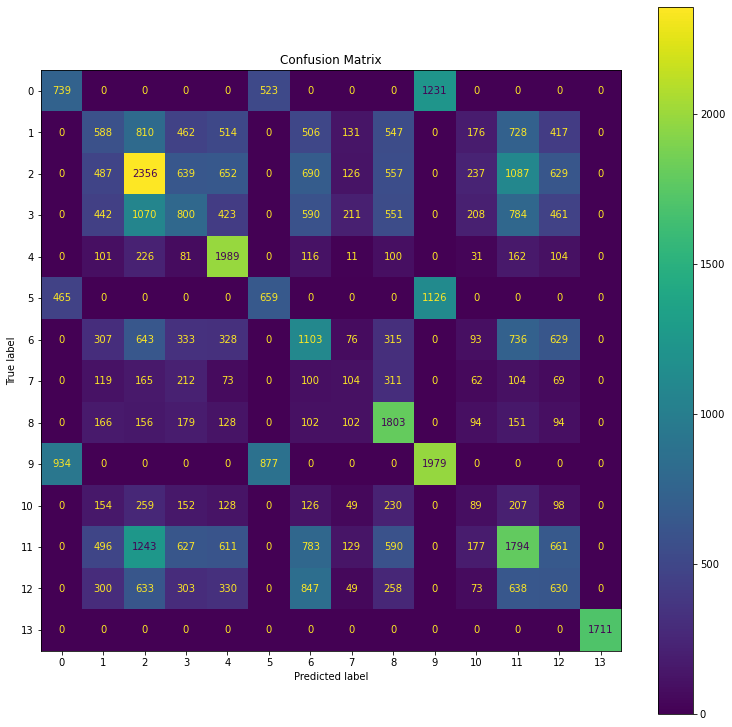

In [36]:
cm2 = confusion_matrix(y_test, CBC_test_pred2);
cmp2 = ConfusionMatrixDisplay(cm2);
fig, ax = plt.subplots(figsize=(13,13));
cmp2.plot(ax=ax);
cmp2.ax_.set_title("Confusion Matrix");

### Classification Report ###

Let's take a look at our classification report test results for each crime:

**0) Aggravated Assault**

For our "Aggravated Assault" results, we have a precision score of .35, a recall score of .30, and an f1 score of .32. This means that:


* Out of all the crimes that the model predicted would be Aggravated Assault crimes, 35% were actually Aggravated Assault crimes.
* Out of all the crimes that were Aggravated Assault crimes, the model correctly predicted 30% of them.
* There is an f1 score of .32, indicating poor performance on predicting probability of the crime being an Aggravated Assault crime.

**1) All Other Larceny**

For our "All Other Larceny" results, we have a precision score of .19, a recall score of .12, and an f1 score of .15. This means that:

* Out of all the crimes that the model predicted would be Larceny crimes, 19% were actually Larceny crimes.
* Out of all the crimes that were Larceny crimes, the model correctly predicted 12% of them.
* There is an f1 score of .15, indicating poor performance on predicting probability of the crime being a Larceny crime.

**2) Burglary/Breaking & Entering**

For our "Burglary/Breaking & Entering" results, we have a precision score of .31, a recall score of .32, and an f1 score of .31. This means that:

* Out of all the crimes that the model predicted would be Burglary/Breaking & Entering crimes, 31% were actually Burglary/Breaking & Entering crimes.
* Out of all the crimes that were Burglary/Breaking & Entering crimes, the model correctly predicted 32% of them.
* There is an f1 score of .31, indicating poor performance on predicting probability of the crime being a Burglary/Breaking & Entering crime.

**3) Destruction/Damage/Vandalism of Property**

For our "Destruction/Damage/Vandalism of Property" results, we have a precision score of .21, a recall score of .14, and an f1 score of .17. This means that:

* Out of all the crimes that the model predicted would be Destruction/Damage/Vandalism of Property crimes, 21% were actually Destruction/Damage/Vandalism of Property crimes.
* Out of all the crimes that were Destruction/Damage/Vandalism of Property crimes, the model correctly predicted 14% of them.
* There is an f1 score of .17, indicating poor performance on predicting probability of the crime being a Destruction/Damage/Vandalism of Property crime.

**4) Identity Theft**

For our "Identity Theft" results, we have a precision score of .38, a recall score of .68, and an f1 score of .49. This means that:

* Out of all the crimes that the model predicted would be Identity Theft crimes, 38% were actually Identity Theft crimes.
* Out of all the crimes that were Identity Theft crimes, the model correctly predicted 68% of them.
* There is an f1 score of .49, indicating poor performance on predicting probability of the crime being an Identity Theft crime.

**5) Intimidation**

For our "Intimidation" results, we have a precision score of .32, a recall score of .29, and an f1 score of .31. This means that:

* Out of all the crimes that the model predicted would be Intimidation crimes, 32% were actually Intimidation crimes.
* Out of all the crimes that were Intimidation crimes, the model correctly predicted 29% of them.
* There is an f1 score of .31, indicating poor performance on predicting probability of the crime being an Intimidation crime.

**6) Motor Vehicle Theft**

For our "Motor Vehicle Theft" results, we have a precision score of .22, a recall score of .24, and an f1 score of .23. This means that:

* Out of all the crimes that the model predicted would be Motor Vehicle Theft crimes, 22% were actually Motor Vehicle Theft crimes.
* Out of all the crimes that were Motor Vehicle Theft crimes, the model correctly predicted 24% of them.
* There is an f1 score of .23, indicating poor performance on predicting probability of the crime being a Motor Vehicle Theft crime.

**7) Robbery**

For our "Robbery" results, we have a precision score of .11, a recall score of .08, and an f1 score of .09. This means that:

* Out of all the crimes that the model predicted would be Robbery crimes, 11% were actually Robbery crimes.
* Out of all the crimes that were Robbery crimes, the model correctly predicted 8% of them.
* There is an f1 score of .09, indicating poor performance on predicting probability of the crime being a Robbery crime.

**8) Shoplifting**

For our "Shoplifting" results, we have a precision score of .34, a recall score of .61, and an f1 score of .44. This means that:

* Out of all the crimes that the model predicted would be Shoplifting crimes, 34% were actually Shoplifting crimes.
* Out of all the crimes that were Shoplifting crimes, the model correctly predicted 61% of them.
* There is an f1 score of .44, indicating poor performance on predicting probability of the crime being a Shoplifting crime.

**9) Simple Assault**

For our "Simple Assault" results, we have a precision score of .46, a recall score of .52, and an f1 score of .49. This means that:

* Out of all the crimes that the model predicted would be Simple Assault crimes, 46% were actually Simple Assault crimes.
* Out of all the crimes that were Simple Assault crimes, the model correctly predicted 52% of them.
* There is an f1 score of .49, indicating poor performance on predicting probability of the crime being a Simple Assault crime.

**10) Theft From Building**

For our "Theft From Building" results, we have a precision score of .07, a recall score of .06, and an f1 score of .07. This means that:

* Out of all the crimes that the model predicted would be Theft From Building crimes, 7% were actually Theft From Building crimes.
* Out of all the crimes that were Theft From Building crimes, the model correctly predicted 6% of them.
* There is an f1 score of .07, indicating extremely poor performance on predicting probability of the crime being a Theft From Building crime.

**11) Theft From Motor Vehicle**

For our "Theft From Motor Vehicle" results, we have a precision score of .28, a recall score of .25, and an f1 score of .27. This means that:

* Out of all the crimes that the model predicted would be Theft From Motor Vehicle crimes, 28% were actually Theft From Motor Vehicle crimes.
* Out of all the crimes that were Theft From Motor Vehicle crimes, the model correctly predicted 25% of them.
* There is an f1 score of .27, indicating poor performance on predicting probability of the crime being a Theft From Motor Vehicle crime.

**12) Theft of Motor Vehicle Parts or Accessories**

For our "Theft of Motor Vehicle Parts or Accessories" results, we have a precision score of .17, a recall score of .16, and an f1 score of .16. This means that:

* Out of all the crimes that the model predicted would be Theft of Motor Vehicle Parts or Accessories crimes, 17% were actually Theft of Motor Vehicle Parts or Accessories crimes.
* Out of all the crimes that were Theft of Motor Vehicle Parts or Accessories crimes, the model correctly predicted 16% of them.
* There is an f1 score of .16, indicating poor performance on predicting probability of the crime being a Theft of Motor Vehicle Parts or Accessories crime.

**13) Trespass of Real Property**

For our "Trespass of Real Property" results, we have a precision score of 1.0, a recall score of 1.0, and an f1 score of 1.0. This means that:

* Out of all the crimes that the model predicted would be Trespass of Real Property crimes, 100% were actually Trespass of Real Property crimes.
* Out of all the crimes that were Trespass of Real Property crimes, the model correctly predicted 100% of them.
* There is an f1 score of 1, indicating perfect performance on predicting probability of the crime being a Trespass of Real Property crime.

### Crime Confusion Matrix ###

**0) Aggravated Assault**

* 739 crimes were correctly predicted as being "Aggravated Assault" crimes
* 1,754 crimes were wrongly predicted as not being "Aggravated Assault" crimes
* 1,399 crimes were wrongly predicted as being "Aggravated Assault" crimes
* 48,673 crimes were correctly predicted as not being "Aggravated Assault" crimes

**1) All Other Larceny**

* 588 crimes were correctly predicted as being "All Other Larceny" crimes
* 4,291 crimes were wrongly predicted as not being "All Other Larceny" crimes
* 2,572 crimes were wrongly predicted as being "All Other Larceny" crimes
* 45,114 crimes were correctly predicted as not being "All Other Larceny" crimes

**2) Burglary/Breaking & Entering**

* 2,356 crimes were correctly predicted as being "Burglary/Breaking & Entering" crimes
* 5,104 crimes were wrongly predicted as not being "Burglary/Breaking & Entering" crimes
* 5,205 crimes were wrongly predicted as being "Burglary/Breaking & Entering" crimes
* 42,440 crimes were correctly predicted as not being "Burglary/Breaking & Entering" crimes

**3) Destruction/Damage/Vandalism of Property**

* 800 crimes were correctly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 4,740 crimes were wrongly predicted as not being "Destruction/Damage/Vandalism of Property" crimes
* 2,988 crimes were wrongly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 46,650 crimes were correctly predicted as not being "Destruction/Damage/Vandalism of Property" crimes

**4) Identity Theft**

* 1,989 crimes were correctly predicted as being "Identity Theft" crimes
* 932 crimes were wrongly predicted as not being "Identity Theft" crimes
* 3,187 crimes were wrongly predicted as being "Identity Theft" crimes
* 48,454 crimes were correctly predicted as not being "Identity Theft" crimes

**5) Intimidation**

* 659 crimes were correctly predicted as being "Intimidation" crimes
* 1,591 crimes were wrongly predicted as not being "Intimidation" crimes
* 1,400 crimes were wrongly predicted as being "Intimidation" crimes
* 49,903 crimes were correctly predicted as not being "Intimidation" crimes

**6) Motor Vehicle Theft**

* 1,103 crimes were correctly predicted as being "Motor Vehicle Theft" crimes
* 3,460 crimes were wrongly predicted as not being "Motor Vehicle Theft" crimes
* 3,860 crimes were wrongly predicted as being "Motor Vehicle Theft" crimes
* 47,655 crimes were correctly predicted as not being "Motor Vehicle Theft" crimes

**7) Robbery**

* 104 crimes were correctly predicted as being "Robbery" crimes
* 1,215 crimes were wrongly predicted as not being "Robbery" crimes
* 884 crimes were wrongly predicted as being "Robbery" crimes
* 51,586 crimes were correctly predicted as not being "Robbery" crimes

**8) Shoplifting*** 

* 1,803 crimes were correctly predicted as being "Shoplifting" crimes
* 1,172 crimes were wrongly predicted as not being "Shoplifting" crimes
* 3,516 crimes were wrongly predicted as being "Shoplifting" crimes
* 47,366 crimes were correctly predicted as not being "Shoplifting" crimes

**9) Simple Assault**

* 1,979 crimes were correctly predicted as being "Simple Assault" crimes
* 1,811 crimes were wrongly predicted as not being "Simple Assault" crimes
* 2,357 crimes were wrongly predicted as being "Simple Assault" crimes
* 50,583 crimes were correctly predicted as not being "Simple Assault" crimes

**10) Theft From Building**

* 89 crimes were correctly predicted as being "Theft From Building" crimes
* 1,403 crimes were wrongly predicted as not being "Theft From Building" crimes
* 1,151 crimes were wrongly predicted as being "Theft From Building" crimes
* 51,918 crimes were correctly predicted as not being "Theft From Building" crimes

**11) Theft From Motor Vehicle**

* 1,794 crimes were correctly predicted as being "Theft From Motor Vehicle" crimes
* 5,317 crimes were wrongly predicted as not being "Theft From Motor Vehicle" crimes
* 4,597 crimes were wrongly predicted as being "Theft From Motor Vehicle" crimes
* 49,469 crimes were correctly predicted as not being "Theft From Motor Vehicle" crimes

**12) Theft of Motor Vehicle Parts or Accessories**

* 630 crimes were correctly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 3,431 crimes were wrongly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes
* 3,162 crimes were wrongly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 51,932 crimes were correctly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes

**13) Trespass of Real Property**

* 1,711 crimes were correctly predicted as being "Trespass of Real Property" crimes
* 0 crimes were wrongly predicted as not being "Trespass of Real Property" crimes
* 0 crimes were wrongly predicted as being "Trespass of Real Property" crimes
* 50,851 crimes were correctly predicted as not being "Trespass of Real Property" crimes

## Third CatBoost Model ###

In [37]:
df2 = pd.read_csv("all_years_preprocessed_data.csv")
df2

Crime Against Category                                      Offense  \
0                             3                     Drug/Narcotic Violations   
1                             2  Theft of Motor Vehicle Parts or Accessories   
2                             2                                      Robbery   
3                             2     Destruction/Damage/Vandalism of Property   
4                             3                  Driving Under the Influence   
...                         ...                                          ...   
1034982                       2                          Motor Vehicle Theft   
1034983                       2                          Motor Vehicle Theft   
1034984                       2                                  Shoplifting   
1034985                       2                                  Shoplifting   
1034986                       2                          Motor Vehicle Theft   

         Sector  Beat  MCPP      Time  Day  Year  
0            18    39    33  10:10:00    2  2020  
1            11    22    50  08:00:00    0  2020  
2            22    50    50  20:30:00    6  2020  
3            18    39    33  01:17:00    2  2020  
4             5     3     4  00:51:21    2  2020  
...         ...   ...   ...       ...  ...   ...  
1034982       9    14    45  01:00:00    5  2013  
1034983      18    41    47  11:00:00    2  2013  
1034984      22    48    50  15:04:00    1  2012  
1034985      14    31    16  16:59:00    6  2010  
1034986      18    40    47  18:00:00    3  2010  

[1034987 rows x 8 columns]

In [38]:
#df = df[df["Year"] >= 2020]

In [39]:
#pd.options.mode.chained_assignment = None
#df2["Time"] = df2["Time"].astype("category").cat.codes
#df2["Day"] = df2["Day"].astype("category").cat.codes
#df2["Year"] = df2["Year"].astype("category").cat.codes

In [40]:
#df2 = df2[~df2['Offense'].isin(df2['Offense'].value_counts().lt(5000).pipe(lambda s: s[s].index))]

In [41]:
#df2

Crime Against Category                                      Offense  \
0                             3                     Drug/Narcotic Violations   
1                             2  Theft of Motor Vehicle Parts or Accessories   
2                             2                                      Robbery   
3                             2     Destruction/Damage/Vandalism of Property   
4                             3                  Driving Under the Influence   
...                         ...                                          ...   
1034982                       2                          Motor Vehicle Theft   
1034983                       2                          Motor Vehicle Theft   
1034984                       2                                  Shoplifting   
1034985                       2                                  Shoplifting   
1034986                       2                          Motor Vehicle Theft   

         Sector  Beat  MCPP  Time  Day  Year  
0            18    39    33  1599    2    47  
1            11    22    50  1285    0    47  
2            22    50    50  3344    6    47  
3            18    39    33   252    2    47  
4             5     3     4   164    2    47  
...         ...   ...   ...   ...  ...   ...  
1034982       9    14    45   193    5    40  
1034983      18    41    47  1714    2    40  
1034984      22    48    50  2368    1    39  
1034985      14    31    16  2691    6    37  
1034986      18    40    47  2865    3    37  

[1002266 rows x 8 columns]

In [42]:
#X2 = df2.drop("Offense", axis = 1)

#Target Variable
#y2 = df2["Offense"]

In [43]:
#X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state = 1)

In [44]:
#SS2 = StandardScaler()
#X_train2 = SS2.fit_transform(X_train2)
#X_test2 = SS2.transform(X_test2)

In [45]:
#sm2 = SMOTE(random_state = 1)
#X_train2, y_train2 = sm2.fit_sample(X_train2, y_train2)

In [46]:
#CBC2 = CatBoostClassifier(
#    task_type = 'GPU',
 #   random_state = 1,
  #  loss_function = 'MultiClass',
#)

In [47]:
#CBC2.fit(
  #  X_train2, y_train2,
  #  early_stopping_rounds=5,
    #plot = True
#)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.333105
0:	learn: 2.5237013	total: 365ms	remaining: 6m 4s
1:	learn: 2.3650427	total: 743ms	remaining: 6m 10s
2:	learn: 2.2779998	total: 1.14s	remaining: 6m 19s
3:	learn: 2.2168829	total: 1.52s	remaining: 6m 19s
4:	learn: 2.1734642	total: 1.91s	remaining: 6m 20s
5:	learn: 2.1474013	total: 2.3s	remaining: 6m 20s
6:	learn: 2.1190355	total: 2.67s	remaining: 6m 19s
7:	learn: 2.1030217	total: 3.07s	remaining: 6m 20s
8:	learn: 2.0865367	total: 3.44s	remaining: 6m 19s
9:	learn: 2.0772516	total: 3.82s	remaining: 6m 18s
10:	learn: 2.0674073	total: 4.21s	remaining: 6m 18s
11:	learn: 2.0585339	total: 4.59s	remaining: 6m 17s
12:	learn: 2.0519522	total: 4.97s	remaining: 6m 17s
13:	learn: 2.0472395	total: 5.33s	remaining: 6m 15s
14:	learn: 2.0388405	total: 5.71s	remaining: 6m 14s
15:	learn: 2.0316317	total: 6.1s	remaining: 6m 14s
16:	learn: 2.0260138	total: 6.46s	remaining: 6m 13s
17:	learn: 2.0223525	total: 6.83s	remaining: 6m 12s
18:	learn: 2.0177254	total: 7.22s	remaining: 6m

158:	learn: 1.7859737	total: 1m	remaining: 5m 18s
159:	learn: 1.7859567	total: 1m	remaining: 5m 17s
160:	learn: 1.7848366	total: 1m	remaining: 5m 17s
161:	learn: 1.7837456	total: 1m 1s	remaining: 5m 17s
162:	learn: 1.7832449	total: 1m 1s	remaining: 5m 16s
163:	learn: 1.7823860	total: 1m 2s	remaining: 5m 16s
164:	learn: 1.7817928	total: 1m 2s	remaining: 5m 16s
165:	learn: 1.7817803	total: 1m 2s	remaining: 5m 15s
166:	learn: 1.7808462	total: 1m 3s	remaining: 5m 15s
167:	learn: 1.7800220	total: 1m 3s	remaining: 5m 15s
168:	learn: 1.7794059	total: 1m 4s	remaining: 5m 14s
169:	learn: 1.7788644	total: 1m 4s	remaining: 5m 14s
170:	learn: 1.7781975	total: 1m 4s	remaining: 5m 14s
171:	learn: 1.7772746	total: 1m 5s	remaining: 5m 13s
172:	learn: 1.7765362	total: 1m 5s	remaining: 5m 13s
173:	learn: 1.7755864	total: 1m 5s	remaining: 5m 13s
174:	learn: 1.7748871	total: 1m 6s	remaining: 5m 12s
175:	learn: 1.7744751	total: 1m 6s	remaining: 5m 12s
176:	learn: 1.7741327	total: 1m 7s	remaining: 5m 12s
17

312:	learn: 1.7142967	total: 1m 59s	remaining: 4m 22s
313:	learn: 1.7140926	total: 1m 59s	remaining: 4m 21s
314:	learn: 1.7137462	total: 2m	remaining: 4m 21s
315:	learn: 1.7134651	total: 2m	remaining: 4m 20s
316:	learn: 1.7131704	total: 2m	remaining: 4m 20s
317:	learn: 1.7126870	total: 2m 1s	remaining: 4m 20s
318:	learn: 1.7122623	total: 2m 1s	remaining: 4m 19s
319:	learn: 1.7119731	total: 2m 2s	remaining: 4m 19s
320:	learn: 1.7117636	total: 2m 2s	remaining: 4m 19s
321:	learn: 1.7115425	total: 2m 2s	remaining: 4m 18s
322:	learn: 1.7110529	total: 2m 3s	remaining: 4m 18s
323:	learn: 1.7107368	total: 2m 3s	remaining: 4m 17s
324:	learn: 1.7107131	total: 2m 3s	remaining: 4m 17s
325:	learn: 1.7103387	total: 2m 4s	remaining: 4m 17s
326:	learn: 1.7098782	total: 2m 4s	remaining: 4m 16s
327:	learn: 1.7097945	total: 2m 5s	remaining: 4m 16s
328:	learn: 1.7097327	total: 2m 5s	remaining: 4m 15s
329:	learn: 1.7091829	total: 2m 5s	remaining: 4m 15s
330:	learn: 1.7085836	total: 2m 6s	remaining: 4m 15s


466:	learn: 1.6698322	total: 2m 59s	remaining: 3m 24s
467:	learn: 1.6695926	total: 2m 59s	remaining: 3m 24s
468:	learn: 1.6694218	total: 2m 59s	remaining: 3m 23s
469:	learn: 1.6691266	total: 3m	remaining: 3m 23s
470:	learn: 1.6687734	total: 3m	remaining: 3m 23s
471:	learn: 1.6685763	total: 3m 1s	remaining: 3m 22s
472:	learn: 1.6683581	total: 3m 1s	remaining: 3m 22s
473:	learn: 1.6683586	total: 3m 1s	remaining: 3m 21s
474:	learn: 1.6682088	total: 3m 2s	remaining: 3m 21s
475:	learn: 1.6680416	total: 3m 2s	remaining: 3m 21s
476:	learn: 1.6677322	total: 3m 3s	remaining: 3m 20s
477:	learn: 1.6674194	total: 3m 3s	remaining: 3m 20s
478:	learn: 1.6671016	total: 3m 3s	remaining: 3m 19s
479:	learn: 1.6669776	total: 3m 4s	remaining: 3m 19s
480:	learn: 1.6668160	total: 3m 4s	remaining: 3m 19s
481:	learn: 1.6666754	total: 3m 4s	remaining: 3m 18s
482:	learn: 1.6665043	total: 3m 5s	remaining: 3m 18s
483:	learn: 1.6662328	total: 3m 5s	remaining: 3m 17s
484:	learn: 1.6662323	total: 3m 6s	remaining: 3m 

619:	learn: 1.6366074	total: 3m 58s	remaining: 2m 26s
620:	learn: 1.6363599	total: 3m 59s	remaining: 2m 25s
621:	learn: 1.6361296	total: 3m 59s	remaining: 2m 25s
622:	learn: 1.6360269	total: 3m 59s	remaining: 2m 25s
623:	learn: 1.6358696	total: 4m	remaining: 2m 24s
624:	learn: 1.6357001	total: 4m	remaining: 2m 24s
625:	learn: 1.6355122	total: 4m	remaining: 2m 23s
626:	learn: 1.6353612	total: 4m 1s	remaining: 2m 23s
627:	learn: 1.6353604	total: 4m 1s	remaining: 2m 23s
628:	learn: 1.6351662	total: 4m 2s	remaining: 2m 22s
629:	learn: 1.6347939	total: 4m 2s	remaining: 2m 22s
630:	learn: 1.6346851	total: 4m 2s	remaining: 2m 22s
631:	learn: 1.6346816	total: 4m 3s	remaining: 2m 21s
632:	learn: 1.6345214	total: 4m 3s	remaining: 2m 21s
633:	learn: 1.6345207	total: 4m 3s	remaining: 2m 20s
634:	learn: 1.6341976	total: 4m 4s	remaining: 2m 20s
635:	learn: 1.6340710	total: 4m 4s	remaining: 2m 20s
636:	learn: 1.6338799	total: 4m 5s	remaining: 2m 19s
637:	learn: 1.6338112	total: 4m 5s	remaining: 2m 19

773:	learn: 1.6103443	total: 4m 58s	remaining: 1m 27s
774:	learn: 1.6101548	total: 4m 58s	remaining: 1m 26s
775:	learn: 1.6101531	total: 4m 58s	remaining: 1m 26s
776:	learn: 1.6098537	total: 4m 59s	remaining: 1m 25s
777:	learn: 1.6097622	total: 4m 59s	remaining: 1m 25s
778:	learn: 1.6096229	total: 5m	remaining: 1m 25s
779:	learn: 1.6095021	total: 5m	remaining: 1m 24s
780:	learn: 1.6092792	total: 5m	remaining: 1m 24s
781:	learn: 1.6091695	total: 5m 1s	remaining: 1m 23s
782:	learn: 1.6089856	total: 5m 1s	remaining: 1m 23s
783:	learn: 1.6088148	total: 5m 2s	remaining: 1m 23s
784:	learn: 1.6088125	total: 5m 2s	remaining: 1m 22s
785:	learn: 1.6086845	total: 5m 2s	remaining: 1m 22s
786:	learn: 1.6084534	total: 5m 3s	remaining: 1m 22s
787:	learn: 1.6083169	total: 5m 3s	remaining: 1m 21s
788:	learn: 1.6083139	total: 5m 3s	remaining: 1m 21s
789:	learn: 1.6082082	total: 5m 4s	remaining: 1m 20s
790:	learn: 1.6082076	total: 5m 4s	remaining: 1m 20s
791:	learn: 1.6081179	total: 5m 5s	remaining: 1m 2

928:	learn: 1.5891618	total: 5m 57s	remaining: 27.4s
929:	learn: 1.5891622	total: 5m 58s	remaining: 27s
930:	learn: 1.5889386	total: 5m 58s	remaining: 26.6s
931:	learn: 1.5887683	total: 5m 59s	remaining: 26.2s
932:	learn: 1.5885929	total: 5m 59s	remaining: 25.8s
933:	learn: 1.5884951	total: 5m 59s	remaining: 25.4s
934:	learn: 1.5883926	total: 6m	remaining: 25s
935:	learn: 1.5881982	total: 6m	remaining: 24.7s
936:	learn: 1.5881953	total: 6m 1s	remaining: 24.3s
937:	learn: 1.5880238	total: 6m 1s	remaining: 23.9s
938:	learn: 1.5879142	total: 6m 1s	remaining: 23.5s
939:	learn: 1.5878091	total: 6m 2s	remaining: 23.1s
940:	learn: 1.5876080	total: 6m 2s	remaining: 22.7s
941:	learn: 1.5874870	total: 6m 2s	remaining: 22.3s
942:	learn: 1.5874644	total: 6m 3s	remaining: 22s
943:	learn: 1.5873696	total: 6m 3s	remaining: 21.6s
944:	learn: 1.5872541	total: 6m 4s	remaining: 21.2s
945:	learn: 1.5871026	total: 6m 4s	remaining: 20.8s
946:	learn: 1.5869590	total: 6m 4s	remaining: 20.4s
947:	learn: 1.5867

In [48]:
#CBC_train_pred2 = CBC.predict(X_train2)
#CBC_test_pred2 = CBC.predict(X_test2)

In [49]:
#print(classification_report(y_train2, CBC_train_pred2))

C:\Users\aleja\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                             precision    recall  f1-score   support

                         Aggravated Assault       0.38      0.36      0.37    126369
                          All Other Larceny       0.09      0.01      0.02    126369
                                 Bad Checks       0.00      0.00      0.00    126369
               Burglary/Breaking & Entering       0.13      0.00      0.01    126369
                     Counterfeiting/Forgery       0.00      0.00      0.00    126369
 Credit Card/Automated Teller Machine Fraud       0.00      0.00      0.00    126369
   Destruction/Damage/Vandalism of Property       0.14      0.01      0.01    126369
                Driving Under the Influence       0.00      0.00      0.00    126369
                   Drug/Narcotic Violations       0.00      0.00      0.00    126369
    False Pretenses/Swindle/Confidence Game       0.00      0.00      0.00    126369
                Family Offenses, Nonviolent       0.00      0.00

In [50]:
#print(classification_report(y_test2, CBC_test_pred2))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.25      0.36      0.30      8581
                          All Other Larceny       0.13      0.01      0.02     22105
                                 Bad Checks       0.00      0.00      0.00      1653
               Burglary/Breaking & Entering       0.22      0.00      0.01     28968
                     Counterfeiting/Forgery       0.00      0.00      0.00      1279
 Credit Card/Automated Teller Machine Fraud       0.00      0.00      0.00      4799
   Destruction/Damage/Vandalism of Property       0.18      0.01      0.01     24034
                Driving Under the Influence       0.00      0.00      0.00      4654
                   Drug/Narcotic Violations       0.00      0.00      0.00      5909
    False Pretenses/Swindle/Confidence Game       0.00      0.00      0.00      2868
                Family Offenses, Nonviolent       0.00      0.00

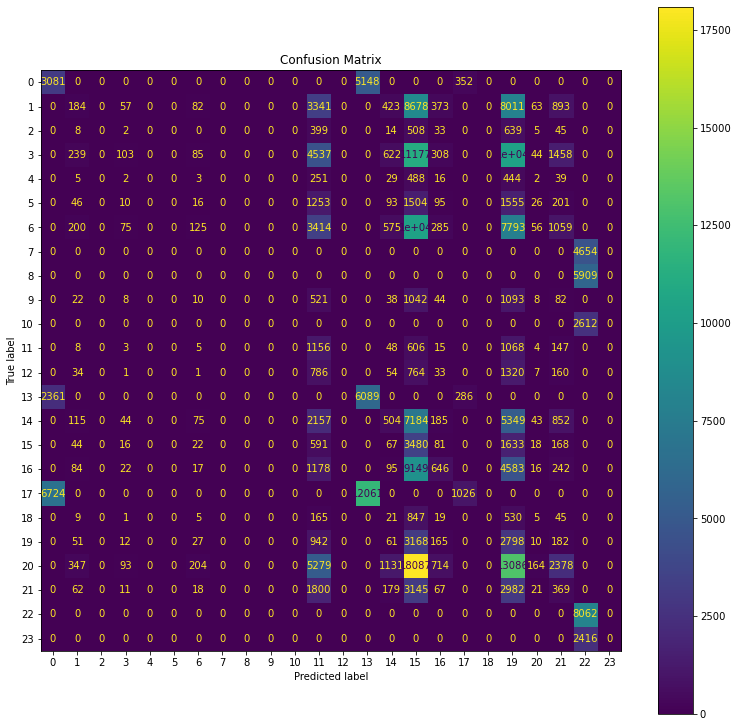

In [51]:
#cm2 = confusion_matrix(y_test2, CBC_test_pred2);
#cmp = ConfusionMatrixDisplay(cm2);
#fig, ax = plt.subplots(figsize=(13,13));
#cmp.plot(ax=ax);
#cmp.ax_.set_title("Confusion Matrix");

In [52]:
print ("My program took", time.time() - start_time, "to run")


My program took 2225.2440910339355 to run
